In [2]:
from bs4 import BeautifulSoup
import requests
from IPython import display
from base64 import b64decode 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from urllib.request import urlopen
import urllib.request


In [3]:
url_soy = "https://ourworldindata.org/soy"

soy_html_content = requests.get(url_soy).text

soup = BeautifulSoup(soy_html_content, "html.parser")

print(soup.find('p').text) # Checking which element relates to this paragraph within the main body of the text

Soy has earned itself a bad reputation with many consumers. Its links to deforestation means that, alongside palm oil, soy has become a product to avoid. Is this reputation justified?


**Examining growth of soy crops over time - has it increased significantly, is it a driver for forest destruction especially in tropical areas and is soybean production growth contributing to increasing world Co2 levels? Are coffee drinkers who had swapped to soy for perceived environmental reasons over diary, but now shun soy due to press reports of high environmental consequences, correct to do so?**

In [4]:
path_to_file_soy_product = (r'C:\Users\amint\OneDrive\Documents\Course Data Analytics\UCD Project\soybean-production.csv')

soy_product_data = pd.read_csv(path_to_file_soy_product)

print(soy_product_data.shape)

soy_product_data.head()

(6981, 4)


,Entity,Code,Year,Soybeans | 00000236 || Production | 005510 || tonnes
0,Africa,NaN,1961,71813
1,Africa,NaN,1962,84594
2,Africa,NaN,1963,87260
3,Africa,NaN,1964,76781
4,Africa,NaN,1965,73067


Checking for NaN values in multiple columns

In [5]:
soy_product_data.rename(columns = {'Soybeans | 00000236 || Production | 005510 || tonnes':'Soy Production (Tn)'}, inplace = True)

In [6]:
print("Number of null values in Entity Column : " + 
       str(soy_product_data.iloc[:, 0].isnull().sum()))
print("Number of null values in Year column : " + 
       str(soy_product_data.iloc[:, 2].isnull().sum()))
print("Number of null values in tonnes column : " + 
       str(soy_product_data.iloc[:, 3].isnull().sum()))

Number of null values in Entity Column : 0
Number of null values in Year column : 0
Number of null values in tonnes column : 0


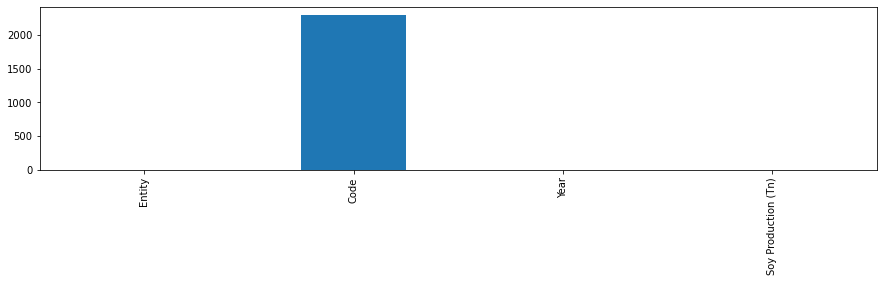

In [7]:
soy_product_data.isna().sum().plot(kind = 'bar', figsize = (15,3)); # alternate view

In [8]:
soy_product_data.Entity.unique() # looping through country list  - contains continents and other groups.



array(['Africa', 'Africa (FAO)', 'Albania', 'Americas (FAO)', 'Angola',
       'Argentina', 'Asia', 'Asia (FAO)', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central America (FAO)', 'Central Asia (FAO)', 'Chile', 'China',
       'China (FAO)', 'Colombia', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czechia', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Eastern Africa (FAO)',
       'Eastern Asia (FAO)', 'Eastern Europe (FAO)', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea and Ethiopia', 'Estonia', 'Ethiopia',
       'Europe', 'Europe (FAO)', 'European Union (27)',
       'European Union (27) (FAO)', 'France', 'French Guiana', 'Gabon',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guyana',
       'High-income countries', 'Honduras', 'Hungary', 

In [9]:
# looping through Entity column to count no of countries

item_counts = soy_product_data["Entity"].value_counts()
print(item_counts)

Africa           60
Mexico           60
Pakistan         60
Oceania (FAO)    60
Oceania          60
                 ..
Estonia           3
Ireland           3
Lithuania         3
Cyprus            2
Luxembourg        1
Name: Entity, Length: 159, dtype: int64


In [14]:
# using nunique to count no of entities - ref 1 www.geeksforgeeks.org 

No_uni = soy_product_data.agg({"Entity": "nunique"})

print(No_uni)

Entity    159
dtype: int64


In [15]:
nan_values = soy_product_data[soy_product_data['Code'].isna()]
print(nan_values)

                    Entity Code  Year  Soy Production (Tn)
0                   Africa  NaN  1961                71813
1                   Africa  NaN  1962                84594
2                   Africa  NaN  1963                87260
3                   Africa  NaN  1964                76781
4                   Africa  NaN  1965                73067
...                    ...  ...   ...                  ...
6777  Western Europe (FAO)  NaN  2016               539054
6778  Western Europe (FAO)  NaN  2017               680260
6779  Western Europe (FAO)  NaN  2018               647410
6780  Western Europe (FAO)  NaN  2019               735760
6781  Western Europe (FAO)  NaN  2020               707307

[2295 rows x 4 columns]


In [16]:
soy_country =  soy_product_data.dropna(subset=['Code']) # dropping all rows in Code column that have a NaN value (as they are not a country)

In [17]:
soy_country.sort_values('Soy Production (Tn)', ascending=False) # I want to plot world soy growth separately so will create 2x DF

,Entity,Code,Year,Soy Production (Tn)
6838,World,OWID_WRL,2017,359510895
6841,World,OWID_WRL,2020,353463735
6839,World,OWID_WRL,2018,344731688
6840,World,OWID_WRL,2019,336329392
6837,World,OWID_WRL,2016,335944720
...,...,...,...,...
3024,Jordan,JOR,2013,0
3023,Jordan,JOR,2012,0
3022,Jordan,JOR,2011,0
3021,Jordan,JOR,2010,0


In [18]:
world = soy_country.loc[soy_country['Entity'] == 'World'] # creating new DF to plot world growth stats
world.shape

(60, 4)

In [243]:
# Adding a total row for world to compare with countries DF - ensure same total

row_sum_world = world.iloc[:,3:4].sum()

In [37]:
world.loc['Total'] = row_sum
world.fillna('') # added to show other column totals as empty

,Entity,Code,Year,Soy Production (Tn)
6782,World,OWID_WRL,1961.0,2.688316e+07
6783,World,OWID_WRL,1962.0,2.712015e+07
6784,World,OWID_WRL,1963.0,2.820707e+07
6785,World,OWID_WRL,1964.0,2.907955e+07
6786,World,OWID_WRL,1965.0,3.170492e+07
...,...,...,...,...
6838,World,OWID_WRL,2017.0,3.595109e+08
6839,World,OWID_WRL,2018.0,3.447317e+08
6840,World,OWID_WRL,2019.0,3.363294e+08
6841,World,OWID_WRL,2020.0,3.534637e+08


**Plotting World Soybean Production since 1960**

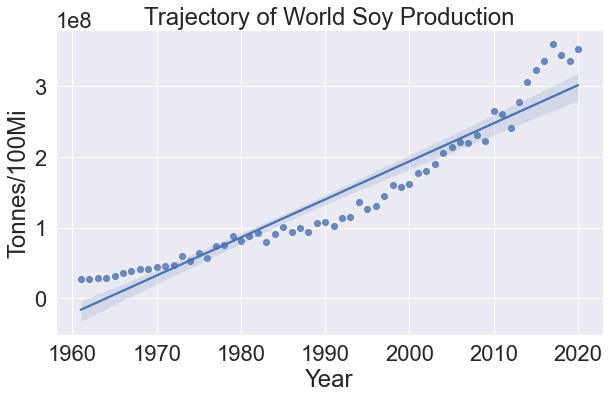

In [38]:
sns.set(font_scale=2)
sns.lmplot(data=world,
           x='Year',
           y='Soy Production (Tn)',
           height=6, aspect=1.5);

plt.title('Trajectory of World Soy Production')
plt.ylabel('Tonnes/100Mi')

plt.show()

In [39]:
soy_country = soy_country.loc[soy_country['Entity'] != 'World'] # creating a dataframe for countries only
soy_country.shape

(4626, 4)

In [40]:
soy_country.sort_values('Soy Production (Tn)', ascending=False) 

,Entity,Code,Year,Soy Production (Tn)
813,Brazil,BRA,2020,121797712
6391,United States,USA,2018,120514490
6390,United States,USA,2017,120064970
811,Brazil,BRA,2018,117912450
6389,United States,USA,2016,116931500
...,...,...,...,...
3021,Jordan,JOR,2010,0
3020,Jordan,JOR,2009,0
3019,Jordan,JOR,2008,0
3018,Jordan,JOR,2007,0


In [41]:
sort1 = soy_country.loc[soy_country['Soy Production (Tn)'] > 11024460].sort_values(by=['Soy Production (Tn)'], ascending=False).copy()
sort1

,Entity,Code,Year,Soy Production (Tn)
813,Brazil,BRA,2020,121797712
6391,United States,USA,2018,120514490
6390,United States,USA,2017,120064970
811,Brazil,BRA,2018,117912450
6389,United States,USA,2016,116931500
...,...,...,...,...
273,Argentina,ARG,1992,11310000
769,Brazil,BRA,1976,11227123
2707,India,IND,2020,11226000
4715,Paraguay,PRY,2018,11045971


In [42]:
# To check same total as world DF

row_sum = sort1.iloc[:,3:4].sum()

In [43]:
sort1.loc['Total'] = row_sum
sort1.fillna('')

,Entity,Code,Year,Soy Production (Tn)
813,Brazil,BRA,2020.0,1.217977e+08
6391,United States,USA,2018.0,1.205145e+08
6390,United States,USA,2017.0,1.200650e+08
811,Brazil,BRA,2018.0,1.179124e+08
6389,United States,USA,2016.0,1.169315e+08
...,...,...,...,...
769,Brazil,BRA,1976.0,1.122712e+07
2707,India,IND,2020.0,1.122600e+07
4715,Paraguay,PRY,2018.0,1.104597e+07
274,Argentina,ARG,1993.0,1.104540e+07


In [104]:
agg_soy = soy_country.groupby(['Entity']).sum('Soy Production (Tn)').copy() # adding all cat types together

agg_soy

,Year,Soy Production (Tn)
Entity,,
Albania,82000,105182
Angola,42210,262317
Argentina,119430,1107329305
Australia,119430,3002303
Austria,66132,2679266
...,...,...
Venezuela,70105,487227
Vietnam,119430,6151939
Yugoslavia,61256,2521091


In [105]:
agg_soy.loc['Total'] = row_sum
agg_soy.fillna('')

,Year,Soy Production (Tn)
Entity,,
Albania,82000.0,1.051820e+05
Angola,42210.0,2.623170e+05
Argentina,119430.0,1.107329e+09
Australia,119430.0,3.002303e+06
Austria,66132.0,2.679266e+06
...,...,...
Vietnam,119430.0,6.151939e+06
Yugoslavia,61256.0,2.521091e+06
Zambia,95832.0,3.456564e+06


In [106]:
del agg_soy['Year'] # used del function as alternative to drop pythonexamples.org

# Ref No: 2

In [107]:
agg_soy.tail()

,Soy Production (Tn)
Entity,
Vietnam,6.151939e+06
Yugoslavia,2.521091e+06
Zambia,3.456564e+06
Zimbabwe,3.907146e+06
Total,7.223199e+09


In [108]:
tot = agg_soy.iloc[-1][0]
print(tot)

7223199451.0


In [109]:
agg_soy = agg_soy.groupby(['Entity']).sum('Soy Production (Tn)').copy() # adding all cat types together

agg_soy

,Soy Production (Tn)
Entity,
Albania,1.051820e+05
Angola,2.623170e+05
Argentina,1.107329e+09
Australia,3.002303e+06
Austria,2.679266e+06
...,...
Venezuela,4.872270e+05
Vietnam,6.151939e+06
Yugoslavia,2.521091e+06


In [110]:
agg_soy['%_of_Total'] = ((agg_soy['Soy Production (Tn)'] / tot.sum() *100).round(2))

# adding additonal column of percent of total


In [111]:
agg_soy.head(2)

,Soy Production (Tn),%_of_Total
Entity,,
Albania,105182.0,0.0
Angola,262317.0,0.0


In [112]:
# Ref 3
# using a sort algorithm Ref Knowledge Powerhouse

agg_sort = agg_soy.sort_values(by='Soy Production (Tn)', kind='quicksort', ascending=False) 
agg_sort.head(6)

,Soy Production (Tn),%_of_Total
Entity,,
Total,7.223199e+09,100.00
United States,3.691348e+09,51.10
Brazil,2.014297e+09,27.89
Argentina,1.107329e+09,15.33
China,6.917290e+08,9.58
India,2.692947e+08,3.73


In [113]:
agg_sort = agg_sort.iloc[1: , :]
agg_sort

,Soy Production (Tn),%_of_Total
Entity,,
United States,3.691348e+09,51.10
Brazil,2.014297e+09,27.89
Argentina,1.107329e+09,15.33
China,6.917290e+08,9.58
India,2.692947e+08,3.73
...,...,...
Denmark,0.000000e+00,0.00
Estonia,0.000000e+00,0.00
Ireland,0.000000e+00,0.00


In [114]:
# DF for countries above 3% of total production

largest = agg_sort.loc[agg_sort['%_of_Total'] > 3].sort_values(by=['Soy Production (Tn)'], ascending=False).copy()

In [129]:
largest.round(0)

,Soy Production (Tn),%_of_Total
Entity,,
United States,3.691348e+09,51.0
Brazil,2.014297e+09,28.0
Argentina,1.107329e+09,15.0
China,6.917290e+08,10.0
India,2.692947e+08,4.0


To produce 2x pie charts, one comparing top producers in 2020 to the top producers since 1960

In [117]:
sort2020 = soy_country.loc[soy_country['Year'] == 2020].sort_values(by=['Soy Production (Tn)'], ascending=False).copy()
sort2020

,Entity,Code,Year,Soy Production (Tn)
813,Brazil,BRA,2020,121797712
6393,United States,USA,2020,112549240
301,Argentina,ARG,2020,48796661
1309,China,CHN,2020,19600000
2707,India,IND,2020,11226000
...,...,...,...,...
1613,Denmark,DNK,2020,0
1989,Estonia,EST,2020,0
3031,Jordan,JOR,2020,0
3692,Malta,MLT,2020,0


In [118]:
total_soy2020 = sort2020['Soy Production (Tn)'].sum() # to get total to work out percent (different method than for world DF)
print(total_soy2020)

353463735


In [127]:
sort2020['%_of_Total'] = ((sort2020['Soy Production (Tn)'] / total_soy2020.sum()) *100).round(0)
sort2020.head()

,Entity,Code,Year,Soy Production (Tn),%_of_Total
813,Brazil,BRA,2020,121797712,34.0
6393,United States,USA,2020,112549240,32.0
301,Argentina,ARG,2020,48796661,14.0
1309,China,CHN,2020,19600000,6.0
2707,India,IND,2020,11226000,3.0


<Figure size 1080x576 with 0 Axes>

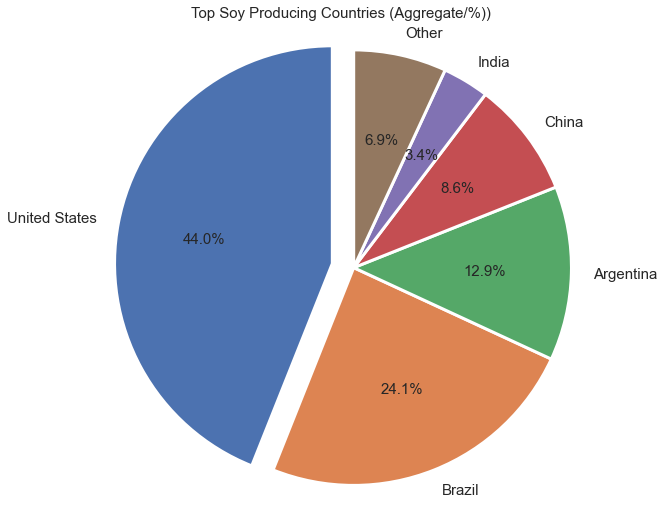

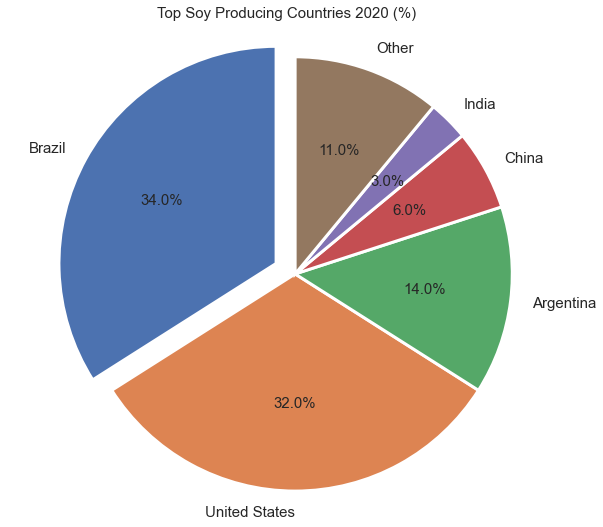

In [130]:
# Ref 4
# To produce 2x charts using lists ref: stackoverflow

country_list = ['United States', 'Brazil', 'Argentina', 'China', 'India', 'Other']
Country_perc = [51,28,15,10,4,8]
explode = (0.1,0,0,0,0,0) # explode out the USA as largest
colors = sns.color_palette('bright')[0:5]

plt.figure(0)
fig1, ax1 = plt.subplots(figsize=(10, 9))

ax1.pie(Country_perc, explode=explode, labels=country_list, autopct='%1.1f%%',
        shadow=False, startangle=90,textprops={'fontsize': 15}, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title('Top Soy Producing Countries (Aggregate/%))', fontsize=15);



plt.figure(1)
country_list2 = ['Brazil', ' United States', 'Argentina', 'China', 'India', 'Other']
country_div = [34,32,14,6,3,11]
fig1, ax1 = plt.subplots(figsize=(10,9))
ax1.pie(country_div, explode=explode, labels=country_list2, autopct='%1.1f%%',
        shadow=False, startangle=90,textprops={'fontsize': 15}, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'} )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Top Soy Producing Countries 2020 (%)", fontsize=15);

plt.show()

In [131]:
current = soy_country[soy_country['Year'] == 2020].copy()
current

,Entity,Code,Year,Soy Production (Tn)
160,Albania,ALB,2020,441
241,Angola,AGO,2020,40797
301,Argentina,ARG,2020,48796661
481,Australia,AUS,2020,17323
514,Austria,AUT,2020,204860
...,...,...,...,...
6518,Uzbekistan,UZB,2020,7460
6553,Venezuela,VEN,2020,9306
6613,Vietnam,VNM,2020,65405
6920,Zambia,ZMB,2020,296866


In [132]:
sort = current.sort_values(by='Soy Production (Tn)', kind='quicksort', ascending=False) 
sort.head() # using quickstart sort algorithm

,Entity,Code,Year,Soy Production (Tn)
813,Brazil,BRA,2020,121797712
6393,United States,USA,2020,112549240
301,Argentina,ARG,2020,48796661
1309,China,CHN,2020,19600000
2707,India,IND,2020,11226000


Looking at 2020 data in form of barchart:

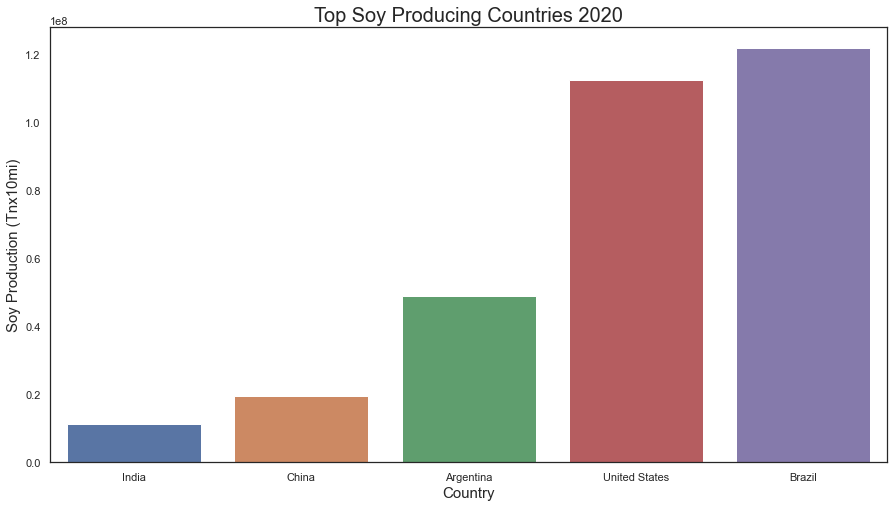

In [133]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(style='white')

sns.barplot( data = sort_hi, x = 'Entity',
            y = 'Soy Production (Tn)',
           order=sort_hi.sort_values('Soy Production (Tn)').Entity)

# Ref 5 
# Bar order changed - datavizpyr.com



plt.ylabel('Soy Production (Tnx10mi)',fontsize = 15)
plt.title("Top Soy Producing Countries 2020", fontsize = 20)
plt.xlabel('Country', fontsize = 15)


plt.show()

In [134]:
top_5 = ['United States', 'Brazil', 'Argentina', 'China', 'India']

In [135]:
top_5_soy = soy_country[soy_country['Entity'].isin(top_5)]
top_5_soy

,Entity,Code,Year,Soy Production (Tn)
242,Argentina,ARG,1961,957
243,Argentina,ARG,1962,11220
244,Argentina,ARG,1963,18920
245,Argentina,ARG,1964,14000
246,Argentina,ARG,1965,17000
...,...,...,...,...
6389,United States,USA,2016,116931500
6390,United States,USA,2017,120064970
6391,United States,USA,2018,120514490
6392,United States,USA,2019,96667090


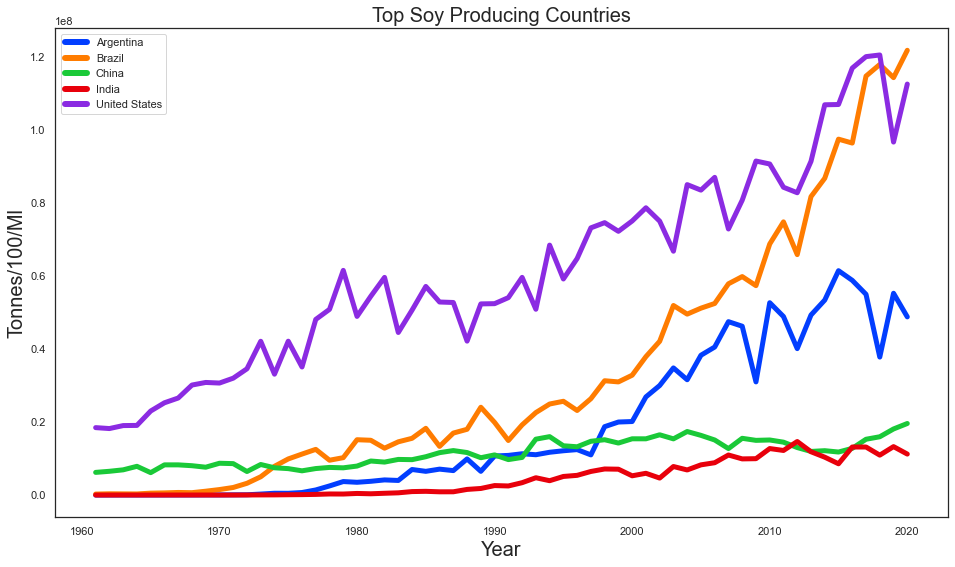

In [136]:
plt.figure(figsize = (16,9))
sns.set(style='white',)

 
# Draw line plot of years and tonnes with parameters and hue "country"
sns.lineplot(x = "Year", y = "Soy Production (Tn)", data = top_5_soy, hue = "Entity",
            style = "Entity", palette = "bright", dashes = False, 
            legend="full",estimator=None, linewidth=5 ) # linewidth from stackoverflow
 
plt.title("Top Soy Producing Countries", fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel("Tonnes/100/Ml", fontsize = 20)


leg = plt.legend() # Ref 6 - increase line size within legend stackoverflow
leg.get_lines()[0].set_linewidth(6)
leg.get_lines()[1].set_linewidth(6)
leg.get_lines()[2].set_linewidth(6)
leg.get_lines()[3].set_linewidth(6)
leg.get_lines()[4].set_linewidth(6)

plt.show()

Brazil has increased its production of soy to the greatest extent and is now the leading world producer.

In [137]:
# merging DF with concat

joint_df = pd.concat([world, top_5_soy]).copy()
joint_df

,Entity,Code,Year,Soy Production (Tn)
6782,World,OWID_WRL,1961.0,26883158.0
6783,World,OWID_WRL,1962.0,27120148.0
6784,World,OWID_WRL,1963.0,28207071.0
6785,World,OWID_WRL,1964.0,29079547.0
6786,World,OWID_WRL,1965.0,31704923.0
...,...,...,...,...
6389,United States,USA,2016.0,116931500.0
6390,United States,USA,2017.0,120064970.0
6391,United States,USA,2018.0,120514490.0
6392,United States,USA,2019.0,96667090.0


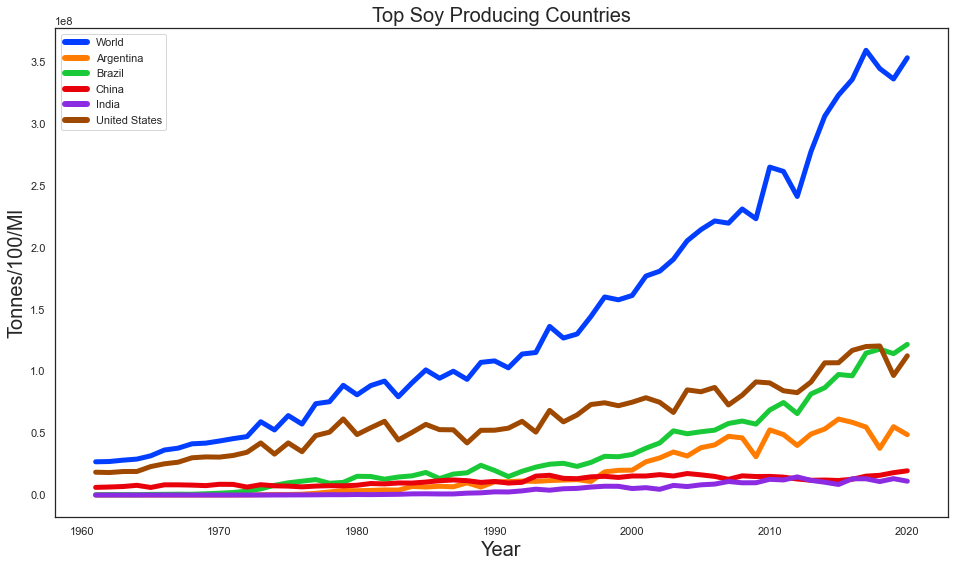

In [138]:
plt.figure(figsize = (16,9))
sns.set(style='white',)

 
# Draw line plot of years and tonnes with parameters and hue "country"
sns.lineplot(x = "Year", y = "Soy Production (Tn)", data = joint_df, hue = "Entity",
            style = "Entity", palette = "bright", dashes = False, 
            legend="full",estimator=None, linewidth=5 ) # linewidth from stackoverflow
 
plt.title("Top Soy Producing Countries", fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel("Tonnes/100/Ml", fontsize = 20)


leg = plt.legend() # increase line size within legend stackoverflow
leg.get_lines()[0].set_linewidth(6)
leg.get_lines()[1].set_linewidth(6)
leg.get_lines()[2].set_linewidth(6)
leg.get_lines()[3].set_linewidth(6)
leg.get_lines()[4].set_linewidth(6)
leg.get_lines()[5].set_linewidth(6)

plt.show()

**Is increase in soy milk the main reason for growth - what is Soy used for and is soybean production growth a key driver of tropical rainforest de-forestaton?**

**Now looking at rates of deforestation of the Amazon rainforest and drivers of that deforestation**

Scaping a picture from Our World in Data website and converting to Base64

In [139]:
base64_data ='iVBORw0KGgoAAAANSUhEUgAAAvsAAAImCAIAAABCQ9LoAACAAElEQVR42ux9dXxd533+wcvMV7piJksWS2aG2I4dprZpU263dmu7tuu69be13brSypyGHAccQ2JGySxmZrrMePj8/jj2zbUkK47tpGlyns9nq3N14D0vfN/n/SLIsizAgwcPHjx48ODxoQbEdwEPHjx48ODBg2c8PHjw4MGDBw8ePOPhwYMHDx48ePDgGQ8PHjx48ODBg8ffHAjfBTx48ODBg8dHGSzLYhjOMB+SSCYQAkVCAQRBPOPhwYMHDx48eLyNUCjygx//2Wpzfjg+R6tVff0rn7AkGXnGw4MHDx48ePB4GwRJNrf2jIxNfzg+JznJEInEFv5+54yHwHGH08myLI5jOIbl5RegKPqhmgEE4XQ6GIbFMSwaixYUFAoEgluw45Df72NZIBQKIgiSl5f/oV8esWi0sbEhFAquW79Rp9Pd2UNYlp2Znm5sbMjMyqqurvm7mz8kSTqdTpqmSYIIBgMFhUUikWjpW2ia9vt9kUhUgKJqjUYoFH6450k4FPL5fSwLhEMhCILyCwo+4A0OBPzBQJAF2IDfL5PJMzIzP6xDQ5LklcuXZmdn165dl2yxvI9LxkHTDEHgoVCosLDog7wEAoFAMBBgATYQCEgl0sysrLcFYCzm9/tIkoIgUCFXyOTyhQYUHh9A3DnjwTCspfna4UMHnQ5HybLS7/779z5kjAfHsdaWlkMH3nA47Hn5Bd/7z/+6FePx+32nTpw4ceJYKBjcdt+OOOOhKCoWjUqkUhiG77IxLMtGwmGKolAUlcpkf/POaWtv+/lPfxyNRkOh0Mc/8UkEuZOJRBDE88//9diRtyyWlP/8wQ8LCgr/3vYMorene//rr87Ozloslh/+9/8uzXgCAf/hgwfdbld+QaHVOheLRh9+9HGTyfQhli+BQOD0qZMnjh8LBgKbtmz94DMet9t94tixs2dPR6PRJ5/82IeY8YyPj/3kf3/k9XrmZmf+8av//I5k/V4dI7u7ug7sf312bjYtLf37P/yfDzLj8Xo9J44dO3XqBBbDHnn0MY7xEATR2tLicNiVSiXDMKOjI9a5uZyc3G337bjjsx+Pvw3j8Xg8L73wfDAYUKnUeoMegmC/3+ew24UiUWpqKgRB4XDE6bATBLFx0+a6+hU7d+22zllfeP6vWCx2D/2duMNHU9M1LBYDAECn06/fuDE/v4DTphzY//r09BTLsqhAkJGRWV+/IjUtDQCA6ampK1cuTU9NYRim1enu373HYkm5m2bI5Yr7dux0Oh1//uMfYrHYErmpU1JSH33s8Z6e7qtTlwmCuE6YMOzVV/Y1Xbu6cvXqBx58+I4XNsMwY2OjFy80giCUnJxMEoRILCotW261WmVSWeKx430+u0ejUYIg/D7/HaftZhnG6/HQNB0KhWLRaKJYDAYCGI6ZjCbkA0yjJRLpxk2bAwH/T3/8vxqNZul+oCjqlX0vHzty5L9+8EOjyXzk3w93d3epNdonn/oYCIL3tmFXr1zu7+uz2awMw6ACQXJSskgsvs7OfT6XywXD0I5d9xcXl7zXXZRssTzy6OP9fX0XGhsIHL/9G/1+/7mzZ6YmJ0KhEACCKpXKaDCCEAQAAEWRDocjFAympqU98shjEqn0HjY4Kyv78See7Ghvs87NkST5AZx109NTc3NzdXX1d/mcWCwWCgUpivL5fDRNvz+Nl0qlm7ds9ft8P//ZTwx6w62WDI5jFxoaR0aHPW43y7JiscRiscAIwslDj9vt83klEukTTz1lMpnfu9ZmZGQ+8dTHWlqaB2x9JElwbz954vizf/nTrvv37Ni5C0XR+hUrz50987vf/npoaPAr//Q1vV7Ps4r3GiAIGvQasVg0M2ujaSbxTzKpJCnJMDNju9W90M0EHL94odHn861dt/6+HTt37NylUqlPHD/e2929YcOmHTt2bd22LSU17dLFCw6HAwRBBEHS0tPvPQtDkPLyCplMdvLE8WNHjxhNpqys7BvfI11WWtbW2nrkrTfHRke2bNmanJx8XbYmJ2/esk0mk7e3tZWXVxiN9+DojKJoWtptfaBMLjcaTYlb15x17sAb+1taml9+6aWZ6Ts0jrIs29ba8j8/+L5ELHnwwYfWrd+wcfOW5OSUv/zpj7/+xf+Fw+G/1Zyrqq7e88CDm7Zs2bnr/jtT8AAAIBSJHn/yqVWr1zz2xBN5+W+f/gcHBr72T1/54ff/y+f3fcDXHgzDKSmp8G30wNzc7KkTJ2QyWVp6hkAgUKnUyRaL2WwG34NWlVdUrl67tqe7+8hbb3pcro2bN+/YuWvHzl07du7ctHmLVCo9f+6s1+N5f7pIJpPNWxq3A4VCsXnzFpPZfOzokXNnz2RkZNy3cyf3Fdvv21lXVz80NNjW2vpebNVqjUaj1X4w5xvDMOfPnX1138uhYPAuH5WTk/v4k0+tWbv24Ucek0gk7+eSSc/IWPoagUC4cvWq0tKySxcvHnnrTYFQsP2+Hdzo37dj57r160Oh0IXGhlgs9l63VqlUJpIYgiDaWlusc3OXL17gDrcSiWTtuvXFxSXnz587f+4swzAfAkoBw3BxYfY/fvHJP/36P37zs3/9xJO7UlNMd3wwe+yhrf/vO19QKuXxX7Qa1Xe/+dmVdcvjz0QQ+NEHt/zr1z+tULyzBQOCoEcf3PLtrz8jlYjn/amkKPv/fvSNjPTk29LxCIUio8n0qWc+XVyy7MbME4AgAMGQWCKRSKUSqXTPngeGhwbFN46M9/x4yj1TrlDs3HV/w7lz09NT0Wgkbi8DIWjZsmW1dXUHD7xBUzSCovHNBkYQjUazrLQUQZHauvp71bDbN0jB8E30USQSqdQqp9MRDAY8Hk92Ts4dvD0YDD7/3F9FYvGWbdsUSiX3Y15+/uo1a1tbWmAE/lstCa1W95V/+tq76p9FB7qqqrq8vAKCoEQreDQaGR0dzcjI+Lso+gZBEHQbk216asrr9WRkZolEIqFQ+K/f/fdIOKzV6YD3YAUJhcKUlFRLSsrExHhmVpbZnBRfDhmZmR/7+CempifF7+smB73b9QhBkEwuLygoFInEYpGoqKhEJpPfUK1JamrrAoHAhcaGO2bbS0/LD6xPRiAQaDh/fm5udmBgoLqm5i7VLZ/57OcZhoFh+L0Q43cjVEEQFIsl2dk5Gq3G5/MuW1aqVKnify0sKv7Upz/zy//72ftjEUtsrVAo3HX/bhRFV6xcFd8EpVJpfn5Bw/lzA/19BEG8P/bB9w5CAfrIQ1u//NnHYhhutblUSvgLn37k8Ye3/c/Pnr14qY1+95SOougHdm08fLShvXOA+2V5af7jj2xXKuVNrT0kSQEAIJdJ9+zcYHe6KZJ65xUKAAIBKhIKFgpPCIbFYtES6xe6WbkCp6amLm0MkkilRcUl74PLjtmcVFxSwrJsS3NzIpeHEaS2rl4oEk1PT01MjM+7y+Nx19eveJ8X8KIwmczf/s53v/Wv/1a/YqVMdoeKd7vdNjExrtFoRCJxojgoWVZaVFz8Xoh7AABoirqdozMnCO7yTAOCIAzDDMPcuWmMZSmKWmyZUR8owhQMBGiahqDru6lMJjOaTO/RCMZJAycC5i0HhVJZXFwCgX8HjpYgCIIgAIDgvD0SBMHcvLxEvshNg4UjTlEU+6E4dnMYGx1lWTYYCFy6eOHujW7cSeODq5YAQW6WLmRIycnJ6ekZ77+cB0GwvKLyO9/9j7Xr1se3VRAEJVIpBEGLCqK/L4AguGlD3T9+/vEzDdc+/pnvPPXMt5985tuf/8p/udy+f/3aM7k56XfwzJ6+EZwgyssK4uef6spiAACWL8tXqxQ3tnt9crKhta0vhuHv6Qci87iYTqeXyeVL3xM3JM3beSKRyPjY6MTEBARBWVnZ2Tk584gRy7KhUGhiYtzv89E0LVcocnNyFUrlohMXQZC6+hWnT50cGRmemZ7Ozct7mwwlJUnE4kAg0NLcVFKyLH47jmFer3fturT466LRyNTUlMvpBAAAQdC0tDST2RzfZhwOe29PTzgcYlnAkpJSUVHpdrkmJsb9fn9Obm5aWvoSVJEiSavNOjU5STOMSqlMTUufJ20hCMrLy9dqtC6X05JynUSSJDk9PTUzPQ1BkFarTU1LJwgiGomkpKYu+haGplmGmZmZ9vm8YnFyogKpZFmpRHzTMR3H8dnZGevcHMMwEASZzUmWlBTuwIFjWEdHu9Pp5P4kk8kyMjLTMzJYlu3v67Na57BYTKPVVlRWYVjs0IEDMAzfv2ePUqlaZJwZZnRsdHRkBMdxl9NZVV1dtrw83uF+v390ZDgcDovFYktKisloGh0dyczKEgjmn8ZisVhHe5vb7SYIPBQMPfjwIwqFYnx8bHZmZmhwkGWZcDh87epVlUoFAEB6RkZKSmriPAn4/V1dnX6/H4vFKIp68OFHhEIhQRBdnZ0Oh50gcJ/Xt3PX/QajMd42j9s9MjKC45hEIklLT1ep1JOTE5mZWfFZSlGU3Wabnp4iCIIF2LTU9JTU1PlzmGF8ft/42Fg4HBYIhakpqe/IDt1u19DgYG9vD0XRwUDw4oVGFBXk5OSYzOb4rODeS1EUAIJGgyE1NS3unoJhWEd7u8vlZBhGIpGsXLWKZYHJiQmrdU6r1RYVl7zbky6CIEnmJJZl4j0TCAQmJ8b9fj8AghKJJD09XavVzdtmWJaNRiJT0zdWE4qmpd60mhJJhs1qnZycoGlGqVSmpaW9F9RTrdbIZfJgMNjW2uLz+bBYLBaLPfjwI1KplKKo7q5Om82G47jP5928ZWtKSuq8uTc9PeV0OCiKEggEObl5Op3uXul1otHozPS0w2FnWRaGYUtKSnKyJT6LPG53d3dXMBhkWVavN9SvWOH1eifGx7xeb0ZmZmZm1hL6D4qiZmamH37k0R//6L+bm5vsNlui3GAYprene3z8+iGwbPny1NQ0p8PR398XDAZVKlVRUbFOr+cW0czMTH9fLxdwlJ6esXbdegAAJicnuru6OAKUlp5eVrbc7/f39/W63S6FQllcUqLT6UEQDIdCg4MDVqsVQZCCgsLUtLR5bcYxzOly2qzWaDRK03RaWnpaevq9PSRLJFKtVsfeSJfHMIzP55ucmAiHQxRN6bS67Jxc6QIHr0gkPDkx6Xa7GYYWSyS5OblqjWbe7kMQhHVudnp6mmVZtVq9ULAvIqUZJhgIACCYkZGJon/fCV+UCtkjD2wZGp782S9f8HgDAAAQBNPZPfTj/3vulz/51s7ta0bHpnNy0pJM+sZLrSRJQSBYvrxQKBQ0tXRnpluSk42DQxPVFUX+QPhqUxdBkgAAzMzaJ6asVRXFL+07guGEWqUoLc49ffZqdWVxbnaa0+UFACAvOx0EwJ7+URAEM9KSS0tyhULB4PDEwNAEjhMoiqyoLbM53CiCFOZn9vaP3iTQYLggP7MgLyMaw1HkHRSWNw2PWCxeu27dO5478wsKafomMssCgMPhaG9vDYVC4XC4t7vb7XY/9fGP797zYPxpLMsO9PftfenF5GTL6jVrQ6Hg3hdfEKDopz/7+Zzc3EVbWVKyzGxOmp2daW1pTmQ8szMzFkuKz+dra2155NHH5PLrPNFms0kkUplMxr1uYnz8pRefx3F82/b7jEZTb2/PK/v21tbW7dq9m7tFKpWCIPjcs8/Ozc1u3rJVqVSOj40BAPDnP/5BKpX+x3/+V0bG4pEa4VDo0MEDzU3X1qxbX7JsGUVSrS3Ndrt93mVOp/PihYba2nqFQsmtpTcPH7rQeH7rtu15+QWBQOD4saNulzM7O/dWjEehVMoVitGRkf2vvfaJT35KecOwhSDI5i1bE9WnPq/35b0vDQ0Nbt9+X1Z2zvT01J/++Dujyfz440+ak5JgBJHJ5M89+5f29rak5ORv/+t3OS0xCII6nW54eOjwwQOf/uznEAQ5ferUX/78RxAEFUrl7j0PLHoKUCqVTqfj+b8+Gw6HtTpdnPFMT0/94Xe/1Wg0mzZvlcmkvd3dTZGr/f39X/3nry1kPAiCKBTK11979fKli8kWy/b7digUCpVKDYKg1+sFQVAgQJOSk7UaLQAACsV8WiwUieRy+Sv79ra1thYWFu3avUcoFMIwrNFoThw/evzYUYVCsWbtOo7xsCw70N//lz//ISs7Z83adQJU0HTtWiQctjvsn//ClzhZHI1GDh861NbasnXb9pTU1CuXLz33l79s3rJ1z4MPxb0cKIpqbrr2xv7X09LSV69dK5fJx8ZGBwb6l5aJYrHEYklRqzUgCAiEgpSU1MSAu1AodOjAG1evXtm4cVPxsmVOh+PlvS8JhcLHn3gqIzOT85ZTqpRv7H/tQmODyWxOTk62Wq1Sqez0qZO9PT1f/PI/7Ni56zbF2ejIiNFklMsVeQUFCHzdD7Srs+OlF18wGo2bNm8VCoXXrl55+cUXtm7bvm7DxjiXWmw1db/y8k2rKb6pHD506OqVS2vWrlu2rIyiqdbWFpvVeq9ITyQSmZudycnNk0gkyysqxGKxQqF8Y//rV69cTktLv2/nLqlUCkGQRqM9e+b0oYMHJBJpZWVVIuOZnZnZ9/JLBEFu3rJFLJa8sf+155/76yc/9UxNbd3dk57ZmZmXXnzB6/Vs236fxZIyPDz0+muvlpSUPPTIYxx3F0vEKIq+su/lsdGRquqaZEvyYH+/QCh8/rm/sizznX/7j6Li4ls93Do3p1Aoli8vz87JGR4aamtrtaRYwBu6OpZl3W73+XNnWltaSJL81re/4/V4W1ubGZpxuZytLc1p6elf+erXsrKzAQBQyOUYFvvdb37t83k/9omnOcYTDoXa29oazp+NRqO7du9RKpWXL12MRqIej7u56VpKatq/fOvbEASdPXM6FouFQ+HWlmaGZb78D19ZuWo1tzxZlp2enjp98mRWVnZ6ZgaO4ZcuXXz2L3/asXPX3URvxEGS5MT4eFp6ulAoLK+s5BYmRVHXrl1989DB4pJl1dXVs7Ozv/7lL9LS0z/zuS8YEw48Y2Oje196USaTbdy4maLI1159BcNiz3z6syXLSuOyxefzvrH/9b6ennUbNhYWFmI43nT1itfrXbpVfp+vp6c7Nyd3zbp1MPz3zXjSUs15Oem/+O1er+8mR7Hhkcn2zoG66tI/SvevW1W1bnXVtZZukqQgGLp/xzqtRtnROVBfW/b4w9vGJ2bLluVdvNLe2tHHMZ5oDOvsHty0vk6v18zM2jPTLWq18g/P7jeZdCtqyy5f6xQI0MryQqvdNWd1rl5R8flnHrbanTEMf+D+jecam5576U0Bijz91O5INGpJMuq0qp//5qUEzQK4ddOKz3364dGx6VA4WpiXKRYtNc2geYwnK/ud3U20Wq3BcFMqQwzDurs6y8rKP/nJZ77y1X/+0j/8YyQaeXXfPrv9bZfp6empn/z4f6PRyONPPlVcUlJbV79j5662ttY//uF3wVt44ekNhmWlpTRNt7Q0RyORG5oMzONx37/nAYFAMDE+PjU5+faoDA9lZmZyBw6bzfqLn/+0q6vzkUcfX7FyVU5u7s5d91fX1Dz77J9ffWUf53Qmk8nXrltfUVkJgqDT6ejr7a2tqxeJRB6Pe2R0xGa13eKkRb6y7+UXnv/rilWrd+95IDc3r7CoqKKiEsfxeWKdYZjq6tqCwkJuRU1OTLz04vOpaembt2zLysouL68oLS1rbGwAoVtyUr3esG7depZl39j/2s9/+uOhocG4RkEul8ePTdFo9M9//uOhgwe237dj89ZtObm569Zv2LHz/jOnTv36V78IBgMIghQVFz/6+BNyuRwAAKPJqNFoQBAEQdBkNpeWlm3bfl9tXT2KogxDcwJiHqlNVHsaDMYdO3alpWfMO4AePniwp7trx677S8vKsrJz1m/cZHfYZ2emF91IUBQtLinZft+ORDmo0WgyMjJNJhMAgAKBMDU1NSMzMyMzU6War20SiUTLyyvWrd+YSNBhGM7Kzt6954F5x7tYLPbaq/tmZ2fv3/1AUVEx1z/Dw0Nul4sbGoqiDh86+OLzz23YuGn9ho15efkPPPiwwWh89tk/X750kRtWlmXbWlt/+uP/RRDkqY9/oqxseVZ29oqVKwWoYGk1j1QqTUtP1+l0IAiJRKL0jIz0jAxuIHAcf/WVl194/q+1dfU779+dm5u3YuWqhx5+pK2t9f9+/lO7zcZRw8LCoh077xeKRASOX7t6NT09Iy8vz26zeTzunu6u2xdnVy5fCgVDAABkZmZxEY79fX0/+d8f+X2+jz/9yeXl5YVFRY889rjeYPjlL35+/uyZuL1jsdW0e95q4rrx9Vdffe7ZP9fVr9zzwEO5eXmFhUWVlVX4jQvuHm6Xq62tjWVZgUBQWVmlUCiWlZZu3LQ5MXMEBEHpGRn3734gfkKIw+v1/v53v+nq6nrokUcqq6qLS0qeePJjNqv1N7/+1fT01F22zev1/OqX/3f58sUHHnxo7br1Obm527bft2Hjpn37Xn7+r3/BMYxTTqxYuap+xQoIggJ+f2tzc01tnVKpdDmdkxMTS7dhdHQkOydHqVLV168kSfLSxcbE2AUYhtdv2PhPX/sG55YwMzPtcNgfefSxz3/xS1//l2+tXLW6pbn52NEjXMyRUqXasnV7YdFN+SCKS5b9yze/tay0jNvFhwYGNm7a8tnPf+Eb3/z2mnXr29taD+zff+3q1eqa2k9/5nP/9LWvP/XxT9is1tdfe5X7NE4QPfvnP+17+aW5udnU1LT8goIHH3pYKBDu27t3eGjw7kc/Fo1eu3oFxzEAAMrKlqvUapZlu7u6/u9nP9FqtQ8+9FB+QeH6DRvXrd9w8sTxl154Lm74s9ttv/z5z2ZnZh5/4snSsrLyisoHHnp4cHDw97/7DaezBAAAi8We++uz+19/bcPGTfft2Jmdk1tcXFJWXpEYRrqItToYPHrkLRAE/+Er/3SrE/LfEYwGLcOyM7P2eXsZhhMTk7M6rUqjUS5NmDy+wNOf++7//vy5aBSL/375WqdapcjKsEAQWLYsz+3xd/UMt7T1VpYXSaViuUxSXJjd1T0kEgm+9NlHm9t6/u0/f/Mf3//tsy8cfGj3pvLS69leKpcXvXbg1BOf+vbps1cTGqz79NMPNl5s+873fvX9H/3x8NHzS3sa3RtFrsvlNJpMuXl5MIKAIJiSmqZRa9xul9VqjXPzN15/bWhwcPOWbWq1mts4i0uWmczmjva20dGRW3mK1K9YiaLo6Mjw7Nzsjblrl0ilVdU1ScnJgUCgra2VGxscx202W3p6BgAANE2fOXWqpaW5rGx5Xn4+t6shCLJ23XqFQvHmoUNDN5YfBEFcEgWHw5GTk6tUKnPz8h948KEnnnwqNy930VYNDgwceON1o9G0fsOGuDpXo9XOM7sAAGAymVJSU+P7vd1uc7tcBI7HN5Kc3Nyq6polPN0EAsEDDz28bv0GiqJOHD/2b//6rVf3vezzzY9g6mhvO3n8mDnJXFe/4rr3BgQtX16el5fX2HD+8qVLXIeXlpbl5uW73e6uzs74hGZZdm5utqjkum/Wxk1bnvrYJz7x9KfWr9+4xIgLhELVzdsJRVFDQ4MkSRI4EW/85s1btTodcmsPa6VSJbiLk59EIlmoHZTJ5BAE38zIY2NjoyRBcuKe44ubNm9RqlScv/nY2Ojrr72q0+nqb3SgQqGorKzCYrFzZ8/gOA4AQDAYeHnviz6fd+u27dwc5kyl+QWFd+y+PTw89ObhQzKZfM3atVz/gyCYm5dfUVHZ2tJy6tTJOJdSKhUioTAcDgsEgozMTIVSef+ePXseeHDb9h23+a5wODQxMQ4l+NfHYrEDb+wfGxtdt2FDPLZRJpNt2LSZJMl9+152uVxLraa111dTfDMbGhrcv/81rU63cdOmeJ+oNZrU1LR7JZHHx8cW7kBisXghq5bKpPNi6BiGaWw4f/FCY1VVdWZmFvchqWlpefn5kxPjLc3Nd9MwlmUvNDZeunghP79gWel1tQEEQStXrTIajceOHum6wU1BENRqtBAMO53OjMwstUaTnp7xwEMPPfb4k8tKS2/1/FAoFAmHk8xJMAzX1tXrdLr+vv6J8fmOjBqNxmA0cArvmppalUrN9U9efgEIQqOjI9gNPwkYhjWa+SFpYokkNTUVAACH3Z6bl282m0EQRFE0OzuHZdmGhnNmszkvLx+GYQiCOIvwzMx0PKaSIAibzRYKhbq6OjmnFi6Aw+v1jI2N3f3oO51Oh8OR6IIWiUReevH5QCCwcdNmqVTG9XlVTY1UKr186aLDbudE09Ejb3V0tK9dt46LZgdBMDc3Ly0tvb+vr7evl3tUZ2fHkTcPp6dnrFi5Kj57DQZDUtLigT8YhnV1dh5567BILP7GN79VUVn5IUhCCIIgQ9PEYi5iOEGCIIguaQLy+YMv7H1zaGTS7fElcqax8Rl/IFhakieViMvLCrt7h4LB8JVrnclJhrQUc4rFpFErO3uG8nLStVrV6XPXotEYRdHNrT2BQLiutoxLS9HVM3TwrXNT09bEZMpFBVlajfLM+WvRGEYQ5PjkHI4T7znjkUqk2dk58b0HRVEERWmGiYdQ2u22q1euyOSynNzchO1KrNVqw+Ew54636JMLi4pNZrPP5+tsb+d+mZycTLGkGAyGiopKiqLaWlvDoRAAAE6HA0URzlgTiUQuXbwAQlB+QUEin9DrDenp6W63q72t7e03giAAACkpqVzMpNls+tznv/jZz31Bp9MvKtguXGj0+Xy5eXlarS5xosyL1Vqkl2QyoVB46eLFUyePYxh2XSCuXLXwJJoIg8H41X/62sef/qRarZ6anPzdb3/9n9/79+7urjhtomn60sWLoVAoNzdPoVAkvi43L4+m6QsXGrmNU6VWr16zBmDZhvPn4qfDaDTicjnjQfg6ne6Zz3z26U89o9Zo3nFxzPNbUqvV/kBg70svTE1Nct1rsViWlZbO4x/znvE+OB8iCKpUqux2294XX3A4HNfpZk5uXl4+BMEsy165dMlus+UXFMSd2EAQ1BsMAoFgfGwsEAgAADA2Otbb063V6eYZYe8gECm+Abe2NLuczvSMdL3ekKi+ys8vAEHg6pXLcdUm19tSqWxZaSmCICiK7t7z4D997RulZWVLv8Xj9gwNDvT19e57ee/IyE1HC4fd1tHeJhKLCwqKEj8hPT1dp9ePj42NDA9xq+nioqvJoE9Lu2k1Xb540eN25+TkJq4dbmncjZMpTVETE+NDgwNXr1x+7ZV9OH6Hvo2RSOT8ubMAABQUFsb1ozAMm81mgiBGhoeIu9BFkSTZcP4cw7D5+QXiBAc7lUqdlZUdCASarl5NlDkgABhNRk4eanW6Zz792c9/8UvJSbeMqp2cGE9KTkYFAs7JpmRZqdfruXzp0jxvWRAEOcNKenpGomARi8UIAkejUU6Jm9CKRRYLAAAGo9GclJQwJ8UAACIwkp6RkRBRjAAASJIkSZDxg8Rjjz/x+BNPPfjQwwmOOyBN09ElNSVLY252dmhwoLOj/eW9L7pcNxV+Gh8b6+xo586WCc4oSrlC4fF4OJ2Z1+u5dPGCQCjMzy+IkxKhUKjX66PR2OjwME3TLMueP3cuEokUFBQkxoWBIAjdQrBPTU6Oj49t3XbfngcetFhSPgjhMvfAahyNCQQCjVq5QPsAGfQaDMf9gdASt4dC0UAwvJhOxDs4PFlakpuVmZKWam7rGCApamRsOhiKVFUU5eWkEyTZNzBqNGhJkuL8hwAAwDDC6faajTqOZtmdnoXe+nqdGicIny9wu3vBPekmtVq9SLAry8ZPqNNTU263C0GQM6dONTddu64VICmRSFxcUiIQCFiWXXTG6PX68vKKQwcPtLQ037dzF4oidputqKgYgqAVK1e99ebh0dGRmZnpwqLisbHR1NQ0Trnt8bjtdrsAFSRuJJx0M5nMFEVNTozjOJ4ovtVq9Q1TCIjeIrcyp7bt7+tjWTYtPf3dMvqcnJyq6pqG8+d+8fOfDQ4MPPr4ExZLSlX1O4eY6vT6T37ymfKKypeef661teXK5UvTU1Of+8IXN2zcBMNwNBLhUjKak5IT+xAEQaPJDMPwzNRUOBRSqlQQBNXW1r+x//X+vr7xsTFus7TOWZVKlTzBXf3OfAxRFN2ydVtLc9OFxgaH3f7kxz6+avUasUTywIMP/82Tcctksk2bNvf39R49emRmevrpTz1TWVWt0+u337cDhuFYLDo0NEhRlNVqfWXf3ngfupyu3Nw8pUrFCcTBwf5QKJRfUCh/J9f+2wSO45MTEzRNG43zg7Z0er1QKLTbbB6vR57AYoUioe5GdhAYhm9Ht4RhMZ/Ph2HY1OQkRd0kL2ZnZwOBgFQqValVN6tMJFqNdmx0dHx8rH7FSo/H7bDbBYKFqwkxm80URU1MjOM4zjBMf38fwzDp6Rn39rDLMEwgEBCJRFNTUx7vnacRcrtd01OTXI4rt9sV182Ew+GSZctUavXdRC0FAv65uVkEgY0m47xlmJSUzDDM5ORELBZLzHyjUCjjc2npNUJR1OTk5MqVq+KqzRUrV126eOHKlUt7Hnxw0Sx8RqMxUcXFNYkkiNssjq3RaBKbyn2QUqWM5whIkPOJbAlZu279qtVrEAQBQZBlWZvNeqOr79yRKxwJ+3w+r9drnZubt/qGh4fC4XAkEjny5psisSi+sszmJK1GCwAgJ+JsNhvDMBcvXIhr97m9qWRZiVQqZRgmEokMDPQjCJKSmnabs5emaZVKrXnHk+HfFSanrP5AqLZq2dmGJoJ4W1xoNarS4tyh4clg8B2SwLGLDTRBkm3tfU8/tXvT+jqCIAcGxwEA8Hj9fQNj61ZXhyOxsfFZl9tH0/RNugMQgCGIE793N4PuNeOBoHc4w7lcToqiNFrtzvvvN9wsNwEAgGD4VpMMhuEVK1cdO3pkcGBgdmZGIpWgKMqdXfILClJT0yYmJtpaW7Oys2dnZjj/O87cixM4BIHz6kKAIMgln42Ew/QdRRJiOB4Oh7l0Ee/2XoVC+Q9f+apAIGhsOL//9dfb2tqe/uSn1q5bfzsOfQKhsKqqOi8379ChAy+/9OLMzPQvf/FzqVRav2IlF+0FAIBogceWWCwGQRDDsPixONliqamtO7D/9caGc0XFxSAIjo6OFBQU3v0BBQTB2rr6r/7z1//y5z8ODg788Pv/uWHjpk88/al4nNrfEBAEbdm2Dcfxl158vqOzY+w73961e89jjz/J5RbDMJwzFJYtL3/o4UfnJ9cBQQRBWJb1erzc0fBeOSfSFBUKhbjBne+XLRRBEEwQ+MIca+92pJItltq6egAAyisqfv7TnySmuwiFQjRNITDCHesTFx1nagwGghzLx3EcAm+9miIRmqIIkuS0rfc80w8qEJSVLU9LT6+uqTWbzf39fXdISvyBaDQqEonWb9xUfsPd/u3PgaC7SRaAxTAMw0AQnOekD4Ig1yHRaJQkCOBmGnGbo+mw20dGhr1eL3TD58/v9yuVqsmJya7OTuOWRbLDLfpk9t2s50XVP+9Isrm9gGPYIyPDkUj47g88eXn5tXX1LMvm5Oa+8fprdIKainMVTU5O3vPAg7KE8jtPPfXxeFIDr9dD4LhMJt+2/b7MBWVDIBiGYdjn9UYjERAE41l2bqOLgA+FWucm2B3u46cuPfrQlivXOs9daCZJCgRBqVT86INbMtKTn33xEIYT0RgmEgmFAkEYiEIghNxGWjiGYds6Bj799IP3bV19tanL5fFxP1683Pbdb30OBMHf//n1SCQ2NW1DUcSSZJyZtQMAoFTILMnG1o5+8tabtd3hFgoEGo1yasYGAIAAReAlCev75FjO0TQYhoVC0RIalEWRn19gsaTMzs50drYnJSVbLNdDPVUqdU1t3cjIcHt7W1V1NQiC8eMvy3L/t8gKh+52krLcU+/sOcnJlm9++zsVFZV79744MT72w+//59jo6Cc/9cytNolAIBCLReNnOIVS+eRTH8/MzPrf//lvh8N+4I39y0pL2TitZoF3lHoCgWDt2nVnTp+6dPHiQ488JhaLQ8HgvaojiKLo1q3bcnNzX3j+uQuNDW+9eXhocPAbN3wh/7YQicQPPfJoYVHxc3/9S9O1q3tffGFoYOCfvvaNrOxslmUYmgYAQCQUCgSCxbcK9vq430PdNXt9pi5OH++5MFUolIWFRVSCQ/oNIwu7cOrc9HqWvdVeeXMrrz/uvVPvQxCUl58/MzN9Z5FfDEOzLAvBsOjdS6HbGE32VqN5lzKHZdmJifHdux9ILCnDGbP2vvhCw/lzq1eveT/zSS6NUCh0+dJFLjRs1ao1Or2+uanpnjyZ05alpKYmFhagKZqjYgKh8FZjyu0+EAwJRbe8hn33JwqDwbiIxuvvHBRF73vtWEFexg//3z8eO3Wxrb1fJBKuXVVVXVn8yv4TjRdbWZbtHxx75uO7K8sLm1t7qyuLq8qLhkfe2et/cnrO5fbmZKW1tPXGXW06u4dIkpJIRF09QwAA9A2O9faNPPbwVqvNGYliD9y/kabp8xdagFuv98HhCa8vcP9962bnHEqFbNd9a0W3H6v1nu43EARhMewO8oJrdbqq6mqCIK5euTI0OBi318IwXF1TK5PJRoaHzp87ZzKb48oSsVgsEAhZlqVuNvuxLMs57gmEIuiOvE0hCEZghGVZ4t2n/7Lb7da5OalUuvP+3T/44Y/Wb9hI0fQr+/aeOXP6VhJ8cmL8QmPDvPN3Xf2KRx57DIKgiYnxcDgsQFFO4USQ870QcAxjWRZFUSQhS0R+QWFhYdHc3GxHe9vY2GjqPUqVQdN0f38fRdNZ2Tn/8s1v/+NX/9mclDQ8PPTrX/3C632vChrc4iA7vzMxDBsaGmRZtrik5Lv/8f8+87nPK5WqlpbmP//pD6FgMK7S8Pl8S2ylnKy8hxntEATmYtRJgpz3XoLAaYaBEUSA3suNuaq6JjHqTSaTwTBM0wy3bSQyA5IguHUEAIBYLOFWE7lgNeEYzum9IBiGIJjTkZD3LjJrIdRqTWVl1TyV8OK71IKRFAgEMIxQJBkKBe+9iBOKhCIRywLkIjIHu/72O9IhhUIhr9djvLniLIIgVVU1crmis6N9YmLiA7JfBoPBP/7+t7//3W/qV6x8/Imn0jMy7r6I8s37iKi6ujZRDSO+obNfwgdLKBRCEIzjeCTuFbcAnI2YBYDbz+uo0+lSb5FV5O8aNof737//232vHy8ryf/Pf/vSN776tFIp+8kvnvvtn16NxjCOphx489w/fP6Jn//oGyvrlre29weCYZZlcZwIBEPsLcymoVD0alP32MRMZ8/Q2++yuzu6Bnv6RsYmZgAACIUiP/3VCwRB/s9/ffXXP/328mX5P/7F82PjMwzLhsKRSDQWP9pHY1goHGFZ1uHw/Or3+4oKsn79s3/98uceHx6ZGp+YoW4dPPs+6XhSU1PFEonf77NZ51JuNnNwyVKX2HQRBKmqrnnzzcOdHe0ZGRlq9dt20+yc7NS09JHhoZaWpi1bt8UFn0qtVms0fr9vXlgTwzButwuC4dTU1DtLDiGVSjlNkvtmB7qEE/MtMTjQ7/V6H3jwIQiCcnJzv/b1f2EZ5ty5s6dPndywcdOipW1omp6anMRxPLG1MAyXlJTK5XKWYVkWEEskJpMJBEGX0zXvdrfbTdO0OSkpMWOKTCZbs2Zta2vLqZMnqmtqtm27bwHNp2iafrf9QxDEkTfffOYzn9FqdVKZbNf9u5VK5Y/++4eDAwPdXV1xg+OdAcdxFEUXmj6FC+xBwPXsxlSihSIUCh0/evSZz3xWLpcrlcrHn3hKIpH+6hc/b29vGx0dKS5ZZklJaW1pHh0dWZgkniJJLm2xxWKBICgQCOA4Lr9Zs3FnKgeBQJiUnAxBkMfjnhff7vP5SILQp6ff2wJP8+oZmUwmiUQai0VD4dDNRBn3+/0oiqZnZEAQpFKr1Rr1oqvJ5XJylcWEQiGCIJyVkIvwAuZ3EbCQB6Ao+m4NSUKhML+gcCGVARekkA4Gg/MOPHqDQaPVTE5MTE1O1q9YmTidOCnEeZ/cQj/E4DgmQG/JWuQKhU6nt87NeRYULHM6HSAEWSwp78JikoCpqUmNRrtQPuTl5+fk5rS1tl2+dDG/oOCDECjU3tZ67OiR0rLlNTW170U+cRiGE2NfAADIys6GYdjhcHg87ngEZXzIaJpGUTQ5OVmhkLvd7tmZmcLCm5z04+Mul8s0Wu3MzLTH7b5NwU6SJMMwH+Ta73dOeuyun//6xRdefkutUtAM4/H4/YFQvB9wnPj1H/YdfOssCIIOp0eAokKhACeI46cvXWnq8vkXP04QJPnbP7/64itvzVmdCT8S/++/f48gcDz9z+SU9T9+8DuTQQvDkMvt4xylo1Hsf376F5KkOCrDMMxrb5wUCgWRSIxh2XONzT19I0qFzOsLBEORIycuOF1enVZ1Rzqee5Q3LD0jo6CgEMfxs2dOzyuhPDU12d7etvSekZefb7FYWJbNyc1LnGEqlbqqupqiKJPJbEo4AykUitraOpKiRoaHEk+cgYB/anJSpVQuLy+/MwGBomhFZRUMw0NDQ4nRByRJ+P3+d6yePToyEo+t0Op06zZshGE4FostkZ58oL9/dnZmoRqDZQFzklkiEaMoWle/QiwWDw8PRRMOMRiGcWH/dfUrEgklCILVNbWWZEtnRzuGYfNisoLB4PN/ffb/fvaThRU83hFOp8N5I7kFp4FLS0+jaToWi77bTk4UlyzLcgVuF17JOSrRDB33OWUYZmhwEMMw9mZlz+zsjP9GDC2KoqtWr9YbDBRJcvtuXX29TCYbHOgfuNlHhKKoS5cuchkRc/Py9QaD3WaL51zg2ubzeW6/nmXiBIFhuLKySqVSTU5M+BNqppIkOTY6QlFUZWV1omvCPUdysqWouDgSiYyNjCROXZvN5nQ5k5MtuXn5b68mcsFq8vunp6aUN1YTiqLlFZUoig4PDybOQ5Ik/X5fosqFYZima9d+9MMfvLJv7xLH7tuHWCyGIJBhmHggEsuyo6PD0Wg0scs1ak1NTS3DMJcvX3LfTMt8Pt/lSxdJkrgV3bl86eJ//+D7r7/+GoZht1I/rFy1imXZkeEhLmEMh0gkPDY2JpVIqqqr70DhQZLkQH//oqFASqWyqqoGhqGLFy/4Pxg1d2dnZ8PhsEwuj/NCHMNidxGl9Y4oKi5OTUvzeNyXL168SYqy7EB/H+enbE5KLi1bTpLk+XNn51Vftttszc1NNE0LBMLKyiqGYYaGBhOHmMBxLlRzHgJ+/1/+9Mdf/t/P7j6N0wcTNM04Xd6hkcnRsWmfP7hACU1OTM6NT8xGIjGfP2h3uBmG9ftDU9NWirqlMPR6A1PTtsQLWBawO9yzc47EoIFoNDY+OTsyNh2PC2MYZs7qdLq88dRobo9/zurk7mIYxuH0DI9OuT1+giBnZu1LBKhDS0pn1h/wMwxD4MStdIbc2iZIkkkQ+jRF0TTFsmyc3Mhk8kcefUyvN5w9c/ro0SOcbYthmLm52TOnT2kWpPqeB41GW1VVrdPrC4tuYugIglRWVmm12rLl5YmWbARBtmzdmpOT09HePnODLrAs23TtmsNhX7N2XWHR24lNOekcjUQWRr2yLIthMU5RH8/It3rNmpzc3JHhocTkb9PT05wPXSgYvFXEB8syXZ0dNps1kZSAIJiTk7MwIXri9nPsyFuJ7IqiqM6ODgBgN27awmVzrqmtramtm56a7Onpjl82NDjQ39dbsqx09Zo1855pNJnq6lcIhcKqqpp5Pd/e1vriC88dPPDGG/tfX3I90FzPcIYz7ke/39909Wp8+6dpiiRJpVKZkZF1q+dgGEZRFEMziRNMrzdoNJpoLMp9tc1mm5udXVQHZjKb5QpFOByOhMPAjZSvoVBIIBDEotFggqiy222dHR3xoSFJkqZovcHA+TBVVlavXbc+FAr/+U9/nJyY4C7DMOzypYsOh50LD0lNTduwcVMkEr7QeD4+sWOxaE93NwiCWCy2dNQ0huMsy0QiYc69l0NhUfG69RvcbldrS3O8bTPT0y3NzVlZ2Zs2b4lTVRzDKIqiSJJLIXgb1Or66ovFYrciZFKZ7P7de/R6Q0PD+dCNVhE4zn3gzvvvN5vN3GravHVbTu7Nq4lhmprmr6aVq1bl5ReMjY52dnW+vQvOzHAcMRQKcd8YDodf3bf3+PGjz/7lz12dHUvu9xRNMwxNR5ckzXqDQaVWRyIR7itYlrXOzXncHqFQiGGY3++/znQFgvt27MrNy+/p7tq3b6/vRi5dn9d76uQJFEVR9LrhkiN28Z0vEAjs2/vSiePH/vzH3w8O9C/aBhAE12/YWFRU3NfbOzY6lrCg2mamp+rqV5RXVMZ/jEWjDMPEorF3tPKPj4+1tbYs6qYDQVB5ZaVEIh0fG2trbZ23MCn6pipjGBajaZokyXjEBsuy3PoicOLm/SYCcPVtEm7nuCNB4IlqM4qmAIAlybd3B71eLxKJRoaHpqemWIbx+XwXL14gSJIzeVAUxV3JfXViY24lZEiK5Fjjra4x6A2PPvo4KhAcPPjGpRv1zBmGGRkduXTxIpcpVyKR7HngwZSU1KtXLh9443WOZLMs63A4Tp06KZfJuFqqGzZuSk1L6+vtGRociD9/bHzM43Fz9ZESe6m5uenlvS8eeGP/sSNHAB5/P4C/973vLTrVZmdn29taDx084HI6MSwmEAjEErFYJIrni8OwWG9vz+uvvWKzWnEC1+v1RpNJLBZ7vd4zZ043NJzHcZxmGJPJrFQqURQ1mc0Gg2FkePjSxQujI6Nej/vChYaWpuaa2tqi4pKlNS4wDHPifsPGTfPsXxKJZGJiYtOmLXrDTSFgKpU6IyNjcHBgbHTUZDYDANve1vr6a6/W1NQ+/alPcyGFwWDg2tWrhw8d9Hm9wVCQJEmxRCyVSDmPDQzDent6Xn/t1bm5WQzH5TK5VqeTyWQymSwtLa2/v6+vt9dkMguEApvVNjEx7na6JibGw6GQSq3WG/SJtT85jI6M2Gy2aDQqVyhYlh0fG33t1X0pqWmf/uznEk11iZibmyUIXCqVTk9PiyVilmUDfv/pUyfOnz27+4GHduzcxWm8RCJRfkGB3WZrbWkxGAwCgWB0ZGTfy3s1as0Xv/wPaWnp4ILcOSKROBDw37/ngXn9abNZG86foyiqvKKiuqZ20a3UYbefPn3q/LmzGIZhsZjRaNRotCzDNF27yhEdiUQSDodPnDje29vz+ONPJmb0StSK9ff1HjzwxvDIMEkSKIoaDAauyJpYIomEQx3t7T6v1+fzXbt6paqqemGCRwAAJBJpIBDo6uhgGFYmk46MDI+NjGTn5FxobAyHQxiGpaSmqlSqSDjc2dlBkiQCw0KhKOD3Hzp0wGazfuLpT5UtL4cgSCAQ5OblR8Kh9ra2pmtXnS7n2OjoyRPHMRzbtn0Hl+UIQZCMzEy/39/UdA0VCDQaTTgS7ursZAG2va01Go0CIGg2JykUinntjEQiXZ0dhw8dnJubjYTDkUhYrlCIxRKhUCgQCHJz88Lh8NUrV7j8CDMzM6/s28syzOe/+KXCoiIIgkiSHBwYOHjgjaGhQRzH/X6fRCIVicWLZl/kYLXONTddO3H8WDQaiUYiWq0WBEG5XL5wlZnMZqPJ1NrS4vG4zUlJ0Wjs7NkzjY0NXFmAuBVmsdXUNm81ccORnp4+MDDQ091tMpmEQqHdZh8fH/O43eNjY6FQSK1W6/UGBIYvXrwwNTVJ4HhhYVFRccnCD8FxfHRk+NjRI729PRRFMQyjUqlQBF107xeLxdFopLOjnSAIpVI1Pj46MDCQk5N7+fLFQCAQiUaSLRatRgPBsEqtTktLm52dvXb1Snd3t9/na2lpbjh/Pi09feWq1QiCuN3uxobzJ08cD4fDGI4ZjSaVSgWAQGNDw9zcLI7jpWXL8/LzF+12mUyenZMzPjY20N9vNJkgCOrt6Xl570v5BYWf+8IXuNj+cDjc0tx86NABh9MRCYcxDJNIpGKJZKFxhGXZ0dGRP/7+d22trTAEKRRKuUIRX0cMw1jn5lpbW1pamjAsZrNZ09LSaIY5f/bsuXNnMQxjaCbJYtFqtQAAcPNnYnycIHCxRKrT6UiKutDYcOzoEa4NOp1Oo9HiOHbt6tVDhw4EAwGaoo0mk06nhyBoZGR4/2uvTE9NYTFMrpDrtDqJRDI7M/PW4UPd3V0YjiMwYjSaFEqlSq22WucGBwY6OtrHxkYH+vtycvMMBkN3V5fDYXe73UKB0O12vfbqK1NTkziOS6VSnV4nl8vnTQCapqemJhsbzl2+eJEkyUg4zGXIlC24EoSgtLR0iVgy0N9/5fLFqalJp9N55vTJvr6+Ldu2paZeFxo6vT4pOXlqcvLSxQuDgwN+n+/K5UtXLl8qWbasvKKS61WFUpmUlNzT0z0yPGw2mxEEnZudmZmZsc7OzsxMh8NhrVbLpY0AAGBudrax4TzNMDU1tWUL4v7+HhGNYa8fOOV9p8Q2KIqkpyYRBEmSH+iyqQq5dM+uDQttW+CihhiSJIcGB3w+H47jLMMAIIigqEQszs7J1d5wLAiHQj093ZFIhLtAJBLl5OSazOa5udmx0VEcxwGWhWBYLpcXFBZxp2SGYeZmZ7u6OicnJhAUSU62VFRWmUym2zEwhcNhn8+7ULtL0/TM9LTJbF6YuZhlWZfLOdDf7/V6JWJJDItlZGbm5uTGhabL5RzmjFMsywUhS6XS3Lx8zrszEg73cHVGGQYAQYFAkJxsyczKgiCIyzPR0dbm9/tNZrPJZEpJSe3u7gqHwzAMi8TinOy360QmamsAgOWysJAEEQgEuKJUKpXqVluX1+slCEKlUk1NTc5MT7MsG4tGhUJhVk5OWtp8j+NgMDjQ3zc3OyuVymJYzGg0cdm0Fn344MCA3W5bs3bdvL/GYrFzZ0673e7tO3bq9fpFGQ+XDp8gCIBlQQiSSCRFxSUSiWRiYlyv009MjHvcHoIgCBLPzy/Myc1d1KKPYVhvT3cgEGBomut8vcFQcCN/cTgcbrp2dXhoSCwWl1dWFhYW3cotIBIOX716ZXRkRCKR5BcU5OcXkBR16eIFsVgMw7BOpyssKiJJym6zKhTK8fHxgN/H2byKS0rS0tITqVgkEhkcHOju6oyEI3K5vLCouLikeF4aglAo2NPTMzY6olZrzGazOSmZIPCuzk6JRIIgiMlszs3Nm0fv/H7/4MBAJBLm9KAQDEuk0uzsnHj3RqPR4eGh8bFRqUSKYZhaqy0oKNTpdNzQ4Dje29Pj9/u420EIEolEKSmpqWlpt5o2w0NDDocdwzBuYotEIu5zBIsFqjAMMzs7O9Dfh2GYAEVphsnNzUvPyJh38cLVlJmZmZObO69/WJa12+3tba0+n89sNhuNppTU1L6enkAwgCCISCTKzs4xmc1Dg4ONDecnJsZXrFy1Y+euhR8SjUR6e3vD4RCnBoARRCQSpaWlJyUnL/rV0Wi0pblpcGBAKBLl5eUVFBaCANjY2CASiSAIUms0xTdKrrIs63a7ent6hgYHGYbR6XUVFVXp6emcIWZmenpycoLrOm5uc7lG+3p7L128MDY2unXb9g0bNy2hWvN6vQP9fS6nk/ORSklNzcsviFsnvV7v0OBAXGzCMCyRSHNy35arieMyMT4+MTHOMgyCogqFsrCoKM5BaZoeHRmx223xZajRaKUyqd12/RcIhpUqVXFxCQzDvb09Xo+HW2goiprNSVKZdHxsHMevf6ZIJM7Ny2VZYHRkmJOHIARJpbKCwgKJRDow0O92ubjbBQKBxZKSlp4+Njpqtc5RFAUALIygep0+v6AAQZCA3z80NBgMBCRSWW5urlanwzCsv6/X7/dbLBaTOWlkeCgYDCY2JjsnZ96S4Wx5Pp83/nVisVin0+fm5S06+iRJTk5OdHd12qw2gUCQnp5RWV2tVqsTL2YYxuGw93R3jwwPwzBkNJkrKiuTky2Jr+Z2qI72tkgkYjKbjUZTalpa07WrFEVBNyYDx1xj0eiJE8fDodD2HTsSU9H+/cLt8T381NdHxqaXvqyqvOhn//ON3/7p1X2vH39nhQoMP/3Uroqywnj3jk/OnWts7hsYXZowCVBUIhEtne3wHUz2SYYX/vSDvAXF3sH3oqzxO+rbOfXgO2bxuXcmSZpTO99b5755H3KrJIqL7jFct78ru378rqX7jbts0Y8NBgJWmzU52SKVSt9683BFZZVlsbh0lmVZlr2bvronHc51LwgCS6RsnjcQXH9yvXSrIPN3nHtLdOC8a+LjDtyLkOw7mxXv/6q8ncG9naWBYdgbr79WU1uXnZNzrz6Ci1uOf8LSS/JdzVKWZXEc27d378ZNm1NuI0LnPZI5PO5yDr+ra7iVyDDMooMYf86Ho/duk/GkpyZ99ctPvX7g1OVrne/4TBRFfvnjb62sXz4wNMEyLASBZpNOIBC8uO+tZ188lFgsYh7Wr6muqSr575/85Z4znr9BoVfwRmKo98909968bt6H3P6ed2eL5DbvutVlOI7/6U9/OHbkyKOPP759+w4IAuOFhRd+113u3/ekw29/ntz+QNzOM2+nnxOvuVes/W8rOm+/t2/nsnccEYIgrly+pNPr09PT7+FHzGvb0kPzrmYpQRAXGhtTU9OSkpP/hjKHx13O4Tu45lYL86PJZSenrf/0zR+/K0VJZ/fgM1/8HklSEASlppg++dTuTz/9gMvte+3AqVv5vOZmpxkN2vei/Qi/Tj4ioGna7XJjWMzr8bS2Ni8rLfubF3/g8ZFFJBLR6XR5+QXI38kkDIdDZrM5L7+ApzI8PsqQSsWr6su7eoYdTk9pSS7DsJForLgwm2XZzu7B6Rn7QjLEsgDLsCzL0jQ9MTn3i9++ZEk2PP7wtrMNTW6PX6tRFRdl6zSq2TlHV88QSVK1NcvqakqVCtnDezY7XZ6rzd0CFM3Py0hLMQdDkdb2vlsFwPOMh8fbEIvFn/jkJ1PTUg0GQ0lJKVdkngePvwnUavW87CkfcGi1ug+HuwYPHncDjVr57a9/+r/+5w9er//B3ZuKCrJmZu3RaMxk1D35yPZvfOdnXLWHJeDxBs6cb/rnf/hYRnqyRCL+zjc+TZJUKBx94tHth4+cf+PQmayMlPTUJAAAlhXnjE2Ih0ennvnEA1kZFqvNlZluWbu68of/++dINHZn7ecZz0cFIAjm5xfk5xfwXcGDBw8ePO52TwEAhVz60itH2zv6TSbdn379H2tXVz2/9813vHFoZFIgQJNM+tk5x4kzV843NgdD4ace2/HArg1nzl17fu+bFWWFLMB+979+AwCATCbp6R15+dWjk9PW0pK8X/zvN4sKs5pbe++szbxXHQ8ePHjw4MHjXWNq2jo4NE7RtNXmcji9Gem35eUWDkdZlkUFqM3uOnD4jM8fpGlmcsoqk0l0OtXCiw8fPT8+OccwrNXmwgkiLSXpjhvM63h48ODBgwcPHu8a7A23HS7jOXp7pUXkcglFMX5/iGUBk1FXVV5UXJSdl5MulYgX9ZOTy6XLl+UvL81PT0vS6zSJZSLvGePx+3wd7e12m00ikRQUFWVmZfl9vtaW5hWrVnPJdd5TzExPD/T31a9YKVvyXbFoFCcILn3O5MTEyPDw2vXr79IhNxQMXr54sbKmRiKRNJw7V11bo9Pp7/JzYtEoKhAgCMIwTE9XVyQSqa69x3VnWJadnppqbWlWKlWr1qxZotpLMBi4fPFSTW3trWo2DQ4M2G22tevfuRJWR3sbSZJc2Y0P4GocGx2dnBhfvXbd7U8JhmFwHBeJRCAIxmKxK5cuZWRmZmRm3n1AVjQSISlqYX7CRYdysL/f5XLV1tcLBIJQMAiCoOy9WXQURV26cMGclHSrrHr3EDartbuzc8369QtTZ91D+P3+a5cvL6+omFd6k4PT4Whva1u1erX05vIdOI5HIxGlSrUwAIcgiMuXLtrmrPN+z8zOtlgs/X29q9esFSUUzIpGo1cuXcrKzs7IzFximjU3NaEIUl5ZucR8GB4asttsdStWvBdBBsNDQ3Ozs6tWr763zuNLt5kkiGAwqNFqb2dBhUKh9tYWm822es3a2wyRezfzxNfZ3mGzWVUq9fLycqPJxKVRsFmtnR0dwUAgJTW1dPnyeCIlhqb7+/sddtuKVau5Cdzf19fZ0Z5YsFahVKy/uUJiOBRiAeA2d0wuV3h3V6ff509KTi6vrODqIWIY1tfbOzYyLBSJSpaVctXurgvzQODa1SuZWVnZOdfLjdE0PT422tPdTZJkbl5eQWHRe7rc7gw5WWmhUHhqxlpSlPOdf/mMx+vv6BoEWCA7c5G8D0aD9pv//EmDTtPS3tfdO1xbXXo3r4ZuNdWOvPWm2+0qKS2VK+RNV69EI5FIJDI4MLB0Kv17hbnZ2a7OzlAotPT86O3tuXr5EvefPq93ZGjo9isc3Qo4jg8ODEQjEZIgBvr7IuG7rfvDMMzpkycdDjs3HUdHR/r7eol7XV/a5/MdPnhALpffKuNfHBiGDQ70R29d7MbpcIyNjtzeMM3NTE2//ymdbhMej2d4aJh5N1PC6/GcPnmCKy8QjUQ6O9qnp6buyQf2dHc3Xb3K3EbddYZhxsfHujo7cQwDAODa1as93d3vURdxE9LldL4PgxgMBgcHB6jbrk19hzuZz9fR0e5wOG4l2YYGBxauvqnJyXNnzyxaNxuG4azs7LLy8mVlpW63iyDwsvLysvLy1LS0YDA4NDg4765QKNTV0TEzs9S6oEhyoL+vv69v6W53uZxjY6N3L9MWhdvlGh0Zpm9jQr4ruJzOsdFbtnl2dvbUieO3swpomr504cLI8EhBYZFCqbzHUzEQOHzggNvlLCwqJgji4Bv73W43t+8cPngQBMGCwsLRkZETx47GC2I0NzUdPvDG4MBAvHqX0WhcXl7OTYbSsjIuCzZ480JuaW7q7uy8/XP+m4cOIQhSWFw0MTF+5PBhrghP4/nzHW2tWTk5SqXy2FtvDQ8NcdPG7XId2L//0oULbtfb1U/bWltPHj9uNifl5OR2trdfOH/+vV5x7xZGg3bb5pWXr3VOTduefup+l8v7re/+37MvHLrS1Em83dS318WGtTXZmanf++Hvfv2HfcdOXgqH7mpHXnxrnJ2Z9nm9T3zs41qtli0uxmIxkVh8vZQjy1IUyTIsjCBxpskwDE1RXApRLiUxRVHcv4Ebybji2ZwYmoYRhKZpCIIYmmZYFobheUqCktLSZIuFKxzBPY17QuIJjKIol9PFVXWJ386yLCeAEssg0zTNvY6rn7JwadE0DYEgfOvKycCNSrwAy8IwDCW8jqZphmHinzDvF64gy+zsTGFxEUEQAMCuWrOGoRmxSJR4MQRBcZrC5fdkGCbxsfPbTFE0w8S/iGEYu83GqVuUKlXiLQtbuOjngyA4r3A0wzA0TQHA279zA8GyLJIw9It3FEUB4E03xj+Ta0Pi9OD+MzEHxvVvhyCuUm78OfGe4doAgiBXf2DeyHINACEoXkSSpmnuFmBBlezEucGyrMfjmZudwzEMhmGpVPrIY4+rbpz7354ANz6f+y4IghIn/63Et9vtpmmKIAiBQMC9a+HQx7fYFStXlVdUSmUyiqKcTodAICAIguv2eIMRGAZunq4LB+h6HjwAoBYMMdd1i9JBrv9v6i4YBm+s64U9MG92MQzDDeiipciZm1fovKFfOFJLiBFOORGfA9xdScnJT37sY1xBJZZlaYpaKGFYlqVIkr3xIQxN+3zeSDjCSZKFw5Gamsa9qLmpSaPVFhYVcX8K+P0AALDATV+k0+kefeKJeCJ1rnnzGiAQCrfv2AlDUPzTlhBQDMPMk2mLrsS3J8aN9i8qOeOjcyuyxdA0N1vid8Vzci41rAzDLc/Ex86bMAzDuF2uWAwjCIKrFnwrkcKybCQcnp2ZLiwqLigsRBAkTqG4zowvhMT2JFT0o7kHcp2/UF5NTk4yDLtl+31yuTwzK+uFvz47PjaqVqubrl41mUybtmxBEMScnPzq3r3jY6P5BYVXL1/u6erMzs31J9Qz1up0Wt318D2v13uhsaGyqjpR20fguNvt1ul08cW7cAUlioi+3l5LimXdho0Igmi1ulde3utyOgEQGOjr2/PQQ2np6QxNMwx75dKl9IyMSDh86MAbEonUYHxblxmLxVqammrr6iurq7kWHnnzcFl5ueEWqdfeH8AwJBYLUQqBICgjPfnpJ3ehKPLXFw/hOIEgMIoiCIJYkgzr1lSLxdfVUV5fMCc71aDXiMUiFEVQBEEQRKmQbVpXq9Op7z3joSk6Fo26nA6FXI4KBPGyDDRNDw0Nzk7PhELBwqLiqpoaFEUDgUB7a+vE+BgIQlnZ2eWVlQiCvHnoYNny8ty8PIqizp05gyDI6rVrEQQZGhwYHhpau37D6ZMnkpMtkxMToVDQkpKyZt36xGqaDputpbn5vl27REJhZ2dHT1cXAAC5efmVVVXCG1zh6uVLHe1tIAA4HY6KqioQAEmK7OrsGB4aoim6qqaGKzvqdDrbWpqtc3MymbyyujorOztxudqs1va2Npt1TiyWrFi1Ku0W+dBi0WhHe/vI8DBNU0nJlpq6OrVaTdP08NBQZ0d7OBQ2GA21dfVanW6gv6+3pyccCidbklesXAXB8LEjb9ms1mNHjnAZ4imKSkpO3rp9O4KgI8NDHe3tkXBYo9WWV1SmpafjOH729CmNRjs1NRkMBJOSk1atWatMOOJwRR7a29q8HrdCoSxdvjwnN3dqcvLs6VM+r/e1V15JS0/bsGlzPKH++NhYa3NzKBQ0GI3JFotOp080eLldrmtXrzrsNoFAmFeQX1paxnUvjuMtzU39fX0IDFfX1ubk5pEk2dvT3d/Xh2NYZlZ23YoVYrF4EdtNNNra0jwyNIQg6LLS0mWlpSAEjY+Ndba3+3xepUq1vLwi2WI5fuRIZnbW8vIKbpWePnkiMyu7qLiYG5qJ8fGujo6k5OThoUGapsuWl5eUlsIwfOTNw5aU1JnpKYqitmzb7nI621tb/QG/UqlcXl6RlZ0NQVA4HG5pujY+Nia7UUaKYdm21laP27Vx02ZUIPC43SdPHN++Y6dKpbJa55qvXfO43XK5Ynl5OQhBJ48dc7mcr7y8F4ZhlgUIAl+xalXZ8vJYNNrW2jo6MsKyTHpGRnlllUqlcjjsDefOpaamDQ0OMAxTsqy0vKJioY2Apukrly91treBIGi32apqapeVlo6NjnR2dAT8frVas7yiIiMzM1ECTk5MzM3Nrl23/uKFCyNDQ3Ozs2NjoytXrVar1VevXHY6HEqlqrq2NnG6EgTR39fX292NE3haWnrdihVSqbSnu2tuZlYgFE5NTiIIXL9yVU5uLgAAszMz165eCQaCRpMpvECTOjw0ONDXt23HTpFIFAqF3jp0aM26dUaTqburq6+nm6Lo7Jyc6tpaFEXHRkc729uDwaDRZKytq9cbDNFo9MrlS1MTE0KRqLRseWFRUeJOT1N0X0/32NgYgROlZWUlpaVXL1+OxaKbtmyFYZim6csXLzIMs3L1agRBcBx/8+DBsvK4GDmNIOiatWthBBkcGBgZHt66fbvT4WhpbvJ4PFqttqq6xpKSEg6FLl24uG7jRoNAMDQ42NneFo1GTWZzsiWFK+tB0/TgwMD01GQ4HC5ZVlpeWdnf13uhoSEaibz84gsFhYX1K1fdvsWZoqi+nt7x8TEsFlteUVG2vJwgiKZrV0uWlebm5U1PTzVdueoP+E0mE9c/8Rt7u7sEQuEq/Rqfz3v18mXrnFUml1VWVmVlZ4MJM4HAibaWlvHxMZZhq2tr8gsKKYrq6e4e7O+PxaJp6Rn1K1ZIZTKnw3Hl0iWXy6lSq2vr6i0pKQSOd3d19ff1MQyTnZNTWV0tFotDoVDztasT4xMKpYJl2EU1ZNeuXp2bnUVRJDs3d3l5hVgsHujvn5qcFAqFE+NjKIpW19bl5ecnTtdwKHT1yuWpqSmlUklTNAuwnC65s719aGiQIsncvPzq2trhocGLjQ3BYPDF5/6amZW9as2anq6uwcEBLBbLyMyqW7Eibg/CcfzsmdOzMzOBQGBocGDz1m1zc3PRSISiSIfdvmbdeoFA0Nbaap2bFQpFRSUlxSUlAoGgtbk5GAyCIDg5MZGVk52Tk9vS1OR2u7Nzcmrr6xPlVUZmpsVi4SxWEARBEESRVCgUmp6e2rRlKzf6Op3OYDKOj43l5Rcolcpde/a4XO6WpqZFTwj9vb0QBCUWwSBJsuH8+YH+fpFQODoysnrturS0tI729qHBAZpmUtPSKqqq4gXpuGbU1NYKhALu7TAMAyxL0/T01JREKuVMtBAM5+TldXa0e71esUi0rLQsJy/vYELJZ5IkcRyTKxTcf4pEIoqiove0dj3DMKFQhCQpFgCiMSwSicU5biQSi2HzTUCRaKxsWd7vf/FdFmBBAARBcGB44tff++XklBUAgFffOPnNf/7k73/5XYfTMzg0MTwyydHWE6cvV5QX/ubn/9reOfDm0YaVdcv/5z+/4nB6BoYmmlq678ZCsvjCTkpOliuUB/bvz8rOLiouzsjM4ugIjuEOu72qpsbjcTecO5dkSU5KSj53+nQgEFi9dh3D0I3nG8Lh0KYtWyEIHuzvz8nNDQWDQwMDEARVVlfL5fLenh6ZTA5D0PTklN/nW7FqNQiCx48e1er0NbVv162MxmIOh52m6bm5uYuNjRs2bZZKpU6Hg2aus3gQBAuLSyYnJgRC4Zq16+Ry+cjwcCgYDPgDa9etHxkeOnfmtDkpCUWQ40ePqNWazVu3OR2Oc2dOKxSKOOHlKItYLNq8dVtfb+/pUycff/KpRQ/oTdeuDfT3rVm3TiqVXbpw4cTRow88/PD01NTpkyc4pjI3OxuLxSKRyNjoaEFBoVyhOH/2TEtz0+o1a6uqq2emp1esXMWZors6O6xWK8OwkxMTJ44eq66rTUtL7+vtPXbkyJ4HH1QqlbMzszPT0ytXrxGJRCePH5dKW9euXx9fSE6H48jhw4XFxdU1NdNTU6dPnIBhODU1tbKq+tKFxs1btqg0mrgFPRQMnjl1srCoKDNrdUd728XGxq3b74sznlgsduStNyViyaYtWwOBwIWG8xRF1dbVcyZCmqI2bNzU19tz6sQJlVoDsOzUxGRFZRUCw6dOnpAr5FXVNYs6oPR196zftIllmWAgyAKAbW7u6FtvlpYtr6mrGx8fO3Hs6M7779doNa3NzYVFRUKhyG6zWefmaurq4t8Yi8W6uzrFEsna9Rtmpqcbzp1VazSpaWl2m91us61YtdpkNvu83uNHjxQWFdevWjk+OnrsyFu7H3gw2WK5cunSxPjY2nXrUQHacO48px0NBgMet4dhWQAACJKw22wUSfp9vqNvvmUym7ds3+7z+mKxWGZ2dklZaUdb2+at28RiMY7jx48eDQVDDMNcaGycmpxct2E9DMOXL17y+Xw7dt1P4MRgfz+Kous3brTOWS9fumgym1PT0uZbjiGosKh4fHRUKBStXLNapVRNT02dOHpseUVFXf2K0ZHhY0fe2vPgQ5aUlETLiNvtBiGovKJiZHg4KyurvLJSIpGcP3s2hsW2bNvudrtisVi8igLLsj3d3U1Xr6xYuUqlVjdfu3bpQuOmLVtDoVB7e1td/YrNW7f2dHefOXUy2WIhcPz40SMms3nz1q12m22h1j0SiTidTs70QFOU3W7Dcdw6N3fl0qWVq1er1erZ2RmKouw228njxyoqq1JSU/t6e86dPbNr956e7q7hwcFt9+3AMex69agExuMP+P3+wKrVa7hCjEql0pyU9NbhQxWVVXqDIRwKDQ0O1K9YyQl9gUAAwdDgwHUxMjgwAMMwJ0b6enrkCkUgEDh+9Eh6RmZVdc3U5MSZU6cefOQRkiTtdhuB406ns+Hc2crqGrPZfO3qlYuNDbt27+Zml9PpqKmrdzodFxoaki2WjIzMvPx8m9W6dft981Skt+Oe5fG4V65aPTszc/7s2eRki0wmczmd0Wg0FoudO33aaDLVrVhhnZubVybd6/WKRWKappuvNbmcrk1btgQCAa7iG3izkYjKy1u3fsPI8NCJY8d0Oj0AgjPTU6VlZQKh8PTJEzKZrLq29vy5sxAEcccAHMNYlm1pburt6Vmzbp1QKLp6+TIAALV1dZcuNM5Mz6xdvx6CoPNnzy406B8/dpSm6I2bN0ejkcbz53EMX712bSQcbm9rra2r27Jte39f7/mzZ8xms+pGOiWaphsbzlvnrGvXr2NZoPH8Oa4sjNvlmpubrauvJ0ny3JkzKrUqPSMzNz9/Znp6+46dUpnU5/XOzs4uL6/gRIpCoaisrubms0AgqK6ptc7O5RXkF5UsU6vV/X29XR0dq9auLVlWCiPIkcOHlCrVpq1b/T5f4/nzNE1VVlUHAoGe7q616zekpaedOnFycnyivLIyNz//7OlTarW6rPztep9xxxqWZWempyORSFJyMo5hFEXF00RBEKRUqhx2OwiCpcuXAwDgdntuZSrt6+0tWVYapxqcQq60rGx6ajIpObmiskqhUFy5fHlwYGD9xo0CgeDqlcunT5zYtWdPnIeBIBh3rKRpemhwQCyWqNXq3p5uuVweF9pSiQQAgEg4lJSUVF1bO29SicVivcHQ3tqiVqtBCGppbiIIYtGj6R3D6fJ+5Rs/crg8JEn95fmDCAJHoxj3px/9/K8URd98HqB//usX//L8wRuWKjYUjDhdXvKGZfBac/fn//H7SoXM5w94fcHDR89zpUyb23q/8JXvSyVih9MTCIb/5d9+bjBoYlHM5nCrVQqCIO8x41FrNA889FBHe/vI8NDw0FB2Ts6u3XsAABCJRfUrVprMZnNSUktzs8NuFwqEE+Pju/bs4YrjkCR56sSJmrq63NzcK1cuR6NRq3VOqVKSJOmw22EIcjmdy8srABBEUKSyuqagsJBl2YG+vtnp6UTGk7gIaZqWSCSWFEtmVlaiekatVkukUpFQZE66HqumVKlWrl4tlUrFEkl3V5fX48ExzO/zrV6zVi6XSySSwYGBsdHROOOBYbhuxQpO3whB0OBAfygURJH5Z/RwONzf11tZXVNQWASCIIqie198wWa19vf1Gk2mmro6FEW5Ujssy27fsVMgELAsOzszPTM9wwKAVqdDUVSr03HtnJyYsFmtNE1zaozqmloEQVRq9fTU1NDgYFVNDcsyyysqi0tKGIbJys6em5ulKCpOYgb6+4Ui4crVq4VCodFkmpud7evtzcjMVGs0KCowmkyJLq4YhuE4npWdY05KCvj9DrvDYrFEY9EbtssZj9t939Of1BsMLMv6fN7e7p6ysuUAAOgNhpq6ehiGFUrl+NjY3OxM2fLyHfffLxAIaJpO7uudnZmtrKpeRBkWiwEgKJVKDUYj1w99vb1KpbJ+5UqBQGAwGmempvv7+svKy9vb2mZnZtMzMoYGB5OSkueld1NrNPUrVyqVSr3BMNDfPz42lpKaCoJAekZWcUkJy7Idba0KhZJTNRn0hsnJyZ7uboVSOTI8VL9iZW5+Pqfe62hrX9wJDAAmJsZJkli9Zo1KrU5Jue4xp1KpBQKB0WSSSqUYhnFOf6FgcKC/b9OWrbl5+ZxsOnzwoMvpBABAKpWtWbtOp9drdfquzk6n07mQ8YAgqFKpJBKpSCwym5NAEOw7f06r09bW16MoqjcYJicmB/r7kpKT5ym6IQjSaLVCoVChVJrMZhzHo7GoSCiSy+VJycmJGzOO43093SmpaZaUFAiCCouLLzY2RMJhAACSkpLrV6yQSKUoig709wWDQYfdRhDEqjVr1Wq1wWDo7Oi4Pf82jGFoiURiMpnS09NZAGg4dy7uN5ZfUHji2DG3yxWNRGEEkclkFosFXVC4VKVS1dXXq9Rqo8k0Mjw0Pj6+ctUquVw+0N+n0+unpiZhGEm9obiCICgnN/falSvRaHRubk6lUpMk4XTYIQhyuZzLK8rHRoYpiiosKpJKpdm5eT3d3TbrnEp1fceKhMMQBGVlZ2s0mgxHZjAQSLakTE9NSSSS+pUrDQaj0WRqvtbkdDiSLRa5QuHz+kwmk/BdunnK5PIVK1epNRqNVtvS1ORyueK+rjRFYRgmEolVKtXCwY3vuNFoBBWgcrk82WJZqFsymk3VtbVSqVSr1fb19k5PTZVXVt63YycqELAsOzw0aLNaKYqKRiJanU6pVCZbLDAMh8Ph3p6e3Lx8o9EEgGBOXm5/X19GZuboyMiadetzc3MBALDbbAP9fYnvctjtczOzjz/1VLLFwrJsOBRuaW4qr6zkBm7V6jVCkQhBkP6+Pp/fF2c8oVBoZGh409atObl53ENGR0a4Y/PO+3dzBtnuri7rnLW4ZJlcoRCJROakJBiGGYa5b+dOFEVZlh3o77da51iGAWGYG3qVWi0UCVUqtdlsZlmWZQG1VlteUSkQCHq6u0Kh0M7de3Q6XUpKqsft6e7sLClZBgCAyWQuLikRCoUd7e0kQSwrLaUoqq+nx2q1LisrWzgELqfzYmNjQUGhxWJxu90L60vQNJXoU7LoCA4PDTEMnV9YOK/4jFqjEYnECoXSnJQUCgZ7e7pXrl6TX1DA8aE3Xn/NbrMtdG9nWXZsdLSrs2vlqlVyhYKz0L298YEgwAIMvbgjFIqiGzZuOnf2zME39guFQqvVmpObq07QJN09SJIam5jh/m13uG9yhplzLPyWOatzDnAuoTGy2V02u+u6Y6jVGf898Wk+fzCeZ9np8t57qxYIgkaTafPWrfUrVw4O9J88fnxsdFSpVEIQxCntOTcChmEikQg3tNdNm1odRVHRSDTZYqFI0mG3z0xPZ2ZnRyORqclJrnibOSmJZVkQhLhdnOMQMWzxFIopqamFhUVnTp1UqdVFxSWcTfeW9kLourEchmEIhFiWDQQCwWDw1IkTMAxxDGDe9GUYZnxsbG521umwY7EYRVILGU80EsFxPF7LWiaXwzDs8/n8Pp8lJXVeSALn32232aYmJxAEYW/ho0eRpM/ny8zK4hosEAgUSkW8PrZAgMZnMJefO9G1VqvVcZRfIBBotNq52dlb+QmqVCpLSsqJY0cNRpPDbsvMyhaLxXHG4/N6RSIRx5BAENRotNFoBMNxrgPjDRMKhZz7dsDvn5mZcdhtM9PTJnPSQvdDzuPPbrcdfetNnU5fVl6enpHh9Xq0Oj1XiFsoFGo0Gr/Pq9VoUlPTerq6VGr1zPT02vXrFzhPIMiNBkhl0nA4xOkz5HI550/g8/o0Gg33WBhBNBqN1+sNBgIkScYjQZYoQcqyjNfjkcnkkgRb6q0Qi8UoitLdsNmr1BoQBEOhkFQqheDrbhMQBCEIzN6GSybLsj6vT28wcDNHJBKpNWqv1/uOvsMCgaCmtu5iY+P+118zm82cFTWuzQ4EAm6X226z3vBjQLkBQhAESlgUDMP4vF6ZTH7dggCCIHRbYWgpqWmFRcUN585KZbKSkmUFRUVer8dmsx068AYAAAzD0jTFMEzp8jKn03Hwjf1ara6yunpegfe4lwyKolKpLBIOC4TCZaVlnR0dy8qWDw0OZuVkyxKiqJItFvKGGMnKzg6Hw1OTk1zhN4PRNDQ46HG7jx15i3sFFsMSj5gms1kulx9987Bao7HOWcvKl6M3ZBe3xjm/GebuXHfjfjMQBEEwlDgBpDLZilWrm65emZyYSM9Ir6qpld0cIMZ1SFVNTcPZc2/sf91oNFbX1HJBQ4mqAm4lCkUiziwFAEAgGJydnnY4HFMTk1qdDoaglatXX7pw4fVXX01NS62oqgYBIBQK9XR3cSEIFEXJ5fJQKEhTtEajAa6vDmihSQtBEc5NGARBlVqNYzinRYBhmKstDyMwBEKJFrFYNErRdHx1JD7W6/HMzsw4HQ6b1SqXKxbOcL/fPzs97XQ6pqenzElJSy8AsVjMrfeAPyCVSmVSKfc6g8HQ092FEwTXTq73YAhmUZQrEYgKUJIkWIYBbv5kj8fDqatXrVmDCgQwgrAsy0UtxC3FIpH4ZqXbfETC4a6O9vyCQi5keIl4EQInOLsqJ5kRBAkFgwuFw9Tk5LkzZ0qWLSspLQVBUCAQBgIBmqa5aUDTNAACC88SifaZhx5+JBKN9nZ3B4PBmto6wa0v/ggCWXoxKxSKZaVlTVevxaJR5WIO8wiCMCxDkkR8inA/KpRKrVY3PDjocrmKS5ZhGHb54kUMw0xms0QiiURu191aLBZzqsuhwYHzZ88olcqFZ+glIBKLjUbj7gcejLsiJXqxxGKxE8eOBoPBlJQUqUwO3sLtFEVREARxHIsf3RiaEQqFCILiOJZYn9k6N3fs6BGtVqvT6UUicdyrf5G+hWEURTHsumGCZVmSIKVSGfhO1ekEQkHAH+Du4kKpuebd6i0CgcBoMqvV6uycnPSMDDiBWAhFQpIk440kCAKCYORmlT5N0yRJikSi4aGhC40NRqNJrVYvEfqu0Wp33n+/2+3u6eo+efzY408+JRAI4p95vcECAYwgy8rKThw7qujoEIlEyYuVcI/3NoETmpuPKRAIogIUwzHOjREAABwnBKgAQdG46/oCpc5N4hQEQIFASBAETVHAO0kE7hVx4zFJECzD3k3AMCpAOdNDvE8EAsE7xuuCIJiRmWkymZxO58ULjefOnnnw4Ue4DYbzs85ZnldaVhbfzxKjZBM+HIBhhKLId7vTi8XidRs2LK+oGBkeOnvmtEqtlkplefn5Gzdt5t4IgoBYLEEQZPcDD3rc7va21lMnjj/25FOLhubSNI3hmFqtAUEwNy+v+drVzvZ2v8+3avWaxH5QKlUarXZ4aNDtcpUsW4ZhscsXL8ViMXNSkkwmk0ikKWlpO3fdH98AxGKx1+OJiyaxWCKRShUKRUFhUdq9LFl6WwBBsLikJD0jwzo3e/7sOZYF1m/cuPCa5GTLg4887HK6rl25cvb0qYcfe3zRLYokSYIghELh2Ohow7mzBoNRo9UKRUJuO87OyU1Ktljn5q5evnzpQuPKVaulUmltXX12bm58Dvu8XhZglxBKAqGQpuj48iFJEoTAd3RpAiGQZZiFj+3t6bl6+XKyxSKXyxd+EacaudjYYDCaNBrNEiJlUYFMEmT8mIfhGAwj77aup9/vP3n8GEMzm7Zv4UieTCqVyWR2my09I4PTm7pcztTU1CWezLLs+PhYLBYrLilZugEQDIMgEI90JkmSvuF6n/i0menpE8eOpqal1a9YwXWa0WQaGx2NRCIKhQIAAI/bDUHQ0sFrIrHY6/X2dHWVV1Rabi1aP5qAFlU09fX2trW0xGIxhmFsVitNUbfakzRarUQi6evpJUkSx/He7m61Wq1UqRAESc/I6O7ugmBIo9UajEaKIvt7e3Nyc99VapNQKORxuzVabU5uHgRBC12WKIoiCIK8RQBesiWZoiinwyGVSMRicTAQIBKi671ez8TY+Jq161atWZuWnnarKStXKAwGY39vXzQapWl6YKAfQRGT2ZyekTExPs55PDgcdrvdPjQ4CMPwtu33VVVXq9SqG2cDkIsNwXE8vs2gCJKZlTU2Oup2u1mWnZ2Zcbmcaelp0Dt1TkZmls1mnZmZZhjG6XROTU6kpafdSioROD43NycWi1NSU2UyWSQSSdznkpKSGYYZHhpkaDocDg8O9CclJ3HUMBqNBgMBmqbHRkYIgjAnJfX2dOu0ui3btpUtX75Ebhiv1xsMhkwmc1Z2NkVSFE1nZmXNzsxY5+YYhrHZrLMzM2npGTAMp6SmCgTCpmtXc/PyFu7NsVg0EAgwDDM1NeX1etIzbnLshREkIyPTOjdns1pZlnXY7TNTUxmZmSqlUiaTTU1OkiQZiUSmpyYBgAVBUCqRhoLBaCRCkuT05BRJkiAIpqSmhkOhiYlxhmECgcD01CTDMCAIMjRDU1TiTFMolRqNtquzE8dxkiD6+/pEYlH8UHubmx8AAhRFUSTJMExGZubU1KTdZmMYZm521ma1pmfcMuUPCAIURXJwOhw0w6SmpSUnW6KRSPzQLBQKLSmp01OTDMvK5XKAZeMb/6Lq21Ao5LDbGYZx2O2J4Sdx3hCNRv0+H+dIx53yI5GI2+VSq9U5ObkwDFMUmZWdbbfZotGoXC5HEMTr8TIM4/V4wuGwyWzOyMwkCGKe9jEWiwUCfoZhZmem3S5XRmYGDMMqtTo9I/NCY4NOb9Dp9fMOVOkZGd1dXRAMabVag9FEUWR/X192Ti4EQalpaeFQyO/3c3uqz+tNDD2LxWJW65xSqUxJTRWJhIndtWi30DRFURRJEA6H/fjRI8FA4C5lK03TNqsVRZCMzCytThuNRhbdMl0uJ0EQlpSUlNRUTuTepEIIhcOhEE3TY6OjsVgsJTV1oL9foVRu2b69vOJ6vhaGZa3WOQAAMjMzTWZzLBoTSyRmc9LE+DgMQXK5nKIov9+vUCjEYvHk5ARFUeFwaHp6ar4FzWRCUGSwv5+m6Wg0OtDfpzcYFuql5otHuUIsEXMR6aFgcHZmhovt6uroSE1L3bJ1a0lpaTwqBQRBiqJJkozFYgP9fRqtdsu2bcvLy2Wyd5FuKsmSHMNioyMjNE2HQqG+nl5LimVRfn8rhMPhk8ePYTFs6/btcUWpSCwuLC7u7en2uN00TQ8NDISCwbz8giU2LAzD2lpbc3LzFs1tBgIAt+o5ZxqD0djNyRCSHBjoRxDEeHMIlc1mO3bkLZPJvGbd+njMV2ZmJgSBfb09FEmGgsH21tbMzKx30CfFYo3nzytVqvKKCk6/a7fZjh89unS2l4+0jodl2eamprbWVu4wWl1ba05Kmp2ZSRx7EARBAJTL5es2bLzQ0DAxMc4yDACCGzZuEovFIAimpKXRFJWUlCQWi1mWNRhNbrc7KSk54fabN4SbpTx3gd1mO3v6tEAgIEkiJSU1kXhBEJSSmnqhoWHvC8+XV1SyAAAm8AXu8Qa9oaau/srlS81NTZwSe/O2bXH/MoVCqdaojx15S6FUqtWaxGXJ/Q8EQiAICIXC1WvXnj55Yu8LL8AIjEVjGzZtVqvVy8rK7Dbb/ldfkUikNE3X1tVZUiydHe379r7EWb64g4tEIjEaTcePHdXp9Zu3bOUUrQAILi8vd7mcb7z2mlgsjkYjRcUlObl5NEWBCb3B9UNiz+Tk5s7OlB59802hSIRjWFKyZVnZco4NLFyZEAQpFcrBgf7xsVGapgmCWL12ndls5q7U6nSr1667duVKd2cXp8jZsHFTXGN05M03MSwWDoerqmvMSUnp6RkXGhte2fuSVCYTCAQQyL0RAG4OaB8fG21tbhYKhRiGFZWUqNVqmUxmnZt789BBoUiExbCMrEwuJkssFhcVF7c0N2Xn5izmEBo9deIEy7LBYKCwqIg7dV3vOgAAACC/sNButx15802JRBKNRjOzs0tKS4VCYXVNbcP5cxMT41KJVCgSQhAEAkBObm5fb+++vS8plEqxWMIJR0tKyvKKirOnT1+7epVlmIzMrKRki8FgoBn6lZdfzs7Jrqqu4d4oFAo3bt586sSJF5/7KwCANEOvWbdeoVRygSE3z+JbsRYwLS39YmPj3hdfrKqpLi5Z5rA7Dh88IBAIMSyWl5+fX1Awf3FxynkYzsjMbGtpnZmeqaiqnBgfn5udRVE0Fout37gx7nPAGUdOnzjxyt69IpGQYZj0jIxkiwVMXGc3npmalpaekXH44AG1Wq1QKMUi8Ty1fWpqmt5geOO111RqlUwml0qkAAA47LZzZ85AEESSZHKyJSnZAoLg3OzswTfeEImELAtotBqdXs9FLwqFIgyLLSsrm6fgAUHwYmMjhmHBQDA3Lz8zK5ubpYXFxX19vYVFRfO4OwiCqamcGEkWicVCljUYjR63hwsCSE1LW1ZaeurEcbFYzDCMSCS+b9eu+GeCIChXKDo72vt6eyiKoihq2333JU6h+JCBIJiUlNTe2rpv70sFRcVikai1paWopGThSXre7YmiC0yYANxV0Wj04oXGYCAIwxBN0/UrVy24EaQoqqujc3xsVCAQxGKx+hUrhQnqEBAAaYY+deIEhmPBQKC6psaclORxu8+dPbPvpZdkcjkIgQiMkCTZ0tTssNtQVECS5Nr168Vi8crVq08eP/7SCy8IhQKGYfILi6praqprai80No6NjEqkEhRF52mUVSrVhk2bLjQ0DA0OUDSNwPCmLVu5bJzgTZL1ph6QSCR1K1ZeaDg/OjIilUkZhuFkSEZmZvO1a06HUyaXCYUiTkYlJSU3X7u294XnM7OzLZaUixcaX9n7kkwu5+KP59GFxG0hsQ1mc1LdipVXr1xua20lSUIqk61cvYazZ9002+NSFLhpf2EY5tqVKz1dXVqd7tjRI9wfcvLy6upXVFRUej2e1199RSAUYrFY/YqVnPPl1ORkw7mzAX/A5/O++vLe9IzMNWvXIig6NTERCga337djUW93BEWTky2d7e3TU5P1K1et37jp5PFjL/z1rxAEkhS1Zu26RA8bDMNOHT8+MzPDMMz+V1/hfqxftSo7K3vdhg0XGhr6e3spmpbLZFwkI03TJ44dc9hts7OzgUBgbHR01dq1qampNE23trbYbdaHHn0sbrK3Wa1tLc3LSkuXzoUIfojKTkG3MEYunpWBZdlwOOz1uCmKVqlUao0GgiAMw9wul9FkQlGUSwAjk8kUSiXLsuFQiMvgpDcYpFJpPDuCzWrlhCYAAMFAIBQKmZOSuFQKNps1TjI8bjfNMIaE0M1IJOLzek1mM6eM9fl8QqFQbzDMU35yNn6GYfQGA0VRwUCAez73O6d/YhgmGAh4vR4YRvQGw7yjQDAY9LhdKCowGAw+v1+lVEIwbLfb9HoDgiA2q1VvMHDuq5FIxO120RSt1mjiyTZwHHc5nQRBqFQqzpXP7XKFQiG1Wi0Si8PhsE6n40KmXU4n50gfCYcj0YjRaOLa6XI6Y7GYTCbT6XRcmiKH3a5QKDg9is/rxQnCaDQmShmaojweTzAYlEgkcXeQaDTq8biTkm5yaO3s6Bjo77t/zwMioRAn8ONHj6KoYNOWLS6n02A0CoVClmV9Xq/f70cQRKfXc53j9/tJkgBBKBjwy2RyrU4HwzBNUQ6HA8MwjVaLIkgsFtPqdF6Ph2EYnV6fmPrI43aHQiGJVKrX6eIZU7gfpVKpTq/nGswwzPGjRwAA2Hbfjnnatd6enoazZ/c89BCO41yncdLQOjcnlcni1lWKotwuVyQSEUskhhvXMAzjdrvDoZBSqRRLJH6fz2Q2gyAYDoVcLpdYLFZrNF6vV6/ToQIBTdNulyscDstkMq1OxyUI4UZQq9PJZDKn0ykWi1UqFcuy0WjU5XQyDKPT6eQKBQiCGIa5nE5zUhIngJwOh0wmS4zXmKeMtNtsNE2ZzElCoZAkSY/bzb1ap9fPE/cBvz8WixmMRk6vabPOwTBiNJkYhnG5nASOc+aeeXsPQRBOpwOLYUqVSqNRwzAy7zkOu91oNAqEQgzDnE4Hy7B6gyEcDgkFQuXNp8ZIJOJyOiEYMhpNXo9HpVYLhcKA3+/z+Thva25RJI6sVqcTCATcL+FwWCqV6vX6RCsqpzeSSKVej0ckEsWnLgAAXZ0dHW1tjz7+hHjBSZ2mKJvNplKrOWVDIBAI3xAj3Hzj/LeEQqFOrxeJRNxn6vT6lqYmn8+7Zdt2gQDFMHz/q6+kZWRU19R63G6TyYSgKKfAVigUcoWCYRinw8H1FQzDHrfbYDSiC4wOdrsNRQVx9V40EvH6vGZzEhdab7NauYXvsNsVSoVMJo/PGY1WO88rwOV0QhCk1ekIgnC7XLFYTKFQaHW6xLXARW8hCBLw+6RSmU6v517kdDpi0ZhGo+G4r1anIwnC7rBTJKXWaDiHS046Oex2kiQ5vTt3r9vtjoTDKpVKKBIFAwGjyTQvEU7A7/d6vTAM6/R6Tj4Hg8FQKJiUlAyCIEEQTodDq9MlRgBxiXbC4bBarUZQJBKJGgyGeJIwTolCkaRao2FZlutnbgpx0k+r1cIIgsVi2hu+ktzIJi4or9dDEmQ8jzbDMFw7URQ1mkzcvuD1eimS1BsMIAhySTUNRiPLsm63GwSA+MNZlnU47Jxff3z3k8vlBqOR+0C3y4VhmFKp5DY+Tidkt71dElwqlXL95vV6cQyb14eJwHHMYXdwzkYCoTAajTqdDoZmtFqtQqlMXL8URVnn5jj/kHir9AaDUqlkWZbbwhAE1en1XM+zLDs3Oxv3OoIgiIu34LodgiGDwRhvFYZhHrfbaDItYaPEPJ6TTz4VGBv7cDAeidm84c9/Ut+w6r4D4+Hx4cDQ4ODZ06fy8gvUGo3f7xsfHV2zbn3OgknwN4Hb5Xrl5b27du9Z6JjV29PTcO7cJ595RvpOGnUeHwLgOL5v70sFBYU1dXX38LFtrS3N164VFZfIFXKX0zk9Nb19x457XqyAB48PByiPe+TJh7Dby7b/wYcgKTnrLy+KcvJuy6rF48OB7JwcoVDY39c7MTamUCq37dhpNps/IG2LRqPLysrimQUSodFoiktKkPeglhCPDyAwDEtJSS0oLLy3j11WWiaTykZGRlxOp0ar2bV7d2ICQB48eHwEwet4ePDgwYMHj480eB0PDx48ePDgweMjABCE5QpYpf5wfA2sUAKLuZPzOh4ePHjw4MHjIw2WJKM9XUws+uH4HFAokhQWQwsiIXjGw4MHDx48ePD48APiu4AHDx48ePDgwTMeHjx48ODBgwcPnvHw4MGDBw8ePHjwjIcHDx48ePDgwYNnPDx48ODBgwcPHjzj4cGDBw8ePHjw4BkPDx48ePDgwYMHz3h48ODBgwcPHjx4xsODBw8ePHjw4BkPDx48ePDgweP9BAsANPOelENg2ffqyX8X4CuJ8uDBgwePjwSNYFkWBEAQfIcrGYahKGqJEkwgCCIIAkEQRtAkzcz7qxCFBcgi2gSCYnCSvtVfEzHnjrx2efKzW3JlIpRhWIykaYYVILAQhW7BY9goQaMwxD2ZYliMoGAIEqEw97EMy2IELUThSWf4ePvc0+uyZGKUZzw8ePDgwYPHB4yssADDsgwLsCzLsgDLsgwAUDRLUgzDsgTFsCxA0SzJqS9YAKcYZgFfoWgWI2gQBMQCGILmsx4EAlEEAgAABACnderAK8/HMAIAF6dOQhT+8pe+mJqe8Zvjg6c7rSzLhmIUDIESEQwB4Cc35jyyIn3eTTZf7GeH+/pn/M9szHmgLm0pvsWyh5qmJ11hBIIwkj54bfpw03QwShZYlJ/amFOYoprH2FgWaB/3/t+bfU9vyFlfYiYo+qWG8YNNU0al+B92FJSmawAQaB52v35l8l/2FAtR6HyPLS9Zsak0iWc8PHjw4MGDx/sNhmVphqUZgGZYmmExgsZJBiO5/3/9HzGCJmkGIxiCYgiKoRmW4zUUzbAAwHD2GhYAAGAxwvMOgEAQhkAAAEAQmB7qfeHgWSZnNYgKFyE8NIkMnX34oQczM7MeW5mxdXlyBKf+/eWOFJ30y9vzERgyqkQL73r10kTXpPcHT5VnGuVLt8QdxM902b6wLU+IwsfbZ39zbOAfdxRmGGR/Pj38g/3dv/1crUoqSLx+2hX+4evdy9LVtbl6EASG5oJvtkx/dVdRz6T32TMj//3xCm8I/+WR/o+vyzYoxQzL1uXpT3VYVxcahSjMMx4ePHjw4MHjvdLWkDTD6WMwkolgVASnIzgVxekoTkVxJopTGMlQNEMxHAdiaZp9HxxPGJZl6OvvwUkGkmoEhetAkWyRTyBizFwnx42StZJkrSQUIxUSVK8QFqaqUBjyRYj9VyYHZwMGpXh9qTnTKDvXbXvj6hTLsqc7rWuKTTGcYllgQ6kZAsH+GX/rqOfx1RkofN1iNW4PERRdmq4BAHbWE/30ptyH6tIgCAxh5LdfaHMFsUTGE4qRvzsxpFMKv7gtXypCAAAIRAmFRFCdoxMiUNekzxvCf3VkoDpXv2GZGQQBGARXFBj/e3+3P0IYVWKe8fDgwYMHDx73ABTNEhSDU0wUp4JRKhgjQzEqhFERjI7gFE4yFMPSNHsHKpkPLKI49V+vdo7aQjW5+s4Jz5HWmf98YrkQhREIxEhGLIAhADjZYWVYdl2JGYKBvmn/X8+OPLwiLc54xuwhi06qkKAgCD61JhOBIQgCWZaddUflYlQuQhO79/Urk0daZ2rz9L86OrC5LKk2T59lkjMM+/W/tgQiRH2+4UjLTBgjP74uC73hPJSik9AM6whgPOPhwYMHDx487gQ0w3K2p1CM8kUIX4QMRMlwjArjNEbQ9A2dzYe7EzonvI29jmf/cUVJmtofIb7y5+Y3rk79+yOl5VnaMEb9064igmIOXJte4gneMK6TCxEYAgBAIry+Rw9bg69fmXxkRYZO8bbJbMIZ+uPJ4RyzojJLN2QNfOmP1378dNWm0qTvPVZ2edCplQtBAHj5wsTW8uQfvt6tV4o+sS7bpBaLBYhSIvCH8Y/gFOUZDw8ePHjwuBNQNBsj6DBGecOEM4D7ImQwRoZjFEYyDMPSLMt+9OKg+2f8CimaY1ZAIKiRCQstyt5pP0Ext/8ElgVg+CbP6hFr8N9f7liWpn50VQYCv/2X9jGPWAD/5JNVmUY5RtLfeK5l34XxTWVJOUmKnCTFlCv8b3s71i8zHWqaWlVonHCEf3V04HuPl4EAAILARzNEnWc8PHjw4MHjtnZimmEjOBWKUe4Q4Qhg7iARxqgwRlE0y/w98BsQANjb/1yWBdnFmAq7FH2RCBGaZimaBbiYcJIWIFBidBUIABAIEBTnZQ0ubI9KKhi2BiiGRQGABYARa/DbL7blJSu/vqdYKbkppDxG0DqFSK8UcQFo6QZZ07ALYAEABPwR4tdHByuztLlJyrPdts9uyRu1Bv/7jZ5glCRIOhQjFXx0Og8ePHjw4PE2xWFZnGSCUdIbJmw+zBHAg1EyjNHU+26dAkGAS6XDsQcIBEEQECAQCIACFIRAEAJBFAFBAAQAAEVAeEH8OQSCEiEMsECUoBf6DZHUdYsbw7JhuRCJuonmfSAsWKQpNCUIO26V1ac6R/fLIwNH22a3Lk+edIavDDofqk8XJURFwTCYpJEcb5+bdIZFKHx10DmvLzOMsjeuTkZxSiyAB2cD//Jca5ZZ/uXt+SgMRTBKJIDdQWxwNlCTqy9KUb1wfvRCr31loXHCET7ZYX2oPg0EAZykXzg/xrLsJ9ZnW71RjKAdvtisJypEISEKjdlDOEl/BJ14eMbDgwcPHjzeBsMCFM1EcdoXIVxBwubDXEE8jFEx4j2PmIIgEAKBOHcRobAQhYQIJEAhIQJJhIgQgYQCSCyAURiSCGEIBFAYAkEAgSEIBEAQQKDr2hQYWoTxLA1OTcXxvLl0OEv6jziG3epiFF2XkZGRwMZAuRjlfG4yjfKv7y76y5mRZ88MgyC4osD4UH06BIFxjxwIBLdVWC4POp/51eVUnTTNINPKhUBC5p8cs4Jlgf4Zf2W27kcHeromvcEY8alfXQYAQCFGv/to6agt+OODvS9/bc2ydPXH1mb/5vjgL48OsCxQl6d/fFUmywLXhl2dE55/f7RMJRWIULg8S/v5318VINAXt+VLhEjTsCvLrFDLBB/B6Q1+FA2tPHjw4MEjQZdD0EwUpz0hwhHAbF7MHSIiOEWQ74kiBwJBBAZhCERhUCyEJQJYIkEUJpUAAIAASURBVEQkQlgqRKQiWCqEJQJEiEIoDCIwhMAgAoHQu6Qv7zdNZNhZT1SAQkalGAQBhmUdfswTxCQixKKVcnmQbb4Yw7DJWgkAACwA+MK4zRtTSQUqmcAVwFL10rjpi6LZH+7vxgjqu4+WznqiGEG/rR+CwDS9jAUAhz+WppchMMgwrM0X80VwqRBN1koECMQCgCuAUTRjVku4R8YIetoVFgsQi1biDuFf/UvzYyvTd1angh+9qc4zHh48ePD4KIK8wXJsfszuw90hPIzdY5bD6V1QBBTAkFSEKMSITIzIRIhCjMjFiFSICBAIgUEUhhIdcnkMzQX2No5/fU/xPfe26Z/xv3F16kvb8zUy4UewY3nGw4MHDx4fFbAsECNof5S0emNWH+bw42GMwsh7ZrGCIVCIQiIUlosRtRRVSwVyCaIQIzIRp7aBEBiEQJ7cvAMYho0SlFSI3vOuomgGJxmJCPlojgHPeHjw4MHjQw6KYcMxyhnEZ90xqw/zhokYQd8T52MUhsQCSCpCNDKBVi5QSVGlGFVIEAECoTAEwzy74fEBAu+5zIMHDx4fTpA06wsTc97YlCvqCOChGEXSd5vdGIJAqQCWiRGdXKBXCnVyIWei4lxzeP0ND57x8ODBgweP9wMsC+AU4w0RU+7opDPqDOLY3alzuCBwhRjVyFCTWmRUipQSRC5GUBjiQsR58OAZDw8ePHjweJ/AMGyMZJwBbMoVnXLF3CGcoO5QnQOCAAyBIhRWSlC9QpCkERuVQoUEEQtgnuHw4BkPDx48ePD4G4Bm2ChOOwL4lCs65Yp6w8S7KmjwNssBABgGxQJYIxMYlMJkjVivEMjFiBDlY6h48IyHBw8ePHj87YhOBKPsAXzKFZ12RX0R8s6IDhdaxbGcJLXIpBIpxIhQwLOcD9xwByKEVISgCOSPEFIhAkOgP0KqpChyo+L6PASixLA1WJquESDQvW2MN4yP20MVWdq/R30fz3h48ODB4+8DDMuGMdrmw6Zd0WlP1B8m8XdPdEAAEKCQXIyalEKzWmRWi9QygVgA8U7Hcfh8vn379oVCoSWueeihh7KysgAAiGDU1SFn16RPgEA1ufrSdLUwoabEPcG4I/SN51o/tSFnVaHha8+2fGpjjkEp+ubzbT/5ZFW2Wb7oPDnZYb3U7yj4mAoEgLYxT9OwC4LA+jxDaYZ6IUmy+WInO+ZqcvUFFiUAAATFNPTauya8FdnaVYVGFIZYFuic8Nh8sY2lSVZv9Puvdf/6szUWnZRnPDx48ODB416CS6LjCGATjui0O+oJEzj5rokOBIJiIayVockacbJGbFQJJUIYhaG/r65gWJZmAJa9XgOLolkWuOk/cZJhAZbrMc6NiQVYjGASMw6xLIARSzlzz01P/OdPfxM2LQcEokUvwPsbSkpKsrKyCIr546mhc9328ixtMEo09Np/+FR5XrLy3n61RibcXZ2akySnGHbGHYlgFC5hJp1hgqIXvT4QJd9qmdlRaZEI4APXpn93YrAmR4dTzP4rk99+aNnW5cmJF4/Ygv/xcseZbtuvPlPDMZ6GXvtvjw8Wp6p+dWSAZYENy8xj9uAv3hp4eEU6DIHZJoVWLjzRMffpTbk84+HBgwcPHvcGOMV4gsSEMzLhjLqC+B2kCoQhUC5CjCpRqk5sVos0MoEIhT5QRRtohqUZlitrRdEs9584xZAUg5EMlzGPoBmCZEiaJWmGpBiKYTm/bJxkGJalGZZLFc2yQNxbO5HRMAt8uJcOXvPY/SQqF1c/AElUi7fZNcH9w+6LHbw2/bXdRTsrU0iasXpjZo2Ye6PdH/OEcLkYTdJIUBiadodFKMzV72RY1uqJClBYrxRx5dztvqgAgQmKDkTIFJ0UgcFpV4Rh2XSDTIjCSgm6qshoUIowchGKE4qRNl/MopXES3eNWIO+MF6Xb/BHiTebpz+2NuvJ1ZkUzXxnb/v+y5Prik1xLRSnPTKpxKaEwqJNw66NpebPbcn77fHB5mFXRZb2j6eGy7O0G0vNMARCAnhrefJbLTNPrskSC+C/rwXFMx4ePHjw+MBpMgJRasIZGbNHbD4sStDMuwwvhyFQIUGTNaJMg9SkEikkCFd082/xLQBJMSTNEBRD0ixBMhGciuJ0jKRjOIORNM7RGoqhGZb7N0mzLMuyLMCwAKewYW/844MGrlB5/0xgVaFRLRNmGGUAAJA088rFiZcaxhgWgEBgTbHpC1vz9l2YGLYGf/f5WiEKu4P4N55vfXxV5s6qFAAEGIb91ZEBdwgnKWbCEV5TbBIL4MsDTncI21Wd+vX7i3wR4kt/uPbP9xctz9TMa0AEo356uM8dxP7j0bK3GY8tqJWL9AoRCALffKAkVS9FEQgEQakI9YTwxNsVYvTp9dkVWdonfnoh/qNFK73QZ7+U4uwY964pMu27OIGR9FNrMjmeBAJAvkX5wvlRbxhP1kh4xsODBw8ePO4EGMnY/djAbGjSFQ1GyXebRweBQbVUkKQRZRmlJpVIJkLen3pVnHIFpxicZHCSjuJ0KEYFomQoRkVwGidp7k8ExVA0+wEnMe8KRpX4Y+uyfnts8ET77PoS8yMrM/KSFQMzgV8fHfjGnuKNpUnD1uA3nmtJ1Uk3lyW9emmifyawPFPTPOIORsnyLE2cgwZjpNUb/cWna4JR4gu/v1afr//jl+o7J7z/+mLbg3VpCgkaiBLkAp8tgmJeaBjrmvD+6BOVeqUorr6a80TMajGngClKva6mmnSGLg84Pr0pN9HNSKcQ3V+TGogQiY/dXZM6543+5FDvmmKTVi585eL4pzfnDlmDyVqJRSuBQFAjE0ZwOhghPnKMhyAImqZRFEWQd3gUSZIURSEIgqLvojQawzAEQQAAIBQK+UwQPHjw+FCCZlh/hBxzRAbnQs4ATlLvgumAIIDAkEaKpugkWSapUSmUCN8rfQ7HVhgWwCkmilMxgg7GKF+Y8EfIYIyKETROMhhJk/R1MvOhL2IkQKDPbclbW2xu6LUdbpo53Dz9+y/Ud4x7FBLB5rJkhQStzNJWZOmuDrl216YWp6oPXpvKTVIcb5tdVWg0q2+iC5lGeZZJ7o8QJrW4JE1jVosJSsmwbCBKKCSLbJo4Se9tHO8Y93z/yfIcs+LmfRNQywSJv8x6ov/+cmdltm53Ter8+bPgyWqZ4F8fLKFZdsoZ/s7e9hX5hl8dHcBJBgKBHzxVXpqukYoQCAQo5u9vdN+Z8ZAk6XK5hoaG7HY7CII6nS43N9dsNqMoStP0D37wg7Nnz372s5/9+Mc/vvRznn322RdeeOGJJ5740pe+dPvtGx0d/fKXv6xUKn/xi18kJSXxkpEHDx4fGrAsgJG01YcNW8PjjkgwRt4+RQBBQABDapkgWSvKMcmMKpFEeI/1OSwAMAxLMyxG0GGMDmGUP0L4wqQ3TERwOkbQGElT9Ee9MiMKQ8WpquJU1aMrM574aeOZLqsQhUUCmAsLhyBQhELBKIHA0GOrMr7/eld9vmHUFvzc1jx4MW8qEAQQCISgRIq5+HtjBH15wIEikEyEJNIWEABQGHQGsPgvU67wt15oM/5/9s47QIry/v9Pmb69Xe/HFTh6BwURQRDsXRNNNGoSo8YkxuRner76TTXJN4mm2HvviiggTXrvcAdc4frebd+dPs/vjzmWkyYCKsjzCm7mZmdnZmdm53nPp3rF+64cmvV8HR2EYDKjPzRn56SBuQCAumLvz64a9re3t32woX1wiS8p6xYhzOkW9v7piqe7u/uJJ5546aWXGhsbY7EYAMDtdpeWll5++eXf/va3Q6HQ7t27V69efdFFF33qllpbW1evXn322Wd/pv3LZDLr168PBAKKotD7I4VC+coYdRIZvTGc2dmW7Igqx557BQHgGORzckUBsSJXyvUIToE5WQYdQoAdRpNSjIRsxNJaJKVFknpc1hXNVHTLPOUf67NJ9ghCWwdAACAE8JOiAB005yAxwWGgppQt8yAnHv70RdvtiXBC2d2RGFLqd/CMZQGEUMDFl+U4X1nW1Nidqil09ybVXe2JsQOCLEbjqoMSz/zpja21RZ7qT1pljgOvg/vzTWPeXNXy+9e3/P6GUdlccYRgYdCxuTmaUQ2RZ5q6kr94fkOuR/zVNcO8jj7DT0oxCCFOkT3SIdBN6/H5DRDCG86tfOqj3S6RZTFyiWwsowEAepOqyDEeiT3tfndHUzydnZ333nvvK6+8wvP8WWedVVNTAwCor69fs2bNQw89NHHixKlTp9I7F4VCoRy71UTVrXBc3d2ZauhMRVOfIVKHxcgtMaVBqTRHKvSLTuEkuK4IAHYyVFo1IyktmtLDCTWS0tKKoRqWnQD1pQAhQBAiCBECEEIMAYQQIYgR5BmEIOBZjBDgGMQgiBDkWYQARAgILLbjH0QOZY0oPIsPqh0tcvgoCWuxiMR2XJtMxI+4f3UXVlRUAACaulK/fWlTRa6rOOhoaE/4HNzMEYVeJzey0v+L59aPqAg0h1OEkIvHlWAE/S7+ojHFf3x9y48urRNORpaT18H96JK6nz27/q/vbP/5VcOynqyBhZ4XluwNxxWWQfc8uXZTY+TKiWWPzm+AABQGHDNHFP7jvR1JWf/t9SNYDF9e1rSnM9kWSb+zZl80pV02viTkEeZtbF+3p/cPN472SNzIysBf3tr2wCubNjVF7pw9EEGwuSnid/F+J//VUTy6rj/66KOvvPKK1+v93e9+d+mll3o8HgBALBZbs2ZNW1vb+PHjD6+OZbm7u1vTNEmScnJyDo3akWW5q6vLNM1gMOh2u7PROfF4PBKJmKbp9Xr9fj9Cn2Ixsyyrt7c3Ho9jjEOhkMPhyK4qlUqFw2HTNJ1OZzAYZBhG07S2tjbLsgoKCkRRzG4xHA47nc68vDx6L6ZQKJ8flkUSstEczjR0ptoiSkY1jtGBhSB0CrjAL1bmOYoDoltimRPLLbcIUXUro5o9Sa03qfUk1UhSSyqGqlsn3ln9mEYdDDHq+8cgyGDEs0hgEYuRwGEWQ1ugcCxiMeIZxGDIs4hBiGcRhH1WHIxgVhVlZ54sgq78X/7i58ey5IiKwJ+/OebjHV3dceXcIXlThuQXBiQIwG+vG7lgc3tDR2Jcdei8ofmlIScAAEJY4JdGDwiOrw598hSDC0cX219AYPG1k8qrCzy2oPnerNqigOQU2NvOr64udDt45ptTB1Tlu10ic/us2pBHCLmFn189bN7G9lhayyqe8lyX18Ev3d41qS53Ym3OyIqARYiimQAAVTcRAuOqg6puMRjaEhwAcNN5VQAAu/yBnTT3w0vqCgMSAGBsVeh7swau293znRk1E2tzFN36cGP7zBGFwumWmn40xdPa2vrKK69omvatb33r+uuv57i+Q+nz+c4//3x72jCMgyTI+vXrH3nkkaVLlyYSidzc3BkzZtx6663l5eXZZfbs2XP33XcvWrRIVdWxY8fec889Y8aMkWX59ddff/nll7dv365pWnV19e23337xxRcfJRpa07Tnnnvuqaee2rNnjyAIY8aMufPOO8ePH29Z1qJFix599NG1a9cqilJcXHzxxRffdNNNDMPccccdO3fufOCBB6699lp75//v//7vscceu+OOO370ox99qsCiUCiU40DRza6Yursz1dSdiaR03TxWBxbPohwPPyDPWZ4j+ZwcfwLtAuz2WwlZDye0rpjSm9SiaV3RTd0gn4fGgQAwGLIMYjFiGSSyyCEwEo8lHkscFlgscIhjEM9igUUY2bYciCCw5QtGp02SCoNhXYk3mw91QDO5+WvOLj9oZkY13l2z74JRRb5PWkcghDNHFmbNUVdOLLOnPRL37Rk19rStSAAAX59SaU/cdn5fAcCyHOet53+iGKBLZC4ZV7xoS+el40p+dEndobs9o18RwpvOG3DoApeNPxDgzDHovKH55w3Nt//c3BRVNHPa8NMyrPaIkmLHjh379u3z+XwXXHBBVu4cnR07dnzve9+rr6+//vrrR4wYMX/+/H/84x87d+785z//aQcdE0IWLFhwxRVX/OAHP5gzZ86bb76ZSCSefPLJZDL5r3/9i2XZu+66Kx6P/+c//7nvvvtKS0tHjRp1pG0tW7bspz/9aU5Ozk9+8pNYLLZixYquri5CyKpVq2677TZZlr/xjW+UlZW98cYbDzzwQGNj4x/+8IcJEybMnTv3xRdfnD17tsvlamtre+uttxRFmTJlCpU7FArl5GKnX+3tTu/pTHfGlGwJ4E+XCxB4JLY8x1GV78z3Ccfd/8G0SEox4hm9PaJ0xdXepBbP6LppmebJ1Dh2ADXPIoHDEo89EusSGbfIShwWOSzyWGQRxjDrojqTe1ns60kzGM4aVfh5HwMI4YzhhTUFHv5zMMOU5jj+5/oRuR7xK6V4otGopmm5ubk5OTn2HEJIc3Nze3tfxFZRUVF+fn52eV3Xn3nmmfXr13/jG9/4/e9/73K5Zs2a1d3d/cEHH3zwwQc33XRTn5KdOfMvf/mLy+WaNGlSQ0PD8uXL165dO3PmzCeffNLj8QSDQVVV29vb//vf/y5cuHDEiBFH2r3Vq1dHIpELL7zwlltuYVlWVVWO4zRNe+ihh1paWn75y1/+5Cc/YVl20qRJ11133csvv3zVVVdddtll//3vf1etWrV169YJEyasXLmyoaFh9uzZgwYNondnCoVyUiAEpBSjLSLXd6Rae+SkYnyWSB2Y6xUGFroqch0ex/F4r0yLpFUzmtLaIkp7VLbdVbpJrJMUkIMgFDgkctjBY6+D8ztZr4Nz8NjBY4lnWAzhflMNvRIOZUC++5+3jRe5L6IMnkNgDrU8nRQ8EueRuNP0FBzx0LMsixDSdd0uhwMAMAzjiSee+Nvf/qbrummaP/3pT++7777s8olEYu3atQCAqVOnulwuAEAoFBo3btzChQtXr1593XXX2YuVlJS43W4AQHFx8aBBg3bt2tXY2IgxrqysTCQSW7Zs6e7uTqfTlmXF43HLOqL5t6ysjOO4V199NRqNzp49e/r06UVFRd3d3Rs3bhQEYdq0abZdqqysbMiQIZs3b16zZs0PfvCDGTNmPPnkk2+++eagQYPeffddAMDVV18tSRL9KVIolBPBIkRWza642tCRag5nYhn92NO27Uid0pBjYJGr0C8ILD52wUAIMAlJK0YkpbdH5bZeJZLSkrJhWCfqrbKjZDgGSTx2iYzPwYXcnN/JOQVG4rHAYoQABLRK2mcZbhFkeFr195RUPOXl5S6XKxwOb9u2bdCgQRBChmFuvfXWCy644B//+Mfzzz9vmp9o8KHreiqV4jjODnAGAGCMvV4vACAejx8U8QMAQAhxHEcIUVXV9m298MILbW1tyWTyWBLRZ8+e/cMf/vCFF16YM2fOO++8M3jw4AcffLCoqEiWZVEUbcll6zZ7ure3l2GYa6+99pVXXpk7d+7YsWOXLl06YsSIiRMn0p8shUI5TqFjEVm3wnG1MZze05mOpLTPVJ+GY1DQzVXnu6rznT4ne4zxKwQA0ySyZvamtK6Yuq8nE06oSdk4wYpwCEEMocAht8h6JCbo5kNu3utg7eCb0yi2hkL5zIqnpqZm4sSJr7322iOPPDJhwoSioiIIYVFRUVFR0auvvnqYny7Heb1eVVUjkQghBEJoGEY4HIYQhkKhQzO2VFXt6elhWTYUCj311FM/+9nP6urqfvWrXw0ZMuTpp59++OGHj77fTqfzl7/85Q033LBo0aJnnnlmxYoVzzzzzH333edyubq6uuzSQfZWIpEIhDA/Px8hNGrUqIkTJy5ZsuSvf/1rT0/PD37wg2AwSC8CCoXymTAtImtmd0JtCctN4XRv8rM1M0cQSjwuDoi1Ra6SoOTgjynYws6xiqb17ri6r0fujCkJWT+OJur9rTgsRhyD3CLjd3FBF29bcUQeCyyininKGaR43G73t7/97Y0bNy5atOi222679dZbhw0bxjBMc3Pz1q1bD7v8WWedtXDhwjlz5sycOTMYDDY3Ny9btsztdk+YMIHn+0LTe3p6MpkMz/Pr16/ftm1bYWHhoEGDfv/736uqetttt918883RaFTX9U/d797e3r1799bV1d1yyy08z2/cuNFOdx8/fvyOHTveeeed4cOHS5K0ffv2TZs2hUKhsWPHIoTcbvc111yzePHilStXDhgwYPr06RhjehFQKJRj1BwZ1eyOq809mZZwpjepH7aX9VHgGRRwc+U5jgF5zpCb444h/cowSUYzu+Nqe0Ru6ZEjKe04GotmwQhyDHIITMDJBlxcrkcIuDiJxyK14nz+yKqRVIygi0dnwKEmAMRSKoTQ4+CO9G17k+rO1viEmtBJPyCtvZnumDy83H/Qmo/mU5wyZcqf/vQnu4/E8uXLA4EAhDCVSkUikby8vJqamv7+IIZhrr/++iVLlsyZM8cwjIEDB65YsWL79u3XXnvt9OnT+w4BIfPmzbvzzjsDgcC8efOSyeStt946ePDgwYMHv/vuu08//XRjY2NDQ8OGDRuO3qWLEPLss8/+7W9/mzx5cnFx8YIFC0RRnD59usfj+e53v7tq1arHHnusu7u7oKBgwYIF3d3dt99++8iRIwEACKEpU6bU1NRs2rRpxowZdgkpCoVC+VShE06ozWG5OZyJpDRF+2y9FTCCbpEpDooVuc7igOg4huKBmmElZKMjqrT2yu0ROZ4xVOM4k6wYBAUOu0Qm5OZzPHyOm/c5WZHDJ1rYh7KfpKyv3d2zdndvRjVKQo6zB+VW5LpsBZnI6I3dybpiL4PRom2dj8/f/d/bJx7U9OoLFiJ7OhICh4sCjs91Q6Zp/emNrW6Ju+fSusP2oyAAvL26ZXNTdFx1kFhgc1N08bbOjGqMqgxMrssTP5ll1hmT521sb+xKleY4pg8rKPBLhklW7Opesq2rMt914egip8ACABraE+v29M4aXdQSTv393R0P3jTGLil0TIqHYZiLL754yJAhb7/99rJly+rr603TLCkpGTly5MyZM8866yyMcVFR0cCBAwOBAACgoqLioYceev755+fPn79jx46CgoIHHnjg6quvtt/NyckZPHjwddddt2PHjg8++MDn8/3mN7+58cYbRVG87bbbenp6li1bNm/evPPOO+/qq6/+5z//GQqFAACCINTU1Hi93v4Z8hDCyZMn79u3b+nSpevWrSsrK/vud7972WWXIYSGDh36+OOPP/PMM8uWLVu7dm15efl3vvOdyy67zOHoO7tOp9Pv9weDwYsuukgQBPpbpVAoRxI6acXsiistPXJrr9yb1Oz6bMcOBEDkcZ5XqMxzlAYln5NlP60VkaJb0ZTWFpFbeuSuuJqSjWOv39MfhKDEYY/E5nn5PK8QdHMeiT209DDlsPT09Dz88MPxePwoy9xyyy0DBw4EAHRE5T+8vqWhPTGqMuBxcGt39z67aO8dswdeNKaYwXBzc+TV5c33f22kE6OUbLT1pr/cTh2abj63eO/QMt/nrXgIAN0JRTPJkX4ysZT2+sqW7184ECO0ZHvnA69sHlbmd4ns/766ubErdduM6uxTQTiu/PzZ9bJmDi/3v7+ubf7Gjr/dMrYlnPq/d7YPLvG9ubIlrRg3nTegN6H+5e1tY6tCAouHlPpYDBdv67xuUkX/hwvm0342qLKy8vvf//4tt9yiKAohhGVZSZKyXqqf/exn99xzj60nIITV1dU/+9nP7rrrLruhusvlyrqNbr755muvvdbj8ei6nslkGIZxuVy2LaewsPDPf/5zKpVCCDmdToZhzj33XJ7nGYYZMGDAW2+9hRDKBkTbjBgxYtCgQalUyrIsnuedTqddUwchNHLkyLq6ukPfso1Dq1evXr9+/dlnn21bfSgUCuUTQsciScXoiCpN4Ux7RImmNc34zHlPHIMCLq4i11GeI4Xc/NHTrwgBadWIpLTmsNwWkbvjqqyZxzEuIghFDnskJs8n5PuEkIv3OliORaeLKccixI77JgRkc81Mi2QPhWH21Uu0O7Ca9sIA6IalGla/9QBZPUz1aIuAjGocy56072t66OlXM+VnQ+7wmbzKxvfOO++8gQMHKrr5zzk7drcn/vjN0TUFbgajjGo8v2Tv/7y8sTgoVea5V+4KN3YlNzVGSkIOe4fSqtHVIrMMKg05eBbbX6cjmumOK26RLc1xYgTDCUU3LIxgV0ypyHM5BSYrI3oTSlskw7O4Ms91kIDWTauxKyVrRlHAEXDxh722GzoSG/ZGRA5vbopW5DqdIitrZmNX0jBJScjhdXC6ae0Lp0MeoT2SQQiW5zgTst7ak3FLbHHQgRGMpbVYWvM7+eZwimNQSchp22MM09rXk4lntJBHyPcdqNYTTijhuBJw8wV+qb9pc0drTNGMUQOCim7OWdt67uC8uy+u4xiU4xFeXtZ4/eSKbMf4VQ09KcX43Q2jynKcO1tjX/vrks1N0Y5opjLP9dMrh3y4of399a3Xnl3++IIGv5O/6qwyjkEcg6YMyV+8tfPKiWX9fcfH2EYVuVyubAJUf+xU8/6wLOv3+w9d0uFw2MKI47isxSWLKIrZ5g8AgOwaGIY5UnAxz/NZ4XWMb8my/Pzzz2uadumll/p8Pnpzp1Ao+0cLEktr7VGlqTvTGVMSmeNJ8GYQ9Dq50qA4IN+Z6+El/mjeK8sicdnojit7uzIdUSWW1rXjyikXWOR1cPk+odAvhNy8R2J5Fn3pQTmWRXST6KZlWkQ3iWkRu4GXZliaYSm6ZVkko5kWAYZhKbpJADAtohsWAYAQkFWZdmfTPvtEv+PTv6k4AQcbEg57FA9d7Ej0diYNRhIGT0OS9/BXS/MGe6KlO/3B+rZ7Lx8yqMhrn2qJZ646q+z1Fc2vr2yZNCj32cV7u2PKr17YcPHYkhyv0JtUf//a5pZwuiehXH9OxXdn1jIYvrai+ckFu3XTggBcMq7kW9Oq3ljRvGBzhyQw0aT2uxtHDSzy2F9q4daOh+fsTMg6IWDSoNwfXVLn2C+GFM382zvbP9jQZte5LvBLV0wsndmvtjIAQNHNJxfsXrGru6k7tWZ3zy+uHp7jEf7n5U317QkAQL5P/OkVQ/xO/sdPri3JcTR1pXqT6vWTKzY09u7tTMma8dMrhswaVfTxjq7fv7ZlYJG3tTcdTWmzRxX96NI6jOBDc3bO3dCGIGQwvO38mhkjCgAAW5qj9z2zvrU3rRnW/V8bObkuN7szW5qj1QUer8RZhNx6frXfxdvKSeIZ0yL927yOGRAYXOItCTogBCLPQAAJIHk+8fUVyQWbOhZu6SgOOj7c2L6xMfLgTWOy6nB4uf/FpXuTst5f/J1ZtQG6uroMw/j6179+wQUX0KR0CuVMN+cQIqtmT1Jr7ZVbejLhhHYcxhUIAELQI7HFQbGmwJXr5R1H7lJpEaLpViSlt0bkpu5MOKGmlM8scyAEDEYekcnxCKUhKdfL+xws/4VkV9lGFVs6GCZRdVMziGZYqmGlFSOjmmnVyGhmRjU1w9INSzMt0yS6SQyTZL9nn2XGXtOB/zstae1Np1Wjrtjb/9g7eKauxLetJXbvZYNvPq9qxa7uf9423i2xb65s0QzrsvGlE2pCb6xsfuTDhivGlyq6+Y93d9x35dBx1aHdHYn/eXnTqMqAZlibmqL/+e6EcTWhrImiMyb/9e3tl40vuWRsSSSl3vvk2o+2dFw0pth+t7Er+cbK5r/fOm5gsffv7+7Y0hwZXn6w6UHimR9fNnhnW/y6SRVXTixlMPrtSxsN03rirrM4Bv/3g12Pz2+4/YLa9mhmZGXgV9cMf39d629e2vib60b88RuFf317+5MLdk8ZnK8bVks4/Yurh02szVmyrevXL26YNiw/ntHfW9f6p2+Orsx1LdjS8ei8+mHlPvvX8dMrhuR6xZ89u+7ZxXsm1oayMT3N4XRpjgNAgCEcsL+TfHdceXNV8+zRxVnhAgDI9YpZI987a/bl+cQhJT6nyDZ3px6dV19X4p1Ym/OPd3d8a3pVQ0ciltaqCtwsRn4njxGKptQvU/Houq4oCsMwgiCcRM1hmqaiKIIgHD33qry8/PnnnweAls2iUM5QbJNDLK2HE2pzONMelePp44mVgQAwGHkkpsAvDshzFPhFl8Ac9r5CCDBMKyEb3Ql1X0+mtVeJprXjyCrHCIocDrq5ooBYEpSCLs7BM5/TnYwAQCxiEWARohmWrJmyZsqalZT1hGykZCOlGIpuqYapG0QzvqAWpKcgEEJ4OM1GAEEQMBiyGGEEeRbZHqh8nziyIuAS2aFlft204hl9S3N0V1v8wbe2YQRNi3TG5LbeDACgPNc5pioosAdGtJ2t8U2NkURGe/njJgJIe0Ru7EoduDwwYjCSNVPTTU03Q27hsL3NWQYhCFkG8SyOp7WPtnQmZf2Wfy4HAMTSWnHQoegmgnB4ud/r4GqLvF4HP6Ii4JG4gUWehVs6DNPq+xaVAZfIjqsJBd1CfXtiR2t8b2fy/z2zHgKgG1ZPUulJqACAwaW+yjwXg9Gwcv/769pU3coqHsO0vA6+//UbjisPvLLJLXHfmlZ1qHzXTeuNFS2vLm/6/Y2jQx4BAHDTeVXfnFrVm1TveXLNpLrcpxfuyaiGqpt3zh44e3SxwCKBwwc9wHzRiuedd9753//933POOef+++/v78b6rPpG0zSe5+0AHcMwXn311ccee+zGG2+87rrrjp7nRbUOhXLG2XIsopkkKes9Ca0tIrdHlVhaz6jHM0pDAFgGeSS20C+U5zoKfIJLZA5rXDFMouhmb1LrjKktPZnuuJr6LB0nsuYcFiOXwOR4+dKgVBQQvQ6WY05yH0A7VsYuMpRWzYxqpGQzltFtfaNopmr0eaPOTFlzFIoCkkNgtzRF64p92asgo5rbWmIjKwLSkSssQ9jntzFMqzTk/M11w+2YHoRgacjx/OK9GMKDRivDsoJu4SeXD7FtHhCCAv+BMKOyHOf4mtDdj64OeQSfk7vn0sGfep1YhBBCbpxSec7gPHuOW2T7t+JCCPT3yx7aBAEBgCA0LGKY1sTanLsvHmQvzmJUmvOJ2JVDrZ4ix0SSKgF9x6EzJv/vK5vjGe1/rh95aBCSZlivLGt6ZF79z64aNr76QKCLopuPzKsvDjgG5LvW7u558Z5z3lmz78NN7VOH5mc0M6MaB4U6fdGKJxwOr1u3rri4+CgdJD6VJUuWvPrqq3fffXdVVRUAIJPJvPbaa/Pnz1dV9ZJLLjk0tIhCoZyBthxVt5KK0ZvUuuJKR0SJpPWMahjm8QzaEACORV4HW+ATy0JSvl9wCcyhsTKEAFU3E7LRFVfbInJ7RIln9M+a4WUPZgKLbV1VHJTyvYJLZJiTlGZlWkQ3Lc0gacVIykZSMeJpPS7r8bSe0Uxb2RzfUToDKQk5Zo8uemrhnoHF3rpiL8ugpKw/t3hPb0K9fEIpghBAYJjEMIlmHH7IG1TitQCBEI6o8Bsm6YrJR2q8VZHrcolMRjWGlvkggF0x2cEzhkliadUlcilFb+pO3TRtwMAib75PLA057fjujGr4nNxBotwwLc2wHAI7tNTX1J26rdDt4NloStUM61hEuWZYGcUgLrKzLd6TVKry3RKP//NBfa5HLA460qoeS2kc8ym17spynCt3ddv1ijui8u9f25yQ9d9cN6Ik5NgvHA1ZM31OTjesV5Y3Pblg908uHzJtaH5WCJoWeWNl897OxK+vG7GlKSpwmMVI5BjLIoSA7phMCDioTf3pF8dDCJkzZ87TTz/99a9/3VY8oihOnTp19+7dF198MU04p1DOTOycHUW3YmmtJ6GFE2p3Qo2ndVmzji/B21YePIv9DrbAL5aGpDwv7zyc0DFMklaNcELriCptEbk3qaWPS1ohCEUeB11cUUAsDoghNy/xJ1oY0I4C1gwrrRqxtB7L6PH9r4reJ25OR9MNRgcsIBBCDAHIBrtCcNiIcQgARhAcw+HURQYo8cyqVyF7+AHFCDfZEzyLvzOjJqMa9z2zrq7E5xLZlnCqpSf96+uG22E0hX6poSPx25c2jqkKHfZM1hV7Z48q+vWLG8YOCMmaEUtr91019Ejq6tpJ5f+eu2vN7l6MYHN36seXDeYY9NOn133/wkEjKv2mRV7+uMklsoZpleU4f3rF0JX13e+s3ve3b43L9/d5VDgG53rF5xbv3dEav2FK5S3nV//kqXU/fHxNoV/a25WcXJc3fVjBpx6f9kjmj29sDXmElbvCZw/MHV7uH1Tsmbex/cdPrhlY5O2Kyx6J+/Flg4++kuHl/heW7o0kVZZBv31x47trWy8YWfjMoj0AAI/EXT+5/K3V+xZs6vjbLWM/2tLxy+c2VBW4V9WH1+7uYRCcPrxgVGVwdX14zrrWey4dXOCXTJP0fKD+/Ln1LeH07NFFIo9X1IerCtz944EOr3iSyWRHR0cwGHS5XB0dHel02u/3h0IhhJBpmq2trYSQwsLCnp6eeDxeUFDgdrsJIbFYLBwOW5ZlV7vJJoQDAAzD6OjoSKVSbre7fzcuTdNaWloIIcXFxYIgEELC4XBvb6/f78/JybEv50Qi0dXVZZqmy+XKzc21LKupqWnDhg2GYTQ1Ndl9uwAAEyZMqK2tHTRokF22hxCSSCS6u7tN0/R4PDk5OXZ8DyGkra1NVdWioqJIJBKPxxmGKSwsPG7/GoVC+RKxPUdpxYyktHBC7UlqkZSWUgxVt06k6gmEQOIYv4stCUpFfjHHcxjlYRGiaFY8o7dHlfaI0hVXEsdbJJDFyCngPK9QGBALfILfyQnc8Ych28HRGc1MykZPUoumNFvo2NHEX66+gRAwCEHYp1cwgvbXZDC0A8DtNH4IgLC/BjRGUGCR/VmWQRzum+YYhPePMgyGXP8UfAgO2yXDtpwdi4CMx905yvdTqeQRl7hwYG1trT2Z5xN/dc3wTU2RDXsjGdWYOjR/Qk2oNMdp78C5Q/IUfUh3TB5W5kMIfm/WQDu7qsAn3TF7YK5X4Fn848sGL93etWNfvFRyTKzNKQ05Jw7MKfBLBxVPYjG6aWrV4BLf+j29LIOunFBaV+KNp7WrzyqryHN9vL076OZ/f8MoiWe64/LPn9uwsr57WJmfxcglHejy5OCZH11aN39je45XzPUIA/JdD317/KKtnSlFv3ZSxYSaEIPh92bV2tlhBT7pe7Nqg24BADCs3H/7BTV2OlWBXzqnLq89krlletXUofluiQWA/d0NoxZv62oJp6oLcyfX5Xoc3FUTy3gW2+d6XFUo6BL6O9oG5LscPLN8Z3hyXe6oAYEB+e5sMh3HIAThiAq/S2QlDgdc/O2zaiGA9qVrXzYWIYZFbju/ZkipDwJQFJR+dc3wpdu7zhqYe97Q/HhaX7UrfN3kioOKH8JD0/XmzJlz5513zp492+FwvPvuu+FwuKqq6oc//OHFF18ci8Vuvvnmnp6eG2+88amnnmppaXnooYfOP//8N95449lnn92yZYtpmhUVFVddddVNN91ke5disdh///vf559/vrOzs6ioyO12L1y48NJLL3322WfD4fDll19uWdazzz47ePBgXdf/93//91//+tdtt932y1/+EiG0aNGihx56aN26daqqFhQUXHrppSNHjvzVr361ZcsWXdd9Pl//dl0sy/7jH/+49NJLdV2fM2fO448/vnHjRk3TSkpKLr300ltuuSUUCimKcvvtt69ateqqq6768MMPGxsbBUG44IILfv3rX+fk5NDxg0I5xdEMS9HMtGpGUpo9nEfTelI2TkrwLEbQKTA5Hr4kKBb6Rb+LO3Tg1E2SlPWumNoWkTtjql1/+fhaeAoc9kpscVAs9Iu5Ht4lMiw+Hp1DANB0K60a0bTek1B7k1o8o0fTuqJbhmEZX1S9O4QgiyGDEYsggyGDkcRhnkUChwQWswwSOcwgaOeU8Szar1pg9k8IYJ8cgeCABQeC7EFBkMZhHpEXlzY+Pr/hB5fU5XmFDXsjb6xs+dW1w0cPCJz0Db2xsvn3r2159xfTQu4T9ai89HHj8p3df75pzKdW5vysLN7a+fSiPb+/YZQd43w0G4+iKF1dXU899dQ555xz991379y581//+tdPfvKT8vLyoqKiaDS6fv36+vr63t5elmUFQXj99dfvvvvuQCBw1113+Xy+J5544he/+EUkEvn5z38OAHj00Uf/53/+p7S09P/9v/8HAPjvf//b3/Zjm4WyndWTyWRXV1cymQQArFq16vbbb+/u7r755puHDRu2cOHCDRs2nH/++d/5znceeOCB9vb273//+7ZXK51O/+Mf/9i5c6fddH3BggXf+c53eJ6/9dZbCwsLX3jhhQceeKC1tfWPf/wjQigWi+3cufOZZ5659tprb7755kceeeSxxx4rKyu799576W+GQjml0E1L0SxZM+MZvTelRZJaQjaSspFSDMO0TAucFHMFzyCvky30icVBMcfDeyT2IOVhd5noTWptEaUtIocTaloxj6t0DkAQOgUcdPNlIanALwRcvHBctXPsYjYJ2eiKKZ0xNZrSbCtO/3p9n5Os4RnEMYhnEccgl8A4BMYpYIfACCwWWMTtf5fBCEFwQMf0Ey6Uz4NZo4qSsv7ovPqMapSGnD+6tM7ODz/p+J18XYnvpGiU2aOKhpf7P4/aUXUlvl9cPSx4iCY7YhzPwIED//KXv1RWVsqyvG3btvnz53/wwQc333yzLYlKSkp+97vfFRcXl5aW/uY3v1FV9Wc/+9n1119v93m47LLLnnjiiWuvvZZl2aeeeorjuPvvv/+iiy6CEFqW9cMf/vBTd1dV1ccee6yhoeGHP/zh/fffz/P8FVdckclkAoFAUVHRww8/3N3dPX369AkTJgAAIpHIq6++unPnTgBAJpP5+9//Ho1G//jHP95+++0Y4zFjxlx99dXPP//81772tREjRgAAOI67/fbb77zzTpZlWZb99re/bXf7or4tCuULZn+BFmKYRNEtRTNlzUzIRiSlxdJ6UtbTal9xF0IAISfHH2P7U1wCE3TzJUGp0C/4nJzIov7pJBYhsmbF0npnTGkJZ3qSWjyjH59LCELAM9jnYAsDYklQDLl5t8Qwn9FtZZchTspGNKW3R5XOmBJL6wlZ101yct1U9l5BCDkGiSwSOCxx2C2xHonxSKyDZ3gWCRzmWcRhBPdrGipmvnTcEvut6VU3nFtJCMAIfn5N084elDu+JvSpgcnHglNkawo9n8dOBt180H2Y5PwjKp5AIBAMBiGEkiSNHTv2/fff37Ztm22MEQTh3nvvvemmmxBCq1evbmhoCAaD48aNs2NlampqysvL165du2nTJo/H09rampeXN2rUKPtdSZKOZXcjkcjWrVsxxlOnTrWrJ0uSdCyf7ejo2L59u8vlmjRpkp2mXl5eXlNTs2PHjnXr1tmKByEUDAbtiJ/CwkKEUCaT0XWdKh4K5fPAssUKAYQQzSSqbh4QNxkjoeiJjGEH3yi6qeqWdbKkzSeMKwAj5BCw38nl+4TigBhwcf3DkAnpS++KZfRwXN3XK3dElURG147LLWQXCXQJTNDNlYWkQr/odbBH7zVxKHZSVSJj9CS1jqjSEVViGd2uWHhyxA0AEEEEAYuRyGEHjx0C43OwPgfrcXASh22HFMcgcEzxvpQvGQRh//o9nxMYQYzwaXqIjilXy06A0jTNTikXRbG4uNiOTVYURdM0h8ORTZLieV4QBMuyYrEYy7K6rkuS1L8P6LFgGIYsy3ZXrM/0QU3TVFUVRTErj1iWtZtaRKNR+pOgUD4fTUMsyy7vAUyLqIalaKatYBTdSitGWjVSimnLGm1/cZfPu6UiRpDB0MkzPieX6+UL/WLAxbmEA2nednk9RbOiaa0nqbVF5HBcTcjGceST991PMRRYHHRxeT7BTrZyicyxG+2zRy+a0npTWkdE6YwriYxxfKWDjjBWQQZDl8A4RcYtsn4n63dyLpEROSywmGNpN3XKVxnmGH6EpK2tzbaLHFrcz+VySZIUj8dTqb7ij+l0OpFIMAyTn5/P8zzLsplMRtO0wz0GHTEOjed5j8cjy3JXV9dn+j4Oh8PpdPb29mbb3sqyHI1GIYQFBQX0fFMoxw4hfSLGIsS201gWMQlRNEs3+7ojabqlGlZGNWXNzKimopsZ1bR7IdmvX2SnaLteH8cgt8gE3HzIzeW4eb+Tc/CYZRAAgABgmsRuhtCb1HqSWldM7U2qKdVUj1flIAg5BnkcTK5HKPSLBT7BIzE8d6zFcyxCdIPImmmrrq6Y2h1XE7KuaNaJqxwGQw4jkcceiXVLrN/J+h2cR2IlHvMsYhmqbyhU8QAAAIjFYpFIxO12NzY2LlmyxOFwTJ48+dAeDmVlZSNGjFi8ePHcuXPLy8s5jluxYkVjY2NZWdnQoUN1Xc/Pz+/s7Fy7dm1BQUEymdyyZUt/01EoFNqzZ09ra+vQoUN7enpaWlrst3w+39ixY5cvX/76669PmTIlEAi0tLTs3bt33Lhxtk4ihKiqKsvyQdaj3NzccePGvfzyy++8886gQYMkSdqwYcO2bdvy8/PHjBlDz/cXj2kd8FBYhPQ3yFsEHDzIEGAcrjSlZli6cfi7v13n/khbl3XzGF0AdhugL/jgQAiPPQ+ZZ9AnMy3Jxx++1d2x7ygfGTlq9JSp5wEArE8G+WbHUsMiqm4BAkyL2N0c7bxu3bR0w7Jja0zLUrQDDSANi5imZRJgWcQwiWl9ydVcWIw4BkoC43OwQRcfcnN+F+cSGHF/erNhEtWw4rIWSWqRlNab0nqTWlI2ZM3UTuCMcwySeBxy8/k+ocAnBN28xONjlBD2LqVkoyep9iS17rgaSWm2XjzBY2kLPtt553Owfifnd3EukbFjimnsMIUqnsOzefPmO+64Y+DAgevXr29oaLj88sunT5/ev5qOjdfr/f73v9/Q0PDggw9u27bN5XK9//77DMP86Ec/KikpMQzjiiuuePDBB3/1q18tWbKkvb197dq12VI9wWBw5syZf/nLX375y18uXLhw165d69at6/vdsuxNN9308ccfv/XWW5lMprq6etWqVbFY7PHHH6+uri4tLd20adODDz6Ym5t7/fXXDxs2rL9x6K677tqwYcN//vOfpqamUCi0YMGCVCp177331tbWnkih5zP1KZ8YVp+rwo6dtKcti1gEyJppETvm1LRFg2pYAAC7SbJ971b1A7m7B6kK3bQO6i5kh4uCQ5rUWEfOyrH9KUfTW8fWptA6SYk/n03xAIDQsUZ9Igj7j1iEkCf/7z/tTBC7Q4ddXu+on7pxb8I1CACgm31dqftk4v5yNYQQu06ebb8hAFgWIKSvodIpeEFCCDiMeBZJPBNw9Q3qXgfrllg7h8i+zBTd7I6r0bRup69HU5rtq9KNE9Jndmcrn4PN9wkFfjHHw7sEhmM+XUhYhKi6JWtmJKX1JPpUVzzTl0B+IgcaQcCz2MFjv4sLufiAi/M5WbfI2o2cqMKhUI5J8QwYMKC0tHTp0qUY43vuuefWW2/1+XzRaLSyspIQ4nK5sg+pU6dOffzxx1955ZWVK1cahjFu3Lhrrrlm+vTpGGOM8R133CEIwrvvvrtixYpJkyZde+21f/vb30pLSxFCPM/feeedGOMPP/zw448/njx58iWXXPLYY48VFBRACAcOHPjoo48+9thjy5Yta2lpGThw4B133FFTU+NwOO69916McUNDg23pwRiXl5f39PTYBQlHjRr11FNPvfjii8uWLdu6dWttbe3Pf/7zWbNm8TyvqmpZWdmQIUN8vr60PZfLNWTIkMrKyv4lE88Eu4v9HG9adk9jYppE1kzdtOzXjGoaJpE1w7CIplsmIapuWRZRdNOygG0AIH1tWQABwOobPvuGSXKqjpennKAE4LM4fchBYtQCSBg8nS0ceNillc1z45mu3Z3p0/f4ZPWNwGGPxPocrM/Bue2kIYFhMUQIGobtVjM6onokpcczeiKjxzKGrBp2y+4TvBQhADyHPZLttBJyPLzPwfGfllJOCFAN0872CifU3qQWSWnxjC5rpm6SEww9xghKPPZIbI6bD3n4gIvzOzmeQSwDqcahUI72cz40KeL111+/8cYbzznnnMcffzybJ5WtZZxKpUzTdDgc/av/EUI0TZNlmRDC87woiv2fW3VdT6fT9nowxqlUCmPscDjsZTRNy2QyAABRFO13OY7Lxh3brquDVksIsWODGIax15NKpQzDcDgcWSeXvVpCiL227AfT6bQdTG1/NV3X7f1xuVxfmQxL3bR0g2h9jglL0S07cMFugJxRDdWwdMNSdcu2suhmXyVWQgAhgABiEQCoajnlzW/P/+F7seHXHEXxDCZds2++7zQSNxyLeBZJHOORGJ+T80isU8AOnnHwGCFoC3TVsNKKEU3r8bSekPWUYqZVI6OahkVs6+NJ2R+eQS6JzXFzhQEx18P7nZzAYnzkXKv9PYzMhGx0x5XepBZN64mMntFM42QEM9nVEb0OtsAv5HkEv4tziwzLoK+kHae/TrWtyP1vRcYRzrJxwmcfQWhHteua2tGyxzD0oyxcXV3t8XjojegrYuMBAPA8n23jkLXoZK07B83ned7WEIfCsmz/9Rx0lXAc1z8W56AtHna1EEKHw2FnYGVNNQctc9Bqsx88KPmLZdmsvefUtweA/cVLdINkE14U3UyrRkrp+5dWTFU3bQeTpvdlxNjVu201Q2UM5UsQNH3/9cX58iziGcSz2Clgl8h6JMYlsiKHeBZjCCEEuklsOR5L6y1hOSEbtmRXNFPWLcO0slHVJ1NyMcglMiEXXxQQ87yCz8mKHD60zq/9SzQsS1bNtGrGMno4ofYktERGTyqGolmm3ZP6hPeHQcglMn4nW+gXc72C38k6BYbBX6YhJ3sX6j+HkD6fqS1JgT1hEQCAZRG7qZlFQEbpc+CphqXqZt/M/WlodhJf3zNbvzw+i4BPhluRw4fDE6BbxDRP0HgG7Aj33s59j9x/e5pxQnT4IdLobXn1mcdmzJhBf9qnveLJz8+/4IILBg8e3N+KQ/lCntr7aqyR/ZGkqm6pumnnwqQUI6Xodq9jZX+LY/uftf8+RNUM5cuy0GTL0CEIMLYFTV8FXonDDoFx8NgpMHY/Afvxw36az6hGWjV7k2m72KAdiq4alqabpgVI3/9OPghChIDIYo+DDbq4fL+Y6+bdEiPxuL/IyQauybqVVoykYkSSfQ0uUqqZUQ3dICdFekHYJwfdIhNwcQV+Md8reBysbd+Cn/edB/R5qO3vqxt9pl/7kcmezqimbhJZM03LyqiWRYismYZJCCGa2Rf/bouarFkrq4HsR7XDbvrUQTeBolsAgKSsK6ybnXEPkg5vxVHe/t2hUa2U01LxTJgw4ZVXXqGH5qSTTfS1X3WTqLqp6paimaph2f4mu2ZJWjVk1bR9T3bDoC8yxZdC6S8LAAR2w+lsNQkWI7t3o91HiWOQ3WEAY2gHzGZDXAgBhkXs2jxtaT2tGrph2fYbY//rF/ldMIIcA50i43dwQTef6+UDTs4pMHYdGjsizTSJYfU5glOKGUtrtovKzsA/8XSqg3aJwVDksNfB2lV8cmzVxTEnV+PsLzFALKv/01TWSGzKqpnR+ooL2OfFVi3ZaL8z8upH4Eil9mi81FdG8VCO/25CgLU/synrWlJ0U9PtYJr9kTSaKaumqpv2rd++v1BNQ/lSbDM8gyEEBAAOQwAhgyBGUDctjCCCgGOwYRKRRxhChKCdDGURAgHQTQIhsJPYexXVsPrChO2L+VRIXLer7XEMcousR2L8Li7g5AIu3sFjiccAADtmP6Ma3XHbhmrEM3o8o8czhqKZimFpunVyv4Ltq+JY5BIZv4MLebhcj+BzsA4B8yw+8VHUIsS0iGkBu6aArJnpvlJJRkrpe1U0U+unOOmdh0IVD7XH9NWQzZaRtecYpqXu9yXZksV2MCm6ZZf3sF8Vra+ln2FZpp0MRW8rlFNRrR8ogEQIBADoEEIILMt2VIEkME2TgFTfUHqKm6NYBrIYSX0F9xifg/M5WLfE2j26AQCKZqZVIxxXUqpp65uUbGT2+4g/J0sGgyHPIJFnAk424OIDLi7o4pwCI3KYOQGRY4tLu+5AWu1rsJpWzOT+kD5Vt+wikLpJkxAolK+u4umrHwMIAMA0iX2jzj5x2nGFFgEZzbRj7lTDsiyg6KZtm7G915ppGQZRDdMwSV9ak2FZ+6WPSYi9HtOkNxPK6St4QHaYP408F3bXKg5DjkESz7hExi0xLoGReEbiMc8giwDNMGXN6k1qzeFMWjVTipFWDNXos218rj9btq9iEPY5WL+L8zu4gItziwzP4mMp3nNYTKsvWSGjmrGMnpSNhNzXjyytGJpBshmX9KqmUD5HxbN79+6PP/74pOyNzx8cOX4Sx/MAAMsiGfXge7BuWop2IG7fsCxZM+14OIsARTftWH2LENvdTvoVW9MMyzAtAoCqm9moOvuD9n2if5wNhUL58pUNAAxGtuXGrnEscVjgsGj37mYQgnZUiqXqVm9S29cr2/lTqmGZpu3f+dxFAASAZfo6cfpdnN/J+Z2cR2LcIsuxiD2u1Cr7MUzVrZRixNJ6LKPbiWB2qWhj/1ejVwiF8kUrnlWrVv3mN78pLS09wfVkMpkMES79nt/h8YG+4BhwSNW1T8T2Z/MLsn/QewCFcprdgxC0ZY3dcpPFkGcxx0CRwxyDTNKXz0MIsB3KadXQDKLopp1G1N/7/MVgV14WOWwnVQVcnFtiPRLr4DGDIUafTeLYDdtV3ZJ1M5HRYxk9ltYTGSOt9hmlbHFDb20UyimheAzDCIVCkydPPsH1dHV1LV27PaMZUKVZfxTKV+UWgyFG0M5dtwixE7A5BjEYshhlg6ABAIQQAAGxQEoxbMeTYZFsXW/yZTzQ2G1AbH3jFJiAi/M7Wa+Dc4mMU8AcgzEExyhw7EQwRTcVzVJ0MykfMN7YwcWyZpoWyZqcKRTKqah4AAAQwkObjH5WEEI05Y9COcWxy8YQAmwF039wZhDEGCIIbR2jGp8YuiEEkECLkJRiWId0kCVf9peCECII7E7j/fQN55EYiWdEDgsssnP14ZE1DenzjAM7fUHRTVkz45m+FLCUYtj5U+rnXGqIQqF8joqHQqGc1iKGxX1p5/YIDBE0jpzg01f6G8CDhmtjfwG6T8w0T61qLghBtL/Wn8hhiccOHnsk1utgvQ7WITB2bSE7D//wX79fbRu7FZ2smrJu2clfiYyRlHXZrh2qW7pBw20oFKp4KBTKqQE5uJA/AEcepkm2Uwk51ZPVMYIYAYyRyCI7jcvBY5fIukTGLTIOHnMstjuuH9a4bEc9mxawLKIalqz2FdNKq0ZKNuw44gPVz82T1tKLQqFQxUOhUChHkDUIMrjPZiNxWOSxU2AcPHaJjENgeAaxDOIwOqj+jWURkxDVME0LmKalGpaiWbLeV4DYbn9hF1/W9L7CNrpBw2woFKp4KKcJpqEnI92WdSA8HELICZLo9CD8ietBUzKZZMzh9rO88EXuYTreq8ppQXJJbt/pclQJIUo6oaQTCDNOXwjjk/nLklNxORXnBMnhCcAzLNYNIYhRXyVoBkGWQQKHRQ45eGwHFIscI/FI5BiJwwwDGQQZDBmECNifnW4B0yKabqUVw44aVvRskI2l6nbUsCVrpmFadrFQWomY8sWQUnQEocR/QQOxYVopxfBI3BkbMUsVzxlHorfztb/9MJ2I9lc8nmB+4YChA8efn18+yNY9hqYue+vRHas+HDr5kvGzb2RY/iSKg2SkyzQMb6gAooOjJSzL/PiN/+5cs2DYOZdMufrO00VE1q9buOGj13vb9zq9wYu+c3+wsOIkHq6Ni95Y/f6zA4ZPOv8bP2E54atxHSIEMYQMhggCBiP71W6rbocJ82xf3R2eRQKLeAYzGDIYEgKQ3YodAkKInd2tGWZC1nXDkjVLN/tau+xvtUtU3bLri9pGHTuhnWoaykn7kQKQyGhdMUU3LLfE5vlEOzAurRrPLdpTnuuaOjT/mYV7SnOc5w7J668//vX+roHF3tmjiuxOL70JRdbMQr+UbU0na0ZrT8YwrRyv6HfyBykVwyKd0Uw8rXudXJ5XtAuLR5JqV1zxObkcj2D7a2XN7IhmioOOfeH0P+fs/PFlg/N9IlU8lDMCyzRSsZ5UrMcdyJPcPgCgZRo97Y1tDZt3rf3orEtuGTLpIsywmpLZu3l5pKO5ccuKUedddRIVjyqn5j7xv7qmXPmDv/Ki4zAmjXQ8GelSM8nT5ZB2Nu1Y8NxfEr2dnlCh5PYzHH9y16/JqWSkS0nFT83QGbtXFIQAI4gRzMZBMxgiCFkMEYIsg3gGQQA4FrEYcQyEoK/pFQGAYxCDoGmXQodQtcuHEqLoZla7WITYyV+abpmE6PurJxt2RredxE7saUAdT5QvDN20Pljf9sziPbGUBgDAGA0u8d45e2Bx0KEb1samKICQEPLeutbxNaH+iqehI7l4W+fMkYUQAkLApqbIz59dH/IIf791nEtkAQBtkcz9L29qaE8QALwO7ocX102szcmKHkU3n1iw++3VLYZpQQivPbv861MqI0n13qfWdsZkt8j++LLB46pDumk98mF9QtZ/dEldwM3HM9rc9W3fnDrgzDTzUMVz5jJ25tdHnHcFANA09HDr7tXvP9uwfvHCl/7u9AYHDJ8kOFyjz792+4q5QydfwkvOk7hdORkLtzaIDg/4SgxLxLL27dwQ62kvqR056+ZfuIP5LP+Ven7CCNqxvRBCgUV2FrfAYjvYGSMAIeQYpBuWSQCDIIIAY6holl2Jx3YSGaapaGa2wZNFgG5YoC9ous/asr/g6IGyon0R0oDW36Ocqg+QhLyzet8f39h6y/SqmSOL3CLb1J3685tbf/j46n/cNj7XIz540xg7yOxQs9CHG9pKQ84B+W7TIku3d93/8qbuuMKyyNqfGPDvubtiae2R700UOPynN7Y+Mq9+WLnPKbD2GlbVh59bvOc3140YXu6ft7H9r29vG1cd2tUe51n8zN2TX1y69721rSMqAnPXt65p6Pn9jaNEDgssnjas4MMNbVdOLLVFFVU8lDPm3LMcLzjsGkilA0f7c4sNTdm7efmKd58sqh7OS86CysGS22/7nqJd+2LdrYGCck50dLfUAwLyK+pYXrBMI9HbGQu3EUK8oUJ3MD8bwkIIUTPJnvZGTU7zkjOQX8aLzlS8p2XnulSsFyGmadsqXnQGiyqd3uBhlAQBSibZ296oyRl3INeXV4IQtkyzs2mHmkn688s8wXwAgK4pHXu3WaaRVzZQcLgTka7e9iZ/XrHo9IZbdxu6FiqskFw+TVN62/bKqbjDGwzkl2ZNVrbFK9bdZuiq0xfy55UyLAcASMXC4dY9nmC+5PL1tO3VVFmQXKGiAQeFNJmG3r57S8febYAQhuWj3a1yKp5XPpDlRUKIkor3djZrcpoTHf68EtHpzUbhEGJlEtFIZ4uuyrzkCuSX8pKr37skk4xGOpoNXfOGCsiX6n8xLaJofVFfGXW/XQdAW5bAfnfw/rdzKlEoZwLdMeXh93deNr7kG+cOYBkEABha5vvNdSOu+uPCt1a13DCl8s9vbh1S6rts/ME9CRTN2NIcPWdwnsBhw7Q+3t51w5TKcEJZtrN7/+/OGlTsuW5SeXmuy7JIbZF38dbO/W1/ASGAY/CPLqk7Z3Aeg+D4mhBGsDuuWBZhMBQ4xDHItMj2fbFnF++9+6JBBX4JAAAhGFnhf3JBQ3dcoYqHckbj8ucOmXRRy871HY3be9r25pcPWvvhi+vmvTRy2tXn3/iTLR+/+/Eb/xl53tWZRKR+3UKnL/S1nz0qiM61817cvOTteLidEOINFQybctmYmV/jRYdlmY2bly9/54mOPds0NcOJjuKaEeNn3bh1+fvbV8zVVbm3o+mVv9zN8uLsW389+KxZh+5PpKPpnX/9vHHrKl3NuAN5Ey/+1oipV+qaPP/ZP7U2bJr2tXvGXvB1AEAqGn7rof8npxLX3PvP0oGjd29Y8uFTf6gaORlhpmHDElPXKoedNeHib21Y8Gr9uo+UdFJy+0ace8XZl32b5YVULLz2wxd3rJoX624zDc3hCQyfctlZl97CCY7Gravee+Q3hQOGsLzYvH21riqC5Bo0YeaUq++Q3P7sTmpK5oOnf9/ZuAMAsHfz8r2bl3tziq7/6b+9OYUN6xcvf+fx8L7dmpJheTFUNGD87BtrxpyHGdbQ1O0rP1gz97metr26pvCiI6ek5qxLb60cNhFCRIjVsmPd4lcfbt+z1TQ0f16p6PR8yXasQ6b6NXehUM5c9nYlO6Ly1KH5bL8CTkVBaWx1aNHWzsvGl25qinok7tAPpmQjltZKQ04IAIvRfVcNBQA8PGfngbEZo+smVRACdrbGP9jYtmRb103nVTnFviEbQjChJpRVP1uaowjBoqBUU+h+eVnTlX9YKHLMzdOqHn5/5wUjiwYVe1XDFFgMAAi6BafAtkcylXkuqngoZzQ5JdW85EzFesKte/PLBx26wNZl75mGxgmSN1QIIVz1/rOr3nuKl5y146YjhPbt2rj8nccll3fE1Cs79mz94Knfx7rb8spqQ8VVmWS0u6W+s2lnQUVdpKO5tWGj6PBUDj+bExy+3OLD7kzLzvWhosraMedFuprb92xd8c4TZYPHHdYadOgA3bB+iT+/pHbMeV3N9Xu3rIiF25V0onzwBFVOtexYu+aD50sHjakYOrG7pWHL0nd40Tlw3HRimY3bVq2e+1ygoHzo5IvtFe3bud7pC1WNnGLoWtPWlVs+fregcvDwcy/PbokXHSOnXrl23kvdLfXenKKS2pFOb4iXnE3bVr//2P1KJlFYNcybUxgPt7c2bP7wmT/ykqtiyISda+Z/+PQfTEMvrh3p8uVEOpvb92z54MkHLrvzTwWVg6Od++Y/92Bn445AQVl+RZ2SirfsXE8vTgrlFCStGKZFXMIn7CUQQI/EtoRTmnHEjkmGaVkEeB19HzxSqxICSGNXctmO7t6EmsholkXQJyssEAK2tkQf+bD+a5MrynNcDIYPfXt8eyTj4JlXlzc7eKY9krn+L0uq8t33Xja4MCCxDPI6uaSsn5nniyoeygFYXuR4ERAgp2KHXcDUtbEXfG3g+BmCw62kk9uWz0GYmXrd3XUTLgAQ7lqzYM6jv92+8sOqUeduXvputKu1cMCQi757vz+vVFczve1N3pwiOwe+Y+9Wb6hg5jfvO0qEUHHN8Au+9QtfTnG4dferf/thrKs1vG/3sSke4PAGLrztt/nlgxq3rXrj7z+OdDRNuvw742bdqKQTr/39ntZdG9p2b64YOrG4ZsTF333AHcjzBPMJIR+98LfVc59t3LJi8Nmz7fWILu+sb/2ifMh4Q9fe/c+vdqz6sLVhkx3Z3Xefwszwcy+Pdrd1t9TnV9TNvOlnnCAZurZx4evpRKRmzNSZN/3M4Qmk473znvnj9hUfrF/wcl5Z7YaPXtPk9LBzLj33urtFpycZ6XrvkV/v3bxi48LXc8tq92xe1t28y5dXPOuWXxVVD9MVed4zf9y46A16fVIopxp+F88xqDMm1xYdMMSaltUeyeR5RZE78ggLIQCfUo5c1U2WQReMKjp3SP4LSxsfn98wdUh+Xr80K0LAlpbo/7y0aVx16GtTKu1yUyG34Hfyb61qqW9PnDsk7921+356+eAPNrQ/tXD3fVcOtSyi6SY6U9PTEb1kKQceOzRV1xQAgSAd3uAZLKyYcNHNeWUDvaHCSGdzOt6LMO5s2rns7ceWvfVoa8MmiFCse1883NbTtocQq2rUFH9eKYSQExz5FXWfyTsTLKzw55VChFz+HKcnSAjRlMwxflZ0eAL5ZRAhtz+XEyTM8jkl1QzHO71Btz8PACAnY7bCKxgwRFMyO1fPX/HOE73tjYCQTDJq6pq9HsnlK6gcghmO46VAYTkAQFeV/qWMDoucjIZb9yCMq0ed6/QGIYROb7By+CSG48L7dne11Ec6m1leqBp1juTyQgjdgbzKYWdDBLuad6VjPZ2N203TKKkZmV8xCCHMiQ6XP4denBTKKUhFrqu2yPPGypZE5oDVZGtLbFNj9PwRhSw+4ggrsEhgcW9SPdICsbT2xze27ulIAgAEDhcFpIxqKLp5kHXnf17aNLzcf+fsge79cTmEgI2NkTdWtdwyvcq0SE2hZ3xNzrRh+fXtCQCAopvRtBZw8Wfm+aI2HsoBetr2qpkUywnBwvLD/0odbsHRJ4Z0JWNZpqUaezZ9DGFfH1mHJ+gJ5AEIVTkFAHB6gyfjWQIef4tZaFdu6ZsAEEIICQAWsQAAse62VXOebtiwmFgWw/FqJkUIsSyLWNZhd+IYt6lrqqZmIEQObyA7U3J6EWJMQ1dScV1VEGYk14H6ipLbDyEydNXQVVVOAwAkjx9jll6TFMqpjNfB3XXhwF+/sPHXL268dFxJwMVvbYk+Oq9hxoiCmSMKj/JBp8jmesX69sR5w/IRhLG01h7JdMTkZEbf1RYvy3E6BaYlnP7NSxu/f+GgjGY8Nr9heEUg6OY/2tKxuyN5w5TKhvbET59em+MRzxua39qbBr2g0C95HFxHNPPP93ZcNKZ4XHVIM6wPNrStbgh/tKWzusANAGjuTpkWyffTejyUMxs5GbNjivMrBh9LAT3J7WMYTnB6Lv3e793B/Ox8hLBlmYLkBgAkejoJISe5TDCEJyVf2dDVVXOeXv/RqxVDJow+/7pQUeXWZXMWvvR/J76DLC/yoiMVDWfikezMdLzHMg2G5SW3nxMkNZPMJGPZd1PRMLEslhdZTrCT25VUwrIMhDG9MimUUxYIwYSanL9+a+yry5v/8tY2WTfzvMINUyovGVfslti0YpTnOkMeAQBQnuPM8RzI9GQxGl8Tenv1vq9PqfBI3JqGngff2pZRDd2wfv7c+usnV9wwpfLnVw391we7fv3iRgThhNrQDVMqnQK7tzO5bnfPVRPL5m5oi6Q0RTd//eJGe50/uHjQ9GEF8zd11JV4LxpTjBEcMyC4sTHyu1e3VBe4vzuzxrTIil3hAfnuoEs4M88XVTwUYJlGpLNlzdznd29YwvLimBnXiS6fZXxKaFuwsNIdyIt0Nu/euHTMjOsFyZVORNr3bPUE8wMF5bml1c071uxcs6B69Lk5JVVyMt6yY22wqDJYWAEhAgAYuqZrCgGEFxyHVl4+Eghh0em1iBXe16Bmkohh99VvVNLHU6tQV+V9uzYwLDd8ymWVw84ilmXo6klJPZJcvtzS2vC+PduWv18ycLQ7kJfo7dy1dqGhq3lltbkl1aGiAXu3LN++4v2CijqHNxjt2le/fiEhpKCizuEJhIoqIUSt9Rt72xtzSqpj3W2tDZvpVUqhnJpgBIeU+moLPYpuWoSwGAkctgNlJJ757XUjMEYAgF9fNxyjTzz7nT0o9/kle9fviZw7JO+cwXljqw8EKfIsxgiW5jh/e90IRTMBBCKHbR/ZjecOuH5yhcgxd8yq/faM6v4rFDkGIXjVWaUYIY5BAACHwHxvVu3N51VxDBI43BGVP97edduMaoE7Qx+lqOI5c1k778WG9YsBBKahR7tbk5FuQXKOm3Vj7dhpx2KV8QQLRk67etHL/1j+1mMN6xcLDnc61hMLt9WOnT7jmz8dds6ljVtXdbfUv/rXH3hziuRULNq5b+R5V55z9R3uQC5muEhn82t//SErSNO/fk+oeMCxXq8sX1Y3dvfGpdtWzO1pb4QQRbtaTFNH6DNfyRizTm+we1/DzjULMMN2NO7YvPitk3MHZJixM7/W1rBp75YVL/7xdpcvJxUN93Y0eXMKR8+8XnB6xs26IbyvYceqeeG2vQ6XL9HbGelqCRVVjpx2FcJM+ZAJmxa9GW7b8/r//dgTzE9EupR0gl6uFMqpDMug/gnqWQtQtmfWoc2zCnzSrefXSDy2y45zzGGS2DmmT7scOudI3bgOCpdmMWKlvjWYFrlobPFZA3PP2NNEFc8ZB4SI5UVOcCR6uxK9XQAAO7S2duy04VMuKx00pi8RCUKG5TjBwbAcBAAzLCc4mH5NnRDGw6dcxouO9Qte6WlrtExd8gQGTZg5btaNLC+FiqsuuPlnK955orVhc/vuzQ5vcNiUS0fPuJ5h+cIBQ4eec8n2Fe+HW3cHiyrTid4QGHCQrOEEB2azv3/IcgInSggzEKG6ibNi4bYdKz8M79vtDRVMuvw7uzcu7di7HSEEAECY4QSJ5QWwP26H5SXLshDqe6ZhOJ4XJIblWEEaP/sbSjrRsH7R3k3Lcstqx1/0zTVzn2c5HkCIMN6/Hrhfxxw4GgdLHJblBEf/Rhx55YMu+s79K959omPvtni4gxcdlcPOHjfrxqIBwyCEZXXjZt/269Vzn+tq2hnt3Cc4XDVjzpt40c3BwkoAQG5pzdTr7l721qO9HU2akhkwcnJJzch5z/6J4XgAIL2AKZSvyq0YXDi66IvcYlFA+sa5A87oY37i8RBPPfXUww8/PGvWrBNcT2dn5+I122bedr+jX4U3yknH0NVIR7NpGgcuAgAFp8fpDTIHRAYghCR6OzPJqOTyuQN56VhPKhbmBIc//6DioUROxhPRbss0RIfb5c/NZm4DADQlHQu3W4YhON1uf262N7uhKdGuVtM0XL4cye37pEmJxMLtcirucPvdgTwAgGWZ0a59mpLxhgpEp9f+CvGeDl2RHR6/05eTiHTKybg/r4QTpEwymujtZFjeztUydDXS2UIs0xsqsjPhY91tcrpv5YSQdLw3FetBGHsC+awgRjpbEEK+nGIlk4z3tGOGC+SX2cE0yWg4FQuLDo8nlG875rJHKhntTsV7BYfbG/xEb1RdleO9nboqs5zgDuZzn+w+ocnpeG+noaucIHkC+f27cRFC0rGeVLyHYXlvThEgVqSzheUlb05BdtOEkOf/8L3Y8GvYwoGHPdHK5rmDSdfsm++j1zyF8pno7Wx58u+/QBfciyTvYRdIvPXAa3/80YmPehRq46F8zqec5XNKqo/h+QN6gvme/SHJTl/I6QsddkHR5RVdh78vcIIjp7jqMPvACUf2ZEFvqNAbOpDmgBAO5Jcd9BX6z/EE8j2Bvv2UXL7+OVAMyx+0A96cQi8ozH5HpzfYv8ZPsKAvSU10eg7KpXf5Qq7DHgEIXf5cl/8whmKWF7MrPMzBER2hosojHfyDDvixnDIKhUKhHAVaj4dCoVAoFApVPBQKhUKhUCinP9SrRaF8LmQS0YYNizsbdyCMSwaOLhs0NttSI5OI1q9f1NW0g+XFiqETi6pH2BFUmWR0+4oPetr2FFYNqx45Jbt8V0t9/bqFwyZfYgc2USgUCuU4oDYeCuXkk471vP/4/2xf8UFuWa3Ln7vinSc+fvO/uioDAFKxnvcfv3/n6vk5JTWc6Fzw/F/XfviCoWumoS9/+/Hm7WtCxVXbl7+/eek7djuLTDK65NWHgWX1j0+iUCgUymeF2ngolJPPjtXzIp0tl3//z4G8UkKI0xtc8uq/asacV1Q1bNPiN+M97Zd873eBvFLLMj2BvGVvPVpUNcwdyNu3a8P0r99TWDVMkJzbV3445OzZLCesmvMMxszoGdf3T+aiUCgUymeF2ngolJOPN6fonCu/588rBRBChLyhQkNXU9FuORnbtXpB+ZAJgbxSACHCTMXQiYLDXb9uoaFrCCFeckEIBYfb1DXLNHetW9i8bfWkK77zmZqwUigUCuVQqI2HQjn5DBg+KTtNCOne14AZ1uXLTcV6krHuvNLabGFDwenx5hR1Nu7gZzl40dm4ZQUvOlp2rPPnlUS7W9fNe2nU+dfalQkpFAqFciJQGw+F8vkS7dq3bdmcourhwaIKTUlrcsbhOdBTHWNGdHrkVByz3LjZNzZtW/3Ov3+RiHRVjzp3zQfPFQ4YWjl0Yjreq8qpEy8WSqFQKGcy1MZDoXyOJKPhZW8+AhEaP/sbvOjs0yyfbFsGAbTnl9WNyymuUuUUy4ubFr1haFrViMlLXvt3pLPF6Q2Omn514YAhtNEEhfIFYMlxdc3rkD18j3Ej3EwPEVU8FArlAJlk9OPX/x3v6Zh63Q/soskcL7KCmElEDtxYTVNJJ3hBYhgOQujwBCS3r2H94r1bVk65+o5daz8yDf38G++tX7dwzdzngzf/jJdc9MBSTkcgBBhBCCAAAOM+1Y8g6OsoDiGD+vrNIAgFFmWbz/AsYvEBoY8QFPr/nR3MMORZBI/3kYAAoOqmYRIAgJqPC35wu66kj7j0jAE1NTX0nFLFQ6FQAABASSc+fv2/3ft2T73u7vyKOvv27fAGnZ5A976G2rHT+hbLJGI9bXllA7NNxyIdzevmvTR44gWB/LKu5l3jZt0QLKwwDb1h/eJ0IkoVD+VLkywAMBhBCBgMEYQYwf7TAoshBPz+zt4ChxiEAAAc2zcHI8gxtroBPItsoWPPtPUQz+4XPwAg1E/iwE903jvo3f6KCsETsoBaJOs6Dl044U56xqnioVAon46uysveerR979ZpX/tRYdWw7A1bcvkqhp3duHXliHOvcPlzCCGt9RvTsd6qkefY/UqVdGLVnKf9eaV1Z80ChCCMLcsCAFiWCSFCiAbeUT4XEIIshixGLIYMRiyGIod5DossEjjMMUjiMIMhxyCMIM8iBCHHIFviIAQhBLYsgQDYVzuEfc5bCCA8TTyx+y1QFKp4KBTKsWGaxop3n1g//2VfbvGytx7N3u+HTLqoduy0kedd2b5ny7xn/zR08sWpaM+6+S/Vjp1WVDXM/uCmRW8mI+EZ3/x/vOgkhJTVjd2y5G2EccP6RaHiKke/pqcUymcwz0BgG1R4BnMs4hkksMgpME6RcfCMg8cSjzkG2f9YBnIYwf2WFQhPJ9VCoVDFQ6F8ceiKrKQSJbWjAISAHDCUq3KaEOINFVz8nfu3Lntv06I3WV6cePG3KoedxfIiACAZ6YqF28669BZvTiEAAEI4cto1DCdsXPhGblnN8HMuZTmBHl7K0a0UEAKEIM8gkcMihyUeeyTWLTIukXEKDM8inkEcizlmv0GD2jVOYSzDBIQg9is4Upu6ARG0bdtU8VAopyuCw3X+N356lAXcgbyJF3/r0PneUOGMb/6//nN40TFmxvVjZlxPjyrlIOxAYNu75BQYB48dAuN1sF4H65FYkcMCi3gWsZh6Qk8h0j2Rzq07dFkOVJYHKkoRc9QhmJD6Dz9K90RG3XjNV+9QbHjuFVdeTs3M86jioVAoFMoBEIIMggyCPIddAuMSGbfYp29cAmOH2rAMotaaUxk1lVr6t38rsbjo9+1dtGzst74erK78VIWU6Oj6Sh6NRHvnF2+7ooqHQqFQTiEgBAxCDIYsg5w8doqMS2DcEuuRGI/EOniGYxDHIipvTjvS4d54a/u0n//IX16aiUZ5p9PUjbb1m7q31ws+d9lZ40xV695RX3b2eFYU4m0dPfV7LNPSZblh/uJkR1fx2JHBqkrLNFvXbgzvrJeCgbKzxvIuZ/eOhvaNWwSPu2LyBMxzTUtXMSIf2dvsysspnzQBMUzLyjW9e5pzB1UXjR5uW5W0VLpp+RrOIfXu3uvMzamYPEGOJ7p37LIM09T18rPGt2/a2run0ZWXWzJ+lOT3KYlky4q1ic6uUFVl0ehhcizetGy1Ek/k1tUWDB+spTONS1fI0XjxmBHBqoqubbvaNm5x5oTKJ41nRaF949aurTs5p1QxeYIjGIi3dTQtX40ZJhOJekuLqOKhUCiUM0XcsBjZOVDiAeMNa6scp8gILLLzpxDVN6c/UsAfqCzb8d6HxWNH5dRWYY5tmLd46xvvhWqrenbvbV27afi1l217e64jFMwfOmj723MZgQcA9jTsdeXmpLrCzSvXnnffDzo2b6+ftyhQWdb98apYS2v1+eduf2eu4Ha1rFqf6YnUzp62+rFn3YV5vpKihvlLAICC27X+mVfyh9W1rtsUrK6U/D4AgJJIrnn8WV9Zqbe4YPfC13RZdhfmLX/osfxhg/OHDNr29vstq9blDqzevWBJ+8YtE75708YXXu/ctjN3UE3ruo2u/Jz1z7xsGqYzFFj/7CuAkO5dDftWrQ/VDNi3ZgPmuBX/ftJfXqLE4r7SIjka2/TSm4EB5ZGm5p7djSO/ftXyhx+HAHiKCyONLQXDh1DFQ6FQKF81MIIsgzgMOQY5BMYl9okbB48dPOMQsMBijCCDIabi5iuK4HaddcctHZu3d2zZtvO9D4defUn9/EVV08+pu3RWJhL94Of/qyZSeYNr9y5Z7gj4wzsbJnzvW80r1gSrKsbecoMSj8//7Z87t+7Y9cEC0et1hAIAADkakwK+sd/6mi4rvMvZuW1n9cypjMCPuelruYOqlz/8eE/9nrJJ433lJRVTznLlhkTvgYbErCQNv/bS/KF1nqKCxqUrBl822xEKjrvlBlYUPvjF74Zdc1n5pPGRvc3zf/unzm07W9dtmnj7zQUjh5qq1runsW3DltoLpgkedzrcm2jvFD2eUG1V9fQpztyQqWre4oKScaOCA8pFv2/hS29glnXmhDiH1Lu7qWPTVi2VmnrfD505wVR3zxcfM08VD4VCoZw0EIQsA3kGcSySuL4MKbfEOHlG4vuSp1iMEAIYUsvNmYVlmJzDUXHOxKJRwxb+/v9a124yVY13ORHGnCQhhjF1vXLK2cv++ei2d953F+b7SotaVq5lRRGzDGZZzDKmYZi6WThqWPmk8QAAxOBEe1f9Bx+5C/K0jEwsAgBAGHNOCTEM75CURDKvrsYR8EWb9jXMWzz8mkvdhfl9EpxlOIcDIsTwvGUYgADe5eQckqkblmHwLgeEkHc5CQCGrBDLEjxuCCEj8MQivNNRNf0c0eetnnEuKwgQwWhLa+/upoZ5i0Z/87qxt94Qbdq37a3384cPNhQ1f2hdzYxzAYQIobaNWxHLsqIAEUIM/uJPAVU8FAqF8tmwy/5yDOJZ1OeQEhm3yHgk1ikwAodFFokcZhmEIER2dT6qbbJ8Wk9cyzRNwzjiu7pBLOtkilSM4SdH33g8/srrr6dSqaN86oorrqioqPhMG+reWb/55bcGTJusxBKxfW1V558LANg5Zz4rCj27Gw1VC1SWOUJBT2F+/dyPzvv5jzDHEULCuxoaP17Z27BXTWXyh9Yl2jt3vPOB4HJmojEAgJ6RLcOomXne9rff7wWHObAdW3ZEGpudoWD7xi2VU87KKh41mdq9cGmivXPr6+9WTDkrG0QseNzBqoqtr79nqlrzynWC0xmqqXIX5G14/tWq6VN66vcUjBiKeX7bm3NKxo/p2r6rZNzIVFfYsizLMNo2bCk7e3zX9p2+kuLevc28y1k0avj2d+Z6ivJNXU919xSPHSlHYjvfn+/MCfU07PWVFWfPeLSxRUkkj3ToOIcUGFB+4qnsVPFQKBTKJ9QM2F9zD0LAM9iWNTyLJA47RcYtMi6RdQqYZzG/X/R8Zcr09ZWP2i9K9v/Z95+pG5ZpAgAsw7AMo0+d6Ia9qKlp9vKWbmiybI+/lmnoGTlblcpUNV1R+osbfb9xov9M60iKhxDzpCseBh+UJd4a7v7LP/5aRhgOHn6I3ZTsraur+6yKx19emj9s8NY33sMsO+L6K0vHjy4aNQzz7OZX3pb8vsk/+I67MB9CmFdXm+6J5NRWQQC8RQWlE8Y0LlmhptJjbr7eU5g/4rorOIdjyxvvOYL+IVdcxHDcjnc/3PLaO7zLmTd4ICPweUMGcZIIAPAUFYgZ2ZkTbFy6omnpytoLpuUOOtALjOF5JZbY8vq7ZWePG3zprNi+tpyaAYhhMMuM/ub1m199e/2zr3iKC8+++9ve4oLx3/nmppfe2PTymyXjRgUqy6b8+I4tr72z8YXX8oYMdOYEMctueP41NZka+bUr/eUlHVu2b371bX95SfWMc3mXCzF4x3vzWEmsu3imv7x05Nev2vHeh/6y0oGzpztCwexVsevDhV3bdh72uOmyYmraZQ/9UfC4T/TXTT5Nbn8qTz311MMPPzxr1qwTXE9nZ+fiNdtm3na/w+2nt10K5VNHpuf/8L3Y8GvYwoGHXUDZPHcw6Zp98330WH3ilgcBhBCBPrsLgpBnEctAW9nYskbiGQePXSIj8ZhnMMtAuxjxaRdhQwgBhBCLAHDglViWoWnEsgxVA8QyVJ1Ypu3LsExTS2cAIbqs9P2ZkQEhhqYZitondPoUj0nsif3qhBBg6fqJDyinAu2R3gdffOZKX5EDs4dd4Pm2hvtfeOrER71DMRT14//7T+7ggbWzpn1+CjrR3jnvN3885547glUVp/7piDbtW/DAX2b/6df945CojYdCoZy5OsbutQ1Rn5pBCNjV+VgM7b4KLIN4BvEsFjksckjkMM8iiWdYDBnU10yKOU1yvolFCLGIZf8jxLJMTTN1w1BVU9dNTTNUzTa0WLqhy7KpG/r+aWJZpm4QQixj/6tFLNMgpkUvpC8dPSP7K0pLx4/6XA2GnEMqnzT+xE0mpx1U8VAolFMF24jSJ1/ggS7Z2WgYgUUQQp5FDIL9G1syCPEsYhkksFllg1iMMIL9/zH4tDHSENOyTNMyTWKalmnqimLIiq6quqwYsmIoqq4ouqwYimKomi7LlmHa5hZiWZZpWoZ5cl0/lJN6domhapjnDpU1ot879KpLPqfNyrH4vjUbyiaMETzukV+/+qiS2pJjcWIRye+Fx9DA2FAUJZHkHA7OIR3jzrSsWie4XTkDq6nioVAOuVLxEfoaQ3CUx3IEjzXX167Z/wWPhxYBpnVMXgACiGl9wmNACEHAUja+p+1Zdfh7UNceWDOAwdCygHUCvgZoCxF46BGDBx0xjA7cwFG/RCQOQ5ZB9kyB7WsAz2Jkz8QQChyGAEAIBM4+zVDgEIawbw4A2YLC9ib6BBCC9jKncTo3IaZhWLphGoal61pG1tIZLZ3R0mktndFlRc9ktIxsKKrtTrIM0zINy7TAV8J5dMaiyfK2N9+vnnGuI/CFhnBkeiKbX3k7r66WczqOvmTb+k1rHn/eXZB/1l23Cm7X0RfWZWXN48+1b9o65PKLamZOPcad2b1gibe0iCoeymn2UI4QhPsVCYSfmLBHRpFDzP6nBDvM88ADDYfxJx+7BRYf2gkIQcCz+LBPGghCgcVHkioYQYE9pvB+hIDAftEWAN0kmnFMD+IWIYpufmKYI6T0J3f1dLUf+UMjSwYMqh6WpxuWbh7/AGkf/EOPMIaQZz8heXg2ezIhy8DsebQ1iq2essIVZWcCcCZUoCGWZWq6oWmmqqnptJpIqsmUkkxpqbQta/pCZ2xTjWlSTfMVvhKiTa17PlrqLSnMq6sVvJ5Mb0SJJXiX0xEMwH53v0wkJkejotcrBXyEkEwkqsQSrCQ6c4JKPGkZhjMnCABQ4glTN6SAz37gMFQt2dEFEXTm5jA8pySS6Z5eThKdOaED9xPDTHV1iz4vYtlkR6dlWo5QgN8vg5R4YttbcwWvZ+BF57MCL0djmUiMEXhXbggxTKq7B3OsEk+IXo/gcVum2b2jfu/i5UOvujhvyEBT11NdYUPTHMGA4HIBCJREMtMTwRzrystFDDY1LdkZhghahvklPDnT64/ySVMKwgiwGCEEWQwxhBgjjoG2EBE5jBEUeYwRFDncF/3AQAggzyLboMKzB57m949tBx797aDRfjoDHqpgaB7vMTLguqvpQTg1MXXddjxpqYwcjcmxuBJPqKm0lk5rGdnUdGKalmXS0JkzEENVt7/9ftf2Xav+89Tw6y6XAv51T71oaDrCuO7imdUzp9o52PF97Yv+/E81mfIWF0747k2J9o41jz9vqCoAoGraFGduqP4DO4Od3fDcq6783LpLLgAQaunM6kefbduwmZXEqvMm5w2uXf/sq8mubmJaE2+/2Q7csQyj/sOPunfuHnb1JfXzFjUvXwMI8ZYWT7z9ZingAwB0btmxb/V6zLGcJBqyuvGF17R0BgBQNmn88GsuW/P4c5neiK6oQ6+6uGLyRENRd33wUby1ffu7HzKCoMQTexcvJ4S483LGf/cmYJEV/37CLjZYM2Nq7QXTNr70xt7Fy0WvJ9bS6q8opYqH8nnBMojDyH745hjEYuQQ7ChORuKxwGKRQxyD7fCIvleUzbwFdvat7X2wpQk9pBQKIcRUNV2WtYysxBOZSDQTiSrxpO2ZMlSNWKYdXEyPFQUAwArC0Ksu7tq+67yf/dARCs7/7Z8GTDun6rzJLSvXbX717cJRw1x5OQCAWGsbIGTGb39KLAtz3NY35xQMHzz0qku6tu9a+Z+nJv/wdjWZ6tq205Wf27u3ueaCaXa0Teu6TR2bt07/5Y85l4MYJmLZoVdd4i0p3PTym/XzFw+94iJDUba+OSfTExl7yw3Jzu7dC5YMv/ZyxDDb35nbsXlb5blnAwBKxo8qmTDaX1Yy+LLZyx963FdeMvob10Uam5c/9FjxmBFaKs1K0rn/7weCywkA4CRx6JUXhXftnnrfDyzTXHD/g4MunOHKy9n29tx9q9bH9rUaqjb8ustTXeGGeYukoL9l5dpJd3/bV1K84H//Sm08lM/GQbVDOAbzTF/tEJ5FToFxCqxTwA6B6WtA2O9fNkp0v5ihh5NCOaKsAYTsFzeKrshaWpZj8UwkKkdiaiqlZ2QtI1umsT8bnEI50l0bMjyPMGYl0dQ0NZnKG1wreNz5w+o2vPCamkzZiqdwxFBT1Ro/XslKYuHwIanuHruxQ87AasRgQkjphDEN8xf7Sot9pUWeor66gtHmff7y0qztRI7GYi379q1e17u7kZVEAIAci++ev7jinLOcOcG29Zt4p8MRCiCMR3/zOn9Zif0pxDCYYTDPYZZNtHfUXTpL9HmCTAXndGR6IwCh/KGDJL83+3UwxyOMOUmMt7ZDAD1FBawoDL/2MldeTtPyVf6yEsHtElzOnIFV6XCv4HH7K8oEt0vye2mXCcphNA3sV7bVzkYRWMyzWGCRxDMugXEKjFNknAJjR8lwGHEsOjQahkKhfIquIcTO97br5umyomVkPZNR4slMLKbEElomYyiqoSiGptNQG8px39eJZWV6o45QgHc5O7fudOXmdGzahjDOBtNomYy7MC9nUM3Hf/s3hMiZE+zaujN3UE33jnpT0yWfp2zS+Pp5i3p3N0684xbM9tUN8pUW71n4ce/eJk4SlURq75Lllm6MuP6KhvmLO7fsAAC48nLH3HT9llffbliwxF2YryRSDMf5yopj+9oYgT9oLxHDeIoKOrfuKBo1PNLYrCZTot8Hsg/Kh2B3+wIABAaUx1vbOYfDV1qc6Oj0FBcS08z0RqRgIBOJxVpanaFgsivsLaG908887MQThCCCECHAYsSzSGCxyGG7dohTwA6ekXjGKTACh2yflO2WooYZCuUzyxqLWJZJLIuYlqGquqzosqzLipbOqKmUmkyriaSWyRiqaqiaqWp2zT0K5WTBuxyuvJyP/+8/I66/Yvh1l6976qWdc+YjhAZfPtuR01eGONnZvfrRZ5V4QvR7C4YP9hTmr3n8uZbV64hFai+Y5i7II4Tk1FZlIrFQ7YDsmotGDdu3Zv28X/+Rczgqzz3LEQh0b9+1b82GSGML53RAjHmXw19WPPKGq9c/+8rIr11ZNW3y0v/7D+ZYT0HeuNu+wbuc9npYSWJ4HnNs3SUXrPz3k+/9+FeEkPKzxwUryzlJZDjuE0MYRrzLCTHylhTVzp625onnEUai1zP21hsGXzp72UOPzr3vfsQyxaNHDL58dl5d7cI//N1XUiS4XawofOFKk9Zc/rzVDOrL1MUQYgRZBtrmGZ7FPItEux4ajx08I3K2ykEMQiyGLIMYRHsNUiifVdMAOyjYMk1iWZZh6IpqyIquKLos6xlFy/Slf2uptKFqpq6bum7t759AoXzuNZcJyURjaiLpzMtheD7TG1HiCc7R52DKKvNMT0RJJCS/X/R5CCFyJCrHEqwoOHOCiGH0jLz4wYdKJ4ypmnZO/3UbipLo6EYMduXlAEKSnd2EENHrMXVdcLvSPRFnThAilOoKs5LIOaRER7el646gn++XhZ4O92KOFTxuQogSi2ciMYbnnTlBzLGp7h5G4PunrJu6ng73OkJBzDKWYaa6w7qsiD6v6PNACNVkKt3TizDjysvBHKulM6nuMOeQMMdBCI+lCiKtuXwq6BiIUV+5F/sVYyhymMV9XieWQXYgMM/2VXe1zTYstouhodOuJBqFckroGYv01eWzTGKYlmkaqpY11djl+Owyfbos64pqt1q0q/PZud/0GFK+ZCCU/D7J9hAB4AgGHMHAIYtARyiQ9RNBCKWAX+pXvyfR0QUhLBwx9OBBXRD85SXZPw/yHLkL8uwJV35u3wLFBYfuYP/tij6v6PNm33Lut0JlwSybXS1icHZ6v0HLmTUdAQA4h+QvL/2yDvyZrngOKieDkF2GDjIYQghEjrHTrW1PE8cgOy6Y3R/8a1d3ZTGyC6ZhBO2ybAh9htp3FArFxjIMy641bBjENC3DNFTV0DQ9IxuqZiiK3VNQ74uk0QxFNRR1f2Fiyzbt0KwoypmAp6hg4h23nIGdIr6yise2ghy8xxj2j15BCDL9Kr1mQ1sQhCLf94fAYo6BAACOQTyLAQAcRgKHAOhLw4YQ2FXs7DqwCPYVo8tWuM+WvafVYiiUz2yVMS3LNOzCenYHSlM3TF23FYxtlbFfTVUzdcPQVEPVTE03VLV/6yhCLGIRGi9MoQAAGJ5jeI4eh9NY8Xh5cG4h9vlwVr4c6vSxo1v6qyK7YAwAAALIsSirh1C/qnf7F7AgtMChydgEAO0TW6GGb8qpLiMAWL9jWyQeP8oyVVVVw4YNOymbM3Xdtp0Qi1i6TgAAhJi6TgghpmUZBgHA9h/ZAb+WruuyYuq6riiWbtiBMqaum5pumoapasSySP+23oQQKmUoFMqZo3isWEz9eL7i6PP5KfT8UChHUjyE/OK5J5RwrwMf/lfcoyuTZpx/33fvOKafnmlqmUx/84llmlo6A4itroipZRWPZWo6AIAQy9RsxWOaumHvk72w/SlgSxiqYygUClU8h72NW4ZhGQY9MRTKpyoeS9cnuUMl4uH7/K2Ndfc2texeuJQeKwqFQgE0cplCOa2BgMaVUSgUyjFBy/JSKBQKhUKhiodCoVAoFAqFKh4KhUKhUCgUqngoFAqFQqFQqOKhUCgUCoVCoYqHQqFQKBQKhSoeCoVCoVAoFKp4KBQKhUKhUKjioVAoFAqFQhUPhUKhUCgUClU8FAqFQqFQKFTxUCgUCoVCoVDFQ6FQKBQKhUIVD4VCoVAoFApVPBQKhUKhUChU8VAoFAqFQqFQxUOhUCgUCoUqHgqFQqFQKBSqeCgUCoVCoVCo4qFQKBQKhUKhiodCoVAoFAqFKh4KhUKhUCgUqngoFAqFQqFQqOKhUCgUCoVCoYqHQqFQKBQKVTwUCoVCoVAoVPFQKBQKhUKhUMVDoVAoFAqFQhUPhUKhUCgUClU8FAqFQqFQKFTxUCgUCoVCoVDFQ6FQKBQKhUIVD4VCoVAoFKp4KBQKhUKhnMYQQgxVBYR8Tuu3TNPU9NPogDD0mqBQKBQK5fgkRfuGLS2r1tl/YpYJVlUWDB8seNzHsbZo877m5asHTJ3szA0BAHRZxiyLmOMfphNtHVvfnDP8msscoUAq3NO2blO0eR8jCEUjh4ZqqzDLGqq2/e256Z7egz5YOnFMwdA6JZ7cu3RFsqOrcOTQ/GGDMcsAAIhltaxap8QTA6ZOat+0Lbxr99ArL2YE/rQ4X9TGQ6FQKBTKcUqe1nWb1j39oqFqjMAbirrmsecWPPCXZFf4eBRPU8v6Z1+xP0tMa83jz3dt23Xcu2aZZv28RT31exDLJDu7F9z/l61vzgEAJNs7F9z/l4Z5i4hpQQgZge//LxOJrn3qxcjeZtMw1j3z8p6PluqysvrRZ/atXmfbinr3NK341xMQIsQwmGV2zpnftX3n6XK6qI2HQqFQKJTjh3M6h151sacw3zLNsrPHz/nJb7a/M3fcLTecyDq1TKZ55dqcgdXHvYZ0uKdxyYrBl80WPO71b78cb22/8M+/8ZWWGKq6/OHHNr/8Vsn4MZLfO+iiGQdEkmGueuRpd15O4cihmZ7IvjXrz7nne7mDalY/9lzj0pVFo0eYurb60WcLRwytmHIWRChUU+UvL2lYsDRvyCDMsqf+maI2HgqFQqFQTsaAinHe4FpfWXHHxq2GqhFC0j29nVt3dG3bJUdj2cUykWh4125T1/f/GQvv2t0/IEZLpds3bc30RKJNLR1btqe6w3I0Fm1q0WWlZ/fe7p0N8db2cP2e7BoAAKmucO+eRmKa2Tld2+sNRS0cORRCmDd44KTvf9tfVgIRZEUhp7Zajie0VOqg/Y+3tjXMW1Q+eaK7IE/LyABCKeBHDOPMDRmKaun61jfmKPHEyK9fyfAcAIAVhZLxozs2bZMjsdPiBFEbD4VCoVAoJwdCADEtwEHLMBrmL9ry6jsQQQAhAGD0N68rO2schHDPomXrn3n58n/92ZWXAwBoXLpi3VMvXvrQH7MrifS5t7p3vr+gdd2mgReebxnm1tffzRlYvfP9+c5gYMhVF695/PlZv/9FwfAhAABdUZb+7d+sJJ3707swxgAAYlndO+o9xYWS3wcAKBw5FBBi74apaT0NexzBwEHBRsQ0d3+01DKMgbOnY5aV/F7MMOGdDbzTGd5R78wNdWzeXj/3o8n33O4IBbOfyh1UY6hqrLXdjj2iiodCoVAolDNA7lhW17Yd0ZbW4dde1rV916r/PjPy61cOnH0+AGDTS28u/vNDnqICf1kJ6UtxItlPGZrWP6Mqb/DAc++969XbfjDhO9+snDoJArDtrfe7d9QzPD/t5z9yF+SJPu+W195tmLc4b/AgxODI3uau7bvOueeOrGvJULV4a4enMA/zXN9KITR1Y9/qdY1LV/buaRxz89d5l6v/zic6u3e+v6DsrHH+8hIAgOD1DL3q4vXPvLz+2VecOcHKc89e+9RLtbOm5dRU9Q+pFn0eziGlw72nxQmiiodCoVAolONHz2QaPlwk+jyZaKxh/uL8oYNqLpi28YXXBY9rwNRJrCQCAKpnTt382tvNy9f4y0qOaaUQ2q/QngCAlaTR37y2ZPxoWyQNmDqpYd6iZFe3Oz937+LlzpxQ3pCBB7QXsUxN451OhHF2pmXorWs39u5u1BVFTSSJZULUpwGIaTUuWa7Lcs0F0zDH2Vuumj4lb8ggNZEUfd71z74sBXyBARUf/e5v6Z7eolHDhl1zGe9yIowRxqamnRZnisbxUCgUCoVy/JiaEW7Y07ltZ6Y3OuqGq6f94h7J5011dTtDQVYU7WVEj1twu5MdXce9FU4SbS8YAAAiVHHORENV963ekOmNtq7dWHnuWYLbdfQ1sKJ49l23Xfjgb8vOGrfqkadj+9qyb6UjkZ3vLygePSJYXXFAH2DsKcwPVQ9oXbshvGvPkCsu3PTi656igrG33NC2YWvD/MWn3ZmiNh4KhUKhUI4fweue+L1veQrzs3MMVcMsq8sKsSx7jmUYlmlg7gQSmmDffza+0uK8IYP2LPoYQqClMyXjRkN0wIQBIcIcq8sysSxCSO+eJsnvcwT9AELB4y6bOHbbm3MSbZ3+8lJgl9hZsTbTGzn7zltZQThos+H63dveen/IFRcJHncq3HPWXbf5UZ686AAAgABJREFUyop76ve02QFGpmmZ5okUDfoioTYeCoVCoVBOJphlgtWV8baOdE/EnhNv65CjsWBVJQCAEQQAgaFqAABCiBJPHEbe2PrmyOWSWYGvnj6lp37PppffKhg22FNU8Ikd4FhnbijR0WVomqGoKx5+fP0zL1mGaW8x3t6BGEbw9NmE1ERqx3vzCoYNzh088KCtyNH4umdezq2rrTjnLIRsBxkBAOwPx4ZqIqVnZEfQf1qcF2rjoVAoFArlZAIRqjz37KaPV61+/Nm6S2YR09zw/Gt5gweWjB8FAMiprWIFYcurb1fPmNrTsHf3giWHETSSJLid+9ZuZETh8O4qCPOHDnLlhnr2NE68/WYmG6FsGzMwDlUPaFu/WYklXLmhqmmTV/7nacnvKxw1PLavdf2zr1RMnhAYUA6AXURxY7SpZeQNV7HiJww8pq5vf2eulk4Pu+ZWVhQcQb8zJ7Rr7kdFo4fvXbqyevoUzDLh+t0QwYP0FlU8FAqFQqF81bSNMxTIqRnAHOKu8hQVTPnJXTve+3D1I09DhPKG1g2+9ALR6wEA+MtLJt7xre1vzV3+0ON5g2tH3Xht/bxFmGN5lytYPYCVBACAI+gf862vbXvz/XS4Z8iVF4s+T7Cq8iBZw7tdOYNqGEHoH7OcJW9wraUbXdt2unJDVdPPZXi+ft7ixo9X8k7noItm1syYascYmYbRvbOhavo5hSOGHrSGRFtHeNfuUTdc487LAQBwTsf4b39jw3Ovrnn8+dIJo6umTTZUrWXVulBNlZ0DTxUPhUKhUChfUb2D4MALz6+54Dw7v+kTb0EYqCybePu3LMMAACCWyaZNIYapOOessoljiUUQw0AEyydPwBwr+X25dTV2hjlEqPaCaVXnnQMgxBxLLKtk/JiDwoDkaLx7Z331+efyhzMCufJzi0YPr5+3qHjcKN7pGDDtnIpzJlqWBSHCLJMN+sEsO+7WGwCEhxZN9pYUTfvljzHHgv35YqGaAef94kfEtOyvE97Z0L2z4azv3UL7alEoFAqF8hUHMQzD89kc8kPexXa/qv5Z4rYewhzHCDxiMESI4TkIIUSI4fmsFoEIMQJvv4UwtieyayCENK9Yo8uKXdXw0E1jlh182WxWFOw4IXuLrCAwPNc/xhkAgDnusD0isjt20GqzXyfe3lk8ZkT+sLrT5WRRGw+FQqFQKKcZlmHoGXnIFRe583KPtIyvrHjKvXexn5sBpmLyxLKJY08XAw9VPBQKhUKhnH5glh1+3eVHXwYidFAw8skFMRgx+DQ6aNSrRaFQKBQK5asPVTwUCoVCoVCo4qFQKBQKhUKhiodCoVAoFAqFKh4KhUKhUCgUqngoFAqFQqFQqOKhUCgUCoVCoYqHQqFQKBQKhSoeCoVCoVAoFKp4KBQKhUKhUMVDoVAoFAqFQhUPhUKhUCgUClU8FAqFQqFQKFTxUCgUCoVCoVDFQ6FQKBQKhUIVD4VCoVAoFApVPBQKhUKhUChU8VAoFAqFQqGKh0KhUCgUCoUqHgqFQqFQKBSqeCgUCoVCoVCo4qFQKBQKhUKhiodCoVAoFAqFKh4KhUKhUCgUqngoFAqFQqFQqOKhUCgUCoVCFQ+FQqFQKBQKVTwUCoVCoVAoVPFQKBQKhXL6wQg8RJgeB6p4KBQKhUL5So+LDAYQ0uNAFQ+FQqFQKBQKVTwUCoVCoVAoVPFQKBQKhUKhUMVDoVAoFAqFQhUPhUKhUCgUClU8FAqFQqFQKIfC0ENAoVAolFPrWRxjxByhIg5EmD15Ixchpm4AQPrPw8A0gNWmpEV0+A2lTYOeI6p4KBQKhfIVAkIAADzoT9SnORDGyJ5AfRMQQsxx9gcYnmd4rm+k4XlG4LNqhpUkuL/gDUSQkySIP+FwQAyDmMMPTwghzLH9d+rEBI9lahr5hOAB3b09dVvWNUaiR9pIYWnA7/fTq4MqHgqFQqGcgtIFAghB3/8ghABAiDnOFhAQIcxxECHMsghjzLGsKECEOIcEIWQEgeE5iBAnSRAhiBFiGAhtSwwDAIAY99ldIGQ4rr88OrADhwipUxZfSdGLL7989GUQojEhVPFQKBQK5QtWMwhCiOxXgCBmGMxxDM9hjsMcy3AcYllOEhmBZ3ieFQXMsawkYQYjloUIYYaBCCGG6ZvGdCwHGNMuE1TxUCgUCuXLkTUIYQwxRhhhjmMlkRV4VhQYQeAkiZUETpJYUWRFAfMcZhjEMIjBCDOIwZAaJCgUqngoFArlFJM2EDMYMSxmGUYQOKfEOxyc08E5JN7p4F1OVpIYnsesrWkYTJtAUShU8VAoFMqpLm8QwhzHcCwjCoLLJXjdosfNu12808m7nIzAY4ZBLIMYBlJZQ6FQxUOhUCinBYhhGJ5jeJ6VRMnvFb1eweMW3C7e5eAcDsQymGEQZgDVNhQKVTwUCoVyeogbjO2UbFYUBI9b9HoEr1twu23nFCMIiMEI0wgbCoUqHgqFQjn1gRBCyHBcXxqUJAgej+h1Cx4P73JwksiKIiuJtrLpyw+nUChU8VAoFMopKGkAghBCiFCfzUYQWFHgXU7B4xY8bt7lZEWREXiW5zHP2bKGxtxQKFTxUCgUyimmafYXswEQIbxf1ohin81mfxAx53QwvF3khscc+xXTNMSyPvNHCAEH1So+/lPw2V17VFZSqOKhfJXQDSOtqgAQiec5hj32D5qWlVYUjmUEljtZO2NYZlpRAABOQcSHu0ETQhRdU3UdIeQURHSSbscWISlZtojlEAQW0x/scQynECEE9/9DGGGeZwWeEXhGEFhB4BwS5xBZSeIkiXOImOUwy2COwyx7jLX4iGWR7NhPACFW/zZNn3g3e60Q65DrB5iqah1OeRDLMhT1KFs3FJWAI4oPYlqGqoGjLGARXZaJ+dlEj6nrhqqCE9c8CLKi+FlLGCOGYUXhKCHemGXR4dpvQYQZ2xT3yYuE4XmIYPb8pBWFHKW3FwAOh8PpdNKfF1U8FMrJeOgkZOmOra8sX2ya5qXjzpo5cuyxa4g1u3e9uHRhTWHxN849X+L5k7I/LeHuf7z3JoLw+xdeXhLKOVgPmeaGvbvnbVrfHO4Kut13X3h5yOM9KduNppIPvvVqQk5/+/wLh5SW0wvj4Od8jCDCtpSBCCMG22oGcxwrCPvDa0ROEhlBYAWeEQXMsIjFCDMQQYSxrUiIRYhlAUAs0yKE6Ioix+L2W4aiEIsAAAxVtUzzgMggxL5QDVmx5wMAiGnqitrf+KHLcvbd/VrBMNRDFAwBlmnYGzqMJjHMIxlUCAGWaRxFeRBiWYZ5pl0b9vVweAXMYHiYmQdGw7SqPPrhnJbuziM9Y6iWeeMt37rrrruonYkqHgrlJJBWlaXbt+zt7AAALNq66exBQ9yidIwGnpW7duxs29cVi84ePa6Ezzkp+6PpeltvD0JIO1zb5IaOtn/NfaczFvE5XT6H8yTeB03L6oj2RlMpWdPOrBGLwQeqDCOEGMZumMCIgv3KCgLmOZbfr29Ewe4PZbeMAoBAiGxFoiuKZRiGrCiJpN4dJqapywqxLPvVUFXLMC3TtEWM/ScAwDJNQAggJKtXLNPcr0iIZVony6dD+TywTAscwWplftovKSNnwm3ttWmjSDy8aXltLNobDtODTBUPhXJyaO0J72rb5+AFlsENHW17OzuGl1ceywcxQhNrB7X0dNcUFAddni/i3mpZGxv3tEd764rLbjt/Vq7X55Yc9Awe1iSzX8cwEEHU184J2x2gWFGwX+2e2wzP9zW2ZBiIUbY/JSGEEGKqmi1WTF1X4gnTMAxZMQ3DUDVL101NNzTV0g1D1SzT7LPimLYtxwQEHGR0oVAOvlYBcDNsgBUO+66D+pep4qFQThaGaa7evSuWTp1VW8dgvGjrphW7tg8tK0cQZc0ehmkV+ANJORNNJRFCIbfHtd8IVF1QdOOU6U5BEFg2rSqd0ahHknxOV3c8JmtqyO11iaJpWT2JeELOOHghx+Nl+jUOTKtKTyKuGYZTEENuD3PUnoKGaTaHu5q6OwkhfpfLIiSeSTsFEWFsWlYkmYhnMhihkMfjEMT+lh/DMnsTiaScYTCT4/H2975ZhESSiXgmzTEsOmXM5hBCxDJ2D2yIIGb7Hn8xy9q9uBHDQIgQRqwkAgjt8F7MspjngWWxogixHUwDMccBi2COtZ/FIQS6ohLLIqZpqJqpaUoiSUzT1A1T1y3DNDXNMk1T04llGqpGCCGWBWxXlB0TQ44n9pZCoVDFQ6F8ycQz6TUNuziGmVA7SGC5lfU71+6uv3LipJDbCwBIyfI/57zVEY2cO3jY2j0Nbb1hjHBNQdENU6bVFpUAANbuqf/vB+8VB3N+e903drS2PPjWK3UlZcXB0OKtmxNyenBJ+c3TZq7YuX3epnW9yYRbcpw3dMSVEyZLPK/q+sc7ts7btK65u0vRNa/Dee6Q4VeMn+QQhKPs6l/efq2puxMAsHzntjUNuwoDwd9ceyPLMG+tWv7xjq09iTiDcUVe/pUTJo2srLYVTE8i/sbKj1fW74ykkhzDVBcUXjtpal1xKQBA1fV5m9bNWbeqMxYVOX5IablykvxZ7vxc1nEYzyAxTMs0EMuyonjQW5wkWoZpaBro64fAQghNXTdVDXOsnbsNIDRUDQDA8BwhRM/IdhaPls5YhmErJNP+CoQYmkYsYk8AQggBYH80zIEJQI4QzkKhUChU8VC+QhBAtu1rbgl3FwWDdcVlHMuWhnIa2ts27t0zffgoewFV17ti0ddXfpzr8VUXFO3rCa/b28AyzD2XXuUURNO0ZE1VdY0AYlqWrKmr6nfuaG0p8AcQgmt270opcku4O8/nl3h+b1fna8uXlgRzzqkbuq8n/MSCD3TTKAoEEUJNXZ2vLFvsFqWLx0480t46BXHMgJp4Jh2OxzySoySUk+PxWsR6bP7cBZvXu0RpQEGhqmk7W/f9470377vy+prC4kQm86+576ys3+F1OKsLijKqsqlpb1c89qtrbsj3BRZt3fT4/LmaYZSEclyiuLWlKZpOnZSks0wkCmPxQ+dbppmVJofadQg4bBoQ+cQJ+8Q7VKxQKBSqeCiUY0DT9WU7tmqGPqKiKuByY4RGVVbXt7d+vGPr5Lqh/H5nCiFkYm3dzefNDLjcH+/Y+te3X61vb+2KRZ154qHrFFj2uzMuGl8zcG9Xx29femZbS9OMEaNvnT5bN42/vvPayl07NjfvPXvg4JJQzp2zL/E5XWU5uQiil5ctfn7JghW7tl8wcuyR9pZn2a9NnppW5LfXrBhVWX3HrEt4lt3QuHvJts0+h/P7F10+sqJK0bWXli56beXSBVs2DMgvXLe3YVXDznyf//sXXl5XUppW1McXzP1gw5ol27ZcMHLMBxvWyJo2fdjIm86b4ZYcW5obf/faC6qun/iBtS0xR5OaxzKLQqFQqOKhUE4K7ZHerS1NEi9U5RfaJXBqC4sdvLCrvbWpu6umsCi75MiKqhyPFwBQGsp1CqJmGEdyAEmCUF1YxGCc4/G6JUc0naopLHEIAgGgNJS7cteORCZtEcIxzOgBNdFUcldba2cs2pOMAwhj6bSifza/0vZ9zYqu5Xq9ndHIvI3rAACmZWGEdne0q7q+vaVJNwynIDaHu9p6ewAAdoGfho62YdGK9mjEIQhTBg/zOV0AgAJ/wHa30QuDQqFQqOKhfHUghKzbuzuSTCCInvzoA7sehmGasqaahKys31FdUHjopyAAx9yxCEIIIAAYQfuDdia5aREASEqR521ct2DzhngmbRFL0w3DNC1iWZ8xKjYpywCAjmjkpY8XZWe6RckjOQggSUUGADR1d734/9l77zg7rvL+/5TpM7e37b2pd1uucq8YA6YZMOBQQkiDdPJNfiG9QAIpEAjdBmMwtjEYG9ybbMnqddVW2l5vv3f6nDm/P2Z3tZJWcpMs2Tpv67W+d+70MzPnM895yvNPz/4a10JhWTZt2/U8SRACucNgMBgMpngYb0+qlrW+dzcFIKwoAAB3JvlNRFVzlcqWvgO3rFl7hsKXKAVP7Nj6/aceq08kP3T5VV11DXuHBr79+KOvY1VRVQMALGho+uyN75ybxEzieYkXoooKAFjd0fXRK6/l5iRJU0RxODeFEfIIMRybXQwMBoPBFA/jbUvf+OiRifGIonzultvaampnp4/mc//8s3uGspO9w4NBTNNpx6d006H9xPevW77qhhVrAACHxkbp63Jl6alvlHhhOJcdL+RXtnVyGBf1av/URGu6BiHY09DEb9l4ZGK8UK0samxBCOWrlcGpye66hmQ4ElaU8UJh18Dhjpo6jNDBsZHAYsRgMBgMpngYbxN8Sp/fu8ty7J76xkVNzZp01Ac5LCuddQ2bDu1/ad/ejpq6M7F1CIEmycT39w0PddUNjhXyD2/e4L6u9PxddQ0X9yx8ZveO/3nkoQUNTSLPj+SyI/ns+y5Z9561ly1raVvV3rnp4P6v/vKB7vpGDuHB7ORkqfDJa266fNGSVe1dv9j00oMb1veNjWKE9o0M266DEWaXB4PBYDDFw3ibMFksbD/Sx2FudWeXKh0TciXw/CU9i7YePrhnqH80nzszige+Y/XagcmJ9ft2b+47kInGVrZ1vL7aDooo3nn1Daokre/d8/zeXQCAmBa6oLNnbddCBGFUC33q2psjivrywf3P7N4BAUyEQpctXLK8tV3g+HddeEmuUt50aP/zvbvT4eg71qzdevjgvuEhdnkwGAwGUzyMtwmqJP/+zbcCANtrao9z1YEAXL5oaW08Qalfn0j99vXv0C2zJV0T/JqOxv783R/wqd+czgAAVrV3/e3tH5MFURbEnobGv/nARzmMo6oKANAk6fduepfp2E2pTLDsdctXLW1ujaoaj7nFTS1/e/vHxgo5AGBdPBHTtCsWL7McR5MVgeP/3/s+BACsiyWOv4swvuWCi9Z2L0iEIvxMPcJUOPLpa2++Zc1FuXKZApAMhWticYHjgmNpSCR/98Zb37M2l69WIICpSDQTjfEYAwBqY/HP3fKewalJy3XSkWhtLHFR98JsuTR3jI/BYDAYTPEw3sKEZHl5a8cpDCfLWtpm9cTcn2RBmFtXPBkOJ8Ph4HNEUVe0dcxVJwsamuYuWx9P1seTs18z0VgmGpv92j4zgsZjvKxl/sJeEMKmZLopeXzJUp7j5p0eIPJ8S7pmVrTNRZPkhXN8lRqTqcZkil0eDAaD8UZA7BQwGAwGg8FgiofBYDAYDAaDKR4Gg8FgMBiMcx7mx8NgnAYopUVdr1rGcdMxwulIlMNHY8sN285XK1FVnY29r1pmoVpVRDGuheBMckXi+9lySRGlkCyz08tgMBhM8TAY5wQ+pS/u37O+d89cFZQtl1VJ+sJttwfFvwAAtuf+8NknDo2N/s4NtwSKZ2Bq4qfrn82WSzzH3bTywou6F0AIKaXbDh/6xaYXP7LumpDcwE4vg8FgMMXDYJwTYISuXbZy3aKls1PKhvFvD/4kE42FZWVWFT29c/v6fXs+cfUNLekMAMAl5NdbNymC+Kfvev+O/sO/3PTSosbmiKqOFnIPbnzhou6FbRkWkc5gMBinB+bHw2CcHgSO1yR59t++kcHxYuHKxcskQQhm2Dc8eP+G529aecHFPYuC0SvbdafKpSXNrclwZFFTi+nYRaNaNc371j9XF09euXj53OEwBoPBYDDFw2CcWxi2/fj2rT31jbNZgnKV8o+ff6qnvum65at8SimlAACMIEaoZBg+pZZjI4QQhM/s2TFRKrz7wktUSWJnksFgME4XbFSLwTj9bD9yaHBq4vff8W5FlAAAjuc99PKLh8ZGFzY2f+nnP9Uk+aqlK1a2dUq8sKq96+nd233qHxwd7q5rmCgVn9m94wOXXFEbi7PTyGAwGEzxMBjnLrptPbp1U2ddw2yG6L7x0Wf37Oyqa3jH6rWSILywd9c3f/PwnVddf9nCJesWLVUlaWf/4e76xu76xh8++8TargXxUOjX2zaporSkuTWmhdgpZTDOZRzdcIzpOE0IkaAqvCwBACildqWKOY5XXm3EpWc7hYGhWFM9J0kAAMcwXN2EGImaimfGxwEAgFLHMF3DRBwWQxriuJOszbarOqBUUBV+JuqT+r5dqRLXk8IhLPCzK7R1g/q+GNJ818sfGYi3NWOeZ4qHwWCcih1HDh+eGPv9m94lC2Lw1NvR3ydw3J1XXx/UlGhMpkYLuWf27Fjd0aWI0iU9iy7pWWQ5znee/HVMDbXV1H7/qcfSkahuWzv6D3/imhsVUWRnlcE4N6G+v+tnv9h1/8NqKg4RhgiFatI9N13TsHq5VSw9+Y9fiTTUXvzZT3DSq7qLJ3sPbPjm96/4sz+INTUMb92x5+ePVCezCONUT8fS994aaagNtji8Zceu+39p5PKcKNatWLL43Tcr8dgxe0Vp7tCRXQ88nD/cTykI16aXfeDdmQVdvu8fefbFPQ896phm4wUrl3/wPaKmAgD0bP7Fr32nZsmCRbfeaOQLz/371y/89EcbVi9/mzUW8+NhME4npmM/tWtbUzK1pGXag8fzyVSpVBdLpCPTjyRZEJuSmWJVdzxv9vH0Qu/uIxNj71p7Se/QYDoS/dR1N330imsHpiYGpybYWWUwzmHJQ81CybWsyz73mev+9s8v//xnMM899U9fHduxO3DXAxC+agOPve/RJ8J1NaGa9OS+A8/8639FG+uv+svPX/CpO8Z373v5O3e7hgkAmNizf/qnL3x+xYfeO/DSpq133+dZ9txVVccnn/v3rzu6cekf/vYVf/p7PvGf/fL/6LlCdXxy+09+3nHNukt+71PDL28bfGkToJQ4zu4HH7bKldbLLkIcpyYT8faWXff/krgeUzwMBuOk7Bro3zc8eM2yVYEHDwCAQzimhXTbcsn044P4fsnQI6oyW2i9b3zskS0bb7vosrpYoqBXUuGIxAthReUwLpsGO6sMxjkO5rhQTSZcV5Pq6bzgk3cACA4+/qwci173xT+76Lc//ioNPKWh0fGdezuuvIyXpcGXt4ZqMys/8r54a1PDyqU9N10zvHl7aWTM98iuB36pphKrP/7BeFtz00Wrl77v1kNPPZc92Dd3VVMHDrmWtfpjH8ws7E52ti3/4LsLA8Pju3uLQyMIo+aL1tQuXZhZ1D11oI/6/uDGLUde2Ljqox/QUgkAAOJw93VXTvQeKA2NMMXDYDDmx7Dtx3dsqYsnV3d0zb7WQQhXtnUYtrVhf6/tui4h2w4f6h0evKh7oSKIAIB8tXLPc0+ubO9a09HNczgTjY0X84ZtZ8tFl5BEKMxOLIPxFkKORZV4rDIxaZcrO+57qO+Z9T4hAIDS8OjGb931yJ//7fNf/ebgxi3ju3qNfPEYmXKwD/FcsqsdANB13ZVX/NnvC5oaPEQwz/uuRxzHKBTGdu5tvmiNoKrB46V2yULEcSPbdlHfn11VzZKF1/z1n8Sap/OXYoEHlHqWjTjOJ4QSQiklroc4rjw6seXuny58x/U1SxbMmqMSHa2iqozt2vs2axrmx8NgnDb2Dg0cHB3+2JXXzWYdDOiqa3jvxet+vXXTC727IICGY9+06oLLFy2FEAZhXDzHvfOCi4LsO5f0LP7B04/9489+RIi/vKW9MZliJ5bBeAthVypmoZjsaAUADG7Ykuru6Lr2CqOYf+LvvxzKpDuuunx0x65f/ekXE+0tl//xZ5V4NFjK90j2wOFIfa0Y1gAAkfqj2Uc9yxrevD1UVxOqrdGnstWJqURby+yvgqaqyXhxaNQnBKNpK4YSj8317BnetB3zfKqrXYqEeVnadf8vo00NE3v2Xfjpj265695IfW3PO65Fc7J/iSEt3t4ytf8QUzwMBmN+WtKZL9x2e0u6Bh47cs9hfOXiZctb28cLeZ/STCSaCIcRRAAACMClCxYntNCsSKqLJ373xncO57KSIDQkUgLHblIG41yHUupZtmtZdrm67Z6fuabVcfXlEB0dRRnfs688NnHN//enkfra+lVLJ/cd7L7h6ppFPbMz+MQz8gU1GeeOjVTwCTn83EsjW3es/cydcjRSGRunlPLK0WRdCCHMC061OtfGM2fPwOT+g7seeHjhLddHmxsQQhd/9hM7f/aL/JHBVR/9QHlkLHvwyJV/+bmpfYc8y050tGqpRGDpCdfUZPsOM8XDYDDmJxmOJMOReX+CEMa1UPyEUHOe4zpr64+bGFbUhYrKzieD8VahOjn167/6RywIvudyonjFn/1ew+rlTlU/qks4DlBKbJtSSmzH9wgnCMc5NVPfRxw3932J+v7Qy1s3fPMHPTde03HVZRBBABGg1PfIXLFFqY8FHs7nIp3vH3jm3/472d664iPvC6w4ya72q/7y8wCAyd4Dm777o5V3vH/fw49N7N3PSSIWhcv/6LOBeQkiOL+EYoqHwWAwGIzzFjkWW/s7dyqxKOKwmkxKkePfbWoW9sSaG5/7yjcaL1gxte+gFA6dGPsNIaQ+nStlxnbseeGr32y5+IKVH/1AkONH1BQxpFUmpmZnI45jlyvpnk54QlGa4tDIc//xv2JIu+yPPiNHj3kZM/KFl7/9w6YLV4Xra7f+8L5r/vpPtHTyqX/+6sBLm5bedguAkFIKAXybNRNTPAwGg8FgvLGuVOCT7a1qKnGyGbAkqKkksW19KpdZtKBt3cXhuppj5A7CYjhkForEcYJkg1P7Dj73H1+vW7Hkwk/dEWTNAQCoyUS8tWl0x+4FN18bjJqVRsaMfDGzsBsdq3jKYxPr/+tbgIJ1f/K7oZrM3J+I4+y87xeU0mUffE/+yADisJqMS+FQuDZTGh7ziY84bOQLUjTyNmsmFqvFYDAYDMaZxcgVRrbuqFuxdMl7bmm5+AIAALGdYyQRh2MtjeXxCUc3AAC5wwPP/Nt/C6raff1VRr5Y6B8qDg67pskrctf1Vw29vHVk606fELNY6n348VhzQ+2yxUa+sOXun07tOwgA0LO5F7/2ncLA0OJ33+QTUugfKgwMWaUyAIBSOvjy1sENm1d99P1qIiaGNN8jZrFk64aezYVr0xAj17Jyh46kejrebsKUXYgMBoPBYJxReFlSEvFd9//iwGNPU0o9y6pbvuSCT37k6GAThOmezp0/fagwMIRFYcM3vjeydacY0n7x+f83u4Yr/+Jzbesu7rr2inz/4Av/9X/x1ma7WnV188Lf/qiSiA1v2rbhG9/3HTfR0brr/of3PfI4JwpP/P2Xp1eP8Ko73r/6ztuLA8PbfvSz7huvrlm8AEAYa2rILOx+7j/+V9RUz3aaL1oDISwODOvZ3FzHaqZ4GAwGg8E4v0Go87orM4t7xJB2gsqR19z5ISkSghjt/cVvtHTyss99hpNE6vvDm7av/59vtV9xyVxvnlhzY6Shrn/9y8nO9gXvuD4wBR3dDsaJjlYAgKCpF33mzsl9B0tDI4Kmphd0hTIpCGFmUff1f/+FVHcHgLDxgpWhzLGJLSBMdrYBABCHl9/+noaVy4JqXLwir/3Mx0e37/Ysq2bxgnB9LaX0yPMvRRrq58bAM8XDYDAYDMZ5DYQws7Ars7DrxJ+wwDdfvCb4XBgY9F0PcViKhF3TdE1T1LTjHGVETe256Zqtd/+056Zr2y6/6BQb5WWpfsWS+hVL5k4UVLXjqsuCzyf+OkukoS7SUDd3ihyNtF9xyezX6mS275n1qz72wVdfAJUpHgaDwWAwGAAAsOJD733xf7798J/8DS9JlPpYEC76nTvjrU3Hqafmi9dwoqjEomdxVwVVWXPnh5ovWvP2awWmeBgMBoPBOLMkO9tu/Jf/rzQ86pomJwrh2hoxHJpHbShK62Vrz+6uCqrScfXlb8tWYIqHwWAwGIwzDi9LgScN42zBotMZDAaDwWAwxcNgMBgMBoPBFA+DwWAwGAwGUzwMBoPBYDAYTPEwGAwGg8FgMMXDYDAYDAaDwRQPg8FgMBgMBlM8DAaDwWAwGEzxMBgMBoPBYIqHwWAwGAwGgykeBoPBYDAYDKZ4GAwGg8FgMJjiYTAYDAaDwWCKh8FgMBgMBoMpHgaDwWAwGIxXA8dOAYPBYJznQAgBhK91EYggAPANbppSSqkP6GteClDKGo7BFA+DwWC8uYoBIzjb9yOIEDpGG+BjrOkQAIjwiVIBcxwWhHklBCcIiDvp45qTxOM2cezmICdJEJ1KmnCiiAX+NR0ywpiXpTeueHxCXMt6rfLFs2ziuqfQQ55lU+rPuyAlx0/3bNsn5Ojiuk55bmd2asTS513/YaO8hF30TPEwGAzGW0mpQAgxhhBAjCGEEGGIYDARAMCJAuI4CCEnCghjAAAWhGllACEvSRChYCWcfFRSYI7nxKPCBSLESRKEaK4G4SUpWOExO4OmtzuvvDiFZEEYA3hyxQODGeB51K6U+oTMK6J84p2ornyP0DkTLcu6Myof7u8/2eqXALBu3Tp2+zDFw2AwGGdVxCCEMIYYIYQhhyGEiOMQRrwsIZ7nJRFxHCdJmOd4SYIY85IIEeKCv6KIMEYc5kQxWFUwcAMRghDOmRJMQ+eXjHhLKdmTmcQw/8q9nhQO3fmJT7CzyBQPg8FgvKldF+Y4ACHicCBlEEYQYcRhzPOcJCKO4yURCwIniZjneUlCPId5Hgs85nksCIF8QRgFqgUiBCA8+pnBYDDFw2AwGG9UriCEOC4wjmCeAwhBABDHQYQABHj6AxRUBSKEeZ6XpWC0CPMcxFhQlWBECSKEBR4ijHkecRziMBZ4CCGEgQEGguDz9BQGg8FgiofBYJxuTYN5DiI0ay/hZYmX5eAz4rAUCQfjC5wocJI0q2Ywx3GyhDACEHGCACEEEGCeD7xqZj4E8gUe+wcAAAETNgwGgykeBoPxpkF937OduVMc3TjOu2VecRKYagAAAELM84G4QTyHEJ7+gDEAgFdkzHEQQUFVIYKI43lFAgDykoRFHkIUGHsQx2GOAwhyggAgxDyHMAcgmNZMgZVpJgCb2YEYDKZ4GAwG47TooGNiYeYNOyauOxtd7ALz9W0HQoh4LgitQhhDCBHPQwgQ5iDGiMO8LEEIeUVGHDc7aibIMsQYcxjxPESIE4VgwUBacaIIZjLNQBgEUAE2asZgMMXDYDAYZ1FZUeK4r1MtIYRmIrkAhAjjwJ05cDziZRlyGHNckMmGl2WIECfwnCgCBDlRhAhinsfTmkkEMxHsM87RYCa8azoZDwvsYjCY4mEwGIyzoZZ8nzg+AAAcOyr3KrQSQJiDEECEIUYQwiDbDcIIQhSEuweqCHMcDNL0QchLIsIc4jAWBQghJ4kIY4TxjFoSA/kFMQrE2LSRKcgVNMdNisFgMMXDYDAYb45WAr7nAQAA8F7rokc1DUbBGBnEGILZ/IeIk0QIYRBaDyDkZQlChHiOEwQAASeKiOOmbU4QQoR4RYYAQg7zkgQAgAgG/k9BJH+wycBfalaZsQZkMMXDYDAYjDMsliilHgEA+N7rWfxoIkSMpl2x0ewHDABAHA7qVCCMOVEAAEA8m00R8qIUKB5elgIZhHhuWipByElSEFUXZGsMkjgjBOFMKj80q6IAgBgjjGYi6CDmmJZiMMXDYDAYjNMlmHx/2g18ThGo16WcpiuAzolfm/HRDiTMTEULhDEW+GBmxHGztbcQx80mLw68v2cVDycInCjMhuhxooBFcXbTCCFelec6gEOIeEVGJ9QFg5hD+FRjeYjj0EmKcrxBbMc5PDTouqdyEevq6opEIuyaZIqHwWAwGOeycqJBCN0ZKT5+XDzbsVXZZ+TVqZaYFjQ8d4riqQCA6RwEZ4DR3NRf/t/XeMvFJzFcTdrmD3567/XXX8+uJaZ4GAwGg3He6qnjkhO8cqqCeSGue7aOoJrPCbZ7W6xexfPXk//x6CHyxsxs5z4+IRCiU9Svff1r9kjg8v/mHxTz/2cwGAwG4xggAAjCk/2D8/Tinl3Vfe9NlUE+IWM79+QO9wfKcsah/nSoVt/f8ZOfZw/2BQLFrlStcsUqV+xK1T+J1PNs29GNQO5SSl3DPG5mz7I92/FsZ+d9P88e6DsrzcpsPAwGg8FgvCH6nl6/5e6fXPipO1ovXfumOXETx9153y8S7S2JthazVD74xLML33E9J4lvfM2F/qG+p19ovWwtAGBk284N3/xB4O4lauqln/tMrLnhuPntSnXDN78vhkJr7rwd8/z4rr3bfvQzq1ztvHbdwndcjwXeyBW23PWTprWrGtessCt678OPxVubsCC8yc3EbDwMBoPBYLx+HN04+OSzejZ34LGnvdea3uk0oWdzh5549nUn5DyOg08+l2hvidTXUkqzB/riLY1X/vkfXvWFz132+c+EazPHCy/X3X7vg7m+/gU3X4sFwTWtPT9/tHbZ4jV33t731AuF/kHiODt/9guIUd3yxYjj2tZdPHXgUGV88s0/S8zGw2AwGAzG6yd78HBpeHTVHR/Y89Aj+f7BdE8nAID6/tT+QwMvbgIQ1CxeUBwa6b7h6qn9h6qTU13XXgkxKg6NDG7Y3HPTtZjnRnfsGdm6E2HUcsmFqe4OiJCjG4Mbt0zs2a/Eo62XrVUSsYNPPFe7dGG8tRkAcOjJ58SwVrN4YbADxaGRbT/8WfbgkQ3f/H6yq71mUc/4nt6ua6/kFdkqlQ889nTbFZcACgZe2hRrahjatK122aKGVcvGd+8b2rQVUNB00eqahd1wJvDNs+yxnXuWvvedECHPdoqDw1o6iXiOl2UlHpsuhzcD9Wn/CxsHN2y+9A8+HWmoAwD4hLiGme7pTHa28YpsV/XDz75YGBi67HOfCWoMRxvrRU3NHjoSbWp4k1uK2XgYDAaDwXid+J535IUNsebGzmvXhetqjzy/IfBlGd+z75l/++/y+AREaNs992/70c9cwxzbsfvgE8/5vg8AKA2P7vn5I65hju/u3XHvg5jnqpO557/6zdLIGHGczd//8fYfP8Arkp7N9T2z3q7o+x55vDAwDAAAlB5+7qWRrTtn9wFCiDgMMZJjUSmkFQaH9/3qCde0AABWubL7548Y2bw+ld30vXt23PcQFgRekfueWb/hG9+nxKeUvvT17w7PWZtVKnuWHamvDY7OLFUOP/fSE3/35Ue/8Pe77v8lcY4xYuUP97/8nR9int/78G92P/grq1TmZSmzqHvz93/81D9/FfMccd29Dz+24kO3aelksAivyKGaTGlohPo+s/EwGAwGg/HWoDqZHd68fcXtt6mJePtVl+748QOL332zFAkd+M3T4frayz7327yiKInHttx178nWkOrquPIvP6fEYno29+u//IfcoSOuYR5+dv26P/39hlXLfOL7nucaxin2IdJQ13LJhZP7Di57/7vEsNb3zPr5xZnr9tx4dcula+1K9eVv3ZVe2NV88RoAgJkvHHjs6YZVy4JiJp5tAwCEkAoA4CRx7W9/DPMcJ0nDm7dt/Nbdqe72uuVLpq1BtrPz/l86Vb3z2iswx+382S+yB/ou/dxnFr/75lhLo12pxlqat91zX8OqZf0vbNzz0KNd11/ZsHIZREjLpMxiiVL6JsdrMcXDYDAYDMbrgVI6vHm7kS9QSke27cKY07P5sR27my5aXRgYar5ojaCqAABBVU4RjI14Prtz7+DGLdmDfYXBYeK6xcFhiHGivQUihBHCPOca5mno7yUpUl8HIbQr1eLgSHUqN7F7HwDAJ17diqU+IRghAAClQQUUBABAGMdbm4LF29ZdsvvBRyb2HqhbtiRIMGkVS+O7etd+5uOd114BEYq1ND775a8tG5+INTe2XnYRcb3N37tHTcSNfMGuVJMdrVvv+qmWTsWaGgCEwKdvfnsxxcNgMN4CIDxbTRMCQInrHc1bN9uX0JmsepSyM8Z4E3Cq+qEnn0Mct/cXvwYQAAp4Rd77y9/Ur1yGOBwYS8CcCxIiRAkB1AcAAAooAJTSrXf/tP/Fl7uuvaJmcc/mH9wLAOBlmRJ/dvyIUhoojCDYm56Q8+g4IIK+79PprdBjbgcIAACY5+VYdOUd72+9bC0EkAIK55QQCeqTOLoxu/XgVqOEUN8XVGUmnzbwfR8iGKrJBMuqyQTCOAjRp8Q/+MSzhYGhi3/3E8/8239f+OmPxluacn39hSODsaYGI5uXIqE3PyUPUzwMBuMt8TI9m72OBiqHF0Us8FgQsMBTQhDPU+pDABGHfeJjnqe+T6lPfep7HoTQcxzq+75HiOsCGvQZFNDg/3Q2jwhTS4xXz9SBvtLI2HV/82e1yxYFU8Z27f3NX/1TcXA43dM5uGFL+7pLeFka3rKDeARAGKpJl8fGs4eOKPHo8NYdxHYo8Ue27mheu7r7xqsn9u4PNE2is5UTxd5fPb74XTebhWJpdKx2yUIxpI3t2FO/fHFlfDJ36EikvuaYVwIOe7ZTncraui5HI3a5Mtl7MLMIDb681SpXjtttORbJLOze/+unEu0tYkib2ndIikYyC7uCX6VIGAt8ZXwi3tpUHpsY3LC5fuUyKawdevI5z7brVyzxbGd0+65IQ50cjcSaGw89+VyoJgUg2vvwb2LNDVo6CSgd27330JPPXvDJO0I1aTGkFQaGBFW1ylUpGnZNszg43H3D1TPvMEzxMBgMxlzF4/vH+Tm6luVa1twpmOcQxyGexxxHOBdxmJclXpawIIiaGtTU5EQB8zwWhOAF2vc83/N8n7qmCSh1Tcv3PN/3PcsGlHq2HQgm4riU+p7tUN+nlAKfUkCD/aE+DXTSm++GyTi7+IQMb9meWdid7GybnZjsaEt1dwxv2d59w9XZQ0ce++K/hutqOFGEEEII6lcu61//8lP//NVQJh1vbdIyKSxw3Tdes/2e+8d27km0t6Z7OrHAa+nUhZ++Y9uPfta//mVBkdvWXcxfqCy69cZN3/vxI1/4+1hzY7KzjZclCKGgKkECnkRbi5ZKPvkP/9588QXL3n9r6+UXbfjG99VkPN7eEmtpQhymPpIi4SAgC/P8io+87+Vv3/3E338ZQiRHI8s++O7ZQ+BlqWbxgsENW5rWriaOM7J1Z+/Dj0GMBFm+4JMfiTTU6VO5l799d/eN1yx5zztWfuR9W+76yW/+6p8BAEoyvvYzd4ohzcgVeh9+rOfGa1Nd7RChhbdcv+m7P9r94K/qVyxJdbWXR8atSiXR0frmNxlTPAwG420CcT3iesC05v0VIoT5aT2EeZ5XZEFTBVURVZVXZS2VFBQl6D+CV0+EMQ3kDPGDN2/fI4D6nu0Q1/V93zMt6k9/pb7vmib1KXEc3yM+IZ4daCbH9zyf+MHXQDAF6wTTgxRHvzLeWkCEFt16Y3AtzZULV/zZH1BC1FTymr/+EyOXF1R1bOeeyd79AAA1lbjiz/+gOpnlZUmORsxCUYpGem68um75YkCpmkx4toMFDkLYcunazKIes1gSFEVNJRDGLZdcmOrqcAxTScSo7wNKsSis+cSHMc8DAMJ1Ndf//V9YlaqaiIsh7cJP3rHonTdAhJRE3CqV5VgUAHD93/2FlkkF+xmuzaz7k9/Vp3I+IUoiLoVDcw+t7fKLn/2Pr1UnJmPNjVf9v8/rkzmfeHIsKkfCAEI1mbju774ghTQAQKq746ovfE7P5gGgaiopqAoAQNCUNXd+SE0lglupYfXyWHOja9mhTBILQv+LLyc72yINtUzxMBgMxpmyEnm2A+ZLEAcRCoqBI47jREHQVEFVRU0VNVVQFUHTxJDKS5KgyIjnMMedIqmuT0igYXxCAAWUkBmJQyilnm1P6yHLBpS6luUTnxLi2TYN5JHrUp+6lgV8n3ieZ9uAAi+YLVhJYO4i064SPvUBANQjlA3GvfmKB8JQJn3idDUZDz5I4VCgJOYO3wiqMusLHJrJ5hdtrJ8WTDPiCUKoxGNKPDb3Kp3VK7NoqeTs3iiJuJKY3jQnibPZbnhZCj4E+XLmiDP5ZBlxkl1tTReuMgqlUE2Gl6RoU/0xB47R3DyEgqYKmnqMsBDFcF3NvHvuWTYlZMFN13Ki+OY3GVM8DAaDiSGfOM7RRCOT2aNKCGPEYcRxvCwJqiKoqhjSxJAmRcJSJCwoMhaEYKQsWGTW/XN2ymvajWCAzCf+tO3H9wGdnk5937NsSoNRNgcA4Dmu77pBL+L7/vSoHCEAUM+yiecBCjzLJp4LAPBdL3CkpZT6HgnclXxCpsfmgqpMFMydyDhdJDvbVn3sdl5V3io7jDhu1R0fOC7Z4OnRHKKw7IPvCZyjmeJhMBiMc0kJ+X5QxNuuVI/2BxhDjBDmOEkUVEXUVDEckqMRJRGTwuHAeYgThNdaXwmi6ULViHv9Owxo8N+ML7Y/7YsdCKhgSjDEBiggrhuUnwwMYMEiRydS6pkWmalP6RrmdGHIGYenYDpxXc+aDkqiAPiuNx0lBACggHjeXGdwn5Djym1S3z+NJTBPF65PxyxDxvO3hOG/th2ONtbPWnHeKpyW+lzzXeVw1ubEFA+DwWCc6/iEAEIIcF3TNAvF4DkOEUQII54TFEXUVCkSUhJxJR6TY1FBVXhF5nj+TNeYDEZPXnEb4rFjEKeSUHOC144OnM1Gus3+QI8uEMTEza4h8P4+euo8z/e8uUNwlJBAUx63Xdc0ffdUwsI1TeKeEakk53MdB3btr1ZParOpXRiNRtmN8JaDKR4Gg8F4w1BKCSXEJ67rGqaezQUqCCCIOY5XFEFVpJCmJONqIi7HooKi8IrMiSJEMEj3dm4eFoRwVqW9yl08bbaBV/JMOnOJlzoBeOC2W0/tGsW/9lFLBlM8DAaD8bZVQYBQjzie7ZiFYmlmOuIwL8u8LAmqqiRiSiwqxyKCpgmqIigy4jiIEETonJVBb5raeoXfX8U8r3PLAAiCwC5gpngYDAaD8YbwPWJXqnalCkA2f2QAAAAh5CSRE0VelgKXoKAkpKCpoqZysjztQI0wgOz8MRhM8TAYDMZbE0qpa1quaZnFEhibCCYiDmNBCGSQFA7J0YgUCQeRYmJI40QBcRziuNnoMAaDwRQPg8FgvPXwPeJ7pmuYZgGUR8cBAABCzHFBbQ1BkcWQJoZDQdIXMRwSNZUTRczziGcyiMFgiofBOI9BHDddvTAoRuj7b9zxEyIIIQpqKAIIQZB5j3GGoJS4LnFdoBvTMWJBlBjPIY7DHCdoqqhpgqZKYU0MaVI4LIY1ThSxIGCexzx74DOY4mEwGOdDd0kIPbb7fOPrDGKyIUKU+hAiSimklFfkoH/FgkAJgRgT14UQBmmIAYSUkKB8le95lPjHpWxhvEYVRInjEsd1AZitGQkhhMflTgzixaatQZqoqUERVizwp84izWAwxcNgMN56XeNpX2eQmea4ia5husCcCWymCHOY57AoYEHgBB5xPBZ4ThA4SQw6XUApgHBa/TiOY5ie7QTpWHziEdfzvem/LBfwq29r6nm+5wFgO1Vdn8pNKyE0rVAxx3GyxMsSL4mcLImqGnhJB4H0gWANapCxMTIGUzwMBoNxku42KFwwq4o84tk2qOqzMwRiCEIIIECY40QBiwInCFgUBEURQ2q4rkZQFU4UIMYQwiBU2yeEOK5rmo5uuKblGIZrmEEhT+K4M3+d6Q1PpxxmpqPjmyZoHeI4jmGAuU0CIYAAAggRmrb98PzscBivKpzA84rCCQInS5jjeEWGCGGeD+xJwZAZwhhxXLAWLPAwCC07zn50rD0JnvwnBoMpHgaD8Za3QMxanKb10IlAiBCaVkKCEBT4lEJaELwdrqvhJSmwEoHpTL4kkESOrruGaeu6oxtOVfcs27Ntz7Y9y/YcF1A/KIjOzEXHN0kgEQEAQRJk/eQzz+YkhADzPIBwWugco3ggnskxjTnMyXKQXggiKCgKxNOVNTHHzf4EAEAcJ8ypQx5or7kyCPP8ccWeIELcfLlzgtKwpzxmeDKBRSm1XefUNlFJkjiOdaBM8TAYDMbp6IN9QnzDdA1zvv4MY2HaLMTLchCvJEXCQcHzUCY1ncMGI+pT4s0YgWzH1g2nWrUrul2tuoYZxIS7pkkcxyc+9QklPqtD/opNM/t/b75a9KeLwCl71gwEIYAYHzfEFtS9P0HLgMCN6RQrRxzHy+K8qaSnioV/v+8eUzdOlgTSJuTfv/qVSy65hF0LTPEwGAzGmWU2cvvEbowLHIYkUQppUiQiR8NBCLcY0oR4VEsng6TGAIDAJkRc13dd17TsatWuVO2q7lR0W9ddw3R0w7PtwHrkE8LGyN50ZUWJ47752x3N5wZ27b1KTSonqST6q8mBUqnEGogpHgaDwTiLSshzPA/oBgCgMpvKj+eCoTFRU6RIRI5F5EhEjITkaESQZV6ScEibO8BBfZ+4ru96xHVd07LKFbtadap6kCjZrlQd3SCe57su8TzAVNDbER7CjCireP7iWTI6r7tOSqlT1QVVCd4cTueaCXFMS1SVM+TRxRQPg8F46wABhOi1uuD4rue43nQOm6FRAADCGPM8FgUxpMnRiBKLyvGomoiLIY2TpKDgAxBFAIAcA+G6mhk5RXzPJa7nWta0+ilXrHLFKpXNYtmzLM8OXIWYCDrfdDYxCwW7akAElXhMDGmzP3m2Hfh3+x7Z9cDD6Z7O2qULz+jO2BW99+HfpBd21S1b/FqX9Sx7/6+fTC3oTHd3nmK20vDYjp88eMEnPyJHI8EU1zCNfCFUkz5uhNEnRJ/KuaYphcNyLBIoJLtSNXJ5MRxS4rHpxU3LKpbUVKI6md16908v+NQdsz8xxcNgMN5eMgbCadeZ4MXu5IoBAggRpBQiDnOiCCj1PS+I5yKudzRQ6xW7KEJ8QlzLskrl0vAohBBxGPG8oMiBEUhNJrR0Uo5GeEXmRTHYMcRhxGFOAmJI01LJYFd9QnyPENd1qrpVrljlilksGfmCWSi5pulZtuc4TAO9jdGzuZ33/WJs517f8wAEoqYuuPm6tnUXI47zPdL78GPxtub6FUt9QvY98jgE4EwrHs+yRrbtFMOh16N4HOfgE89iQTiF4qGUHnryWUqIoKrBFOK4m++6t//5je/4978L1aRn53R0fed9vxh4aRP1fU6SFr7zho6rLjNy+Ze+8f3iwJAYCl30O3emujuI4+y6/5eObqz66PulSFjP5Qde3LTg5mvPhJmHKR4Gg3FmQRhDDlOPUEoxzwEIfdebm5p51lMYzsS0Q4wBAJQQhBEFgBJ/dk7qkeCt2iUmAADzHCcIEGMpIoghDWLsex6xHdeyPMv2LOvVuNZSSonrEddzDVPP5sFMzBGvyFIkrMQiWjoVqs1I4ZCgqpwozBVrQXErThLFkBaqzQRyihKfuK6jG3a1apcrejZvFIpWseQYpmtaxLaZc/TbA6tUfuGr33QM48JPfiTe1kJcd+ClTRu++QPXtHpuvtaz7dEdu8+QueJkKMn4tV/8M8zzZ+qQi6X+F19e++mPBaFwlNK+Z14Y39VLqX9cvvW+p1848vyGi3/3E/HWpsGNW7b96GeJtpbJfQcRxjf8w/878NjT+3/9VLKzbWDD5vFdey/5g0/zsgwAaL/i0r5nXui6/sozcQhM8TAYjDOLTwjwfUApRCgoS8ErshjSEMcFUeWU+p5le5btk2m3GHr00QkhAJDDnCQFKQqDpYjnBSHunu0EmgZCWJ2YQhwnhlRBVUM1aSkcEhQFQEhs28gXzVLJ1U3HMFzLBv4rBGQFRiDPts1CsdAPIEIIY0FVxHBITcbDtRktk5bCIUFVEMcdF9GDMAYYY4EXVEVLJ0GQBYdS3/MCb2hb141cwcgXzHzR0Q3XNF3TCo6dKaG3EJTSI89vmDp4+IZ/+MtkZ1swceEt15uF4rZ7fla7dOGu+3955LkN2QOH9//mqTV3fggAoOfyG77x/cl9BxtWL190641iSPM9b2jz9t5f/sY1rbbLL+q87grfI9vvuT/Z1X7k+Q1aOrn2Mx8PLjC7Uj301PP96zcCAJa8952Na1aY+cKWu36S7GoffGmzYxgdV17WdcNVlPgbvvH91kvXZhZ2b7/3gVhL0/Cmba5prbzj/bnD/Qcfe0ZNJ5d/8D2x5gbPsg8/9+Khp56nxO+6/sr2K46Gnvmed+jpFw489jTmuK7rrmy9dC2aCfWvjE9S34+3NQdfJ3bvO/j4s0vf+85tP37guJMzvqs30d5Ss2QB5vnmiy/Y+bNf5vqO+J7HCYKgqbyqVKdy+cMDex58ZNVHPxCZGTuuWdyz+8GH9Ww+XJthiofBYLwlO4eg4/csK5hgV3UIABYFQVU5gVfqYqKmIoy92RyDhunoRpBnOfCUBBBgjgMAYIGXohEIoe+5AEDiOJ7tUN/3fd+3bc+29WweDAAIIRZ4QVOlcChUk442NwiKgnmOuJ5ZLBr5opEv2JWqU9WDxU/hHkR9n/i+WSyZxVJxcHgUQsRxs2sO1WTUREyKRnhZRhid6M4JEYIAIIw5UZRjUQCC+mYUUOpatmuarmFa5YpZKBr5glWquIbh6IZr2dQn1Gepg85VKe95I1t3JFqbYy2Nc9u6+eI1O3/6UGFwuPniCwY3bu24+rLGNSvVVIL6/uDGLYvffXOksW7LD34iRyMLbr72yAsbt9x175L33CKGtN6HH7Or1a5rrxzYsHlk286l73tXrLlhVk+P7dw7sWdfz03XFAdHnv/K/77jy38HAOh7en320JGFt9xgFosbvnVXtKUx0dYyun13qrM92dk29PK28V29C2+9cXzX3if+7supno6F77yh9+HHXv7WXVf95edzh/v717/cfcNVRq748rfv1lLJWGtTsK3JfQc3/O/31vzWh7EglMcmPMcRZhRPaWRMUJTAg6cyNrH93ge6b7gq0dl2QppJGKrNHH7upeLgsJZJD2/eXp2YFDQ1s6inf/3GX3zuLxHHr7rj/Vvu/knzJRcku9qJ5wVGHSkaARCahSJTPAwG4230ggxAYNoBAICxCQABJ4iCqkiRsJZKSpEwFnhKfKtctitVq1yxyxXPdjzbpr7v6AZEKMhAKEXCga+o73neTAbCwHoUWICMXCF/ZBBAyEuiqGlKIhaqzSRam+uWL8YcT1zXrlT1qZyezZnFklWuTC9+8pKolFLiumahaBaKhYEhAAA3s2YtnQrVpJVYVAyHOFE40QI00yFM5zcWFFlQZJA4xrzkWbZrWa5hmsWyWSyahVIQLBZEy1Pi+4QwGXQuXMNWqSxFI8eNv/CSBDns6kZmzQopEk52tNUtX+zZDoSo85p1i269kbju6LZdU/sPtl916Z6HHlGTCer7VqmsphLDm3e0XHyBT0jnNes6rr5s7sXTtHZVw6pl1PcTba29Dz9WGhqJNNZzorDktls6rrrMNcxDTzyXO3Qk0dYyZwf91ssv6rjy0nhr08Ennlt4y/W1SxdR39/03R85hple0HXVX36e+r5VKh168tlc35FZxeMaJuK4SH1tsqudV+S5u+FUdS2dhAg5hrn93gfDdTUtl1yo5/Innp7uG67OHTry2N/8qxQOFYdHlUQ83d2hJOJXfeFz5dEJKRza9+snOVG0S5Vf/enfxFqaVt7x/nBtRlBkiJCrG2eixZjiYTAY50j/AYLkyEa+AACACPKyLKiKkohr6WS8rYWXJc+yrXLFzBeMQjEQQEGUBwAAC4KgKlIkFG2oD+JmXdO0K7pVLtvlKnEd4npBvsHqVHZy38Egva8cjWg16VAmHWtuCFxKfc8zSxV9akqfypvFolEouYYRVPU6xb4H0k3P5qb2H0IY87IsaIqWSoZq0koipiTioqZinkevIktvMHwmqApIgGhjfXBmiOd6tuNZtqPrVqlslsp2uTKdPaiqe47je4TVHXuTgQhp6VRlYsqzLE6SZqdb5arveWrg236szA3SQ0OEOEnyPeIappHNC6oyumNPMEv9yqVBvig5GjlOK+tT2UNPPT+xZ395bKI0MuZ7BAAAEAr0FuI4LAgnXKXTma85QeAVmZPEYE7ieZT6TlU/+PizYzv3lIZHCwND7VddNrtY7dKFi269cfu9D2BB6LjqsrmjWhAh4nqU0oH1Gw89+VzXdVfufvBhs1guj030PvxY5zXrEu3TkitUk77yC5+rjE9O7Nm35a6frPzw+wKXJjkWlaKRI8+/lD3Q13H15b2/emz1nR/qe/qF/Y8+seqjHwzc4MDpjntniofBYJzD+senjm44ulGdzE72AizwvCIr0aiWScWaG2uXLYIQWeWKkS/oUzk9l3cNwyqVzEKxAIYCHxolHleT8XhrE6/IwbCRns0Z+aJrmJ5t+54XhFYVBochQrwsieGQlk6GMulQTTrd08UtF6lPPcsyiyU9m69OThm5glEoBt7Qp9AWPiF2tWpXq5XxybHdvXg6BCyspZNqKqGlknI0wssyFgX4KqNRIMA8j3le1FQ1GZ+1M/mu6zlBImk9iJOfyRhUcaqG5zjEdQNbF7uczgQI48YLV734te+M795Xv2pZ0JrEdfuefiFcWxNvbab0FQQoJ4lKPFa3Ysmqj30QQggopT41CsV5JfWWH/xEz+UX3nK9GA498bdfeqN779PtP35gbNfeJbfdEsqknv/Pbx67Y9LyD93Wc9M1/S9u2vS9exLtrdGm+uAnJRHTp7K+62npZOc163ziVcYn7Yru2baezbmmNXc9gqpI0fCBx59pufTC1ssvmg2/mtp3cM9Dj6664wPlkbFoU0Pj6uV2pTq4cQtx3WDgWwypTPEwGIzzFOK4xHGtYjnfP4g4jpclJRZV08lQOpVobeYk0TEMfSpXHpuoTmadqm6VKmahlDvczwUexJl0uCZTv3wJryrEcYxcQc/mKhNTVqnsmpbveYG6qoxNjKNeThSlsKalU1o6FamvVRKxSEM9RDAIAQuW1bM5fSpnlsqeZZ0qBw+lxHFMxzGLpcLAEMSIE0VBUZRELFBXajIhhlROkl5rfXIIIRYELAhAU5VEbK4MCixSjmHMGoGCD3al6hpmIIOI6zIl9IaNPLBxzYqWiy/Y8H8/WPiO6zMLuz3HOfTU84Mbt1z82d+So2GzVIYQ5A4dkSKhaXPdcR2wKHZee8X2Hz8QbWqINTeM797HSWLd8nmiyn3Pq0xORerrQpn0RO+B6bHgN2RRpeWxCSURizbWTx3oc6rH1FGb2n9ofFdvzdKFrmlChBA+anEJ19YQxzUKxdpli2tnAuBLI2Ol4dHVH789XJsZ2rStPDLWfcPVnCR6tr3l+/f6nrfyI++fDXLUp3Lbf/xA59WX1yxZ4Hte+fFnxnb3ju/aq6WTWOALA0OUECUeZ4qHwWAwgO95gTGjMDiMOI6XRCUe0zKpcH1t89rVWOAdw6xOTJVHx8pjE1a5ahRKRr44tf8QJwpSJByuzUQbG+pXLuVlORiKqkxMVcYmjELBqRrEdV3TdE2zMjEFEeJEUQqH1HQiXFsTbaiTY9FER2uys833PM9xnKpu5Iv6VK46la1OTtlV3TOtUzkAEd81TNcw9Wxu6kAf5nleEqVIWE0mtEwqXJuRoxFeUV6pBOarkEEASJEwqJ3WQT7xfeJNF583zMA33DHMoNiqoxuOYXiWHQTB+a4bFNZgV9orIqjKBZ/8SN8z6wde2tT78GOIw9Gmhiv//Pczi3oAhKKmdl57xb5HniiPT67+2AeiDXVSNAwAgACqyQSlPoSw4+rLPcve/eCviONGG+sWvON6zAvRxjphThpDAACvyIveeeOOn/78hf/+Vvu6SzquvlxQFczzsaYGQVWCpg/X10iRMEQo2lgvhkMQ40hDrRgOAQAQz8eaGzhBDPY52tiAeWHxu2/e9J0fvvCf32xYvbzjqsulSBghFK6rEcMaFvipA4f2/+YpKayt/tgHtczRLDuh2oygqeO79oYy62YnYp6PNNRinqeU5o8MTu7d33H15Zwkju3cm+vrv/BTd8zaJn1C+tdvjDY3tl91GcI4vaCrZsmCl77+3Whj/ZLbbkEYD728NdbaJMciZ0SjvvFgyB/84Adf//rXb7rppje4nvHx8W3PvfBHN70rqmrsRmIwXuEVjdK//uF31/pSkzz//bKpOOk01fzODbecNy/cAHMcL8tqMh6uq4k2NijxGOSwVSyVxyYKA0PVyaxdrgQdeeDEEwyQxZob5VgUcdip6kauUB4bL4+O69m8XakQ96hXBMIYC4Ici4Rq0rGmxnBdjRwNB9oiiDwntmOWymahWJ2YKo9PBO7Gr/5dPEgDLYY1JR4L1WTC9TVqIi5qGhb4M3gV+f7sP+J60xXmbdtzXGLbrmm5luWZlmOavus5uuETQlyX+nQ6ho4QnxBKwdvMhWg0n/v3e+9+b6zhZFUm7hk5+A8//sFsrxeMfhLXDbzj8Zxa7r7nOYaJOY6TJdcwMM8Hv3qWRQHgJSloBccwKPE5UeREgQLg6gYWheMcoqnvO4YJfJ9XFd91A3cfxzB5SQz8wxzdwDyHed7RDSwKiONcw8Q8jwU+WFaQpSBhlWfZvKIACFzd8H2fl2VA/UAYuYaJBR7zfHAxII7jZRkiOPfRs+ehRwdf3nrNX/0xP1Ponvq+a1q8LEGEiOP4HuFlCUDo2TZx3GPqUVDqmhbEeNbkE9Ry4QSekyQjX/zNX//Tqjve37R29ewGC/1DT/7jf9z8pS/OpnhmNh4Gg3Gea0BAXI+4FatcyR8ZRNxWKRzSMslYc1O8palu6SLPdqpT2eLQcHFwRM/lg/ivXF8/JwpKIh5raki0t0TqaxMdrUEsmJHLl0bGi0PD+lTOrlZ9QnzTdE2zPDY+tnMPryhaMhFvbYo2N2rJBCdLmOcFTY3U19KF3T4hrmlZpbKezZVHx4Phs0AxnGz8azYNdHUyO3WgD2EsaIoci4ZrMuH6Wi2VkMLh1+D68ypVIjoaSx/kkj5OVQNKg7+zXwMfJuK6lPg+8QJRSBzX9wmg1DUs4nkAAGI7nm2B6frq9mweyKBo61Gbl0vm5F4Cx4XI+YTMdcWllPruq5VWr/wqf8q3fcf3B8yqjOYfaqwS99jTCHlF5oE8j5DlOCkcmjEIHfVNmevpDBESNW2OdAeCps7bWOLM9NkxUHHOnIGxB8xZfHbKMctynKBxx8154ko4UeREcV5DYtsVl3i2PbelIEKzC2JBwDOSb56VQDirk2btQ7PajhLSvu6S2mWLztBDgikeBoPxNjSAEdfVc3k9l5/sPcjJkppMxJob4y1NTReubrnkwqC4RK6vvzIxaVeqpZGx0sjY0KZtSjwaa25MdLSGMul4a3O8rYUSYleqei5fHBgujozq2byrGz7x7XLFLlfyRwawICjxWLS5IdneoqVTgqYihIKHuBQORRvr65Yv8T3PLlfNUqk6MVUaGTPyRatc9iyLkvkTIU6n/ymUzEIpf2QwyNkohcNaJhltqFeTcSkSFlQFYQzPTEjLTN8EwQkKa64B49RKgr4KeUFcb67iId4xX31C5prZAKDkBMUTOFeduGbXNIlzqvA64tjuSSxwcqm0emIwq1dPtmwXaEmlUuft/SVHI0vf/y54BqpAqKnEkve9E56ZMqJM8TAYjLe/+nENszg4XBwcHtywWY5GIo11ibaWRFtL7ZJFjmGUR8dzfUfKo+NmoVSdzFYmpoa37JDj0UR7a6KtJVyTFsMhORZNdrQR17NKpfLoRGFwqDw6buSLxHE82y6PjZfHxoc3b5ejkWhjXaylKVJXI0XCiOchhBBCzPNKIqYkYom2FkCpa1l2RdezudLwaHUqaxaKdlU/rvLGMQdAqVPVnapeHh0b3bYLC7yoqVI0Eq7JaOmkHItK4RCvKghjhDCAZ/uMz3RXcL6Jx/dA4jH6iT9nLpvLPvx+du+8ghp+q62ZKR4Gg3EeQVy3OpWtTmXHdu6RwuFIQ12ivSXaUJfsaPNsuzw2kes7UhwaMQslPZvXp3IjW3cqiVi8pSnR3hrKpARVUZMJNZmoWdzj6IY+lcsPDJWGRqpT2SBpYRDDNbZzrxjSQjXpeEtTpKFOicc4STxqjIGQl2VelrV0MrOwmziuoxtmoVgen6iMT+jZvFUqe7ZzivQ/xHGNfNHIF/OHByCEnCTxsiTHomoqoSbjSjQqRcOCoiCeO2n+QwbjvIQpHgaDcd7he8TIF4x8YWLvfjkSjjTWxVuaIw118ZamwGaT6xsoDg6bxWJlbKIyPjG6fZeSiCfaWuJtzaF0ipMlMaSJIS3e2uRadpB5uTg4XB6bcHSduF5Qj2LqQJ+gyGoyEWtpijTUhdJJXlEQd4xrCBZ4WYjIsUi8rdn3iGuaVrlcGZusTExWJ7NmoeiaFnHdkx0IpTSILDPyhVzfEYggFkReEsWQpsRjwfhXYATCgoB5/ritMxhM8TAYDMZ5In28wN1nYs9+KRyKNNQlOlqjDXWJttZgwCvfP1joHzQLpdLwaHlkbHjL9lBNOtHWEm9tVhIxThR5WeLlmnBdTf3KZVapXBoZKw4Nl4bHrFLJsx27qttVvTAwxEmiHItG6mtjzY1BGfYTS0MjDgdCKlJfR4nvWpZdqVYnp6qT2crEpJErOIZ56rrrQdBQkDWxODQCIMQchwWBlyUpEpajETkWkaMRORYVVIUTBSwIrzUPEIPBFA+DwWC8hZn1dJ7oPSBHw/GW5mRXe6y5MdnZblcqpZGxXF9/cXDYLJVyff35/kFRVcN1tcmO1lhLkxyLIIw5UdDSSS2dDMa8KuOTxcHh4tCwni24luWalmuOl8cmRnfsEUNauDYTbWqINdbL8ei8ETEQo6DWRKgmTX3fcxzXMI1cIUj8o2fzdqXqmiZx3FMdFaXEdYnrOrquZ3MAAIgQ4jjMc7wsS+GQGA7JkbAUiyixqKCqnChwooh5DrCxMAZTPAwGg/E2lz6OU53M6lO5sV17tHQq2dmW7GjLLOhK93RapXJhYDh7sK80PGpVqta+A9lDh6VIKNrYkOpqjzbWi5oKIMQ8L0cjcjSS7GzzLLs6mS0Nj+SPDFansk5VJ45j5PJGLj+57wAvy6FMOnB2VpMJQZHnlRoQIV6SeElS4rFER6vveb7rWZWqVSrp2Xx1YkrP5uyqHtT/OvXRUd8njkMcx9GNGQ0EEcYQY04UBVURNVUMaVI0IkcjUjgkqAoWhMAaxFyCGEzxnE5cBAsKR9S3iQ5DEIkcJ3G8xAkSxyP2vGCcPigASBIfHRhU8Pz3S8G1r1q7vOXiC17hpjPNwE3Es6cr2hDHDRKuBOnmplOk0PPs9FLqmlZhYKg4NDL08tZoU0PNop5oU0P9yqU1SxYYuXz+yODUgUOV8UkjVzDyxYm9+5R4LNHemu7u1DKpIAQpqAkab22KNTc0XrDKLBRLI6O5wwOVsXGrVPE9EmSOzh3u5zZslmPRaENdvK0lVJOWwqGThZ0HkV+Y53lFDmVSyU5KCSGuZ1erdrli5IuViUk9m7PLVccwPNsBr5RjlvqU+B5wPc+yrVJ5VmMF/zhR4BWZlyVBUaRwSIqExHBYCmlB1XpOFDhBgOf5uNhxZ/iUz3nXNItDo9HGOl6WX0PPaJgHn3i26aLV2mx1Ukpf2Q43d55gJyE87ldHN/Y9+kT3DVeLmno+tNW5pS3KEn6pJSRHwm8XxQMljpc4XuIFhReishqX1biiRSVVE0SFFxVBkDgBQQghZHqI8Vr5+oqFhULhFDM0NjR0dnW9+ud1kGLuGMXjuMTzglqVTtVwdN2uVh3d8CzHs6wgs9xxeerebt2Z71vlyvju3sl9B9VUomZhd6q7U0unQjWZhlXLqpPZ7IG+bN8RfSpXmZiqTkwNb9kRrs2kF3Qm2lrkWDTwkgmkQ6gmHcqk6pYvsSvVysRkvq+/MDhsForEcWfHvIa37pDC4XBtJt7eEq2vk6IRLPCnMK5ACCHHBYXGtFQy0UYppT7xXcNwdMMsloIhMKtUtqt6EFBGfZ++sgzyg7Q3xHHsSvXoxoK/CHFiYPgROVEQFFkIaWJIE1RFVFVOEjHPBcUughTAswuCmRW8fSyCrrvtR/f3r98YuITzklS/alnHVZeFazPzKpKJPfuf+qevXPkXf9h4wcpXv5WxXXv7nn6h+aLVwV1aHBrZ9L17Wi9d23H15fPO71n2tnt+5prWmt/6MC+Jozt2b7vnAYTRig+/r2ZxDwCgMj65876Huq67MtrUMLRxq6AoPTddwxTPWcCH0H+73A4+oFXPqXoOsI4p0gYBFDlO5gWJF1RejMtqTNHishqTVU2QNFFSBZFHHEYQQ8QsyYyTsXLlytOwljkXWPApyFh/6u7QcxxiO55tu6ZllStWqWyVyla54hqmo+uuafke8X1C/bePDPI9rzI2URmfHNy0LdneWrN4Qbi+JtpQF22sb75oTWlkdGLvgcLAkFUu548MFPoHxXAo1tKYWdAdbawPsu8HZxthHIx5pbs6HNPUp3L5I4PFoeHqZBDiPh1ENr53fxAMH29pijbVa6kkL8uvHGkVpP9BCEfCUiQcrqvJLOwOhEtQRcssFPVs3sjl7Uo1EK++R6jv+77/yi1FZ1Iv+77jeY5uzP+mx3GY45DAY57HHIcFnpflaVuRJGFRCApCYYEPnJ8gwlgUEEJBRmkIEZhOfAiD4gZwRiqdm4I4f7hf1NSVd7wfYWyVy/t//dShp5678s//MNXdceL8mUU9N//bF8P1ta9+E57tHHryudrli5VEnPr++K7e9f/zrbEde5IdbfPvEiF9T7/Q+/Bj8bZmSohZLG363o/b111CfX/Td3547d/8KeL5bT/6mRKPxVubsCB0XnvF/kefaL/yktdkdmKKh/GqbxJALc+1PBeYxyghDiGJEySelzkhJqsJJZRQtaikRCQlLCkqL/IYcwhzZzLLKoPxyhppxq3keE1ACLEd17Y90zRLFTNfMIslq1S2K7pdrRLHPa6GwFvz7qV2uTKybedk74FIU33t4gWxliZR05Kd7Ym2VqNYzB8ZyB44XB4btyvVsR17JnsPhDLp9IKuRHuLEo8dE58FoaAoQrMSa270bNsslIpDI4XB4crYuFWuEtcNsg4W+gc5UZSjkWhTfbSpIVyTEcOhUxt+TgQLgiwIcjQSqa8NREuQqtg1zKAWmFks2eVKUGg9KCDgE0LJ6ymV5Xue73lgvjzIc48dcxxECPFcME4HIUQ8hzAOhB2vyBAhXpYQ5jhJxDyPMAp8iTDPI54DAHCiCDGGAKDAkhSseKbKNwQQIjQ3DeKJA4UwEFVvWE6pyUTt0kWBHq1fuezpf/3Pl79993V/+xcAweyBvlxfv6AqDauWK4kYsZ38kQE1nSS2M7ZrT6ShfmLvfjUZt8uVmiULQzVpAIBVrgxv2V6/YmlQRsoqlvJHBhbdeiNEqDw6/vJ3f9R62UUnrddGwcTe/YeefqHnpmvyRwYBAI5uAN9vufRCSsjh5160SpWhzds82170rpuC9Nk1SxbsuPeByvhkvLWZKR7Gm4fn+1XHqjoWAGColDtGBnG8IohxWU2qobiixWUtKqsRURY5XuA4HrH4UsbZB2GMFJlXZBCLhutqA33gOS5xHNe0zGJJz+bMYinoX13DJI5DPPIWNQK5lpU90Fc4MhiqSWcWdae7O6VIWE3E1US8dsnC6sTU1IG+3OF+PZsvDo2URsaGNm2NtzSlujsj9bWCph6nVzhRDNWkQzXp+hVLrHIlKH1aHhkzCsWgtGdlYrIyMTmybZcYUkOZdLSxPlxXoyYTvCK/jvByCCEniZwkytFIuK4maCnieoHpztF1q1y2ShW7Ug2i6x1d9yzb90igWU9D0VBKp5MM2far32fEYQACExYOrrdAxECEZkYPIS9Pe39DjHhZmj3PEOG5X2dXykvSiZazkVx2c98B7+TqXNO02267LZFInPiToCoLb7nh8b/9UnFoONc3cPCJZ7VUojA4Mrhxy7o//b3K+MRL//u9eGuzT8hz//GN9IJOKRyqX7m09+HHcocHLvz0RyGEAy9t2vvQo3VLFwcrrExMcaKoZVIAADWVuPyPfidcmznywoZ5d6w6NbX1R/d333AVgCBQPHI0Iidim777I0Cplk7mB4YGN2y+8NMfmy1OrsSivKqUR8aZ4mGcSzLIqAwWswAABKGAOZHjZV6Iy2pCCcUVLaFoSSUUldXAcwgzOxDjnDAHwcDhQwxpWjqZ6moPRsQ8y7YrVSOXNwpFfSpn5AqOrru27b9SqNG5BnHd4tBIeXR8dMeezILuzMJuJR7lRDHa1BBpqGtcs6IwODy572BxcNgqlke27ZroPRDKpFPdHcn2ViURO3EAEXGcEo8p8Vi6p9M1TD2bKw6OlEZGKxNTjq77nhcU25o6cIiTJCUWDdfXRuprI3W1YljjBOH1mysgxAKPBR5oqpKIzcgS6rse8Vzf9VzLcnTDqeqObhz9Zxiuafqu53vEJ8HfM2XDo5ROR6K5Z7xZX+jdfc+vH2kRZAzneZDaPpnUxEsvvXRexQMAUBNxCICezdctX1y/cqmWTk7s3f/E3325OpE95uKx7aYLVy24+TqEEXHcnfc9tPg9N4ua2v/CxsYLV8nRaX9Wu1rlJCmoPIp5PtbceDI3LM+yt959X7ylsfWytf3rN04rME298FMfPfTkcxChzIKunff/sn7lssGNWwY3bmm/8tJIfS3CWEsn9Vz+fHggMcXz1sOn04NiJcsYrxSDtx8BYYHjVEFKKFpMVpNKKBOKJpVQSJQUXhA5np03xjkhgWZGxORoJNpYTykljkts2ypXjFy+ms1XJ6eMXMHRDc+y6FvE/OMTUhmb0Cez47t70z0dmYU9WioJMZIi4dolC1NdHdXJqeyhw9kDfXo2VxgYKg2PDm3almhrTi/ojtTX8rI0r8EsyEYYa2kitm0Wy+XR8eLQSGl41CqXPdtxDbNkmKWRsVGeF1RFy6TCdTVBnVFBU09LXkE4K4MAkOYElFBKfY9QQnxCfI+4luWapmtanmV5lu0Y059d0/Qs23Mc3/N8jwS11qnvvyUMe7WSclWsXpjv1bHiuY/5lVPqYIdSn1dkORoZ37Ov9+HH8kcG7EqVuM7c2XhFjrc2BxamhjUrdt730MjWndGGusr4xKqPfuBoBJxPEYfRK73EUkoPPP7M2M49F//uJ4oDw+WxCbtcKQwOJ9paIvW1qz76AdcwX/rf70Xqa3OH+wGlEKFN3/nR5X/8WU4UMMedBrvd+aN4XNetVqtvcCWGYVB6noXAnr63H5t4NvEqthVoIAwRjzGPuYgkJ5RQQtHqQrGUFo7LmiqICs9SazDOERvQjBEoHIo01FHfJ67nmqZZKOm5XHl0ojI+YZcrjmGe+09kn5Dq5JSezY3v3pde0FW7dJGWSgRhTdHG+khdbcPKZfn+wcneA8WhEbNQHN5amug9EK7NpLo6kh2tcjQ664Ny/CmSpFCNFKpJ1yxZ6Oh6dXKqNDJWGBg2sjnHMInrBkUtsgcPc6IghcNaJhVtqIs01MrRKC9Lp93tF0KIeQ7w092HFAkd8zjyfer71KfU9yn1feJ7tk0chzjuTOifHbQycVzXsnzXdS07cIT3Z1SR7xHqU99zAzvTW6hroJSO7tgjhkNKPL7x23dP7T9Ut3xxtKlhbNfe+c7kjFkoGW+5+IKDjz8Ta25KtLdGm+qPdtKyFAhHXpFP/Spc6B8krrfxW3cDAIxCwcgWNn7rrkt//9PxtmafkN5HHncMo+emazd88/vr/vh3Ec89/a//qU9lw3W1RqEoqCw6/dWhqqphGM8+++wbXI9p23xYkgVB4oS5F4SAuVNEbvuUOsSb93YgPnF9As5LCPWJ51ueW7HN4VIeQogh4hDSBCkqq3FFrQ/HGyLxpBKKSIrE8xAwAcQ4JyxAgQCSo5F4S6O/3CeOY5ZKRq5QGh4tjYyZxZKjG+ey+qG+b+QLAy9tmti7P7Owu275YjWZCAKopEi4bumidE9XdXJqovfA1P5DZqGQ6+svDAwNvrwl0dqcWdQTrquZNwVzAOa56dyGHW2e45iFUnViMt8/WBoZs4pl4gZR7lZlYnJizz5OFJVELFSTjrU0hTIpKRLBPPfmNOJxPsLz5noJGpH6NKgOHyQ48D0SpEXwHZdSP8h9QGxnVgoHeZJ8zwOUOobpEw9QEIysBWsjnhvkjqK+P/t5+qvrgWPzSk2PlM3Xfxwxyveaxrxvhp7vu/H5U6h4tj28ecfO+36x9H3vxAI/uGHLmjtvb738osGNW/c9+sQpThrCuOWytb2PPpE/Mnj5H/3O3GtATcZdw7TLlcCReZ6NWnZxeDRSV3Phpz+65s4PBRMPP7+h7+kX1v3J76qJOABgZOvO/vUbL//873CyBCF0LQv7AvUp4nmnquuT2XBdhimeV8V11123dOnS02AoIsRFNJxIoGNfdMRT5u7zfd8m84/9uz5xjx1U1h3LmZnZ8TzdtSkFPvUrtkWo7/mkatuUUsf3iO8Hi3s+cYnnEEJ8QgEAFEyH276l7FGUUo8SzyeW52aNCsgBBA8jiFRBDILCmqPJhkgsroRisipgPB0VymCcVfsP4jDiZF6Rw7U1mYXdxPXsSsXIFfL9g6WRUbNQcg3zVYVVnw3dYxaKAy++PL67N9XdUb98iZZJIYwDx6ZoY32kvrb5wpW5I4Pju3vLI+NmvjiUL47t7tXSqcyCrmRne1C54hSqgpckvlYK12Zqly5yDFOfyhWHR4oDQ0EBCt/3HcNwDKM4PDqydSevyEoiFqmrjTbVq8mEFA4jDsOz6u0343R87FTxFZ5jAASiZVbI0LkTgjxS0xN8ShyHzmmREytyUEqJ45yYXbNdv3ndpz5GTi6sJUlqbm6evkwxPvz8S8XhEQhhEOO29H3vXHTrjdT3a5csePk7P+x95PFwXa2WTkIIKYSI44LURNMfZoi3NmcWdNnlas2ShXO3paWScjw6vmdftKnB98jm7/94eOuO7IE+fSo3snXnBZ+6w7Psp/7pK5f/0e80rV0NZqSSoMi8JAqKDDEqj4xtv+f+lR95f7Spgbhe3YolT//LVwGEzRet0dKpse27EM9NO7C/7R8qbCDp+HsAAJd4xPc93/f8QPEQl3iuT6qOZbqu7ti6Y+mOXXUs23MDlxrLdU3P8Xzfp3TamPtWO7EYIU2Q4opWF4q1xJK1oVhC0VRB4hBiftCMc86K6ThWqVKZmCwMDAWJj4OY6nNzbwVNTfd01i9fomXSxxlaiOtWxicnew9kDx02CkXf9QCEUkiLtzale7qmA7te9Q3oE2KXK9XJbH5gsDwybuQLrmn65KgohBAKmirHouG6mkh9rRKPydHwdJg3G+l+PdKWlkZGjRm3X8Tx4bqMEp92/XaqemFgCPN8pLFen8pq6SSloDg4HHgfFweHo431s2NVdlV/6p++0rh6xeJ33zRXCVHf3/PzR4a37rzqC5/jFbk4MGQWS9OtiXG8pQnzXHFoNFJfO3fYyypXrGIpUl8HMTKLJSNXiLc2BRcScZzCwBClINbciDj8/Fe+IUfDaz7xkXP2Aij0Dz35j/9x85e+eDIrF1M8bxKuTxzPC/46xDNcu2JbJcuo2FbZNnTHNlxHd6yqbTmEEOpPJ2U75885BEDihbAoJ9VQQyTeEE4kFC2haBIv8BjPG7/AYJylPoe6pmUUiqWhkeLwaGV80ipXfNc95+4yCERNS/d01i5dFKpJH1c4nVJqlcpB5YrS0Ejgt4R5Tk0mEh1tyY5WLZ3iJPE19UmeZZulcnlkrDg8Wp2YNAtFz3F8j8yxskBelkVN09JJLZNWk3ElHhM1FfE85jArJvomM/Ty1o3fuvvaL/5Z5IT8hNXJqU3f+/GKD90Wbaw/vRs1i6UX/+fbqz72wdO+ZqZ4zjtbkUc8hxCHeLbnVh27bBtF0yhaRsU2q7ZVts2ybTrE8wjxfOKdw64JGCGFF0OilFbDdeFYTSiaVEIxWZV5QcAcswAxzhF8z7Mr1fL4RHFwpDQyZuTyrmmdW04/EEohLdXdkVnUE6mrCVLAHWe7qkxMTR3oyx/u17N5z7YBhIIsh+syyc72eFuzHI0cp5ZehR3CDypOlMcmKmMT1ckpq1R2Ldv3jvEHCGp1SeGQmkpoqaQcjcjxqKiqWOARzzML0Bm2FfkDL26yKpWu6648cTSTUupU9VeVdPu1b9euVMVw6FxuX6Z43toEI2WBEirbVskyZv8VTL1kGabnBkYj75z0vOYxljlBFcSUGs5okZQWTqvhpBpSeFHkeJYSmnEu9B+uYeq5fHF4tDgwVJmYcqr6OTTmBaGgKsn21rrliyP1dUH49/H9UFUvDY1MHTxcHBy2SmWfEISxFAlFmxqTHa2RhjoxpL2OEHTfI65lBgOC1cmsPpU18gXXtEhQH+3oDkIs8Jwkipomx6JKIqbEonIsKoVDnChiQTjtXS+DwRTP+fR6SumsEtIdq2gZRdMomHrerOaNatEyLNcxPdch51ygJoewyHEKLybVUFIJpdRwTSiSVEOaIAVGINa4jLOnfahn22axVBgYLgwMlcfG7XL1XJE+EIqqkmhvySxaEGtq4KR5vHaJ65r5Yn5gMHfoSGl03NENQCkWBCUejbc0JTpawzUZXlVe3ws6JcRzHEc3jHxBz+b1qaw+lbMq1SBu/LhdxRzGvMDJohQJy5GIFA7JsYgUjUihECcKWBReq+WJ8YqYxZKoaWfKrhPS4Fvk7ZQpnvNLBnk+sT2vbJlFSy9axpRenqyW80ZVd23DsW3PPaeaECPEI07iuKisxhUtrYZrQtGMFg6JiiqIMsfM44yzJH0c1yqVi8Mj+b7+4vCoXalQ/xy4dSDkZSne0lSzZEG8pXnebISUUs+29cls9tCR7KHDejZHHDeoFKGmkvGWpmRnm5ZKcJL0Rs4P8Tzf9exq1cgXjXxBn8rqubxdrrqm5TnOcQFxEELEcYjDnCgGmRLFkCZFwnI0IoVDvCxhUeAEISic/ra+rGh1YtIsloOvgiKHatInDlaeGuK6paFRAGG0sW42DbeRK7z4te9c+Kk7QrUZz7LL4xO+42qZlBQOHXdK7apeHh0PRm8RxtGmBk4UPMsuj41DiMJ1mWB/qO+XRsblSIi43ob/+8GyD7wr0dZyvike9v59ThMUlBAwp/BiTFabQZIC4Pu+5/uu7wVe0nmjOlEtTVRLWb1Ssc2qY5/dsTDi+8R3LM8pWkZ/YQpBiBHiEA6JUlRSY7Ka0SKZUCSlhjVBUgVR5HimgBhvgrDgREFLJ7VUonbxQqNQKA6OTB04VB4Zcwzz7PaZrmFO9B7I9fVHGuvqli5KdLQJx+aagxDykjRdueKCFeWR8akDfYX+QaNYLA4Ol4ZHhzdvC9VkEh2tibZmJR4/cZjs1ZwfzPOBK4+WTlFKKSG+59lVw65UzGJJn8rpubxZLLm64VpWkDgnyAA0HToEIUIIIgQx4iWJV2RelgVVkcIhMRySwiFRUzlJxILACQIWhLdHBgziuJu+e0//+o3huhpAAXHdRHvrJX/wqVffNxPH2fjtH/a/sDG9oPOS3z+64OHnX/JsW45H9Wxuwze+nzs8ACEQVHXNb324dtmiue+Nh59dv/n798rRMABQiccu/+PPytHI1h/d1//CRohQ2xWXLP/gezDPjW7fvev+X679zMdDmRQW+ENPPh9rajixzsnbG6Z43mrPbQAwQhghEXCaINWGooEpyKe+Q7ySZZYsI6tXRsr5iWqpYOoV2zRcx6f0bBnzfEp9QlxCTNeZrJYDGYcg5DEXEiRNlGKymtYiaS2cVEKqIKqCpPIiRggGT3rW5IzTLX2wwIcy6VA6VbdskZ7N5/qOTB3oq05mT7RkvKkmKNvOHTpSGBgKZdJ1SxelejrFkHbcHQAREjUt1d2R6Gi1K9XSyNhk74Hi8IhdruYO9+f7B/tlKZRJJzpa461NaiL+uk0sEELIcYjjOElSk3EwnUmZeo4dlNYKNJCRL1jlimuYrmkS16O+7/s+cKln2UcjqCEEEAY5GDlR5ESRkwROlERNFTRVDGmCIouaNm0TEnjM81jgpwdcgpqgAJzDhiLqWXbThasv/+PPQoxyh4785q/+6chzLy185w0zJ80PtODsIQQTIYQQY0BpeXTi8DPrL/3cb9evWDJrpXN0/fAzLyy85QaE8Y57f16dzF73xT+TIuHt9z744te+c+M//3XQKAAAn5BcX/+Cm69d/sH3ABikw+ZLo+Pju3qv/Is/9AnZ+H93dV93JfG8LXf/ZMXtt0Ub6gCEbZdfvOWun1jlqhKPMsXDeOuZghDEHMIKL9aGoiAFKACU+lXHrthWzqiMlguj5ULOqBRNo+JYxCfEP2sG/SBZkec7putM6uUZJQcxgjIvqoKoCWJc0RJKKKmEorKi8qIqiIogCpiDECIAEYRMCzFOh/QRwnU14dqaxjUry2PjE70H8ocHzGLpuCCmN/XucL3S8Gh5dHxo87aaRT3pBd1KInaihzLCOEi+nOnpMkulwsDQZO/ByviEoxu5w/25IwO8LIUyqWRHW7y1WUnEMM+/QacNiBBEQOAUQVFm+npAASWO4xqmY5h2pWoWimapbBVLrmk6hukaJnHcIEOZ7/uAEOK4dqV6XCsEfzDPY0HAPId5IXCa5mVZUGReljhJElRlVglxogARwoIQuFcjjAGAQWc/d51z9dZxYu70P4Ex5kQRcThcVyOGQsHrZXl0fPfPH5nY3SvHootuvbF+1TKIUO7Qkd0/fyTXdyTaUL/0fe8Uw6Hn/uPrhYGhDf/7/VR3+8W/98nAxmPkCnalmuxsMwrF/hc3XvDJO6JNDQCAhbdcf/iZ9VP7D6nJC4JNu6ZVHhkDABxZv1FNxFNd7VgQ4IwYClzWHNPc/qP7G9esbFi9PDgb8dZmCGFpeIQpHsbbxBQEIQqLcliU68OxpTVNFADLdaqOlTf1sXJhpJyfrJZzRrXqWC7xznpsPAXU82nFNiu2CQAAuYlgOkZI4niJE2Se1wQpIikRSYlIsiZIiiAGIWMSxweJuRFEgQEJIcjqZjBe/d3CSWK8tTnW0mQVy7nD/ZP7DpRHxlzzrJUypb5fncz2Ta0f2bYr1d1Rs6jnZN4hEKOg1nrtkoVGvlAYGM719ZfHxh3dyB8ZzPcPCYocyqRjLU2x5gY1Gecled7qXa/vvEEAA7ONHIvOMVdR4jieZXu245qmVa5Y5YpdqThVw7UszwwqjDo+ITMVuHzqU892PNt5BYXKcxAizHMQIcRxgS8RxAhCyMsS5DAAAPMCP+MDDhHiFfk4qScoyivGuE2WinuG+r2Te7grinLttddGo9NHnTvcv/cXj1JKJ/bsj7c1t1xyoVWqvPj174iadsGnPlocGNr4rbuviEWlcOi5f/96w6plXZ/5+NjOvS994/uX/9HvLH73zdmDh5d/6D2prg5xprhVdTILEVIS8dLwKHHdWHNDMF2ORuRYJHe4v/niNdPSzffFkFboHyoNjZZGxxpWLrvos3eq6WTd8sXPfflrEKO2Ky45/OyLFNDOqy93dENQFYiQoMq8LFUnc+fbvc4Uz3mkgWRekHkhpYa7k7WUUtNzdccKhsDGKsXxSjFnVE3Xsc+lcDDi+7pj6459wtMPCgjzmBM4jkdYwJwqiEF0mCqIgXuQzAkSzwuYkzmBx1jmBQxRIIYwQoFVKfjMLg9GcFHJsUjDqmU1i3rK4xMTe/bl+vqDyPCzo3soNYulwZe3TuzZF29tzizqiTU1nKwyKOI4LZ3S0qm6ZYvNQrEwOJQ/MlgaGXN0PbD6CLKkJGKxlqZoQ32oJi0oCjozZbYgnJZBJ8o44rrE9YjjEtdxdMPRDdcwHN0IyoF5luVatmfbxD5eDwW1RIIIMs+2z/SZf6F3912PPlzHiWi+FyeX+qWIsuiRX80qHiNfmNi7H0BoFooAgOrklGfZYzv2dl13xeTe/T4hVqk8sXc/FvjC4HDDmuUTe/Z7tlMZnyiPjMeaGzlJTHa0JdpbZjfhGKYSjyGO8z0CEUYcP9vKnCi6pgkoDS4DIaRd+oe/zYkC4rjx3fse+//+pe2KSxpWLVt++3var7wUAFgYGNr70KMNq5c/+Q//DjFe8t5bWi6+EAsCJ4qOrjPFwzhfHu4KLyi8kFLDC9L1xPd1167Y5nilNFoujFYKk9VSyTItz3HPycz9s+XigXPS908OIw5hDBFGCEPEYcQjLPMih5AqiBzCCi/g6b8o0EMixwmYxxDKgoAg5BGWOAFAgAOzEQAIIoxg4FowOxEAgBFEb24qat/3x8fH7ZM//SGEsVgsEomwq/01PxYlMd7SFG2sN3L5qQN9k/sOVienTqzK9KZd63ZVH9u1d+pgX7ShvmZxT7y1WQyFTub5iwVey6S0TKpu2WKjUCwMDBcHhspjE3alUhwaLQ6NcqIoR8OR+rpIY32kvkYKh7AovgnDxBCheZVQcDv7HvGJ53sk8Jh2LduzHc+ygrrrrmkR1/Ms2/e8oJyIa1mAUs+cLi3iEzJdY8unszknKaUnqFU6t+bGKeAR0jA/b3552yfVY5VQ4+oVV/z5HyAO25Xq0//yn9vvub/9ykt9z5utettyyQXxlqaRbbsgBHal6lR1AEDb5RdrmdS8O4MQ8hwHAMpJIiVkVpp4lmVVqmoiPtteEEIxpAWfU13tUiRcGhppWLWME8VYc2Ohf6j3l7/puv7KfY880fOO6xDCe37+SGZBtxjSiOvB8+9ljykeRtBhzw6BxVfWt9ieZ7lOzqiOV0uT1dJopZDVKxXbMl37XM4NfcyDDVCXkFcv1ziEIIAIIQRnjUAABeEnAAiYEzkeAMAhLHF88LSROIGfMY+LmBM4fs7jEsu8AE9QYQovvu4MjT6lumPPmt8MXf/yn//VwOQomD9dB8U2edcH33fTh99nee7Jqu3OPXyVF2fFoswJwX6qvMghzCGscAKEkEcYAsgjjBDiIOIQRm9fhyqEsZZOqclE7ZKF+SMDY7t6SyOjnmWfrf3xLDt76HBhcCiUTqUWdKW7OuR49BQDNFgQQpl0KJOuX744KDdRGBwuDY9ZpXJlYqoyMTW2a4+gqlo6Ga6vjTbUqcmEoCpnJXgHQoh57hVKu1PqE59SnxKfAkoJATQQOoACOptcm7iu77p0prCoZ1nHKgrqmdYrOjEqKxZF1yx3T37XhEKhdDp94nRRU8O1mcl9B+VYVI5Hl7z3ncmO1kCQQYQqE5NKIr7qox8ICm/5hCCE8kcGT1yPHI9apbJrWmoqIcci47t60z2dEKHSyLhdqSQ72+f6QfseCaLzrHKFOE6odroKulkobr/3gYbVy1LdHb0PP9awejlCuPfh3ziGgQWeuI4yZyySKR7G+Wr+AVDieInjo7LansgQ6jueZ3luzqhM6ZWJammsXJjSy1XH1s92JPzp7E4CJXeaDgdCiOcdeoDo9b9MU0oona0abetm7/jQ1KUNIBWaVx+hl/pePLzHOtj8auraBmN8R9/G4bQjFA6ibAAMsgxIWOAQkjmBR3jav4oTVE5QeFETJI2XNF4K8ikImBMx9zYowQYRkiLhumWLk13txYHh0R27CwNDrmmdrf0hjlscHi2PTYxu35XsaMss7A7XZE49PoUFQUsltVQys6jH0Y3qxFRxaDjfP2Tmi2apbBZL2UNHOFGQwiEtk47U1YTra+VoRFCU0+bxc5puKsRhADCYL/T+jWdqmUsrAJeCd7z6+c1CcerAIYRxrq//yPMblrz3lmRHa6ypYcsP7l387ps92x7esmPhLdfXLVu886cPbfruPd3XX6nnCpP7Diy57ZZ5V6gmE5wgVsYnU13tPTddu+v+X0qRsJqM7/jJz9M9XYn2lsr45O4Hf7Xg5uusUrn34d+0XLpWCof2PPRoqDaTWdgNACCOs/vBX3GisODm6wAAmOf6X9iIeQ4LvKipRr5glSqhmjRTPAzGsY9LiAIHoJisdiRqiO97PrE8t2gaWaMyWS0FTtAly9Ad2327CKA3amGi1JtfZJw2CxnxCYUAqCIISfMqHiByPqWv0iYXeI6/ihn1E6VSEDoX+IxjiCROUDhB4UWVE0KCHBXVmKRGRSUkyAovSJwg47dgFkoIBUVJL+iKtzWXhkdHtu7M9h05i/YenxB9KmfkCuO7e+MtTbXLFkUbGzjxFRLfYZ4PIrySHa2e7ei5fHlkLD8wVJ2YtMqVwPAzsWcfFgU5ElZTyUh9bagmI8cioqqeW+rnXJJh4fra/hc2PP+VbwAAxJC24iPv67z6cl6RL/rsb+1+8Fcb/+8uThKaL1qjxGOCpl7+J7+7+4GH1//3t+VYpG3dxVIoRBw32dl2XMZtJREL19cMb96e6u7ovuFqhPGBx592Tatu2aJFt94kqEp1cip7oM9ep2uZVKiuZsdPf04JSS/oWn3n7cEgV/7IoFkoLfvguwVNBQAs/9B7t/3wPsjhFbffJkUjh5/foCbjs9ag86i9WM5lxht68k6nAiJFUy9Zxni1NFoujJULJdus2qbluZQCCtg1dvpxdOPhf/969rp2kAnPb+N5dv/qTNvyD9x4Np8vAEIIAouRgDmNl1Re1AQpLmkpOZxSQlFR1XhJE0QecRCCt0qEHXGc0uj42I49UwcOOYYJzu5TFEJOFKINdTVLFibbW19T0Ykg06BdqVanssWh0dLwqJ7NObpBKQWUQoQwz4nhkBKLhutqw3U1SjwqhrQgMpzdg9MXg+vOegtBiLBwVND7HvE9D0AwNzsAcT1KPIAQ5niIIKWUOO7cpQKGXt66+fv33vCPfynHotT3iesBShHPBeOY00vxPEQwcAkHFARZsGc1MSU+5vnpW4pSz3EBAJzA2xX9qX/+StvlF3ffcNVbIiM2y7nMOFeYkwpIqAvHetL1gFLP9yuOVbXNKb08Wi6OVgpFUy/bZtW2PD+IvmAa6PywdQFKKQia2/WJ7tozSggEiVFEzGu8pAlSQtJq1GiNGolJWliQQ4LEI4zfyCDgmQQLQrylKdpQ37Bq2ci2nVMH+pyqTs9i9kLLzh46ku8f1FLJzOIF6e4OORZ9NXVGg0yDciwqx6KpznbfI2apVJ3MloZHK+OTRr7g6IaRK+hTuamDhxFCs8XVw7U1WiopRUKCpiEucOI/TzVQkKt6/scjh0+sioV5DswZhYQQzmucq1uxpHt8cnoehI6bZ+5SgUv48ZvGGMy9AOZuBYKWS9c2X3IBOP+ajCkexul9pwcAQh7juKzGZbUpmlxVD2Yj4UuWOVktTemVKb0cVIk3XNslhFCfvEUcohmnSQkFr6nA9BzTc6bM8pHSZHD9iByv8VJIkGvUSK0ayyiRuKRGJVXC/LnmKI04HGmoC9Vm6lcsPfu6BwDfI+Wxicr45MiW7amujszC7tdW4wlCxHNqMqEmE5mF3cR17UrVyBdKw2PVyanA88M1Lbuql0bGRrfvxjwnqKoYUtVkQkunlERcCofEkIZ5HmHMRsHeuJAKEjefdsSQtuDma8/Ps8oUD+PMy6A5kfAdiQwAwKe+4Tqm61RtK2dUc0Yla1RLllG2jJJt2p7r+b7nEyaDzkMlZHmu5blZsxJoIB7hYCAso0TrtVhaCaeVSExSJczzmDsX5A/CONJQF6rJ1C1bPLJ9d+7QYbuq07N36VJKjXxxYOPmsV17463NNYsXRBvreUV+rTYYzPNBbsNkR5vveY5hWuVKZXyiOpk1cgWzUHANy65UzWKpODQazM/LEq8qSiyqxGNyLCrHImJIExQFcVyQNpBd4QymeBjnHQgiTZA0QUqp4dZ4GgDgU+oQz/Zc2/PKtlE0jYKll0yjbJsV2yrbZmANCirJe4SwUbE3T7ACeBY9sVzp8WypAACAAElEQVSfFG2jaBvDlfyWiWkBFBGVWjVWH4pllGhGCYcEWeaEs2v+QRyONjWEamuqE5Pje3on9x2ySqWzWZudAkc3xnf3Zg8ejtTXpBd0J9pb5EgYvoqhrvmOjpPCISkcijbUUUo9y3ZN0ywU9WzeyBWMfMEoFDzLnlZFYxNgZiAGi4KgKIG7dFBSVAxroqphgUc8hzkmg+Znav8hThRjLY2n+aLw/cneA3I0Eq6vZYqHwTiLGmg6JB4AkNbCs2+rrk9cQlyf2J5bsS3dsaqOVbGtIBFz1Qk+WDNiyJ/9y07paZI7AEHoB0NQs2//M6kXg9C8IEoLAEDOfMHaWQE0UM6icShiXuXFlBJu0OL1WrwhFI+IisqLZysqHvNcpKEuVJOuXbJwbFfv5L4DVrF8dqNDPNvOHR4oDI6oiXiysy3d06mlU6+nuPrsJQEhL0u8LCnxWKK9lfq+ZzueZVvlslkoGvmikS+YhaKj657t2OWqVSyXR8cDDYR5DvE8JwhiSBU0bbqYqKaJIVVUVU6WEIcxx8/1wD3H8T3S98wL47t7gwNMtDU3XbhKTSXnnVmfylqlSqKj9dTrtKv61h/d137FpbHmBj1X6F+/sTAwFG2sb71srZpMzJ3Tqeq77n/YKBSCN5O2dRfXLV9s68ahJ54tDY81XbS6bvlihDH1/f4XX0YINV6wcmjzdrtcWfvbH38j1wBTPAzGGehuIQwyuwRfM9pRR/3A9Yf4fvDB9lzTc03XsVzHIp7lOrpj28St2rZDPMO1Lde1PNfzCaG+Rwih1POJ7/secyGaT30iCIMsPhQAQv1ZYw+AgFLqU+rPsfpACDmEAQCUEIyxzAkYItf3XJ8EysPziUPIaTcU+ZQGbkBZs7IvN8JjTuaElByq1+JN4WRjKBGXVJWX3nzbD+K4cF2tlk7VLlk4vrt3ct9Bs1A8u7rH97zKxGR1Kju2c0+0uTGzoCvW3Cioymm4SREKBJAci8SaG6lPfc8lrucYhl2umKWyWShZxZJZLDm64dm2Z9lOVTfyhZnFIcIcwhhizEkiL4m8IvOyzMuSoCrBB16WeEXBHIc4jLiZoloIYo476763PvGOPPdSYWCo85p1xPP2PfLEgcefveav/lhNJU6c+cgLG4184RUVz/iuXrNQqlm8wCyVn/3Sf1NKMwu7B158efDlrZd//ne09FE5VRoZO/T08y2XXCioMgBQDGmU0n2PPD708rZkZ9vWu38qyHJ6Ydf4rt5d9z988Wd/C3Fc04WrXvjqN0sjY/HWJqZ4GIy3BhgijBHAp+oO6XSfTYPO26e+7XnEJ5bner5veS7xiUM8lxCHeIbrEOpXbcun1PY807UpAIZrO8QDALiE+L5PAfB8n/gEAEABcGYKkFEAXOKdhQA0QsF4CTjzZYalFJRM8LrSbQSnjs4jQEFwsEHCAQgAhsifkZ4QQACoTyjxp7PzSRwvYh4AoPFSUNrM833Lcwj1HUJMz37FTNCvnqA5HOKVbKOvOMEhLHNCSgk3hOLtkUxTOBGXtGBn3lzdU6NlUnXLl4zv3ju+e99Z1z3U961yZXzX3uyBvlAmlV7QlexsU+Kx0zi0BBHEgoAFQVAVLZUMNhoU8fZM265WHV23q7pZKFnlslUsu6ZFHMdzHM80jyvzBFFQGhhChCCCiOOwIHACjziOEwWIMSeKQVFMiDAvi5jjZ0uHQgh5RQ6i1YJlAZgtywAQ/woZoUqVyvD4mH/ydyGe57u6umRZDr6mujqW334bxKjt8ot++Ud/PbJ1Z9f1Vzq6URoeBQBEGuoEValOTI1u3w0RnNi7P8hyZOTy1cksr8iR+rrZfNPU94de3pLu6VLisX2PPF4Zn7r5S3+jppLl0fEn/u7Lh59dv+S2d84WGCmNjEXqa1d++L28Is8oMDKxZ//CW65vWrv6xf/5du7IgJyIbbvnZ4veeUOgtKJN9Vo6Ob67lykeBuNtZagAEB6niDThpP3ltHaZVjDTHRMF012/7XmBqcMhXlBRmQJgey6Z7sDo7AwBhmvbnneCkvCrtvW6TUoQwrAoo5nOyTIMc/mm0eFhMDJ/vSck1F20ZM2alqWnUDa6O501mwKgu5ZDCADU8YlPfc/3Xd/zfN8lxKPE9aePFc5kfZ5r/pn5AVJACaUIIkp93bWNIBwdQgQghFDEnMZLEidERT4kSCLmHeKZnqN7dtWxqq5lEw+8YVFAAXB94jpm2TEPFyfXjxwI8VJGjbRHMx3Rmlo1GhHlN60IGsJYSyfb1l1Su3TR5L6DYzv26Lk8PdtmRc+2C4PDpZGxwY1b4q3NmUXdkfo6XhLPhMkEIoQRwjzPS5IciwRynFIaVAn1bGemhqhlV6rT/6q6a5ie4xDH9V2XuJ5nO8CyaZAA89gLZCY9OJwWMbMFp2ZkAUIYCTycswAnCACd6khf2LXjmw/8VPbnv0oIpSgRve/nD/b09By3J2oqKWqqUSjkDvdv/OZdei4PAA3XZtZ+5s4jz73Uv34j5nl9Krf0/e8SNWXDN3/gewRC2HPztYvfdXMgyVzDrIxPdlx9OcJo4KVN9SuXaukUACBcm6lZ3DO6fffCW67nJCnQRsXB4fHdvY984e9FTe2+4eqmtasRRuG6mv4XNvqeVxwaabxgxda7f5rsam+55MLg/PCyHG1qyPX1+4QgjM+3foEpHgYDwOC5OedxeRwi95rNA/N322+wN4dg9lUVUHrtd793anmAEEKnfH2nx3ye/uYQj8woHuL7DvE8nzg+qTpWIE0qjlV1Ld21LM81PdfyHJM4nu9TQOlMUspjD5pSCCilumsbngMoAIBCCBFEGi9qghyT1HotHhEVQKnpOXlLL9lGyTF01ya+778BB2AKqOeTgq0XbH1/foxDOC6pjaFET7yuOZxMKxEBc2/CsBfCWE0mWi6J1y5ZOHXg0OiOPdWJKeK6Z/ey9wkxi6WR7TvH9/Rq6VS6uyPR0aYm42d8tCgoXYIQAAALwmwhzNlXDkAp9X3PcYnjENclrksc1zUtz7IdQyeO6xomcVzXNH3iE8ehlBLXDSRUUPA1+BBc0sTzjjvVNq2eegf1fFF1/GVKlJvvPJg+2ee4cy1APiGebVOLHn72RbNYTna0bvnBT0K16XV/8rsAgpe//cPeXz225uO3T/Ye0GpSaz/9cUr99f/9rXBdzeWf/6xrWdT3Z29rz7Yd3VCTceJ6ejZft2LprHAM19dO7N1PXI+Tpk9j7bJFUjgcqstM7Tv4/Ff+9+Lf+2THlZcuue2WbT+6b+/Dv+m4+vLy6LhT1dvXXTy0eVuitTlUk4EQaplUeXSMOC6SmeJhMBinSUXN+6w/jd0G94aLPsL5vsncq8rg4lNqE9cmnu25FnHLjlmw9IJVzVnVimNWHKvimBZxA1+ro0N+08OAAEHo+aTsmGXHHK7kIAAQIpUXo6JSo0Z64nVhUcYQVV0rZ1ZzViVv6VXHCsxOr1v9uL43YZQmjNKWicOqINWpsa54bWe0plaNBjVTz+wlAaEUCTeuWZlZ2JPrOzK6Y3dpeMyz7bN8pVJAHLc0PFoaHh3YsDnaWJ9e0BVtqJPC4VOX6zpDp2j6fwgJHAdmBmtOuu+UEtcFlBLXA77vU+q7LqCAUp+400ZW4jiuZc/Ke0p81zApPdVV5LY3DErQdpx5IyAQAJfG45HIUbfCw8+uLw4OU0Ap8dd84sNaJj2ydScvSxN79gMAzGKpZlE3pdPjdIjDlKL0gq5dP/vlnoceqVuxNNXVPveIIEK8LE8nLJ+7nz6d+wCBENavWFq/YikAoGnNSiNXOPTU822XX6Qm45f+4W8DSoe37Nj+4/vrVy7b+K27eVmiAFz1F38Yqs0IqkIpAOdlGlimeBgMxuuyW0Aoc4LMCUA83m5kE9fyXNNzyraRtapZo5yzqnlLL1q64dkO8TzfD4QLnXl2Y4iI75ueo7vWcDUPKOAxDglSXNIatMTSVLPKiQjCnFnJmpUJo5wzK4bnuP7rdJ+iAFQd64AzdqAwFvg7t0drOmM1TeFkRJDPdKYfQVVqly5Kdrbn+wfHd+0tDAy5hnkuFPxxdGNy38HswcNSJBxraUy0tYTrasWQerKcwmf/vSIYogLgxKTDb4SmC1ff9OHbX/38dSuWrrnzdsRxSiKmJuLl8Qks8Ms/+O70wu5gBimkzT2HEMLOa9bFmhoGXtr80te/23zxmhUffm+g9iDCAAK7qmOO0zKp0vAYoABAQIlfHB7RUol52wJiJEXC5fGJ2YuoODy6++e/6rn5uuFN27pvvLrnpmuf+/evDW/dueDma61SGSJ4fuYFYIqHcR7x+OOPb9++PZ1Ov//975/1OnyVEEKeeeaZrVu3Ll269Oqrr37j9pW3sXFLwryE+aio1KrR4JEfVJ81Padg65NGecIoTRnlKaNccS3LcxzieZQAAIIBLA4iCimltOJYRcs4XJwEACi8GKywVot1xWoVXqw4ZtasjOnFMb1YcUzLcwl9PeYf03MGK7nBSm796P6EFGqNpDpjNe3RTExUZ+MEzwS8LGUWdCXaWsojY+N79uX6jljlCj0HIgd9Qox8wcgXxnf1StFIpL4m3tIUrquVImFO4AGrqHUCSiya6u6cjaiXo5FYS2N5bKL7xms4UTDyhZkEDsB3Pd/1KACuacWaG9M9nWJYO/Tkc8s+8K5AyvCSKKqqPpUFEDZftGbbPT8rDo9E6msLA4Pju3sX3nIDFnizWMI8z4lCYWBYTSXEkGbk8uO7e+tWLEEYAQCsUmX7jx9Id3c2X7Rm6OWtnChAhDDPU0Io8ctjE3Ises6qWKZ4GIzTwwMPPPCNb3xj+fLl73jHO16H4nnwwQe/9rWvfepTn1q3bt3rVjyGYfzgBz+IRCLvfe97hVdfAeCt/qBBWBOwJkgpJdwVq6WU2sSziFOyjXG9NKYXx/TCpFGuOKbhOrNpfiCFPMYIQgQRBXTSKE0Ypc0ThyVOiAhynRZvCMXX1LRpvGR6zqRZGSpnh6v5km2YnvM6bD8O8cb0wphe2DxxOCaqbdF0d6yuLZo+o9KHE4V4W3O0sb4yOTW57+DUgUNGNj9bmfLsQlxXn8rqU9mJPfsETQ3X1kQa6iL1tUo8NhsJxZinTSVp2ftu3fh/d+lTWSkSKY2Mdt9wdcdVl0Wb6vf/+iniOM0XX5A73D+xe5+aTEzuO9h66Vo08zzhZCnW2jTZe7Dj6stbLr1wePO2Z7/0P7Hmxnz/YKy5sfWytZ5lP/ul/4m3NS95zzu23HWvZzuhTKo8NsGJYte1V0CEiOP2PvwbAMCiW2/kZalxzYo9P39kYs/+4tDIsg+8y9b1fF9/13VXnjtlQIpDI/sefYJYzknfSUol6vunxSjFFA+D8aYyMjLyL//yL8uXL7/11lvPH8VzvB1oJuFkVFSbw6nAJSjIrDOul4Yq2eFKPm/pVdeyPBfM5DyUOAFDpHCCS4nhOXtyQ9sn+0WOjwhyfSjeFEqure1UeFF3rTG92F+eGq7ki7YerOG1Sp8Zd58jMUltDad74nVt0XRc0vgz4+uDeC5SXxuqSdcvXzJ18ND47n3ViclZT5RzQPp4ZqFkFkqT+w/ykiRFI6FMOlJfE66tkSIhXlHO2zKiiOO6b7oGYTy3P4YQNqxZoSTjYzv2EMdtvWxtZlE3RGjRu26So1HE42RHW7KrXUsmq1PZxgtWNqxaNnsCIYQNq5Zv+Mb3qxNTkYa6S//wMyPbdpaGR+tWLGlYtUyKhH3P67z2CiUelSLhtb/98bGde/VsrnbporrlS5R4FADgEy9Uk26/8lIxHAIAtFy6lpOk4tDIgluujzTUjW7f7dl2zZIF5845xDwnRyJEPqnikWOR1kvX8q/xHZUpHgbj7DM2NjY5OcnOwzHdxoxLUFzSumK1rk9s4uYtfbxa6C9nB8pTU2al4pgVx4QA6K4lYC4sKBklImAuCGvfPjmwbbJfxkJKCTeG4h3Rmuubl/KYy5qVgfLUocL4uF4qOcZrNfw4xJvQS5N6aevkkZiotkRSy1LNrZFUVFTPRIQXwlhJxJpiq2sW9eQOD4zv7i0OjXiWfe60FCW+oxuObpRHxsZ27uFEQYnHglLqoZq0FA4JqvpWSZd8upqsee3qeacnO9qSHW1zJyrx2OL33Dz7tev6K+ddZ6qnI9bcMLF3f6S+VoqE2q+45DiNNTslXFcTrqs5bnFeljuuvvxoHy8KLZdcEHz2PW9k687GC1ZqmdS5cw5DNZllH3jXm2R+Y09bxvmJaZpf+cpXDh069IlPfGLXrl3PPPMMAGDdunW33357NBoN5tF1/ZFHHnn00Udt27766qsNw5hd/K677vrlL3+5Zs2aP/3TP4UQGobxX//1X5s3b/7whz986623IoT6+/vvu+++LVu2YIyvuOKKW265JRwO//znP7/77rsty9q0adOHP/zhaDT6+c9//sCBA/fdd98dd9wRi8W+973v2badTCaHh4evvvrqT3ziE4EdqFwuf+lLX+rr6/vUpz515ZVXvr2bhkeYR1jjpaZQYlWmzSZuzqqOVPOHihP9pamsWdFdW3ftSQOJmIvLoaZwcpmomp4zrhcnjfJAeWrD2KGwINdr8e547aJEw2X1PVXXGqrk9ufH+stTObPympIf0hmrz6RR2jbZn5RDXbHapamm5nBS5UUITrP0gQiKoVDd0kWp7o7S8Oj4rt5c3xFbN8614Brf8xzPc3SjODQyhvdgnhdDmhyLqKlkqCatJhOiqgiqyoqov+brX5LWfOLD6AzkCIAY99x0jaCp5+2IJFM8jPMUz/PWr1//xBNPPP/882NjY57neZ730EMP7du371//9V8lSapWq1/84hf/7//+zzRNjPHDDz8813dn9+7/n733jrPjqu/+z/R2e2+7e/du76veJfeKKzZgaigJhIQACeEJeZJfIDxAOpAQINSYYhtj4y5XSVZvW6Tt/W67vdfpM78/Rl6vVWzZlo2M5/3yS5bmzp07c2bmnM/5nm8Z+d3vfidJkqqqEASJonjkyJEnnnhi/fr1AIBwOPyhD33o5MmTMAxDEPTII4/s2bPnm9/85s9+9rMDBw4AABKJxDPPPGO32z/ykY+Mj48/8sgj6XR6fn5+fn4+FArdcccdu3fvHhsbu/baaxsbGwEA/f39P/jBDzwej9f77ioBiMAwDRM0RtQY7Rs9jVWJT1aLs/nERDYaLeeKQjVSykTKWRxG7JQxaHKudderqhoupiLl7Hg2MpJeIlHMZ7C22fwtNm97U0BR1USlMJWLzeTj0XKuIvIX7++sSZ9oORcr549Gpz2MucNR02kP+A02AkUvsfSBIIwkHY0hW7C2nMokRicS45NsrqBelkVRtKzKIseVU+n09JyW5Q830ITRyDhsBqeDtttwA43TNEaSEKIlpNQ9oC+IlnXwkgNB0Lk2IV3x6Oi8WxAEgeO4v/3bv92+fftTTz313e9+9+GHH/7Upz7V1dX17LPP/vSnP1VV9S/+4i9uu+22ycnJf/mXf8lmsxdz2BdffPHkyZMtLS3/+I//aDab9+3bV1dX5/P5/uu//us73/nOj370o23btn3ta18zGo1NTU2HDx8GABw4cKCmpub2229va2t773vf+8ILL4yOjj7//POhUEiSpMcff7xQKHziE59oaGh4194sGIIMGGkwkyGz68qa9gxXXiimxjKRcCGZ4yqxcj5azuEI6mOsrXbfWldQBSBcSM4XUpFybjafeG4B9TLWNpu/1ea9srb92rquNFeaycXHs9FIKZvnK5IiX6QVRQUqL4sLxfRCMf3i0lit0b7GFWyx+RyU8ZI7+sAoavK6TR5XYF1PYnwqMTpRTqZ/79kLX61xVBWoqshxIsdV0tlseAG8XH6LwmmKsllou42ymHGG1opnoQQBI7CWrkbvlHR0xaOj81bx4Q9/+Mtf/jKKorW1tQ899FAymVxaWmpqanr++ecLhcItt9zy93//9xaLZdOmTf39/TMzMxdzTFmWAQBWq7W9vT0YDF511VXajLatrS0QCGgfbdy4kWGYla84nc6f/OQnV1xxBYIgoii+5z3vGRkZefjhhz/wgQ8Ui8VnnnnG5XLddttt2LsypvQ8PReMuGmzmzavc4dyXGWplBnLRGby8TRbmi+mFoopBiNrTfYuR+0aV1CQpalcbDafjFfyC8X0i0ujfqOtwx5osfk2eRu3+ppzfGUun5jMxRYK6QxXFmTx4heQqiI/kY1O5WI20tBq83U7a+vNLsMlr2AKQZTVEty60dvVng0vxEfG88tRieXUd0geOVU54wBUASC3uKxtRHAcJQkUx3GGJs0m0mwiTcYzMoimcYqEUASGEQg5U2BLf+x1dMWjo/OmMBqN2nIVQRAEQaiqqigKy7ILCwuqqm7YsMFoNAIt19lFR6Rfe+2111133eHDh++8885du3Zdc801V111ldVqfZWvNDc379y5E0EQAACGYbfeeuuvfvWr/v7+wcHBWCwWDodvv/327u5u/X6dBQLBDsrooIzdztocV5nNJ8YykblCIsdVxjKRyWzMRjItNl+Xo3azt6kosOPZyEwuHivnZ/MJw+Jo0OzsdNQ0Wz3r3KENnoY8Xw0XkpPZ2Ew+keXKvHyxphRFVdNs6VBksi8xFzDYu5w1HfaAizYTlzqsnTAavN0dzuaG/HI0MTaZmZvni+XLc6nrtScGgiALAg9AJZ152aaFoSiGITiO4BjO0DjD4AYGZ2icplCSPFNKnSRhFIUQGIYRCIZ1SaSjKx4dnTcxJVVVrW4O8oZc/Orq6n784x8///zzL7744gsvvPDggw9++MMf/vrXv24ymS74KqLoakXV0dFx1VVX3Xvvvffff38qlSII4q677tK0l86rS581rmCaLU3lYqOZ5flCKs2VU5HJgeR8ndHR46zd5GncFWhLVApjmchkLjqVjY1lIjaSabZ6Ox01IbNrnTvU6wrm+Uo4n5zMxWbPSJ+L9XTmJHEmHw8XkgeWJ5qtnl5XsMHsMuDUpR2NUZJ0NIasdTXlVDo1MZOcmK5mLpcsPm8SRZQEUQJV9qztEALDCAKjKIwgMIogGI6SBEaRKEGgBI6SJIKhKEnCCIJRBAQjGEVqJR20dMyQVmNuJQgcQV5FIfE8Pz49JQjCq5xne3v7q89hdHTFo6PzzoAgCKfTCQCYmZkRBIGiKEmSVsdq4TgOQRDLsrIswzAsSRK/qkCSLMsmk+ljH/vY3XfffeTIkY997GOPPPLIxz/+8d7e3hVF9errETRN33333Y888sjDDz8sy3JXV9eOHTv0+3Ix4AjqM1i9BstGT0OknB1OL4+kF5PV4ng2MpOPOyhTh92/1l1/Y6j3SqljrpAYTi3N5OPHYtMDibDPYOt0BLoctR7G7PQ29rqDBa4aLiRHM8tzhWSWK19kVS9ZVTJs6ShbOp1cqDE51rqCHfaAnTJc2prtCIaZfV6T2+3r7UxPzyXGJkvxhMQLf5iTEFmR5TOFQi8EjCAAgmAEBgCCEBiCIABBWjFdCEFQAtcUDwQAShLQhSczsXTq7374PZITkQuoojhf/Z9f3HvNNddo7zJfLFUzOQiBGacdp+mLv6jlvlO5haWO2296e4KnFEkqJ9OyIJp8buRVk4Elx6eW+093333rect3cMXS6CNP1e/YgjH05NMv1O/YYm8IvrF7KvI8TlMAAK5QHH38maard76lvtW64tHROb/g2Lhx40MPPbR79+5777133bp1e/bsefrpp1d2CIVCGIadOnXq17/+dXNz8xNPPNHX17fy6YEDB77//e/fcsstbW1tp0+frlarVqtVizOnaRoAsLCwcPDgQQzDtm/ffqFz2LRp08aNG5977jkURW+//XaXy6Xfl4sHAhCNEU1Wb73ZvSPQOpWNDSbDs4VkrJJLVPN9ibkmq3eTt7HdHuhy1KbZ4mQ2dio5v1jKzBeThyKTrTbfek8oaHI6aZODNvW6glmuPJNPjKSX5grJonCxZbCqkjCZjc7lEwfo8S5n7VpXvc9gvbTezRAC0zZrzca1no7W3FIkMTqRnV8UKhXw7qsUqVm5lDeduDGdzYiZ/A1mL3OBRcmHMjnNAqSq6nLfqVP3/44vlVRZMXrdWz77CbP/YgMqE+OTC0f72m+5Hrz1ikeR5eGHn5x4+gWD077jC58xvepJZucXJ3Y/33HbjedVPEKlOv7kc7ZQ0OR1x06PejrfYD7DQiQ68fSejZ/8EIyifKk88dRzvu4OXfHo6Lzt4yUE3XbbbU8++eSePXu++MUv4jhuNpvb2toSiYS2w9VXX71+/frDhw9/9rOfxTDMYrEEAgEtkktRlMHBwaeffvrJJ5/EcZzneRiG3/e+99XX1wMA1q1bZzabR0ZG3ve+93k8nl//+tcXOgeLxXLHHXfs27evpqbm1ltv1d0U3mAfB8NOyujwG9a4g4vFdF9ibiS9lOeqffHZkfRSg8W92dvYbg9cUdO+0duwWEwPJOdH08tHolODyfl6s2uTt6HN5jfilIexuBnzek8oWSmMZyPDqaWlcuYiEzqLihwp52KVwvHYTKvNt8nTGLK4CAS7tE8sbmDcbc2OhmApmU6OTSYnZ9hsTn1Xlsh+88AQoBCEuoDiWbH9cPlC//8+ENjQ237rjWK1GhseuySpgd8K+GJp/KnnOu+4uenaK3D60pykLVR3wzf/L/JGc8eX4qn4yLiqvH2PKPLVr35Vf7h13iXMzs5KktTV1XXDDTdgGDY1NUUQxJVXXtnV1QUAEEVxfHzc5XLdcMMNgUDAbDZv3brVYDBgGLZp06avf/3rV199dTqd3rBhw6ZNm2w225YtWyiKIghi+/bt3/jGN9atW1cqlXbt2tXZ2dnT07Nu3ToMwwwGw8aNG7/0pS994hOfMBgMAACv19vY2CgIQjAY/OAHP7ht27ZsNlsul3t7e6+99tqzZM0LL7ywb9++e+6555577oH1wN03Z/LBYMRBGdvtgS5njQmnyiJXFNhEpTCSWZ7KxWVVcdFmv8HWYa/pcdZaKSbHV+cLqaH00lgmwiuSCacoFMdgxEzQDWb3Glew1eZjMIKTRU4SLyabswpUThIjpdzp1MJ0Lg4AMOIUgaCXVsvCCEKajLb6OldrE+O0S7wgcZzyznRt/n1RYtmjI0PtlAm/gDVuuJS96q47mpqaKunMyCNPNl69y9XaRJpN9sZ6nKaAquYWlvv+94GBXz4YHRwijUbabhv89UOJkQlPVxsEQWKVPfmzXwuVCpcrZMOLMIoc+597F4/1m/1e2m5VZDl2evTYj+4dfujxcipjq69FcCwzE+7/xQODv34oOTFtC9URDB0+eGz8yecSY1MnfvqrpZMDJo+Lsdu4Yqn/F7/p+/l9kYEhg8tJ223a08UVivv/9XtLfadK8UR8eMzd1lLJZPt/8cDAr36bHJ82+T2UxSwLwsyeA8d+eO/c/sNsrlCKp9pvuR4lXlYz6em54z+6d+ihxyuJVGp6Nrh1I25gDn/vJyavBwBw7If/K1TZ4z+6t5xIOVsawwePnvjxL8aeeFYoV2zBWgTDhEp16rm9x3547/Tz+1VVLSeSh//zR6nJmUj/aTZfsNQEpl940b+2e+jBx2RBsNbVAghU0pmj3/8ZY7cxDtul6Qf0GYDOuwrtgV8ZY7T8gRf69NyNZ+1/1pbzfnruAV/zNDSWlpbuuOOO+fn5J554YsuWLfq9u5SPAQAFvjqcWjwam14qZQRZQiDYb7Rt9TX3OGu1IhIlgR3LRI7HZ+YLKU4S7ZRhjat+o6fBw5jRlwZCFahFnp3OxwcS4dl8oiRwF5/PEIFgD2NZ6w72OOu0ihlvxZVKPF9YjsZHJ7PhBb5Y+sPwbn6riWYz//7AL++yBpgL2OHui0z/v/vvvemmm4RKde83v50cn2q96ZqajWsdTSGMosqp9LP/95uWYE3T1TuT41NTz72486/+VKhUj3zvp7d995tGrzs+Mn7gP75/1Ve+sHCsr//e36z54Hs9Xe0Tu18oxZM3/L+vZMOLR3/w85YbrrbU+ief3UsYmE1//NHBXz+EUaSjuWH4oSdoh+2Kv/7zkd89deT7P+288z01G9aMP/mcUGVv+MbfDv328fDBoxs/+eFyMo0bmMYrt2spjhRJWjwxsPeb3+6+69bA+jU4TR749g9dLY21WzYsnxxMTkxf8/99aenkYN/P7+u661azzzt430PlVObun3yHMBq0Sy7G4s/+/bfsDfVN1+xaPjl4+sHHrv/6V2yhuie++HdX/PWfG32eRz/3N7b62u733mLy+xJjE6OPPNVx+82UxXzqgd/Vbl7X8747Bu97aPqF/b33vBenqfTMXMMV28effHbxWP+Ov/xTo9sJIOipv/6HK//m88v9p6ODwzf/69cwkph8Zu/4U89d949f0UqGXQKLr/5w67y75vqvFBav/s9zN567w8V/+rp+V1GURx55ZGxs7IYbbujp6dFv3KU2+QALQe8ItPa66sYykaOx6flCaqmY/m0pezQ6tdnb1OuqsxDMJm9jt7N2Lp88Hp+ZzEZfWBg+GZ/tddWtd4cCRjuBoBCAzAS93h3qddZFy7mh9OJwaileyfMXkdFHVpVIORst5zS3obWu+qDZeckT+aAEYW+ot9XXVbO59PRcamq2FE9IHK/PdS8JOENv/8Knx598buHoybHHn/Wv69762U9GBoaESnXzn3yUcdh9vV3p6bnwgaPrPvYB3MAsHOtrv+X6+cMn7KGgpSawcKzPVl/b+4E7MZqi7dbd/+cfk5Mz4QNHNUfmYjTO2G1LJwdFltvwiQ+qiioJQjGWGH10t+afbq2rXffR91MWMwwjB779fS5flDiONJmMbpd/TfeKpzYAAEZReyiIU5Q9FPR0to49/kwpnqzdvC6/uEyYjLmFpdTkzNyLh4PbNnXecTOMINVsbvC+h16hAgeGFVHa9McfYRx2s98zs/fg2bMIRem49ca6rRuFSnX6+f2kxSxynJTgTX7v3ItHGq/aMf3CgZ733956w1UAgkK7tgIAzDV+YmzK19OJ4FhhOQoAgCC44Yrtk0/vSU1OO5sbw4eP12xcS1nNl+x10B9ZHZ3LEEEQGIb59Kc/fdddd1GXq2fAHwBGnNrkbeywB6ZysePxmelcfKGYjpSzx+MzW7xN3c5aC8F0OAJNVs9iKd2fCA+lFvcvjfcnwp2OmvXuUL3ZSaE4AACFkVqTo8Zo3+5vmcklBpLh2XyyeBG1S1Wg5rjK0ej0qeRCwGjrdtR2OAJOynRpTT4QDDMOO+Ow+3o6i7FEamomO7fA5guXc+7mdwoGp2PDH93T/d5bYkNj+//tezN7DgiVKmkxkUYjAAAlcIPLUU5lcIZpumbn1PMv+no6o6dG1n74LpQkAAAwhmm1VymLGcGwaiZXTqYlnk/PzGnHD27bCCNw9NRI+NDx3PxiIRJDUFTzfYExVDPhaIdSFaXjtptO3f+7I9//KeOwtb3nendH63knXeVUWhHFXHhRC1jTKpNXM7naLes1sXVuNbRiLGFwOXEtaSp0nuxHMAKTFhMAQBbFSjpDGJjU5Jl8rcHtm7hCSaxUzH7vaxYLs9YFPJ1t08/vhxCkFE9s/MSHLuGyr654dHQuR0iS/OQnP6m3w9s0aOHkWnd9q803lYsdi81M5mLzhVSklD0em9nobex21loJptHiCZqcW33NJ+Nzp1Pzx2MzQ6nFVptvo6ehweJmMEKz1VkIZr0n1OmoWS5nT6cWhlOLSbYoX4QbDSsJ07n4XD55YHmixebtcda9FSYfjKbsDUFbsJYtFHILy5nZcGE5ypfK+mrXG0ORJJHlCANDmIyBDWssNX6+XDa4nEKlKrAsReCyKLK5PGk2QjAc3LZ59LGnTz/4KEaR7o7WlzTvGXNbJZVRJNHocTFOu9Ht3PHFz2gewYosZ2bCR3/w89DOrS3XXxk9NTKx+4ULKniPa9vnPlXJZE//5tFT9z981d/+Jc7Q51VpRo97y2c/Qdus2k+ILIfRJJvNayvsinR2wBthMnDFoiyKGEWqiqJcePUWwTCDy+ntal/7kbshGNaqjlTSGZQkKqkMUAGAgCJJFwrIh1G05YarDvzHDyRecDSGzDW+S3i/dMWjo/N7Q5blaDSKIIjX69XmMdVqNRKJYBjm8/nwlyIgVFWNxWIAgJXddN4KaIzodQWbrd7pfPxIZGoyF5srJJdL2ROxma3+5m5HrYmga4x2L2Pd4msaTIT7E+FTyfmxzHKDxb3F29Rs8xow8oxgRbFGiztocm73twynFvuT4UgpezFpDGVVSbHFdKQ4kJz3G6wd9kC7PeBlLJfY5IPAtM1K26zu9hY2l8svRrLhhUI0zpfeqembf18kxqYG73uo6eqd1mBtfHismsv71/UYnI6RR54a+u1j9Tu2pKdm09PhzZ/5IwRFTD6Pr6dzYvfzWz77SdJ8JhlpOZGaP3Lc4HQOP/y4ye91NIUUUTzy/Z+NPfGst6czPTXLlyvWWr9QZa3BGkkQs/OL6gUSD6iqOv3CflVRrMFasVJFcPxCdcp8a7rGnnjm9AOPNF61o5zOpCZnO2+/ydvdMfviYWdLE4Khi8f7zwqh8nS0Dj342PiTz/nXdi8e6xNKlQuqaoqs375p9LGnTX6vJeCNjYwTRkPjlTsC69cMPfQ4YTIiGBY9PdJ283UYSbK5fPTUMGE04IaXS+64O1pJszF86Oj1//gV5JLW1dFjtXR0fm+cOnXq4x//+MzMzNVXX42iaDqd/vrXv/7jH/949+7dmUymt7dXq6I1PT39+c9/3mQydXR06IrnrQZDUA9j6bAHAkY7KwtZrpxmS5PZ2FwhCUOQjTQQKGbEyZDF3W4P2ChDnqvOFpIj6aVwIQkByELSK+pEK30aNLu6HDV+o11R1bLIicpFWVNERc5y5el8fCS9tFTKSIpCYwSJYJc4sAtFCIPB7PM4mkKOxpDB5YQRWBZEWZTAu9jR5+JjtTCSEKrV2f2HZ/ce5IqlnvfdXrOulzQbrcHapRMDU8+9WE6lu977nrqtG2EU1do2NTWz8VMfpswmAEBhKYqSZCWVGX/iGcJo2PDxD5r9XqPHTVktsy8entl7gCuUAut73G3NXKE4/dyL5WS6Zv0aoKp1W9ZXUmmuWKrfthHBcb5Yys4tBrdt4kuVyWf3zu49SBgNPe+/Q/MI1s5Z4vnEyIR/XY/J6yaMRmuwJjI4NPns3tzcoruj1dXWZK0LlBOp6ef3VbP5wLpekePqd25ZERyU1Ywz9Ozeg9FTw+6OVhhBPN1tlMWSGJus2bCWMBrioxN1mzcwdhsEQZYaP4CgmRf2hw8cVSS5dtM6o8dlD9VVs/nJp/ckxiYdjfWezjbKaklNzSydGDA47Sa/NzUxU7NxLWO3IThWiiVkUVrzobsQ/JImcdD913R0fj+zw0Tic5/73KOPPvq+973vxz/+MUmSv/rVr375y1/+53/+Zzqd/od/+IdvfOMbmzdvLpfLX/jCFyiK+ta3vqXFt+u8PagAlAVuLLN8JDo1l08KikQiWKPVszPQ2mbza7JGUdU8XxnLRI5EJxeKaRRC6szOjZ5Qt7POhFOvPJrKSuJiMd2fmBtJL+f4ysX3vRAAGIK6aFO7PdDrrPMbbCT61hSUVVVJFNlcoRSLZ+bmi9EEVyjIovRuu/UXH6sFXkocrMoyjKIoSZyRpKoq8YIsijCCoCRxJmBKlo/+4OcyL2z/wqe1NR1ZEFVVAQCSBQHBsBVfY1VVJZZTZBnBUIQgIAiSRVHieBhDURyXeAEjCVmSFFHCKBJAkCLLEsdrf5c4TpFkBMdQHF/tNKMqqsiyKIHDWjUbVZUEQRZECIExktTOUBZEiecRDIMxVOYF7YAvH0FWRI4DQMUoSuIFBEMhGBZZTrtq7S8ra1XaKamKguD4Soi7Ikoix0EwfGZPVRU5XpVlrYlWjiCy3LN//83Qzq3tt95wae+svqqlo/N7gOf5H/zgB0NDQxs2bFiJe5+amurp6WltbS0UCg6HY2ZmZsOGDT/60Y8ikciPfvQjXe68zUAAGHFyo7ehwxEYSi0eXJ5YLGVG0kuz+USbzberpr3B4sJg1EYatvmbe5y1I+nlo9GpcCE5l08cikxu9TV3OWotBA2dqWwA0SjeavM1WtxX1ZaGUot98blYJXcxJh8VAEGWlkvZSDl3ODIZMNi6nbXt9oCTNqIweiltPhCE4rjR7TS6HJ6udqFSraQz+cXl/GKkks4IlaqiKECfJJ/VZgh8noR+EISShOZQ/LLpKJZY7ju18y8/uyILVgwYq9PeAAAgCMJeeUwEw1bMLRhFnrUFRpAVf50LpUCEYOgVPj0QhBLEWSmVERxbOSX4nIuCEHjVr5xZwF3ZcpbD0OpTenkjhhKYYfU5rBxn9RESY5PVbL5287pLfrN0xaOj83ajKMpzzz33wAMPfP7zn5+cnEyn09p2iqIikYggCDzP8zzPMMzRo0fvv//+f/u3f6upqdHb7fekeyADRmryZTA5f3B5IlrJDiTnJ3OxLkftrpq2GqMdgxEjTm3xNfW46sYykSORyXAh+cDk0X1LY5u9Tevc9TaSWamohcKIl7F4GMtWX9NkLnYyPhcuJEsCe1E5DFW1IvKTudhUPm5aGA6ZXT3OugaL20Yy6CWtXAEgSMtkSJqM9lBQkSS2UKyk0vnFSDGWYHN5oVJVZFl3+nldECbjzr/8U2dzSFVVWRAQFDs3JOqt7XkkSZEVFMfOGzClqmoxGicYRgu5el2IHFeKJa3Bmkuy6moJ+K7+v39pcDoueQvofjw6Om834+Pjf/VXf7V9+/YvfvGLBw8eLJfLt956K47jBEE8+OCDsVhs3759pVLp6quv/ta3vnXbbbfdddddesLl3/9whaB1JkeXo4bByQJfLfDscikznF4q8lUTQWtBVRiM+AzWbmdtndkhyFK0nBtNL49noxWRN+IUjeErgVcQAASC+QzWXldtm81nwChBkThJVC46gSEvi/FKfji9NJRajJRzKlBxBMVh5NIWK33JPADjNMU47PaGend7s6u1yV5fR9utGEXCCKKqClDBH5Lt5+L9eAAAfKnM5vMEQ79m3DUEI8d//EsUxwEAL/7zd0mzyRx4o4FIqlqMJyEYvng3F1VVp5/fP/LIk/61Pef9FpsrHPneTwwuhyyK4YPHkhPTqckZ7T82lze6ncVofOHIyXIyTTusmnmJK5YiA0OkyVjNZA/++/d9a7pXMha+GXADQ9ss4C3wWdRtPDo6byuFQuFb3/oWQRBf+tKXTKZXzKXWrl37jW9847HHHrNYLF/60pd++ctf+ny+66+//r777lMUZdu2bQ0NDbr0+f1iJZnr6rp7nHXHotMDyXCaLe1dGhtKL232Nm70NDooIwxBFIp3OWqbLN6ZfPxkfG4ss/zU3OCJ+Ox6d2idu95Fm1bbYzAYrTM5a42OnYHW6Xz8VHJhLp8oCuxF5m7WYrtSbLEvMeekTK02X4vNW2t0GHHyElt9VmbJOE7bbbTd5mhukEVJZFm+WCon05V0ppLJcvkCX67KoqiI4rvESXS571RqcmbjH3/kteufq2pufoHNdzlbm5ytTZTF8satNbI88IvfNF9/la+38+K/xWZz+YWl81vmVDXSf0rieXtjfW5+MTE6caYsqyxH+k87W5rMfu/h//oJjKF8qZyZm1/34bslnh9++AmhUvV0tZt8XspunXvxcO89d17ON0tXPDo6bx+SJP3yl788ceLEf/zHfwSDwbPfRhTdtm3btm3bRFH8yU9+MjMz87d/+7ff+MY3UBSlafrxxx//l3/5l8bGRr0Zf7/AEORlLLc0rFvjCh6NTZ9KzqerpafmTp1OLm7xNa11B80EDQGIRLFOR02T1TtXSByLTk9ko8/Mn+pLzHY5ajd4Gs6qoA5BkJVkNnoaepy1sUp+JL00kl6OVfKcJFzkWQmyFClnI+XskeiUkzY1WTya9DERFAK9VSoZwVAEM5ImozngA6oqCaLEcXy5wuby1WyOzRfYfIErlCSeV0RRFsW3s2bk2wNfKifHpwqRWDESo6wWwmhQJKmaySmyTBgNhIE5r6GCtlvbb72BNBrZXB6C4TOR6qrKFooQDJMmo8QLbD4PFJWyWjRnIEWS2FxBFkXSZMRoqhhLJMYmPV3tRreTdtgQDJN4ns0VVEUhzaYVhxhZENhcQVEUymxCV3nMaOYZWRBpm0XzWZZ4YfHEgK+3kzSbfL1dvt4ubbfcwnJ+fqn52l2lRArG0Ku+8oXM7Hz/L3/Tded75g8dy87Nb/2zTxEGBgDQeOWOkUef6rzzPWf5JOmKR0fnXUo2m/35z38OANi7d+/BgwcBANqq1t///d+/733v27hxIwBAVdUTJ0785je/+eIXv5jP56PR6G9+8xscxz/3uc8999xzuuK5XLpOGA6anT6Dda2r/nB0ciS9tFhKx2fyg8n5bf6WTkdAy81DIGibzV9vdi2XMidis0Ppxb2Lo4PJ+V5X3SZPo99gQ15ptCMQLGhy1hod2/0tc4XkSHppKhvP8mX5oj1mWElYLKaXiukV6dNocdeZHGaCQd9SAyEEoQSOEjhpNpn9Xm2QlgVREkShXOaKJa5Q5IolrljiiyWhXJFEURbe2aYgVVFm9x0affxpRZTKiVTne98T3LZp6MHHFk/0A1VlHPbOO98TWNdzblIcNpd/4Wv/uv5jH0hNz2XDC7u+9OcogfOVyqHv/qhu8zrfmu5T9z+cnJhRVcXRGFr/R/eQZuPoY0/P7Dmgyoq5xr/mg3f23ftAcmK67977Z/Ye3PH5P0FIYuAXD6amZlRVNXk9az98t6MpVM3mB+97KD48DiBgq6vZ8MkPr5xAOZU+8t8/dbe1dN5xM4LDAACRZYuRWOsNV692xFFkefqFF2mHrXbz+mI0zpfKyYnpzEyYYJhseGF6z4E1H7zL6HZqO9tCQaFcrWZzJq9bVzw6OjrAZDL9zd/8zYqrMgDAaDSqqlpTU7OywhWJRL7zne9ce+2111133a9+9SubzWa322VZ9ng8kUhEb8PLChxBW2zeWpN9Ohffvzw+lYtN5WJLpUyT1bMz0NZs9RAIBgAgEazR4qk1OjZ5G4/HZk6nFvYtjp1KLqxx1W/yNvgM1rPMMDAEWQhmrau+016TYotTudhwammhlK4I3EWqA/Vl6ZM5HJ20k8Z6s7PJ6q03O22kAXtrFrzONoahKIyiGE1RFpP5pRFUkWVVkiWe58sVoVIVyhWuVOIKRb5Y5ssVWRC0kOlzc/5ehkAwHNq1NT4yLlbZrX/+KdJknNj9QvjQse2f/7TR7Zx4+oVj/3PvdV/7P5r+W40iy5V0RhZFb3fH2ONP5xeXHU2hzEw4t7C45kPvHXrocTaX3/WlzyI43vfz+0Yffar1xmvGHnu69547fb1ducVlympd/9EPJEYnN/3xR/1ru3GaOvGTX+WXozu++Kc4Qw/e9/DRH/78mr/70tjjTydGJ7b+2ScZuy0zN78SOMYVS4O/fghGkKZrr1hx6OEKRYkXDC/JF41iNB4+eGzDxz9IGA3WYG1w68a+n99HmIxtN193+jePBtavwRm6GIsb3C4YQUiTQZElrlDUFY+Ojg4AAJAkeffdd6/eMjs7G4/H/+RP/kQrnlWpVL73ve+RJPmpT32KoqiGhoZ0Oh2Px3Ecn5+fv/nmm/U2vAyhULzLWRuyuIZTSweWxxeK6eHU4lw+2ekI7KppD5ocmjcxjqANFneN0b7Z19QfnxtIzu9dHBlMhte4gpu9TV6D5dzlJxxB/Qabj7Fu8jRGyrmRzNJoejlRLQjyxQoCFaicJEbK2Wg5eyI+a8bpgNHWYvM1WNxOyqgVBXvbgBEERhCAA4ymKKtlxVKiyIqqKIokCdWqxHICy4oVlq9U+FJZKFf4ckXieEUSZUGURVEWpcsnRgxnaIyigAoYh12WxNn9h+t3bPb1dEIw1HrTtbN7D2Zm5s5VPCs4GuvNft/8oeO2+trwgWPO5kbCYFg81qeq6vEf/QIAUIwmKuls683XkWZTfHjcUlfj6+nEKFJL/0OZTbTNWklnlwdOd991m6ulEUBQ283XPvcP/5yemVs6Odh41Q5PVxsEQSa/R7OlcYXSqfseLifTO77w6dUFyWVRwhkawfHVFqyp515k7LbAuh4AAErg3Xff2vae61RFOf2bR3EDU1hannz6BQTH1nzwrvqdWzCKgmHkMq/UpiseHZ3f6zQRglackRVFefTRR0+ePPnd737X7XYDADZu3Lhu3bqPfexjOI57PJ7rr79eb7HL9D4CYMDIzd7GVruvPxE+tDyRqBaOx2fHs9H17vodgTY3bdYCtXAEDZlddUbHFl/z0dh0f2Ju7+LoQDK8xlW/5QK6B4IgGiOarJ6QxXVVTcdCMX06tTCVi2W5snTRY7+W1Edzcx5KLdIY7mEsjRZPs9XjZawmgoIh+PeSzxuC4TNLewS+OoOLqqpAUVVVUVVVFkUtOZ7MC5IgSBwvsqxQYSWOE6pVkeW0PNGqImt/KpKsWYlk4aVVs1eunamv9VoKijJfLVEXKO5Rls8zriuCKFSqtNWqrQthJAFjmMhyrzYAk0TzdVcMPfRE/c4t0dMjmz/9MQiCVEUJbtvkamvS9qHtNoPLccWXPzd34Gjfz+5DSWLbn3/qTBZB7XdFURZE0mzUfIYwigSKKpQrIssSJuNZ4eK5xWWuWAxu26RV1FplkENEjlttWitEYjN7D2z5zMdX6j/AKEoYDTN7DqSmZztvu2nkkSev+Ye/zi9GJp/ZE1jfqyqKfOFqWbri0dHRAZ/5zGcEQSBeygO2Zs2aH/zgByvOOgaD4Rvf+MbIyIiqqi0tLWazWW+xy1y/Wgnm6pqOHmftsej0sdhMlivvXRobSi1t8zdv8DTYSIOmexAYDhhtdxo2bPU1HY1ODybn9y2O9ifm1rrqt/iavIz1vD43CASbCbrbWdvhCOS56mwhcTq5MF9M5fmK9HrMHrKqlASuJMRncokXFoZtpMFvtLVYvXUmh5MyUSgOwzB0GTQmQCAIwAAABMPAuQUxVzyAVACAKouSKsuyJKmyrMiyIkmqCmRRBIqqAlVkOeUl84Miy2KVfRVDkSWf25RazpZLF9qhFYRcLteK2lVVRVUVlCItNf7U1IwsSgiGFmMJieMMrtdIKhNYv2bw/t8N/fYxjCKdrU0wDBs9LgTHgts2ISgq8jxQAQTBRo9rzT3vbbnh6t3/52vRUyOB9b0AAFVRVUXBGJq2WTOz87Wb1kEIUozEEQI3+TwGpyMzPSdfuQPBUL5c0RyKPR2tGz75oWP/c+/YE8923fkeGDujAUizCYKgSjpr8nk0A8/YY08b3S7th1ZIjE6MPfHslj/9uFCpYhTF2G2KKEkspyoKXywjKEqajLri0dHROT8NDQ0vT7NguL29/awdKIrasGGD3lDvLN3jpEw3h9auc4f2L48PJufTbOnx2f6+xNzOQFuvs85EUBCANAXjN9jubNqwxdd0LDYzmJjftzQ6kAyvc4c2eRu9jOVCDjcIBNspg50yrHPXZ9jSRDY6ml5eLGWKAispr6MKugpUUZET1UKiWhhIhBmMsJOGOrOz0eL2MlY7ZSAQDIUR6LJt6BULG4C0Ef2SVN+oB+AXt9x0kQYq2m6L9J8+dd/D7s7WzjtuOvDv3z/2P/eavO7woWOernZH82uEGtA2S+2mdQO/fHDHFz9DmoxAVdtuvu7kz+9TRIlx2uMj4/61Pf41XX3/+4C1LiByvCQI5ho/SuKEgZl8dk82vNBw1Y72W28Y+OWDiiTjDD317N6GK7fb6uuar7vyxE9/BSEw43BETw2v/9g9AAAIhlxtzZv+5KPH/+dexmUP7dyqWWVwmrbW1qSnZ71dbQCC8ouRuQNHd3zxM6tzIpeTqb7/faD9luudLY3lZEpkuVMP/K6SzjqaQihBRMMjCI6dZTq63NAzEOro6Oi8JcOxEafabL6Q2S3IUo6vZtjyRDa2UEzhCGYhmRU1A0GQCadabN4mqweG4ES1MJGNjmaWi3yVwUgGI14lvByGIAYj60zOHmddpyPgYSwYjIhabt3XHwMlKnJBYBeL6eHU0unUwkh6aamULfBVUZFhCIYgCLkMbD+X3V32uCSW5csVd3urq63Z3d6SmQkXY/G6zeu77771LJsHX6q4WpsNTrvI8d6uNspqARBkcNoRHG+76VrcwAAIstT4rcGazNxCKZbw9XaFdm4hTUYUxxPjU7Ig9H7gDk9nG0oSJq+nsBQhzSZXe7OzKWQO+NLTs9V0pum6K9pvvQElCXON31oXyMzMs/l80zVXuNubFVEkjAZPZ5u1xk/brYXlmL2xXsuICCMIWygunRio3bQOJfBseIG2WZqu3rV6+Sw1OUtaTE1X74QRBKNoc8CbGJ00up1d770Fo8hT9z3sam2q2bDmsr5feiVRHR0dnbcUVhLGs5FDy5Mz+QQvixSKdzgCuwJt9WbXWVYcSZEXS5lj0emh9GKRZ60k0+OsW+sO1hodOHJRJnleFlPV0kw+PpWLLRTTBZ4VlTcV94RAMI0RFoL2GawBo93LWFy0yYCRJIq9dZl+dN5+SvHkgf/4wZoPvvd1ZTXUKCxH937zO1f+zV9YagO64tHR0dF5V6MCUBLY08mFQ5HJpXJGURQzwaz3hLb5mz20BX6le6moSIvFTH8iPJRezHJlI0Z1OWrWe0L1ZieBXOy6DSeJWb48l09q0ifHVXj5zcbRwBBEIhiDEQ7K5DNYXbTJZ7A6KCOJ4iSCwZBuAHonP6KqmpqYpmxW4ytj1C9KZxdLmbl5b3cHdHknhdcVj46Ojs7bhKKqGa50MjZ7JDadrpYgCPIw5u3+lvXukJk42zVXVORYOXcyMXcquZBhSwxGtNh8GzyhJquXvuioci1Eq8BXl0qZ2XxiJh9Ps6WqKKjgEvT8KIwQCGoiaDtpcNEmN232MlYryTAYQaG4LoB0dMWjo6Oj865GVpVYOXdgeeJkfLYqCTiC1ptdV9W0t9kDxDlLV5Iip9jiQGK+LzGXqBRIFKs3u9a7Qx2OgBGnXpemkBS5Kgmxcj5cTE5kIrFKvnhxNdsvaiwBEArDKIwYMMJKGuyUwUWZfAabnTIYMJLBiItcldPR0RWPjo6Ozh8UgixN5+N7FkamcjFJkSkU73HVXVXbGTDYzrWOKKqS46qnUwvHYtPRcg6CIL/Bus4d6nHWaeVLX9dPK6oqyFKGKy2XslO52HwxlWHLnCReEsPPCjAEIxCEI6gJp8xn7EBmF2OykWc0EIFgEKQbgnR0xaOjo6PzLqAq8oPJ+X1LY9FyTlFVK8nsCLRu8zWbCPpcKaACtSRwE9no8djMXCHJS6KVZLqdtRs9DX6DDUPQN6AeFFWpiHyaLYULqdl8IlrJZdiSqCiKeunzGkMQBAEIhxEDTjIYYcIpB2Vy0SY7ZTDiFI0SBowgUAwGEKTtCnQ5pKMrHh0dHZ0/FFQAslz54PLEsdh0nq9CAKo3O6+p7Wyz+y9UBYKXxblC8kRsdjwbKfIsheLNVu8Gb0OjxW3AyDfsQKOqalFgE9XCfCG1WMrEKvkcV+ZlSVbkt3ScgCCIQFAKxWkUN+CUjWAsJGMlGRNO0ShOYwSNERSCITAMAQiGYBiCdCchHV3x6Ojo6LwjkVUlXEjuXRwbzSxxkqjV6rqypq3W6EAvkIdQUuRoJTeYWBhKLSSqBRiCAkb7Glewwx5w0EYcRt/k+ZQENstWlsqZpVImXsknq0VOEkVFUt6uUQOBYBxBCQQlEIxAMSNGGnDSiFMGjDBgJIXhFIKTKEahOIFgOIKcSRoEQRCAEAiGIADr8fMAiIosKRKFEpf8yIIsqgBcfPygrnh0dHR0dM5QlYTTyYX9y2OLpYyiqDbKsMnTsNnb5KRNF7JqKKqa5cqj6aVTqYWFYpqXRStpaLP5e111dSYHgxFvfm1IUZWKKBSEaqycj1VysUo+WS0W+SoriW8y2c8bH7oAQGFE+w+DEc1pmkYJHEEZjMBghMEIFEZoFIchiEJxGIIRGNZi3GAIplF8xYMIgWAae4UtLRGL79n9LMeyF/p1HMff+973+v1+RVWSlbxW2BWCIAYjzSSDQHCRrz45fazLVd/lqn/Na3lhbgCB4e01nc/N9RtwantNJ/JGY7yPRybyXPn6hvWrN+6eORErZT7RewMEQawkZNkiBCAbZSTPsSCKspTlSoIsGXHKTDIQgFSgFvlqiWdNBG18KVc4K/FlgbVRpqdnTiQr+Y92X3shUX65oTvP6+jo6Fwu0Ci+2dfYaPUcjU4di05n2fKz80PD6aWtvua17nrz+Zx7YAhyUMadNW1r3aFwITmUWhzPRo5EJ/sT4TqTvcdZ12r3O0jDmxmTYAg24qQRJwMGmwpUXpZYUchx5Xi1kKgU4tV8qloqiSwniaIsvT1zaBUAUZHFiyupoRXKgCAIhRDNOWh1a2hRZqv3Xx6efOjb/1MNWgB2vkaTFONsbv369X6/v8izn3ryP7JsyUTQiqqaCPq25q0f6Lwiz5V/O3YAAHAxiud3E4dwBNvob31q+rjXaNvsb3vDimfv/OBMNrpa8RT4yi+Hnn9/xxUAAuF8/L9PPjaSmgcAdLtCn9t4W43JtbJnka/+/NQzL4QHeVl00ubPrHvP9tqu+XziW4fuXyqmghbPl7e+r97i4WXxh/1PYjD6x2tvspLGnww+vauuu8Hq0xWPjo6Ojs7rtV5ATsp4U31vhz1wMDIxlFpcKmUemTl5KrWw3d/S5ag5r3MPBCAjTnY7a1ttvkS1MJ6JDKbmZ/PJ6VzcThlbrN5uZ23Q5GTwN2vygQBEIhiJYFaSCVnciqryssjLYo6rpNhSqlpMVouJaqEosKzIs7J4OSwjrNQaE8BFWaTyfFWx0uDKNkCdb72Gl0BhaMX6la4W3t9xxfvadwmy9PjUkX8+8sB6X3OzPfDj93yRwcjXIXYx4ptXfQKBYAK9lItEA7HpksBuq+nkJfE/TzxS5Kv/fu1nOEn4h/333nv6+b/Z9oEV8bcnPPi7iUN/t+NDDVbfwxMHv3no/l/dUffC3ACNEd+9/rM/6H/i+bn+T/be+MTUseFE+JtXfZJAsG53yE6Zji2Ph6zed4Sbua54dHR0dC6/rhlGGixuv8HW6woeWBqfysUns9HFYrrZ6t0RaG22eokLpLfBEbTGaPcbbJu8jbOF5EAiPJOPH4pM9iXm/AZbl6Om3R5wM2bsEi1DaGtGFIpbCKbe7FJUVVJkQZHKApflKjmunGJLiWohXS1VRK4qCZc8Bv5yUKhW0ug3OgAA19av+8ng01WR4yXxx4NPX1O/ZoOvpcBXdk8ff3FhiMaIO1q2banpwGBEW/bavzDUYPUlK/mAySnJ8qOTh00Ec2frdkGW9s4PPj1zAgBwa/PWXXXdMASfTsw+OLY/x5WvqOu+rWUrgeCD8ZlHJg6lqoXttZ23NW81EefWlwcnIhOdzqCVNJQFLmBy3tS4sc1RCwDYFugYSc1LiryieGLljNdo3+RvMxH09aH1j0wcLnCVssi5GGudxe1iLBWRG03N3zey5/9u/5DHYAUAGHBqnbdpMD5zV9vOSyvUdMWjo6Oj8+6CRLEeZ22D2T2SXnpxaWyplBlKLczmE2123zZ/S4PZfaG0fjAEmQl6rSvYaQ8kq4XRTORUcn6hmJ7NJ/YujTaY3T2uuiaLx0LQlzYhDgxBOILiCGrASA9jAQDIqiIriqjIJYEtCmyBZ1NsMVEpZLhSWeAqosBKvPh66r1fbsiqMpONHFkeY0X+sakjVwfXNNsDgizunj7eYPV2u0LfPvbwscj43e27ynz1K/t+9vmNd9zesu0H/U/snj5+T+dViqqOZxYDJqekKoeWRt2M9faWbQ+M7rt/ZN+dbdsBAP969EFRkbpdob/d+7M1nsZtgY6hRHhHbVe0lPm7fT+/Mtjb7qx7bPJIspz7i013nHVuoiJNZJZ31nYhMGwm6b/YeDsKIQCAqshPZZfrzG5klfDdGmh/drbv18N7WuyB344f6HU3+Iz2bTUdf7/v5yeiE6Is/fmG2799/OH3te9a42l4Se2BkNV7YHGYl0Vd8ejo6OjovFkTghEnN/saO+yBk4nZQ8uTiWqhLz43mol02gO7atrqTA7swmFZOIIGjHa/wbbd37JQTJ9Kzk9ko6dSC6dTC9pqV4+zrtZkZzDiLQprQiAYQWDNoVjTQKqqKkBVVJWVhLLAVSWhwFfTbCnNlrJcuSLyrCRURZ6TRVlVVBWoQL2cI2wkRX5y+vjpxJyiKnmucmWwZ3Us22wu+szsyW9e9ckr63oUVRUV+dfDe9octU9NH//chtvf27YDADAQn159wCxbvH9k31pvY63JpQK1wep7bPJowOgs8JVN/tZrQ+swBAEA/Puxh0wE3e0OoTC8yd/25PSxj/Vcf9a5CbIkK7KLsWhLTtpzIsjSQ+MHlovpL299/2pTn4U0Mhj5y+EXzASTrOb/avNdKIys8zZ978bPRUppF2357fgBO21eKqbu/O3Xrqjr+eSaG4045WasWbYovUM0q654dHR0dN4BusdEUFfXdq5xBU/EZo/GplPV4on47GhmuctRu93fUmd6teLqEAQxGNFu97fZfDm+MpWLnUouhAupQ5HJo7FpF21us/k6HTV+g43G8Le6IjoEQQiAEAhgOGXCqdUfaW7RnCSwkshKQoGvFnk2x1fyfEVTQpwkspLAyaIkywpQVVVVVFUFqvL7k0QEgn163Xv+qOc6VVXHM4sfffSfm2z+21q2ap8uFVOqqtZbPFrYfIu95tHJw7O5GCcJrY4aLf7urDwCJYGNlNKiIk1no9qWbTUdQYvnT9be/OuRPQ9PHLq5ceMNjRumM5FYOfu/p5/T9ulxh8611kEvterKFl4WfzP64q+G93xl+z0t9prV23/Q/ziGoI++72t2ynQ8OvH5Z/672RZY72tusvlDVu9vx/YvFpLbazqfnD726bXveXDsxccmD3+46xrpLc7VpCseHR0dnXcpNtJwXbC711V3Mj7Xnwgn2cKx2PRoZqnbWbfF21RrchCvWr4KgiAbadjsbVrnDiUq+bFMZCIbXSpl9i6OHopMehhLu93fYvX6DFYaJZC3vQ72ilu05ZzcMbKq8LIkyhIvS6IisZJQEfmSwGkGobLIC7LIyxIvi4Is87IoKrIoS4IiqSrQ8kcrLwmjlS0rMus8gklWQIUH8vkSTwvSebdDENRsC3gMtqViapXhxKACUOKr2g/luBKJ4haSUYFa5CvaRvmV6a1JFHcxls9tuP3Wlq0QAJp9C4Kgj/Vce2vzlr7o5N+9+L9ug9VntPe4Q1+74mMIBKtAVVVwbv4CAsEJFE+UcypQIQBpcuf+kX1f3vq+K+q6V+8vSGI4H9/oa3XSZgiC2h21KIyMZxbX+5pVVe2LTj05dezzm+7cN39qV133DQ3rM2xhNLUAAEhVCw7KrJmddMWjo6Ojo3MpgSHIw1huDvWu94T64nP9iblEtXAkMjmSXupy1GzyNtaZHK+ZFA6DkYDRHjDatwdao+XcZDY6lYtFy7lnwqdfXBrzMJZGi7vJ6vUbrEacwi6DbCsIBNMoDi5cNF5zmpZURVYUSZEVVZFVRVIUSZFZSVAB4CSBlyX1pYqq4CWVI8gSK4tglSEkXMKmIEP52TkAn8/JSVUNMonj+IpgyrKl5WJKVpWT0alYKbPJ37qyb7Pd32jz/WLo+U+tuakssr8dO7CztqvDWRcwOn83cdjFWJeLqYn04hpP08pXHJRpa6Djl0Mv+I0OC8mcjE7Vml0NVu+hpZF2Rx2NkzAEwRB8Q8P6/zj+8DMzJ9uddRPpJVbib2nefHajwXC7s3YisyQpiqIq943s/VH/U59ed3OTLRAtZTAEddLmg4sjnCTsrOvqdNY/N9e/OdDmNzr2hgd5WexwBgEAC8XkD/ufuKt95zpv02wu+uL86ans8khyvsbkVFV1PL0YMDnwd0gSQl3x6Ojo6LwTdQ/sZSw3hXrXuILHYtODyfksVz4cmRpOL3U6Apu8TUGTk7iIcuU0ijda3A1m166atlg5P5WLTeai0XJ+vpA6uDxhp4z1ZleDxRU0OS0EQ6AYdPk2CIQjFxZErweutvfuNTtl+YK+KTAM+3w+7S44actD4weem+tTVNVMMH++8fadtd28LPpNDgYnLaThb7Z+4IcDT37+2f9GYWRzoP3Ta2+2U+YvbLrzO8d/9/ln/7vbFboi2IPDGASAizbbKCOGoJ9df8v3Tj7+D/vvVYAasng/5bhRVOQTkcmfDj4DQeD2lm1rPY0QBMUruR8P7mYlwUmb727bCQPYShpcjGX1qW4JtP/jgV+mq4WSUP3V0AuCLP56eO8Doy8CAEIW77eu/uTz4YEiX9lZ1/2pNTfKqvzPhx/gZdFCGr+y/Z5uV70gS09NH+9yha5vWA9D8DX1a48tj//FM//d7qy7o3V7ga8MxKZva9n6TlE8es5lHR0dnXc2kiJHyrmT8dnB5HyGKwMVmAiqwx7Y6msKml2vy0KjqGpV5KOV3FwhOZWNxSq5osAiEGzEqRqjPWhyhiwuN2024CSiF3AAQFHVZCW/kniaxggLaUAgWFHVdLVgwCkaIwAAFYHL82UYgu2USXO3UlQ1x5U4STATjHYHzSSTY8sIDGtbOEnIcWVFVcyEwYCTAICqyOe5MgRBKweRFDnHlXlJYHDKTDAwBBX5qqTINsq4coYlofqnT3335ubNd7ZsT7OF1et3GIy6GHNZ4GRVsZIGAAAvizm2LCqSASfNBANDsKKqObZEYYR2IQCAssAW+IqZYAw4tW/+9H+dfPQ/r/9swOTUFY+Ojo6OztuEqMixcu5EfHYgGc6yFQCAiaA6HTWbvI0Xae85ayznZDHDluaLqelcfL6QynIVRVVIFHNSpoDRFrK4a412K8lckkIWOm8d+xeGIqX0PR1XXtpMBCoAz8/1l/jq7S3b3n6XL13x6Ojo6LzbkRQ5Vskfj80MJMJZrgIgYMCIFptvq7e5weImX3/SFBWokqIU+OpyOTuXT8zmE8lqsSxyCARTKO6kTQGDLWRx1xhtNtJAoriufS43NJcmDL70TiyyIquvLNmhKx4dHR0dnbcVWVVS1eLJ+Nzx+EyGLakqIFC00eLe4m1utfnecK0JRVUFWcpwpaVSZioXXy5lMmyZlQQIgigUt1MGL2MNmZ0Bg91KMkachCEYhnQJdPk+JG/F0qSWP+nyrFqvKx4dHR2dP0xUVU2xpYFE+GRiNl4paCUFAkbbZm9Tl6PGSjJvZsBTgcqKoqZ+ZvKJaDmXYUusJGjmBAtBO2lTjdFeZ3LYSIOVZCgUQyDkD0wAqUBlRQFDkFe3oCiqcmx53MlYmmz+C+1TFfmT0cmQ1Vvz5nxiJEVGYPg1FW2klH5wbP+n1txoxGlZUVhJgCBAINi5BhtVVbVofwxGCATTlsYEWRJkEUPQlahAWVF4WaRQPJyP75458bGe64yvTLZ0OYB89atf1fsFHR0dnT88tMSDDVZ3p73WRho4WSwLXIYtjWWWxzLLZZEjUZxCcfQNOWFAAMIQxEzQNUZ7t6N2jTvY6wrWm11W0oAhaFXi45XCVC42kAifSs6fSs1P5eKJar7AV3lJeukIAILgd7QCKvHVP3/meziMtdgDr7KboEh//vT3BEXcGui40D4LheRfPf9DM2nodTe84fNhJeH+kX21ZteKo/EFFJj66+E909nI9aH1Bb7608Hd/3bst49OHEpXC402/+rvioq0Jzz4z0d/89PBpw8sDplIptbsynPlfzny4H+dfHQkOd9irzGTjKIqj0we2j1zYr2vWVSkH/Y/6Wasl2FBdT06XUdHR+cPWvcAyE4ZrqxtX+eun8hG+xJzs/lEvJLfHT51JDrVZvP3uurqzS4jRr5hz1YIggwYacDIgMG20dvASWJZ5FLV4nIpG68WEpV8hiuPZyKnkwsAAAYjaIywUwYXbXZSRhtpsJEGE04RCIohKHoR9onLB0lRJtNLGbb45g9VZ3H/7NYv2SnTmzlIulr43cShK4O9r36cDFt4fm7gT9bejCHo94785mR08q+23C3J0ndPPFLgK1/e+v4Vy83pxNw3Dt13d/uuP1t/6+6ZE//w4r2/vuMrA/GZ6ezy/93+wQdGX3x08vCfbbjteGTiofGDX935UQolPAymlejaWdtFXpp0Abri0dHR0dF5PbrHTNCbvI1djpq5QrI/ER7PRgp89Uh06lRyvsZk73HWtdsDDsr4JvMNQuBMNXUnZWq3ByRFYSW+JHAZrhSvFFLVYpItZtjSYjE9lY3LqozDKIliJIrbSYOVZGykwULQFoKxkDSNEtqCEQ4j0DtkOYyVhAdG9+2q7Q5ZvZIiPzvbZyKYDb5mAEBV5B+bPDKeXmx31l0V7KUw4smpY26DdT6fKPKV21u27V8Y2uxvMxF0VeQOL431x6ZMBHN9w7o6s3suF9u/OJSuFtZ6mq6o68EQ5Lm5AQJB4+XsXD7eZPPf2LiBl6Qf9j85mpr/rxOPdrmCd7RuG0svHlocgSH4+ob1bY7alSXFcC7OyUKPO7RcSu+eOfFPV3/yqmCvClRRkf/p8AMf7LxKM8+oQM1Ui7c0b/nkmhspFDfi9O7pExm2mKrkG23+Db6W4eR8pJReLCR+0Pf4Bzuv0gxdCAxvren4xsH78lzZY7DpikdHR0dH5/cDjRGdjppmqzdSzg6ll4ZTi4lqYTIbm80nX1wab7F5e5x1dSaHEScvia0FhWEjThlxymewdjmApMi8LFUlPsdVslw5w5ZTbCnNFgs8u1TKTOfjoiKjEIwhKA4jNEYYccqEUyacMuKUCSdNBGXAKBrDMRjBYBRDEBSCL6tYIVbkfzzwVMDo0BTPY5NHas2u9d4mANQ94UFZUURF+qfDDyQruQ93XfPb8QPxcna9t7nNUctJwk8Gd5sIOmT1/rD/yadnTm6r6SjwlQdH97+/44r/OP6wmaAJBP/6wV/JqnJt/dpHJw/3RSe31nRYScO3jz1c5KvvadosK7KsKDiKYgg6GJ/9+sFfrfU0kSj28PjB/7P1/SvlzWdzsYDRYSaZ/tiUrCqt9lpNqnY4gypQ53IxTfFAALoi2LOrrltV1ZFk+NHJIz3uUJ3Zrajq7yYOffG5HywVU/d0XPmjgd097obrQutWVGmNyamoSqKS1xWPjo6Ojs7vGRxB682uWpNjm695KhcbTM7PFZLJaiFVLfbH5/xGW5vN3+EIeBkLcUnT6aIwgsIIgxFOygReKg0hKjIniXm+UuCrBaGaYcsZtpzjy1VRiFfy84WUIEsQBKEwjEAwAsEYgtAoQaE4gxEEglIoTmMEiWAMRhAoRqG4thGGIAxGIQAgCMJg5IyAgwAGX9CBWlYVSVYqpVIqllAV5UJXgWFYKBQiSfJ1Xfs6b/NXtt8DA8hBPfb41NFbmrYAFbgZ61e232MmmJWlsXA+/vD4wf+z7QM3N26SVYWXBAxBv7LtHg9jRWGkwFdenD99VbBXVdUOZ/AbV36cQgkEQg4uDn+o86q723cdWBz+9Nr31JldD47thyH4j9feFLS4OUnEVyUmyLIlO2XCYCTPVQgEozB8RQ1TKFHgKyt7and/LLXw/+3/xWw2+vHe6xmM7HGH/mHnR8bSC3e0bp/OLKeqhSab/69f+NFab9P726/QDmIhDTmudLk99rri0dHR0XmXgkCwgzLaScMaV3C5lD2dWhhNLyeqhelcfC6f3L88XmtydNoDLTafiza9FZHMZ0pDICiDEXbKAABQAVAURVYVSVVYUSiLXEXkyiJf4Kt5rlIQ2KLAVkVekKU0W4qWs4IiS4oMQxAEIBiCIAiCAARBAAYQDMEkimnbtb9oP0qi2IWuRVRkQZamDvc9/cNf8SQMziuMFMWHGn/3wIMtLS2v51ohn9GmCYh2Z93DEwerEg8ACFrcBuwVMU3hfExSlV53AwLDCIBxBFVUpSpyPx7c3Reb6o9O7azrBgBAADhosxGnAQAeg3U0Na+AV0Rebwm075s/9Td7ftLjbri7fWebo3blIxWoCIwAAFEoISmy+FI9DUmRBUU61/mm2R740c1fPLQ08q1D92+r6dzga94caNsUaD2yNLZ/cfia+jWPTh65oWH9C3MDJILf03klAACCIOXyiwTXFY+Ojo7Ouxotm06T1ROyuK6u7ZzOxwcS4blCsiSww6nFsfSymaCDZme3o6bB4raRBgRG3jqfGgiAMyM9ADSKazIIAKCqqgJUVVVVALQK6pwscpIoyCIniytF1Csir62a8bIoK6qgSEBVZVWpisLKYJ/hyhdKy4LAMAYjFZ4tsxUexs6veGSlIiDKBSxAEAQBAImKvPJz5+5T4Cskir/kL3X2T5AorgWErxzh0NLoV/f/YoOv5dbmLbwkXuRqY43J+e/XfmYuH3ts8shfPvfDe2/78krJLTPJjKcXJUX2m+yiIsXKGe2jxWKSl4Ras/uMtFOVw0ujBpxa42l00KZddV3fOf7wYiGhuSUt5JM/Hnjq/e27YuXsem/zH6+5KWB0PDvXd0/nlYIslviqiaB1xaOjo6Ojc5mafKwks9HTsNYVTFaL49nISHp5qZTJ81UtyFyLRe+wB0Jml5M2EQj2tuXXgSAIAWfGegxGzo2+Vlf/XwUAAFlVBEXWFI8gvyxBeFl6dcVTCm37/K47lQtXEsVxvK6u7uUDSkJF4LR/Eghmp0xHl8c2+9vC+dhkZrnujIBQZ3OxDFss8dVHJg73uhvMpOG8B2+x15gI+sGx/Z9ee3NJYMfTi+OpBQYjP7fhNl6WHho/AID6KjYzXhbT1TwGI5wkZLlSsy2wwdv8zMxJThJWdqu3eB4aO1AVuXqLt8fd8MP+p/5+x4ckRf7Z4DPd7lDI4pnORvJcucfdcHR57PDS6D9d/SmvwbYnfKrIV4MWDwAgx5W/ffzhDf7Wm5o2PjpxZCQZznKlhULSRpkAAMulNCcJHsaqKx4dHR0dncsaFEZ8BqvPYN3ub4mW8+PZyGQ2ulzOFnl2iFscTi0ZcdJrsLRYfSGLy8tYGYzAft/uw9Dq/0MAAIBCyBtzanZQxnpf4CJ1GIniPx7c/cjkYW3L/7fzI3+y9uZ/PvLA8chEi72mxuSkMQJAkJGgBVn67O7/TFRyNSbnZ9a9h0QwA06uSDcIQCaCxhHUzVi/vOV93znxu73hQRojrgyu2VrT8exc/8cf/7egxVNrciEwAgGIwUnmpe8SKG7AKQhAfqOjzuz+wrM/2FHbtcHXcu/Qc5wkSIr8vo5dPqN95bS1RIhjqYWddd1/u+2ebx6+/6OP/TMEoFqz62+2fsCAU78e3jOSmv/fW//6I93XLhVTn3vme1r67C9surPbVS+ryuNTR1EY+XDn1RiM7qzrej7c/6FHvmWnTF/b9VFFVY9HxkNW7+qCppcJes5lHR0dHZ3XoCry0Up+KhebyccjpVxZ5CRFBgBoxSXqTa56i6vGYLNRBhJ5gykN34nIijKXj602n9SZ3QxORkuZIl/xGx2iIqkqcNDmxULCTDJ5rsKKvN/oMJOMCtTlYhqDUbfBCgEgK8p8Ie6gzWaCUVU1VS0kKzkGp2pMThiCY+VMnis7aQuFEWWB9TDWaDkDQ7DXYAMAZNlSWWADJicMQclKPlXNexibhTKkKvl0tWjASb/JsTortKTI/3T4gbLIfW3XRwkEqwjcYjEJQVDA6DDgFAAgXS2yEh8wOSEAqiIfKaV5SbDTZg9j1Rx0IqUUg1ErmibHlaOltJO2uBhLqlr44rPfv6t9520t2y63jAK64tHR0dHRuShUAFhJSFWLc4XEXD65UEoX+CoviVo5SSNGOmlTrcleY7T7DTYryVAojkCw3m6XIZOZ5V8Nv/ClLXebCebSHnkivfjg2P4/23Dbm8ymqCseHR0dHZ3LAl6WCnx1uZSZKyTDhWSyWqyIvKwqAAAt9spFm32MNWC0+Q1WC8kwKIEjuh/F5YKiKlWRZ95Eou0LISkyL4k0Tl6GKSN1xaOjo6Oj88aRFaUqCSm2GClnw4XUYjGd4ytVkVdUFQIAhRESxS0E7aJNHsbiZawexmzCKfoycP15xyEpco4r2SnTJa9MLshika/aKRP0B13rXlc8Ojo6OjqXABUASZGrIp9mS/FKfq6QXCplclylLPKKqgAAYAhCYYRAMBvJWAnGSZu8jMVFm00ExWAEjRLv0MrqsqokyrlYOQuA6jHYvAbbiiJhJUFRFQYjAQD3j+6rivwne294wz80lAz/T/8T/+/KT1hJAycJ4XycFXm/yeGkLaubLl0thPPx1V804FSLPVARuNlclMGpkMWLwDAAQJCl2Vy01uxaKCT/++Rjf7fjQ97LLEvypUW3Mero6OjoXIoJNAAYjJgJ2kzQIYt7k7dJkMUMV06zpeVSdqGYznClAl+tiFxZ4BZAGoIgBIIQCKEx3IzTJoJyUiY3Y3ZRJiNOMRhxJgQMApdzbdEsW/rRwFN7509pmkNWlB21nX++4XbNq3f39PGywH6k+xoYggdi03mu/IYVj6hIvxnd5zXYDTiZrhb/Yf+94+lFFEYwGPncxtuvDa1bcZkajM9++/hDK1+cy8Wb7f6f3vKlrx/41WhqHoGRT/Ref3f7LgiAB8f2H1ke/caVn/Ab7ZwkPDvb97Gea99BlVx1xaOjo6Oj8/tXPygMozBBY0SN0d7rqlNUtSLyBb6aqhYj5VyknM3zlQLPVkSuJLAFvqoUVQgAAEEwgLQKEgactBCMgzI4KKOVZBiMpFGCxnASwVbSK/9+zUJVkfunww8MJ8Nf3fXRNZ4GCEBj6YW/2/fzZCX/z9f8MQYjpxOzCIRURX4lkbGkyKIsITCMIZh26ipQBVmSFQWDEQxBNdMLDEGKqiqqQiCYttIULWX6Y9P/eMXHUBj56amn5/OJn7znL90G6y+HXvinww802fxaMSwAwDX1a64M9mh/T1byH3/8X29p2jKXiyUqufvu/NuhxNx9I3tvaNgwkVn63cShb131CStpUIF6df2aPeHB97btMOKUrnh0dHR0dHTemACCEAjSaoLWGO1r3fWqqrKSUBa5As8mq8UUW0xViwWhWuCrFZEXFSnNCslqYcXrAoYgAsEoFNcKrVtw2kRQZoI24RSDERSKkwhGohiOoFpeRPhMuYkzkkj75yW/rtOJuWfn+r593Z9uDbRrW9Z6mv5u+4c+8cS/H14anc1G7x16HkewI8ujX9z8XhWAVLXwH8cePrg47DFY/2rzXa2OWkVVXlwY+vXwnlg50+EMfmrNjSGr95+PPGCjTLPZaEXkvnHlJxy0CQAwm4vRGNFo9Re4ypPTx/5s/W0hqxcAcHvL1ofGD5yMToasPu0KIQhCIQQAoKrq07MnUBi5o3XbYiEpq0qBqxSFKgojS8XUf5545I/X3NhsD2g3aI2n8d7Tz2WqBV3x6Ojo6OjoXDoNBEE0RtAY4aLNTVYPAEBWFU4SqxJfFfkMW06zpSxXLvBsUWBLAluVBEmRSwKX5ytnFWxCYBiHUQxGMARBIQRDEArFCQQzYCQGIwacgCGYQnEtUmwlYB46U2DrPN7T4dGJ+dHJVzl5l8t16623IggylAybcLrDWbf6005XvYux9EWn3t+x64XwgNdg++SaG+vM7hfmBqezkTtbt39l2we+ffx3PxrY/c2rPjGeXvzGofs+0nVNt6v+samj/3rkt9+6+pOz2egT6WNf2nJ3j7vBTJ6JHl/IJ7wGO4Xi8UquKnAt9jM5Es2kwWuwT6SXZEU+K+NivJJ7ePzgPZ1X2SgThRLtjro/e/q/aIz4UNfVvx7e0+Wq73KF8lzFTDAwBNkpE42R8UpOy6qsKx4dHR0dHZ23BASCNd8dQIE6kxMAoAJVlGVeFnlZYiWhwFfzfLUosGWBLQl8ReTKIlcReVGRZVURFZmVBFlVXr2AJbqqcDoKI/D5DD9H/vd3xw4fATUX8OEtcxtxz4033ggjcImvEih2ls7AEJTCiKrI+Y0OO2XyGGzd7hACwRAENvhaPtx1NQzBE5mlJ6aOcZL41PTxAleJlTPJSo6T+MH4dKycBQBs8LXc1rJ1deH6qsRbSAMCI5IiQxCEvRTqj0IwheKsJJwVh6So6u7p4yiMXhdaB0MQg5N/s+0DkVIag5Hn5vpzXNlGmT779HdplPyLjbdvrenAEdRMMCvlMnTFo6Ojo6Oj83bZgcCZyupaZt+al+okKKoqKbKoyNqfrCSwklAVhYrIc7LAy2JFFERZqoi8pCpVkVdUpSoJsqKoQJUURavuqapAUuULRivDELhQvVQYeslMBdeYnAW+osV1r3xe4MqZarHG5Dz3qxiMaGFcJIqrQAVAjZWzRoJSVFVRZRPBfKznOitpAAAYceqs5I0IBAuyqAKVQnEVgDxX1razkpBhiy2OGuSVqa5j5cwjk4ff177LSZu1LTRGNFp9h5dGDy4Ov7dtx89OPfvlLe+fyi7/5NTTvZ4GWVU4SUD+oPNl64pHR0dHR+edBAydUUIX2kGz9Chn/lRVoMqKogKgOQ9pRiAVqKwkyOdTPFf/kXdu3ZWvcgJutxvDMAiA9b5mAsGfmDr6mXW3aOcjK/JT08chAHbUdl3MtYQs3lQl/1eb79I0kKxc0EblpM0nohOiLDloS53ZdXhxdEugHYHg5VIqUcn1uhtWJ+mRVeWxySMwBF0bWrd6+0wu+uPB3e/vuMJBmY04tcbbaKdNT8+crIg8JwkFvmK7/BIl64pHR0dHR0fn/CAQjEAAgPP46FjBaxdVaLvCB6645mJ+KGh2f37j7d898Uiykr++YT0MwXvnB5+aPv6Xm+9qcdQoisLg5Ghq4emZE82285cmvbFp4yOTh75z/He76nomMovxcu5P1t503j2b7P74qVyWLdWaXR/vuf4fD/zKyZhDFu/PTj/TZPOv8TQOxmceHj/4hU13OmhzpJh+dPLwBzuvdq8qYJ7nyj/sf3Kjv/Xa0LpEOVcW2Odm++fyMSdjNhP0cDKMwoibsfwhPxhf/epX9ddDR0dHR0fn9QJDcLM90OtumMws/W7i0IHFIQtp/MKmO68NrUNhBIFhG2U6vjw+ll5c52sqC5wBp7bXdAIA4uVcWWB31fX4DfZ2Z92BxaHHJo9URO6Gxg0hi3cyu+wz2td5m1fH3hMI9nx4wEwa2py19Rav3+TYPXNi7/ypNZ7GL2y602OwzmQj+xZOXVnfa8CoY5HxksB+vOd6w0uBV6qqHloaTVRyn153M4ORBoIyE8wvh1/gJOELm+60U6b7R/ZZKcONjRv/gBe29JzLOu9IVFV967Khv6UH19HR+cNDVpWX8krDq/1vtIUqAAACw4qqAhVoekJbdFtxeZYVWVFVCIK0LbKiAAic5cejAvXXw3v2zp/6z+v/zIBTLy3VqQgEa+tWqqrKLx1TURVVVZFXulQrqqK+dALaASVF0SqBzOfjf/n8//z1lru3vBRm/wcJem5fL/C8to4IAYCgKIZh76xL4nleUZQzgg6CcByHX6dilSQJhuGzvqWqqiiKsiyvHFOWZQAADMOiKGIYdsnHSFVVBUFQXnpbMBz//Q7Diiwrqoqi6Ks31KXiVQ5eqVQy6XSgpkaSJO0uaI8rhuMIgqiqKkmSJEkQBDAUQ1B05d5p9wvHcQiCtN1QFF1pVW0HtlrN5/P+QODc1lYURZFldNUbIYkijCDnnqT2i2/yqZBlWVGUN/MCao8QAAB/5cMjy7IoiqqqIgjyKiepKIogCNo+F/mLoiiubtI3fNqSJK3+Ue3WIAhy7g6KLAuiCADAMEy7+4LAK8qZiRx6Tg92oVaVRFGUpLM6DUVRREFQVRXFMO3JX929nLf1ZFkWRUGbSEIQpJ3V637XFEVRlNXvms5lDvJKofOyUQFAK7IGWZUSCIYgeFVgPAK/4ik5r5UFAtBNjZsI5My7vPrIK+Md+tIxYeg8UWhnbYQAtFLaDIWRj3Vfu9bb9Id9m9Bzx5Lnnn7a7rAjKKoqqizLwfpgbV3w3D5dluVIZLm2tu7yEtqS9PRTT5nNZgzHtE6wta3NbLa8roP0950MBuvdnpdzEgiCMDM9FYtGcZwQRdFgMHR2dy8tLgIAAjU1B/fv37xli8VqvfifSKdTFEkxBsOr7MOx7NNPPWWz22EY5jg2WB9qbGqCf3/2xoWFhYnx8Wuuu+7MSKMo/SdPhhobnU7nuf11LBp1ezxvuMtWVXV0eNhmt9fU1p77UXh2FsUwVVH27dkDwzBFU9rw09zcYrFa58PhxYUFBEFUoGIo1tbRQdPU3hf2EASB43i1WvX5/e0dHZVKZe8Lz2/dvt3pdJ25wPl5lmWD9fVTk5Nmi8VoNJ7108lkcnZ6esu2bSt34dixoy2tbee2AMdx+/bs2bZjh9lsfsMNvriwsLiwsH3nTo5lWZZ1OJ2v9whLi4sT4+Mej6e9swNFz4zx2Wx2YmyM41gUxURRqKmpDTU2nnunVFUdGR5KJZPB+lBDY+NF/uLhgwfXbdhwbtO9LliWHejr27x168pZjY+N4Tje3NKy0k0dP3pkx64rAADDp0+XSiUAAZIge9euVWT5md27bQ47eqYHk+qC9XXBMz2YdlHRSOSqa64lCGL1xfb1nUyn0harhWM5g8HQu3YtiqLjo6PpdAqGERRDu3t6aYp6ZvdTJpMJw3FVVSVR8gf89aGG1fppcWHh9OCgw+UEAEiihGFYa3u73W4/9zKr1UqlXHG6XOfpH1KppcXFdRs26EpCZzU2ynh3+8634sgBkzNgcv7BNyB6ro6BIGjjps0UTSuKkkmnTxw/DsFwXV3wrD0Fnj89OFhTU3tZ2f9VAASBX79x45vpc8ulkjYzXmmT4aHT1Upl/YaNJrNZFMVoNCKKIsuyQFUpkty8ZYvhdf7c7Mys1+t9dcWjKIqqqhs3baJoOp1OHTl0yO12my2W31fb8hy3MB8eGR7u6e2FYVhV1VKpJIriecwzojg8NGS1Wt/MJLVSqZy3fViWTaaSGzZuAhDEcdzmLVtWtKmqqlOTk0uLC71r19lsNlVREsmkwPMkSUqytHXDNrPZUiwW9+15wevzogiaTCQG+vp37NpF0zQAgOPYarVK07TT5YxGllta2842YAhCsVhYvRBcKhSl87UAQRBbtm0zvOr9fU18Pp/dbodhOJ1OJ5PJ16t4JEmanppqbWutXfXylkql40ePNDU11waDGIbl8/nB/n5BFDs6O896kVmWnZuZvfb665nXcxWFQn7F6vZmjFtntXO1Ull9WFmW8/m8qihLS0vlcnnLtm0IgiQTCRiCREUBAGzctJnWerBM5uTx4xAEgvUhTYnOh+dZtppOpfyBwGrFw7FcY1NTa1sbx3FHDx+emZqyOxzRaHTHrl0EQaRSKQSBVQAEXli3YaPJZFJVNZ/LDfT3SaLU1tGx0nqCwNsdju07dmoWr8WF+aOHD11x1dXnPgzZTDayvHxexSOIQrlc0gd4HZ23VvG8wgIGw06Xa83atYMDA4FATSadXl5akmTJ6/O73e7x8fHI8nLfyRNen89kNIXDczzPW622+lBoZZwTRXFuZqZQLFAU3djURFFUJp0Oh+cURbFarcH6EAzDM9PTwfp6giAkSZqZng41NEQjEUVR8rmc1+czmU0z09MCLxiMhlCoAUAgPDdXKpZwgmhqaiIIYnh42O/3n7fXWOnLEon48tKyqqpWq7U+FEIQpFKpzM7McBxLkmRDYxPDMJIkzYfD2UyGZphKpbL6CPlcLh6LXXHlVVrXj+N4MFi/Wpek02maYZaXlkRRzGYzBE64PZ5IJCIKQl0w6HS5eJ6fm50pl8s0zTQ1N6fTqempyWwmUywUWtpac9nc4uICUIHH6/X5/edacSAIMhlNCIyIkiRJ0uzMdKFQJAki1NjIMEw8Ho8sLQEA6uqDTqcrn8+H5+YkUaQZpqGxkSTJ2ZkZr9dLM4wkSQvz8/5AIJvJCIKQzWbsDofH7ZmZma5UqhRFNjY24QQxNzebz+YwDAs1NppMr4hUbG1vj8diNrvtLAWczWTCc3OKqrpcLp/fPzMzs7iwMDDQ73A4ZVlubWtDECQei1UqlVBDAwRBszMzLrebwPGZmZlyuYRhWH19yGK1Li0uyrKcyaRdLvfK7YtGIrIs19Se0dbZbBbHCYZhznVBY1l2Zmpq05YtDodDe4J9Pp+2fWUfg8GA47goiiiCuj1eg9EwMjS0bsOGlaUHCIKcLtfM1FRTc8tFWtTy+Xwum+V5rlgsWSzmUEOjdr2qomQymYbGRk0gTk9N+fx+oKqzszMCLxhNplBDg6qqy0tLkiSyVbaxuTkei2azWYIgGhqbVEVJp9MAgJHhoWKxiCAIRVEWq8XrPXNRS4sLjU3NK+svS4uLyWQCqMDn93t9vsWFhYWFeRiGWZZreMmKMzM9bbXZGpqatMa0Wq1r163bt3eP2+1Op9PNLS0wDC8vLUEQlEomk8nEyMiwz+d3ulyz09OVagXH8VCowWQ2JxOJcrlULJaMRqM/EJgPzxWLRaPRxHO8qqpzs7OSLDU3t6xuovm5OUEUbDZ7qKGhXC6nU0lJlvPZHMMwre3tCIKw1er01BQvCCiKiqJ0MS0vCDyKoiiKIgji8/sBAPyquQoMw06nc83atf19fTW1dQiCxOMxg9EQamgIz815vN7zrjeRJBmoqYksLxvNJhiGcAxDEMTj8WgicvVbabXZeteuO3r4UDAU0kTzWWAYFmpozGQyU5MT3T29y8tLqUQSRpBQQwOGYSPDQ5lMBsOxhoZGVVXnw2FBFO12e31IE2f8xPh4qVikGbqxqRlF0YX5+UwmA0NQY3Oz2Wwul8vTU1OSKFpttlBDgyiKszPT5XKFpqmGhkbqfOejo/Mu57U7dLvDUamUK5VKNpt1ul2BQM3oyHC1UvF4vSaTuamp2W6z5/I5g8FQHwrNh8PJZHLlu7FodDmyHAo1GE1GURTLpdKJ48dtNnt9fSgei42OjIiiOD01yfM8AECWpMmJCUEQpqcmZ2dmAjU1JrP5xPHjQAUNjY0YhnMcN3R6qJAvaP3FqcFBFQAcP3uZXJKkZCIRi8VisVixWEyn06cHB10uVzAYXFiYn5yYEAVhoL9PUZSGhkZVBceOHBFFcW52dmF+vi4YtFgs5XL5FcN5NsswBpo5f0yjKEmzMzOCIMzNzYbn5mpr63L53JHDh6xWq9liHujvFwShWCxCENzQ0FgsFGZnZux2h8VsCdTU1NUHS6Vy38mTDoezprZ2bm42kUi8skMXEolEZHl5cGDA7nCYzeaR4aFUKlUfCpEUOXTqVLFYHD592ulyBWpqBF5g2erJ48cpigo1NJRLpcH+flmW52ZnqtWqNjOenZ3hOW5xYWF4aMjn9zvsjlOnBsulcigUYhgDz/MT42PR5UhdfdBoMp0aHBB4fvX50BS9dv36sZHRfD7/skmsXD5+7JjFaq0LBpeWFmPRqMvtMlvMDQ2Nfr9/PjyXz+VkWZ6cGB8+fZrjOO1XgKqePnWqVCyGQg0URZ84fqxcLs/Nzk6Mj9XW1mmSRVGU+XB4bnbWZDKtzKGrlYrBwGjDvCzLqVRKu9f5fL5ULKoAGE2m85qdkolkNBIZ7O8nCNJmtWkLYZ1d3eVKOTw3t1o/GQxGjuPFVWPnq5PNZgb6+0iSDAaD01NTsVgUADAxPibJ8tzsTKFQ0Ib8udlZVVWPHzuGoliosaFYLExPTXEcd/LEcZ7j6xtCpWJxZmamvj5ktdpEQSiVSuG5WZKiPB6vw+FsaGwkCGJ0eESzq82H50rF0oomW1yYn5meDgRq/IHA6VOD8Xjc4XRaLJa6YJ0/ENDeEVVVE/HYWXZZs8WiqoDn+VQyGZ6by2WzU5MTDMN4fT6DwdjY1Gy12U4NDFRZNtTQgOP48WNHWZZNJOJ9J086nU63xzMxPpZKpepDDRRNVdkqAABFEfyVjjKZdNpssdTXh8LhuUQ8XioWT544AQFQ3xBaWloMz81JkjQ4MCCIQigUQhCE49iLaXm/P1AqFQ8d2D83O8tx588Va7Pb2WqVrVYlSQrPztXVBYP19blc9qzXfNViU3U+POf2eJxOFwDQgf0vTk1OVquV8+5sMplURS0Wixc6QwiCvF5fMpEQeL5SLtcGgzRND58+jWGYx+u12x0NjU0UTedyObPFXF9fr82FgAoymTRO4MFQKB6LTU1OsCxbrVaCwSDDMIP9/aIoDp8+DcNwMBSCIEiSpFODA6ViKRQKQRA0MjwsS5I+vOnovG7FA0MQUAEEQU3NzSaTWVVVgeNLpRLDMARBmC0WiqZramrdbo8kShAECqvGQhiGIQAkSfL7/CaTKRwO2+z2UEOD0+Xq6OyKRSP8KwdUDQRBg/VBl9vNsSxbrXZ2d9vs9samJhRFlxYXLBYLy7IMwyQSCZ7n2zs6ba9cI5clOZvJZNKpTDpVrVTmw3M+n7+mttbpcnV0dM7PzaVSqWql0t7RYXc4Oru6WLaazWTmw+GOzk63x+MPBFYcO16y4sgIgrzm4h0EQfWhkNPlqq2toxmmtq6uri4oSRLHcU6nMxgMan6y2UyGJEmSogwGg9FoWpgPwzCEIIggCgiMxKKRV8gpUUwlk4cPHkAxdO369aqiTE5M2u12nuMwDMtmM2y1iiCIIAjaVDuZSKIo0tzSol1aKpVkq9Xz2r2C9fUej1dRlHgs3t3b63A6Qw0NDMNMTUxabVaBFxAEKRaKxdLZpnWXy1Ufqh/o61tZ+Fucn5dlCcdxnudwDI8sL9MUTRCE2Ww2mkx+f2B5eZllq4qiWqyWbCaTTqcMRiOAoEhkuaunx+F0Nre04ASRTCRUVQ01NDpdLpKiFEWeGB9fXFjoXbNmtY8Uz/MrbhOKIudzOe1el0pFSZZhGDrvnZIlOZNJHzl8iGXZrdu24S/5cFAU1dPTOzkxkc1kVt9KbYX0IoEAcLnddcF6l9vt9njz2dyZg5Ok2+NdnJ9XVXUhHPZ4vSxbTadTRpORrbIGgyGyvCyKAk3Tjc3NZrMFRVEYgkRRdHs8VtuZDPcoijIGhqIos9kcqKlRVTWVTIqiuLiwEHrJvUaWpNmZ2camJq/P5/P7G5uaZ6enKYoiCdJoNBkMhjNXpKqKopw1Q9BqLSII0t3TMz01efLE8camZovVyjAMThBms1mSpFQq1dXV5XA4W9vaAYDSqRQEIJ/fr2mpeCze2dXtdDrr6oIWiwWCoNq6oLaKtEJ9KOR0OUVRhACUSacBAHa7vT7U4HS6GpuaNQ2Uz+c7u7rtDkd9ff1FLgiaLZYrrro6WB+Kx2J7nn+uVCqd11atAlVRlEI+Xy6XfX6/wWCw2e3afVk9UxoZHjp4YP+xo0dcbk9jUxNN07uuuKK5pTWXze59YU8qlTrvWw8gSHnVhTwYgWVZoWi6qbkFRRAUQXK5HACAYQzabcVxvC4YdDidoiSqKigWiwACHo+nvj7kdDpb2zti0RhBEC2tbRAMIyiazWY1D3FZllAUDTU0iIIwNzNrs9k4jiMIMhGPn7dr1dHRV7Veg0q1imIogiAnjx/X3CcFUVyJVtAm4qMjI8lEwma3cRy/+iOvz4dhWCwWm5yYaO/sLJdLJtMZR05tyDnvkj+MwDhBagbq1ZFWkiyrqsoLglouA6B2dhDIjLUAADoFSURBVHXhOH7u1wmSaG1vX/HjmZmZtlqtWo9PUpQoiZVyWbOEa7N8nCB4nuc4liBJrQuD4VcMmUajaWZ6RhQE7Hw/t2rYg7RTRRAEx3AIgiAYhmFYVZSF+fnpqSmL1bJ6eeVM81YqOI5r62hWm+0sH1iGYTq6urw+39joiCAICAzLsqQoSrlcBkBtam6x2mwbNm2KRaMD/X0OpxOGEYIktdPQYruE8xkqYAQmSVKzIUEQWGlGSZa1Plc7fmNT07kDDwRBjU3NuVxubGREu9eVagXHiUqlDABkMBpttlcUownU1Az09xuNRqvVajKbE/G4JEmBQECSJFUFmvcoDMMkSQoCjyCIdmLa8MyyVZqmz7rLOI6vGAAwDG9qbl7x4ykWCoIgchx37oNBUGRbW3so1HD82FGO50mKWm0DaGtvHxjoX3EvVV+KVTwLHMdlSZZl+eWgIaAiCAIAhMBnNPGZGNSX2qq2rq7vxPF8Pp9MJjZu3lKplFEUrVaqAAAIglvaWhEEJQgSRRHNnrpm7bpYLDY9NdXU3KyeI7pwHK+tqwvPzfE8T9PMilu0rCg8z68srDAMc94BD4Igs9mSzWY8Xu/KRo7jZEliDAaGYWAYjsfiW7ZtX60aeZ6HIEh7+F+6UwKAAEXR2issSaLW4BB0frmpKMrw6dPpdMrhdAqCoAXrwi+1mPYmambIM1r2nOOgGCZJL/tLqYqCIGeiW0iSrAsGa2prD+7fH1la8tfUnG2zqVRQBCUpanJyIpfLHj96FECgkMsvLy21tLWtPCooira0tDa1tMAwhGFnwmFwggjU1Pj8/sH+/vnwnMWy9qyD8zyvKPKr67NCPm82mwr5/OBAP44TFEWtvhZNsA4PD2UzGZvdwfO8qipaN6KdA0EQsizlstmR4SGCJBnGIEsSBEDPmjXRaGRqclJRlIbGBkVVJFkql8tAVVvaWvFVftk6OjoXZeMRBOHU4EBTc0shny8Wi9t37mxra1t5vbWk3ZVyeWE+vHHz5u6eXqvVurqngiHI6XL19PTYHfaFcNjlciUTcVmWgaoWCgUEQUmCgGFYEARVVTmOO8sJ1GAwlMtlzVgtSRKGohaL1e/3t7a1tbS2NTQ2Yhgmy/KrpxQymy2ZdEbbLZfNMIzB7nTwPK+JDI7j2GrVaDSSFFUsFDSzylnmcYfTieP45MSEtoqvqmqxWNSWKi4GRVVHhoZ61qxZt36D2+NZ3ZUriuLz+iiKbm5paW1ra21rO9c7FQIgUFPj9flPDQwgKOqwO9xuj9YCTc3NOI4zDNPc0tK7Zu3UxCRN08VCUVM5pVIJgmCaphEE1cY/QRD4V14azTCqCrQLl2UZRVGHw+l0OltaW1ta25pbWlb0xyuGHxTt7ulNJhPRSAQA4PF4KYpsaj5zCW6PB6yyKFgsFlVVpqemvD6fy+1OpVLxeMzl9tA0jSCwZhEUBKFULBoMxrNMfb29axwOx+DAwGrdRjN0pVw57003GI1ut3tsZETbX1XVarWayaTBmVhh4HK72zs7Tx4/vvqAEAQF6+vNJvPI0LB22GqlQpIEhuPKK58us8WCYmg6lVJVVVXVVCol8MKrR2NZLBajydR34oTRZDKZTEajiWaYUENDa1tbS2trTU3t6jBUCILsDkdXd7c/EJibnVUV9SzLnKqqtbW1+Xzu9ODg6sA9FEVNZtPqEzNbzOdVPM0tLTPTM7lcTrsuSZJGh4c9Xq/BYFiYn6doumfNmonx8dVTEYPBoKpqqVjUBvhyubR6gMdQFIbhSrkMABB4XmtYLbh6taxfXFzYtn1HZ1e3xWo5r7HUYDSKgsCyVQAAz3GC8IquwOv1plMp7Z1VFGVxcdHpdKIomstmV7+txDmPqyAIp0+damhqkiUpshy58eb37Ni1a8fOXTfdcovJZErE46t3xnCcJEkcJ7SXNJ/PV19y6VNVlSRI6Jyl0rHRUbfbc6HABVVVC4XC9NRUS2tbeG7ObLFu2bYtGAppwk7rCbT+JBqJbNqytau722w2a2JbkiQtdiGVSBiNxrm5WZfbs2XrtmB9EMVQFQAURevqgus3bCiXS4Ig2mx2r8/f2tbW0tbW0NiEouhr9o06Ou92Gw8EQbzAT09N4QQuSVIsFjOZzK1tbWy1ynHs6MiIIPAcx6EoSpIkhmEDfX0UTRMkOTY6gmFYPp+za06jAAAAYrHY7MyM2WKOLC139fR4vJ5oJHr0yGGj0RiLxjq7uiiarqmtG+jr83i9hXweQREIABRBtUSTRqOxtrbu8MEDXp8/n8s1Njc3NDb29/V5fV5RFHGcaGpuPrj/xeaW1tq6l4PktXInKzQ2Nh47evTkiRMURUWWl9dv3GCxWOvqgsePHnV73Il4oj4Uslgsra1tpwcHi8UCx3I8L6y2/OM4vmnz5hPHj6fTKZfbzXF8OpXqXbMGQWBVBRAAWgISBD2Tl0X7uyZWtHUKm8M+MTZmtlhSyYTmD2S1Wefnw9lMprm1dTmyfOzIEYvVUiqVmpqaX16kgyAUw7T5bntHx9Ejh2dnZjq7u/v7Tnp9fkWWERSpC9aPDA/TNFXIFzw+r9fni8WiRw8fttvtkUikpbWVIMlgff3gQH8mkykWCpIkQRCEIKh2qiRJtra1Hj921O8PlEql2rq6zu6uwf6BVCqp9cUdnV0rS0gwAq80C8Mw6zZsfHb3bhiC3H7/8tLS0cOHbXZ7qVisb2iwWq00wwydPm0ymdo6Opwud3huzmqzablJaIahaRpBkK7u7pMnjnt9/lw2azKZPV7v4uLCyiiOIAiG443NzacHB8fHxjq7urRft9ns05OT1WqVJEkMRaFVBjkYhtesXdt38uT+fft8fp8sK8lEoqGxkaYZDEW1VBihUEMqmRwdHq4PhTAMffmL69ZFIssIDGvLRnaHU5Kk/fv2NjY1a56kWnN19/QOnT4VjUQwHI9GI+s2biBIEobP3HEAAIwgCAIDADAUAxAEw3BtXd2zTz99w003wzBsNBr9/sChA/vdHm+lUnG5nDabHUVRbZBLp9NjoyNWqy0WjTY2NSEIgqAoAMBoMk1PTQ309wWD9XaHw+X2RJaXV5sDYRju6OzsO3GiWq0qqpLNZHfs3AkAQLFXtI8m37u6u08cO2az2SiaTsTjBEms37CxVCrOTE9v3rKFpKijRw4vzM87nU4MQyEAaJpubWs7cfy4x+vNpNNOl8vhdGYyGe0ycYIINTT0nTxZW1dXKZchAAFV7TtxAkbg9Rs2nhEiBAHDyOjIiApALpu1Wm0wDK/EN8AwjKCowWDw+nzHjhz1eD3ZbPYsO6vb43EnPIcO7PcHakrFYrVa3bxli6qqsWh0eXnJHwgU8gVVVfyBgKa6pqemCAKXJDkeixmNxvb29uXlZaPJ6HA4Vh6w5pbW2dmZQE3NiqnpFY7qqprNZCYnxgM1tWy1WioVN2/ZCiBIUZSZ6WmaprSnC8OwtevXw6+QrXA2m50YHwMAVCvVeDze2dXtcDrL5fL42NgohmpefQAAg9GUz48O9Pc5XS4ERcdGR2EYKpVKMAzDEJzL5Qb7+wEEZdKpdRs25nO5ifExANRcNodhuCLLQ6dPiaIIw4iqKHa7va29/cSxYz6fTxAEiqbr6+v37d3bu3atd5U9T0fnXc7ZOZdlWU6lkpJ4JhOXwWAwmc1aurZisVgulRiGwXAMxwkMw4qFQrlSttnsiqLkslmCJGia0ezeK1OcbDbLslUDYzBbLJqHXSadliTJbDYzBgMEQbIsZzIZSRQtVqskSQaDoVqp4AShWZsVRclmsxzHGo0mLW6oVCwWS0Ucw212O4Ig2WyGYQyrfzGfz5tMptWSRRCEbCYjK7LFbNHirbRYMC0U2WK1aqE0hXxei4jW1lbOylEmSVIum+V5HkEQq81GkqTmIkOQZLlcNhgM1WoVx3EcxwVBEHjeYDRqM2PGYFAUOZVKIzBsMpsVRWEYRhCETCZNkqTVahNFMZNJy5JsMptXXC60kywWCiazWetPeY5jOdZstpRLpWKxiGKo1WrTVsTyuRyKonaHQ5vYZbMZnhcMBoPZbIYgSGtDnuPMFrOqApqmNc2qrShpQbaVapWhaYvVCkFQuVwu5PMIgthsttW2cY7jZFlmXvLg1qLTKYrCMEySpEwmLYmS0Wg0mkwQBFUqlUI+b7ZYtBUWnuNMZrM23dcE05nZbaFQKpcIgrDZ7AiClMtlrQ0BAJVyGcUwLYivVCqZX2oHRVFOnxpkGENTc3OxUGAYBn3lnVq5uTAMayegKEqpVDIYDNpTIYpiuVwyGk2VSmW1TzTLsqqiQDB07MjRdevXG4zGgf5+l9t1VtKpaqWSz+dVACwWi3YhAs+Loqg9WtVqFYIgiqK051DLVKndR+3XtZeFZVmKpq1Wq6qqlUrFaDRqb1k+n6uUKzRDWyxWWZY5ljWaTFqeCFVV7Q4HDMPHjx51OJ2NTWfnCmOr1VwuByBgtzsIgtDeWYZhzs0RoO2pKIp2DjAM8zwnCILRaNI+lWSZpulSsai9ttrbUS6XSYq0Wm0IgrAsq6qqto6mKEoul+VYTovZphkmPDfHstXunt7VZp58LkeSJE3TEAwjCMJxnPa0C4IgCILBYJAkKZvJiJJksVhkWTIaTWcZRAuFfKVSwVBMe9TP2miz2zWjbzqV0py7IQhiXnoLVj94K290uVyyWM64iJVLJRTDVhs1Vzo97ZXXmjSdSp1ZMYQATdMWi/WsgD6O4zKZjHpm5Q62Wq3US62UzWR4gbdYrIqiaJazTCajKIrD4eA4Np/LkxRFURSCIDAMs2yVYzlRFK02K00ziqJkMmlREM0Wi9byWnMpimKz2UiKevltwgmL1YogSDaTMZpMhL68paNzIcWjo3P5UywUUslkfUPDW5GPsZDPp9PpUEODoiiJRNzpdF1WacdLxeJAf7+WpenyvDuqqiYTCaPJSNOM/qzq6OjoikdH580Oq29R6sszbsuXa10tSZIEQaAo6h1d+UtVVc1vTH+SdXR03jbO3+MoiprPVSsVAUFgm50mydee47KsWCxwDiejre6LopzLVe32M/8UBDmbrdjtDIZdsMQMz0nFEme3M6uX8DOZCkliBIFmsxWrlT7366Iop5JlSdJsyJDZTBpN5GXY0KViUbOrIyhiMpnfalOzJIq8INA0/ebHRZ7nVVU9rwuzJEk8x9EM8/aPvheKCdJWKt+M7edyVhKKopRLJYPR+OZPslqpYDj+VpuvqtUKimKrQ+dWHI1HR0Y6u7rO+yIoilKtVJhVK7yXD5VKhSCI1VqNY1kIhi/bxSNFUViWXd0VVCqV1UGRb93vchxHvwlL5EpJuNczH1CymQrHiQgKOxwGgjhzm8plPp9nFVlhDITVSp/lJVYscvk8C1QVgiCzhTIaiVKRxwlkZeCTJKVQYFe+yHHc6yo2pyHL8uqAyks+EZIk6Y3dU80fY+WRPveBeeseg0qlosUvIwjCMAyO47IsVyoVg8HwKn34uRcrSVK1WjVeRMeIfPWrXz17bC5xTz4+8vijQydOLJw8sTAyFHM6DTYb8+qHWlzI/ugHh+pDDquNBgCMDMf++7v7Ozq9ZgsFABjoW3rowcE162peRTxNTSYffnCwt9eP4y/3Jv/702OKoiAw9P3/OlgXtNkdZ9vJo9HCv//zCwN9S6cGlvv6Fk+eWEQQ2B+wnPVMa9PKE8cWVFU1m6m3f0Z7YP/+QiEvy0pkOTI3O+tyu3D8LewiE8nk6MhwoKbmza/7zM7MJBOJ1VXGXtaj6fSpU4O1NbVn/YosyxPj42azGbnwJF5LMgtUlaIu2e3gOO7E8WNut+d19ZLvIFi2eujQIafT+ZqNVq1WZ6anz0p2IAjC2Oio2+1WFKWvrw+B4TdT9uti6DtxEkCQZVVplLHR0Xw+73A4JsbHfH7/ee9UpVI5evRoXV0d/PprcL7K8zY3N7fay/CNceLYMYqmV0erjY6OViqV1REblxUcx508edKzqsjd2NiYIAjW11MH8I1Jw+Hh4cCqUh6vl4WFhXw+f1a2i1chn6vueWFyPpyRFXVpMTs+lvB6TTiBjo7EDh2YrVSESpkfH40XClwgYFk9NO55fjI8l4YgKB4r9vctGgzE4mJudjpdF7Rp48jocHRwYLmp2alN4KempiRJMp0v0+l5uuJEQhRFiqJKpdL4+Ljf779ULSzL8tLSkhYFkkwmFxYWXC7X65UpqqoODg5SFLXi4lYqlYaGhnw+3yXxGSiXy6Ojoz6f77wnNjAwUCwWFUVJpVJLS0s2m00QhFOnTnk8HlmWFxYWznv3k8nk4uKi2+1epVmLp0+fDgQCr3nOZw9IoiA/+vDQ/Hzm7g+srQvaqlVx/77pn/zPkS/81ZVe36t1jk6XEUbgqclkfciuquDkiYVSkRseitbW2WRZGTodcbuNDEO8qkqVKxX+lQG5oFoVREF2Oo13f2DNeU9AlhUYhj792e1uj0kU5eHTkYceHCQpbP2G2nMNV0ePzF1xVXNNrfXt73dkWWpo6PAHApIkHTt6ZGF+oaOz8y2cYMmycNEpgy9m9nAh/S7wgnq+r8yHw3XB4KsnBVlaWkIx1HrRPdrFvL1apoM/VJMsRdFXX3PNxUwuq5XK4sJCW3v7WYPffDjc1d0NABAF4c0XwHrtabp49q9IkqiqqiSKdrvjQsJUVVWB5y/tXVRVdWlxkSJJy5urTCcIgqKcdUWSLF++CY61l2L1ls5zaqi9RTae8xbde10j+uocB68Oz0t790x5fea1a2sIEpVlJZOpYDg6H86cGli++toWt8cEQRDHiYX82UnRRFFqanL1rg0oinpqcHlwYPn6G9sef3R4YT4banCUSvyJ4ws33tyxssKgJQ64yBNLp9Mmk0mLUXiTDXJu+0SjUZfL9SZbW3xlgj3tPC9VL/rqJybLcjAY1PTN8PBwNBptbGzcsmULiqLFYjEWizU0NFzMMc1ms/at1zyfs/eIRPKDA0t//Jltbe0eAIDRSN5+Z/fMdOrA/pntOxr27Zm69Y5uk4kc6FsKz6Vvvb374YdOORzM0OloV7evpdU9Nhq/8urmakVYWsxde0Pb2GjsyqubBUFemM/e9J4OQZB2PzkxdCrCGIgrr2ru6vFNTiTGR+OKosbjxd41gZVn99DB2WNHwn6/JZetarrnxLEFv98y2L+YSpaTyXIqWVq3ofa6G9oAABAEUTTOMDgAYPvOhni8uPvJ0bY2z+xM6sD+mUKB3bY9tG1Hw+OPDp04vrC4kBvoW7r51s6RocjJE4s4jtxyW1dT88tJlqORwrPPjC0t5PwBy/U3tnt9pr17pkRBXlrMOZ2GTVuDe56fDM9lZEnBMOS2O7u7e16fZtciX2AYkmV5cnIisrQMw3BNbW1jU1Mulzt9alCWZavV1tvby/H8qcFBtlolSbKzu8tstiwuLMxMT6tA9fn8be3thXx+cnISAFVR1PaOjvGxsXKphGJoZ1e3NsvvO3myUMgTBLF5y9YVq7skSeNjY4lEQpaltrb2mtraifFxURTz+Xy5VAo1NLS0tgAAzc7MzMxMkyRVLpe9qww8Wkjw6OgIDCMIgmjjWSSyrOUrstsdHZ2doyPDMzPTEATV1tX6fP6R4WHNsNm7du3KTCIcDo+OjKSSyVg02tO7plAojA4PS5JEEER3b+/qYWl6aqpUKhULBVVV60OhhYV5juXqQ6H/v73veo4sO++7OXbOAd3oRmg0csYETAKGomipaImSaT+69KAq/zkuP7lKdtnFEiUWrbJKlEjukhLTTsAAg0FuhEY3gI5AB3S+OfjhAHd7gRnubFnLMsv4nlCNe0/4znfO/dL5foODg6VyeT+xJ0uyxWKZmZvr/rRvb21FIhFN1xN7u5qqmS2WiYkJI9tXEIR36+sMQ1fKFR3SZ2ZmbXb7m5UVmqYb9fro2BgvCMmjQ13TaYaenJpmWTabyRwdHUI65HQ5e0IhAieSySNFVhRVnZyayudy2UwGRuDe3kj/wEC9Xn+3/hbSIafLNTo2ls1m0scpCIb7+vv6+vqNCsjFYuFw/0BRFLvDMTU9DZAWOu02juMAka3Vau4n9hVZtlqt07Ozuq7vbG+NjIxmMhlZli4vazzHhXt74/E4x/Pv1tcFgWcYJj48sra2ljpOEgQxOBTr6QlBECSK4vrbtXQ69Yt/+edIJKrpej6XOzs7a7dbQ/F4f/+AKIp7uzuX1UsUQ2OxoWBPDxhnsVCoVMrjE5Oqqr5ZeR0KhUPhMMdxW5sbc/MLF+fnh4cHuqZTND05NWUymXa2t1RVrdfqxm0y4PPL5bI0RbdarZ5QiCDJkdFRDMN2d3YKhQKKosMjIwAErZtqtdrO9pYoiAzLTM/M6rq2n0goiiLLyvDI8NHhEdfp4ATeG4l6PG4EQQHSAk4Qo2OjLpf7+Dh5mj6BYGhgYFBRlP29vdpltScUnpyaAsqWoihvVlbMZlOpVNJUbXJ62uVyrb99i+N4vVYbHh3VVPVgf1/TNJKiJicnLVarDumZs7PDgwNREMO9vUPxeLc1v7e7q6mqyWyemJzUdX0/saeqaqPRCAaDsqxUymWcwGfn5hmGSeztgYmPjIz4b038a6VsNmsymdxud6VSSaVSuq6bTKbBwUFJko6OjmRZJghiaGgIx/F0Og3DcKPRUBRleHjYbreXSqVUKgXDsNvtjkaj7XY7mUzKskySZCwWY1m2VqsdHR2BOMUNSymdTpvNZrfbrev60dGRz+cTBKFWq4HqaBaLZXh4GEGQTCaTy+VIkux0OsCOr9fryWRSVVWKomKxGIIg6XQaBImGh4fBkZI5uxQEeWY2BCJZKIp4PGZF0TbeZScmg4a1TNM4TeMfPpwhHEMIAmVZcuFe7+rKqddnWXmVHhh0d9vbuq5XKpVyuSyKosPhCIfDx8fHg4ODwPOaTCbtdjvAySkWi4eHhwzDXF5e+nw+URQTiUSz2cRxfGRkBDh+ksmkJEk4jg8NDX1e607XC4VCNpvVdd3j8fT19eXzeRiGgYsolUpZLJZCoXBycqKqajAYxHGc5/nd3d12u03T9NjYGIZhxWIxk8lAoApJPE4QxNHRkaZpnU4nEom4vwyZ+OLi4vT0FNRUi8VisiyfnJwAedB1fXR0lKIoIAxAQuLxuN1uLxQKuVxOVVW32w30FVmW9/f3W60WkHb2fXhN4KgBNzeTyWRfX9/e3l4mk1ldXQ2HwxaL5ejoiOd5DMNisZjhQWy32wzDDA8Pq6p6fHw8Pj4uiuLx8TFAIYxGoy6X64Zyf9MFVC63aRrvXl2CwIbinnSq0m6Lx8myLKsQBFUq7ZOTqqrphwcXL1+knzwbmJrumZgM5PP1arVzfFxmWWLxcX+7JRbyjVy2JslqtM/5j/+ws7WZ/6Nvj42O+X/wN28P9i9qNe7TT/ZxAv3WH41eeYB0/fXL9Cc/Tjx+MhAb8tRqHARBgiAf7J8LglIsNn/5i2T/gGv5D4Y++Uni6LB0m3Ejo/5ajavXudOT6vhE4OmzwU8/2T9JVyenehwO5unS4NLzGM9LlUrnm98aDoXsf/vXbwX+SmFsNoTv/c83mqr/6Z9PEiT23//qVbMpnJ1U/+XnhyNjvoX7vT/9caLdEr/zZ5M2OyPLqs9n+Wh9XDs5Se/t7rx6+VLT9N5I9CSdLuYLi48fP1hczOdyF+fnuzvboVB4aWk5Go1qur76ZsXusC89fx7t79/e2pYkCUXR+w8fLj56fHZ22mw2RUk8OjwI90buP3iwt7tLkuSz5eXZ2Tmg3LTb7d7e3qXl5xAEH+zvd6vVVpvt8ZMn9+7d39h4J0lSuVyqlMtzc3MPHz1K7O02Gs1SqXRwcPDg4eLDxUWWYdQuC6Ddar1bXx+fmHi2tGSz2zRdgyBI1/TZuflnS8uNRr10cREfHgmFwk+ePh0ZHdM0bSgeX3r+nCDJk3TaaCcSiUT7+hbu3ZtfuCfL8vrbtcFYbPkb3wj29Lx88Vm3Cl8ul5qNxoPFRbfH/frVq/GJybmFhYP9/Xano6nqxOTU0vPnoiSdnZ5CEATpEIBvs9vtLMuuvXkzMjL6bHmZYZiDgwPDcFFVNXV8bLPZny0v90Yia2trkiSljpM4jj9++hRB0d3trcmp6WfLy2az5c3KiqIoW5ub4xOTT5eWOI7PZXOyoiT29gI9wcVHjyrlciZz9mBxcfHR43w+d3FxvruzHQ73Lj1f7o1EBEFIHh1Nz848efoU4Hl9Lq4QPD0782x5+fKyWimXs5mMJEnPlpeH4vHE3p4sS6qqTU1PLy0v84KQOTvTNK1SriiqenFxXi6X5xcW7j98cHiw32g206kUSRBLy89HRsdMJtPE5GQkEn22vAzUHQiCSJKcmJzqCYWWlp9HolFFUVRNW7h378GDhxvv3nU6nb3dXUVWni4tTU/PHOzvG3i6NE1nzjKiKDabzXwuDw7Bi4sLUPt7a3NzYnLy2fKyzWZ7s/JaVdVsJtPpdB4/fRoKX/lZz05PC/nc4ydPF+7fhxEEgiBQ0KvZbJ6enjx6/OjBw4fvPQdVVY3Hh5eeP8dx/CSdlmVlP5Hw+fyPHj+ulCuqqj5bXh6MxRJ7u5Ikv11bJUnq2fLyyMjIztZ2tVo9TiZn5+efPHlqs9uifX2RaHTh/oO5+XnDt6RpWjqVYlnTs6XlwVhsfW1NEISTk7SmqY+fPqVp+t36+uj4+NLyssvlfLOyIsuyIsuqqj5cfLRw/97R4SGAeoUgiOf51ZWV4ZGRpefLJpPpYD8hSVLq+Dgc7l189Hhna1vTtCfPnuE4kTw6ajYap6cnjx4/fvDw4YcA+74+arVaPM9zHLe3t9fX1zc/Px8MBoGR7fV6FxYWPB7P4eGhoii5XI4giJmZmZ6enkQioShKKpWKRqNzc3Mul0uW5e3tbZ/Pt7Cw4HQ6k8kkz/OJRCIcDoMHbrj3Wq2WkcXVaDQkSWq32+fn52AM1Wq1UqlUKpVMJjM1NTU5OUmSpKZpkiRtb2+HQqGFhQWbzZZKpRRFOT09tVgss7OzhthUKh2nkzUSd669F2qzKfj8ltv+fkGQeV6WJBWCIF2Djo/L79azv/5lcv1tdnY+jCBwf7/bYqU//WmikG/cfxDt/m6CUY2Ojk5PT19cXNTrdeBuAWJQLBaNiv9+vz8UCsXj8YmJCYIgOI7zer3z8/Moip6cnCiKsru763K5FhYWfD7f4eGh4WvRdR1F0cnJyenp6UKh0G63O50Odw0Z1Gw2ZVmOx+Mej2dmZiYajSII0ul0QqHQ/Py8JEnZbLZer6dSqeHh4fn5eYqidnZ2NE0rFAqqqs7MzHSrO+D3k2vKZrNGBdexsbG5uTkAT6koytnZmdlsnpubczgcYLT5fB7H8ZmZmVAotLe3B0BsxsfHZ2dny+UygF/sdDput3t+fp6m6VQqdcMBWSgUjo+Pt7a2FEUBcnh5eUkQRCwWCwQC8/Pzbrd7f3+fZdmFhYV4PI7juK7rPM8DMQMMV1UVlNtIJpO6rs/NzcVisVQqdbv0/E2NB0FgTde1L8aWFFlDUeS9jlAEgRfu9c7Nh90eU0/ITlNYKlleX8tMzfR4PKZQ2L69lU/snUciDhxHNzdy3/6T8ZnZ0NLzWLTPtbtTgHTI4zF/45vxwZgbwxEIgiRZ3d0pPliMPn7a//BRX7TPeaPHkVHfs+XYw8U+r89yXmy+L6CjwRBE0fjSN4acLrbdFgVBubzsBHtsDEP0RhzRPmc47FhajimyqutQrcZ1Olde31y21moK//Y7ExOTwT/5zkS7JRTyDQiCxsb9jx73+wNWRVZ7QrZQrz0YtIbCdo/X3G2P7u3u7u7s7O7s7CcSnU77hvVAUVS1Wm02Gwv37jEMc3p6AlCm06mUoiiXl5cej7dcLuXyOYZlJVHMZjKSKB7s71fKpUa9piiyy+2uViup1HG73QbVkz0er9vtliTp/Lw4FI/jOG6xWkGA2ePxuD0eHMfDveFupEOCIBwORz6fy2azrWZTEkUMw3pCIYZlbTab2WzhOS5zdhYOhwDij8fr7fYWVioVk8nk8/lRFPX7/DiGQxDk8XpbrdZxMtlutZvNJmyonzBstdk0XT9OJmu1y1br1nrBEAzDpYsLiqT8gQCKopFoVFO1VteAURQN9ARJknS7PXaH3eFwWCwWgDXhdrtFQUgeHbbbLbC72u32b379a6/XA3xmzWajUqkc7O9zHAcKQRnNWiwWfyCAYVgw2MPznCgILGsK9/aiKHpxfu5wOl0uF4ZhA4ODjXpNFEWGZZqNRqfdVlXFZrdhKOpwOP3+AEhI0lTt9OQkdXwsCEK9Vvd4PKWLi1w2R1EUiKScnZ5Vq9XupGMYhh1OJ0DAbjVbHMdRNKXIcrvV6nQ6rIllGNbj8fA8d5Q8ardb3WW+URSNRKI0TQOMW0EQ7HY7x3GnJycoihIEAV/z9n38hiEIInA8HA7TNO1wOhmaAQh0qqYeHR7m83me543uTGYzzdDVavW8WIxEo6Io8jyfOTvr7Y2ULi5sdpvb7cEwrH9goNVs8TyPE0R//0C3zGQyZ/2DgwzDUBTl830efacoymQypY5ToKLV7b1ss9k0XTtOJmu1OsDMsjscgWAQVDySZRl8CUClpbPTU0WRDw8OisViq91SFcVqtZ6enFxeXppMZhiGIRiCb2WmsyY2GAxiGOb3+xVF4TmOoZne3giGYeVyyWKxeL1eFMOiff0cx3Ech+NEtK+PIAibze5yu6rXGs/l5WWj0ahWKvuJfY7rVCtVRZatVpvL7aZp2uV2+/1+giA8Hk+73SZI0sSaUsfHH5r474Dq9TpN0263G0VRu90uy3KtVut0Oul0ut1ut1otcCXQ6/ViGOZ0OgVBQBDEZrOVSqVqtUrTNMdx9Xq93W6n0+lOp9NsNkulEoqiHo8HVPP60mxu4Csym804jttsNo7jisWi3+9nWRbHcafzqkZXs9lstVqgl0ajIcuyyWTyer3dS4kg8I3PltHF7d+bTeE3vzr++af7e7sFVdUgGKJp3GwmfX6L22Pa2y3Ksoqg8P2H0cTe+cK9CEl9QZFCUTQQCFAURdO0z+e7vLwMhUIXFxeSJOXzeZfrC+FauIvsdjuYFOAnx3GXl5ccx6XT6VarBXh+PR3EbrfXarVsNsvz/IdSFLpxXVwul9VqxXHc6/V2Op1KpeJwOKxWK4qivb29gG8kSQaDQfRWehxJkvQ1Udc4RU6ns91uZzIZjuOA/QNcdGD8IOO4W0IkSYJh2OFwNJvNXC5nqGg2m83lcnW/1U0EQTSbzWazOTY2djs9EYZhQRA6nU5PTw+KomazGaRUG5MF5153mA8kAFUqFZ7nDbPtg1Etr8+iyFo6VbHbr0qRtttiYq84Ox+GYUjXr/AV9c+RgyAjummxUH0D7pcv0u2W+O0/HcdxdHTM/8lPEpoO/cE34xiGQPrVwzAMYxgiy6quQxiGgHQwQ/tWFI1hCBiG3xtJRBAA3gehCKwo6m1XyuZGzh+wioLy/e+tSZJCUXinLd5oansz/5N/2jVbKFFUFEUzpqOoGoJejQcoeYqsQhCE4ygMwygKT04Ff/iDd29enzIs8e++O31DaBxOB2gJQRAMw784bMTvD7jc7tevXqZTqZHRURRFrVYbqLDscrmsNhtJkvVarVgsvj5+OTI6SlG02+0ByZuBYI+u6a9WXlgsFrfbQ1GUfr33YBjWNQ3SoQ8lbRkfuSuVpVze3NxwuVwulxvDsBs8hhEYgiFJEj+UG6uoyg3EKRAaIHDcHwgwLNsdANZ1fWtzs9Nu+wJ+s9nyodwBVVMRBDEcm0Dtfu/+NuYII7AiK2urq6qqBoJBk8kM+iUInKKttVpNURRd1w0OO5xOhqbfG+gFAGg6BCEIYhQ5NDpCEAQURHY4nOlUqnRx4XS6enpCnXYbw1BjzC632+jIbreRJOXx1AqFQjqdnp2dnZ2br1YquVzuNJ2+9+ABOHFEUVx9s4JhmM/nB4a+xWLleG53dwdDsdHRMQRB3qys6LoeDAZBwbr3Le4Vo4M9PQC2bG31zejY+Ff6+IHpEwThdLlAEUK3290NZer3BzJnZ4qiDMXj6VQqm8122m23x9NKpT5nFAzD8BXrbmQcK7KCwO8RToqiHjxcLJdKx8lkPpebmp7uFlQgPBzX8fsDZrMZ/AdDMfCMxWrlOu3dnW0Mw0ZHxzAMIwjC7bm6EODz+51Op93hqFYruWzu9PR0bn7+S+PNVzXTkas/dE3/XN5gGBTz/C35Mlab1ZCBwRh9g8OGqFxNfPGDE/+d5ffc4DbDMNbrOpk+33vS/xEEicVijUajXC7ncrlgMMiyrM1mA1wKBAJAS/4tc/nS7BBZlm+cY7qusywLykhCEAS+fLehnb1e80HivNORQHrD9dcUtduZ09Oq12fpftxmo0FGhPEVCwZtILchGLT93Q83mk3B6WTNZtLpZB3OL79dZbPZUBQ9Pz+/uLgYHx//mNUEgDAMw4B3b/Cc5/nt7W2WZe12u/HjR+bWgN41TTOGcSXPum4ccTeW1el0GonAjUYjl8sB/xNBEG63m6KoG12D3Iz3ZVOJ29vbDMO4XK6Pub0IdBen07m1tZXNZgeuoZFvC+pHbhCCIGw2G7gaZrfbb9/MuDl5n8/y6HH/P/zvrRe/SRXyjcODi+9/bw1BkIeLfTSNC4J8eHCROi4fHpQ0Vb+ti0xMBPd2ChYr5fGYIQgaGHS32mLtkhsYdLMmsjfi+NUvjjJntd2dwslJdWjIe/sYJHA0ELRub+bTqcrOVr500f6YgFGl1D4vNjNntR/9/fb2VuGPvz1WLreLhcYffmv48ZN+m42GIQhFYQxDzwvNk1RlYyNnMlN//O2xyakeksR0HdrdKayvZXw+CwLDLz9L5XP1l5+lMBy9kS5drXIEiTkcjNttarYE4BQFxDCM3x8A5PP53rveJElOz8xms5lCoeDz+yVJdLlcPp/PZDZjGMZxnMlsHorHZUXWNA3c/vD5fC6Xy8SyjWZDluWp6RmH03nDXUxSlNlszmYy4GLhexGkDTo/L1os1smpafYDH1EIgj1ebz6Xk2VZkqRqpdLdncVibTQaXKejqmq5XFZVleO42uXl7Py81+fTde1KIYUgVVE4jjs7Ox2bmIhG+2D4ph6DILCiqIIgOBzOTqdTu7wECA+qpn2M4SsIQrlcmpqZCfb06LoOdgRBkrNzcxAE7+7smC1mcOnR7/fb7XbqizVsRFHkeU7TtGKxANwPxr+cTudl9bLdammaVsjnGZYlSbJRrweCgfjwsN/v17rMRgRBekIhSRJdTqfP57NYLDhO8BxnMptjQ0OKItfrdVEQ3B7PYCxWKl0Yfiau02nUG5NT036/X9NUgAKGouhgbGgwFiNIkuO4Srk8MzsbCAR07UvqDwmCgON4/8AATTOX1QoMw7qmgxX8gr2ra7Is33b2oijq9fkVWfZ6vR6PhzWZurVDn9+Xz+ckSbLZbMFgcGdr02azARW/Xqu1Wk1N0wrFIkXR71WUHQ4HsL0Enq92YdSD2kKBYDASiRSLhRv6hKqqmczZ+MRkJBK5fcJynQ6G4YOxocHBGKjT7fH6VFXz+Xwet9tkYsESezzewVjs/LyoqioMI4qiCILQ3ZEkSRzHgaqJOI5313W02+2NRqPZaGiadnF+jhM4y7KaprZbbU3Tms1mo95wXV/RstpsGIqxDOP3+x12O01Rv2W9VPXziZ8Xi7IktZrNj0+G/Vchs9ncarXa7bau6+12G8dxiqIwDAPWM/W+8eu6LoqixWIJh8NAVkmSxHEcvEKSpNVqBYa1pmn1ev1GeikoEA/ySN6LSwg8BKVSSVEUkFkIilPjOE6SpNHLexkbCNrsDubFb1LNpqDrkCQq+4nz82JzeqbnIHGePCrJMoBW5DbeZSVR+ZAWUqtxKIoQBPrbs3E5jgP3riuVCnAGB4PB3d1dmqZvn10gCnb7ogB9XWLb5XKBDWWoI81mE2TG2Gw28CIIiqmqyvN8vV7vDtC/97qGzWar1+s8z4MY9G1I5i89XVut1ujoqMPh+PjiZ51ORxTFkZERm8328bnPOI4PDw+XSqVSqdTlTIF1XVcUBUEQFEUrlQoIZt32EnUfYg6HQ1VVp9PpcDgAb294yG6avBiGfPPfDFus1JvXp59+so9hSDTq+sv/tOhym2RJffy0/8f/uOv2mMNhe7MpIDDkdJm6depov3Ng0HPvfgRgQdvszPRMiOtIDieDosiffXfq7/9u66/+6wuCwB4u9o1PBhJ75y636RoiGHe5TBiOPnk2cHHe/B//7fVgzDM84mNZAsNRj9eM4YjFQgEoKwiCnC6WZUkcRxmG+Ju/XkNRBEFht9v0H//iXnzYW69xwR7b//rhxsiILz7sY1gCx9EHi9Ff/ypZq3HjE4Gf/njvB99/Oz4Z7B9wIwh8nCy3W+L4ZPDP//3Uz366/+b1qcVKffc/TDscjM3OgAvzoqg06vzAgNtuZzqc9MO/fWe10LG45yM0Wcj4hFit1pHRsXTqeHJyqtlovH71kiAIHCeG4vFcNlsulSAYMplMTpdrcmpqZ2vr7OwMhiG3x+Pz+TEUW3n9CscJm9WGYSikQyzLwhCEIMjs/NzG+rtS6ULXoUgkAhBGr+SJwBmG7vp6+d+urq28foWimMvtRhCEpj/fDACUIBQK53O5F5/9hqYZ7RpMwNAGgsGely9fmk0mTdcAjIPVal159QonCBwnGIYhSdLt8aytrXq9vt7eyPrbNbPJrGoq8B8YAh0KhQ8SiWqlMjo2NhSPb25sUDTF8/zMzGy3/kHTNBgehmEsawLvsqyJNZmcTtfa6ipFkTAMm0xmBIFZlqUoamZmZn19/bJ6ORiLvV1bZWhGh6BoNOrz+42tK4ri9tYWimIc15mYmMRx3GQ2A0A3j9fbEwqtrr4hSUrg+ZnZGU3TIEiv1xuyLHMcp8jK6Pi4UTAm3Ntbr9devXxJUhSOYfGRkWIhn8vmUAyladpmtx8cHHBcR5Lkvv6BblZbbdbVNysAe4EgCIHnYQjOZjIQpFcq1cHBQYfTufpmhSRJBEVYloVhmDWxYMkMmHGWNaEYdnlZTR4eYTjG8wLAIMNw7PWrl319/T3XcOIsy5pMplcvX4ZCIYZljDtfQDiHh4c3Nt69evkCRTGz2TQU/xxX3Gy22Kw2l8uF47jL7UYxDCDZuVzu3kh0bXUVMGpqZgbHcZZlsWsfD8OwBI7H4vGV169evXiBEziO44Y4SZK0vbWl6xrP8UNDccPZjiCIyWQCSJnra2smk0lVVavViqIIa2LBUSgIAgTpuWxG1/VKuTIyNjY1NfXu3btioYAiiM1u7+3tPdhPCLwgimIsFiMIoifUk9jbK5fL4+Pjxi1CRZZ3d3YwHOu0O2MTExRFmUzmKwQ3p7N/oP/t2hpJUQLPT05NEwRhMplzuVypVOJ5Ltrf53S5SqUSQZAsy8biQ2/X1hiG0SE9EomazGYwWgiCmGusD4IgGIbunnhsaKjeaLxdW322tPx1FGsBEDqJRAIMAMRccBw3mUzhcBh8pCEIGhgY6O/vT6VSuVwOOPmcTqdR2gpBEIZhNE3L5XLNZlPXdbvdbrfb+/v7k8kksO48Ho/X6w0EAjs7O0BWzV8EWA0Ggzs7O5ubmyiKgvUlCMLQ84Dy5HQ6K5XKxsYGaJOiKJIk+/v7Dw4OgKcBGBW3K3ASBLr0PLa6cvrpTxMWCyXLKo6j9x5ErVbq0ZOBrc38wf45QWCiKPf2OrAv1nVjWXJvr1gqtTRNbzaFuYVek4kE54zNThuQed0nUr1e397eFkXR5XKBnBgQuAkGgzecKG63O5fLtVotv99vrC/IYyMIor+/P51O5/N50EIwGLxyYVosKIpub29jGGY2m0Gs8OLiYnNz0wC1xDDMbrcnEglQrsI4Mw0FsdFo7OzsEAQBtBAQC74xPBiGGYbpNm/AWoP76ltbWziOgwYRBDHYjqIoiC4ZDYK3gHq6tbVlTBA8acz6hkVkdM2y7MDAQC6X6+/vBy2DyObW1lYgEBgcHEylUpVKRdO0np4e0LihRgPfFZDVvr6+w8PDer2OIAjLstFodG9vz+Fw9F1jI77fN6XrOs/JoqQgCMwwRNetPLXTljAMIUhMllSaIbiOiBOoUUFH1/V2W6Qo3HiF52Vd02mGAPIpigrPyQgKsyyBoogsqaKksCwJw5CiaIIgsywBwzDPy6Ko0BSu6zqCwhiKdjiRYQhZVjVNZ2gCgqFOR8QwFMOQdlsEJjcMwxSFU9cxV9AIw+CapqMoguOoLKudjkRRGEFgnY6kazrDEpKoUDQuSYquQzSNG3MnCIxhcDAYkORfr/H/5T//auFe72DMUyg0fvHzg7/4y4fhj7vrLooihmHgJAWmElgqnuchXScpCkACCTyv6Tp9HX8RRVGSRBRBKZpGEEQURUkUCYJAUBQ0pciycXaD/2IYRtG0pmmqqoIvlqqqxt+gd0EQwK0osD0URUZgBNTOkSQJQCoCDHkUQXCCAI91G99A0QZIQwRByJIkiCKGYQBUFcMw8DoICQOIK/Dw7XYMhC+B5xVFAfjVNx3dMIximKZpxnxFUbzimCCAzBWwDyVJIggChmFZlnVNwwkCNAsgk7qLsP3zz372dGkJRREcJ4DhKAoCcW1Bapom8LyqaQRBkCRZKZdXV98sLz8nKeri4mLz3bvHT58aIzfmous6RZE4TgArEFRuxHEccAOBYfqL1RG7+QZB0MsXn/X0hPoHBiRJWn+7ZrfbBwZj1xPEIQg2JqjIsiEDkihiOBBUXlUVgiCv+CkIiqIAQ+dzORQEWVEoigI5hkZ8DcdxY9FhGAbm/o1b2Qb8pyAIBEEYEUBB4FX1ilHdIgT+Br1IkiSKYMPiQEKMZkVBQDGs+xsGLlSTJAk8iIbwYBgGftc07de/+mW4t7evr1+SpLXVN263ZygelyRJFAUEQSmKQlH0iu0ITNMMADjjeR7HMANiXZKkf/rRj5afPwewtVdicM2N69kJqqoYQgLsaUmSUAQBu1KWZTAjXde7hQ20f4MnxmbsnrimaaIofk11tMF+NxQLHMdBGBdFUXAQgfGAjSmKoqIowHkDnHBgR4Mby6BAHHAQkiRpCI/xCgj8gZql4Hy7UUlBkiRZlsEYwADAsoK+wI+KogD4QvA7YKwkSe8d2C3nmc5xoqJoCAKzLIlhiHH/l+dlXddJEqNp/MaLIIv5SvEiMJr5/AGOkygKv1HdDUTMgQfLyHqpVqupVGp6ehq/BfMniiKCIOC8Av8FF+/B34AnBgNv8wq5JuCyBd8R4xewLkC0jMYBV0HXoCNwQsqyfJtv3RvWuJ1OEER3d0BmDLZrmqYoCkBUvCEhNwYJjmIDJdMYpHG2g8eMXQ+gIcHzQDiBpAFuAC0ZVGwH7QCXOdjsxhzBYQX0rW5Zgu5QJr5aaQFV39jI/vJfjup13ulkl78RGxsPdCch3dHvC/E8v7b65v6Dhx/p6ZVleXtrq1a7xFAMRuCBwcFAIPiv/n0qFosAQFvXIbvdPjwy8nUXxv19JV0vFAr7+wkEQXQdcjgcwyPDJPmVeSXL8svPPnuwuHgHt3lH/5dqZSqVYhgm8LstNHBHX5XuNJ6vKtmQoqiapiMIjGHo7zO00f/vpKoq+lVK+gIDBYJ0wx/2tYwKFDeDYcP0uaMPkaIouqZBMPxec/9rEoM7uqMPnQ8fn2B7R3cazx3d0R3d0R3d0R3d0ddFd0bkHd3RHd3RHd3RHd1pPHd0R3d0R3d0R3d0R3cazx3d0R3d0R3d0R3d0f/79H8AQCf7MCBfrV8AAAAASUVORK5CYII='



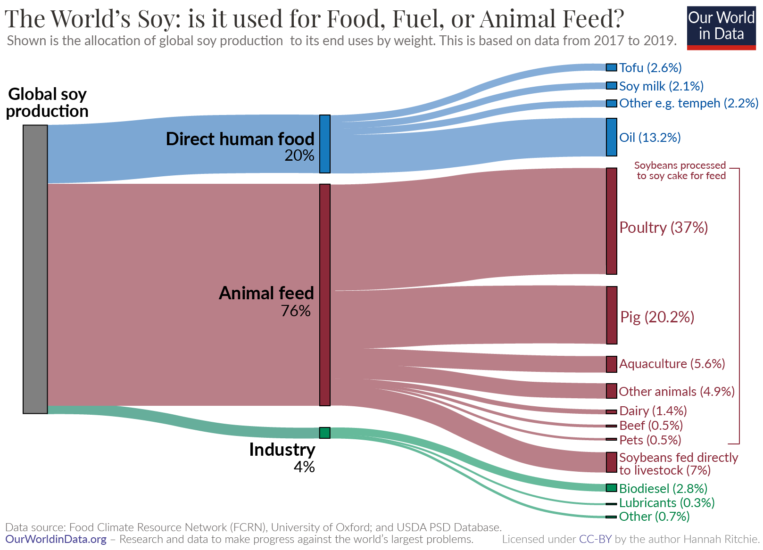

In [140]:
display.Image(b64decode(base64_data)) # https://ourworldindata.org/soy

The chart shows that it is soy for animal feed rather than the growth of soy as a milk alternative that is the main driver for soy production.

Scraping the website for deeper analysis:

In [141]:
url = 'https://ourworldindata.org/soy'

import urllib.request
html = urllib.request.urlopen(url)
htmlParse = BeautifulSoup(html, 'html.parser')

In [143]:
for para in htmlParse.find_all("p"):
    print(para.get_text())   
    # Ref 7 - function from https://www.geeksforgeeks.org/beautifulsoup-scraping-paragraphs-from-html/

Soy has earned itself a bad reputation with many consumers. Its links to deforestation means that, alongside palm oil, soy has become a product to avoid. Is this reputation justified?
In this article we will take a look at the story of soy: how production has changed over time; where it is produced; what it is used for; and whether it really has been a key driver of deforestation. Although the research suggests that by far the largest driver of deforestation in the Brazilian Amazon has been driven by the expansion of pasture land for beef production, soy is likely to have played at least some role in the loss of forest. 
More than three-quarters (77%) of global soy is fed to livestock for meat and dairy production. Most of the rest is used for biofuels, industry or vegetable oils. Just 7% of soy is used directly for human food products such as tofu, soy milk, edamame beans, and tempeh. The idea that foods often promoted as substitutes for meat and dairy – such as tofu and soy milk – ar

**Dairy milk alternatives: are they better for the environment than dairy and how does soy milk compare?**

In [144]:
path_to_file_milk = (r'C:\Users\amint\OneDrive\Documents\Course Data Analytics\UCD Project\environmental-footprint-milks (1).csv')

In [145]:
milk_data = pd.read_csv(path_to_file_milk)

In [148]:
milk_data.axes # checking columns

[RangeIndex(start=0, stop=5, step=1),
 Index(['Entity', 'Code', 'Year', 'Land use of milks (m2)',
        'GHG emissions of milks (kg CO2eq)', 'Water use of milks (L)',
        'Eutrophication from milks (g PO43-eq)'],
       dtype='object')]

In [149]:
milk_data.round(1)

,Entity,Code,Year,Land use of milks (m2),GHG emissions of milks (kg CO2eq),Water use of milks (L),Eutrophication from milks (g PO43-eq)
0,Almond milk,NaN,2013,0.5,0.7,371.5,1.5
1,Dairy milk,NaN,2013,9.0,3.2,628.2,10.6
2,Oat milk,NaN,2013,0.8,0.9,48.2,1.6
3,Rice milk,NaN,2013,0.3,1.2,269.8,4.7
4,Soy milk,NaN,2013,0.7,1.0,27.8,1.1


In [150]:
milk_data.values

array([['Almond milk', nan, 2013, 0.496359329, 0.702077383, 371.4593343,
        1.50290777],
       ['Dairy milk', nan, 2013, 8.95, 3.15, 628.2, 10.65],
       ['Oat milk', nan, 2013, 0.76, 0.903126194, 48.24, 1.622562983],
       ['Rice milk', nan, 2013, 0.336, 1.181659182, 269.808, 4.69270482],
       ['Soy milk', nan, 2013, 0.66, 0.98, 27.8, 1.06]], dtype=object)

In [151]:
# creatig DF without water to enable stacked barchart

dfs = pd.DataFrame(data={'Milk': ['Almond','Dairy','Oat', 'Rice', 'Soy'], 
                         'Land Use (m2)': [0.5,9,0.8,0.3,0.7], 
                         'Co2 Emissions (Kg)': [0.7,3.2,0.9,1.2,1], 
                          'Euthrophication' : [1.5,10.6,1.6,4.7,1.1]}).copy()
dfs

,Milk,Land Use (m2),Co2 Emissions (Kg),Euthrophication
0,Almond,0.5,0.7,1.5
1,Dairy,9.0,3.2,10.6
2,Oat,0.8,0.9,1.6
3,Rice,0.3,1.2,4.7
4,Soy,0.7,1.0,1.1


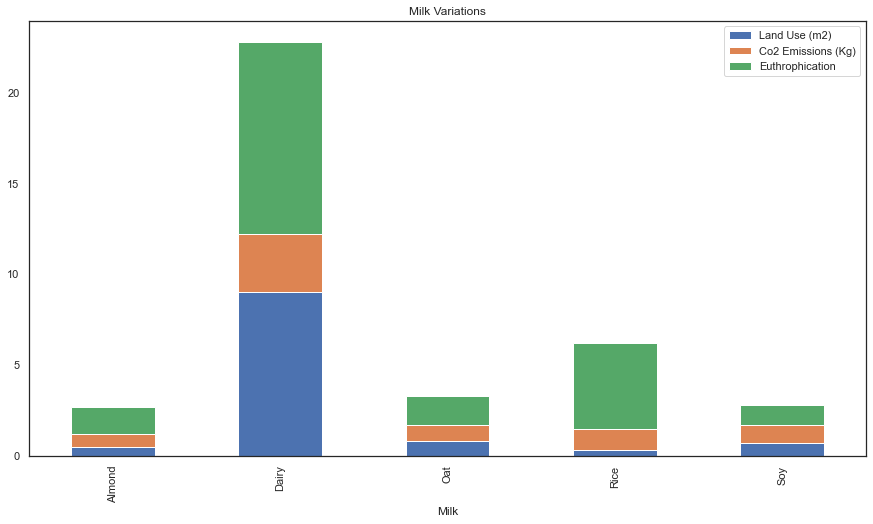

In [152]:
# plot data in stack manner of bar type
dfs.plot(x='Milk', kind='bar', stacked=True,
        title='Milk Variations')
plt.show()

<Figure size 1080x576 with 0 Axes>

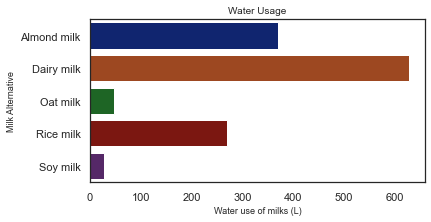

In [154]:
plt.figure(2)
plt.figure(figsize=(6,3))
sns.barplot(x='Water use of milks (L)', y='Entity', data=milk_data, palette='dark')
 
plt.title("Water Usage", fontsize = 10)
plt.xlabel('Water use of milks (L)', fontsize = 9)
plt.ylabel("Milk Alternative", fontsize = 9);

**Using data on Amazon rainforest de-forestation the main factors are plotted below:-**

In [155]:
path_forest = (r"C:\Users\amint\OneDrive\Documents\Course Data Analytics\UCD Project\drivers-forest-loss-brazil-amazon.csv")

In [156]:
forest_data = pd.read_csv(path_forest)

In [157]:
print(forest_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Entity                           13 non-null     object
 1   Code                             13 non-null     object
 2   Year                             13 non-null     int64 
 3   flooding_due_to_dams             13 non-null     int64 
 4   natural_disturbances             13 non-null     int64 
 5   fire                             13 non-null     int64 
 6   selective_logging                13 non-null     int64 
 7   other_infrastructure             13 non-null     int64 
 8   roads                            13 non-null     int64 
 9   mining                           13 non-null     int64 
 10  small-scale_clearing             13 non-null     int64 
 11  tree_plantations_including_palm  13 non-null     int64 
 12  pasture                          13 no

In [158]:
forest_data.head()

,Entity,Code,Year,flooding_due_to_dams,natural_disturbances,fire,selective_logging,other_infrastructure,roads,mining,small-scale_clearing,tree_plantations_including_palm,pasture,commercial_crops
0,Brazil,BRA,2001,0,0,26000,96000,9000,13000,9000,249000,44000,1520000,280000
1,Brazil,BRA,2002,79000,35000,114000,96000,13000,31000,9000,293000,44000,2568000,415000
2,Brazil,BRA,2003,0,35000,44000,149000,9000,35000,0,358000,26000,2761000,550000
3,Brazil,BRA,2004,26000,22000,79000,131000,13000,57000,0,415000,92000,2564000,747000
4,Brazil,BRA,2005,17000,26000,393000,140000,13000,35000,0,288000,52000,2665000,328000


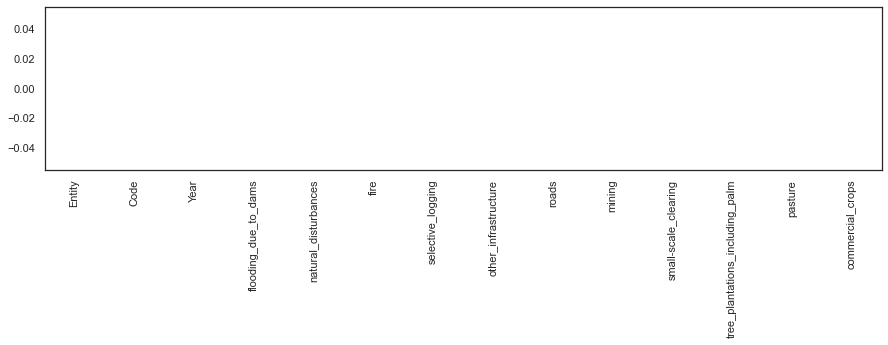

In [159]:
forest_data.isna().sum().plot(kind = 'bar', figsize = (15,3)); # bar graph showing graphical distribution of Null values

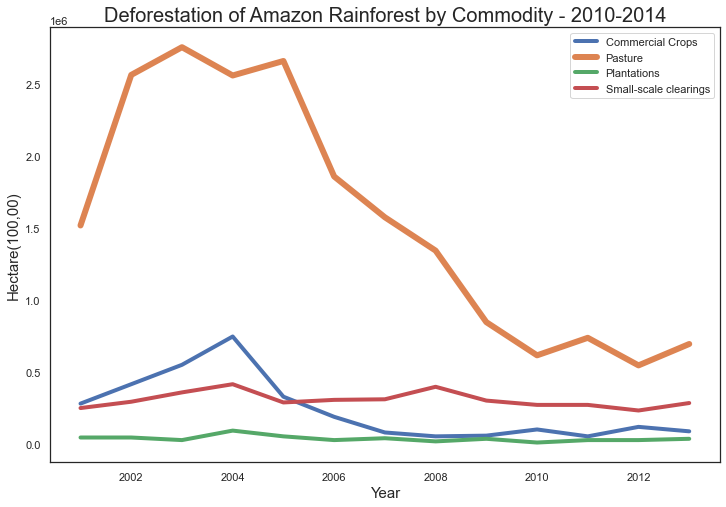

In [160]:
# time series plot for multiple column 

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

sns.lineplot(x="Year", y="commercial_crops", data=forest_data, label='Commercial Crops', palette = "dark", dashes = False, 
            legend="full",estimator=None, linewidth=4)
sns.lineplot(x="Year", y="pasture", data=forest_data, label='Pasture', palette = "dark", dashes = False, 
            legend="full",estimator=None, linewidth=6)
sns.lineplot(x="Year", y="tree_plantations_including_palm", data=forest_data, label='Plantations', palette = "dark", dashes = False, 
            legend="full",estimator=None, linewidth=4)
sns.lineplot(x='Year', y='small-scale_clearing',data=forest_data, label='Small-scale clearings',palette = "dark", dashes = False, 
            legend="full",estimator=None, linewidth=4 )

# set label
plt.ylabel("Hectare(100,00)", fontsize = 15)
plt.title("Deforestation of Amazon Rainforest by Commodity - 2010-2014", fontsize = 20)
plt.xlabel('Year', fontsize = 15)


plt.show()

It is clear that soybeans are not a primary driver of de-forestation in the Amazon: land for pasture is the leading contributor.

Checking websites for more in-depth information on causes of de-forestation it seems beef and dairy herds are a major cause.  

**Key analysis scraped from Our World in Data below.**

In [161]:
url_2 = ('https://ourworldindata.org/what-are-drivers-deforestation#:~:text=The%20expansion%20of%20pasture%20land,24%25)%20of%20tropical%20deforestation')

In [162]:
html = urllib.request.urlopen(url_2)
htmlParse = BeautifulSoup(html, 'html.parser')

In [163]:
for para in htmlParse.find_all("id" == 'ref-5'):
    print(para.get_text())   

Cutting down forests: what are the drivers of deforestation? - Our World in Data

Our World in DataArticles by topicLatestAboutDonateAll chartsSustainable Development Goals TrackerCOVID-19 vaccinations, cases, excess mortality, and much moreExplore our COVID-19 dataCutting down forests: what are the drivers of deforestation?Three-quarters of deforestation is driven by agriculture. Most comes from the production of beef, palm oil, soy and logging industries.by Hannah RitchieFebruary 23, 2021
Summary
Since the turn of the millennium, the world has been losing around 5 million hectares of forest every year. Nearly all of this occurs in the tropics; almost half of all deforestation takes place in Brazil and Indonesia.Three-quarters is driven by agriculture. Beef production is responsible for 41% of deforestation; palm oil and soybeans account for another 18%; and logging for paper and wood across the tropics, another 13%. These industries are also dominant in a few key countries.Effective 

The analysis in the webscrape above considers pasture for beef as the main element of forest loss.

**Looking next at key crops worldwide and their impact on Co2 production and freshwater sources.**



In [164]:
path_to_file = (r"C:\Users\amint\OneDrive\Documents\Course Data Analytics\UCD Project\Food_Production.csv")

In [165]:
food_data = pd.read_csv(path_to_file)

In [166]:
print(food_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [168]:
print(food_data.dtypes)

Food product                                                                object
Land use change                                                            float64
Animal Feed                                                                float64
Farm                                                                       float64
Processing                                                                 float64
Transport                                                                  float64
Packging                                                                   float64
Retail                                                                     float64
Total_emissions                                                            float64
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   float64
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   float64
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      float64
Fres

In [169]:
food_df = pd.DataFrame(food_data) # converting to dataframe

**Checking for Null Values**

In [170]:
food_df.isna().sum()

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

In [171]:
percent_missing = (food_df.isnull().sum().sort_values(ascending = True) * 100 / len(food_df)).round(2)
percent_missing

Food product                                                                0.00
Land use change                                                             0.00
Animal Feed                                                                 0.00
Farm                                                                        0.00
Processing                                                                  0.00
Transport                                                                   0.00
Packging                                                                    0.00
Retail                                                                      0.00
Total_emissions                                                             0.00
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   11.63
Scarcity-weighted water use per kilogram (liters per kilogram)             11.63
Land use per kilogram (m² per kilogram)                                    11.63
Freshwater withdrawals per k

In [173]:
food_df.shape

(43, 23)

In [174]:
food_df.rename(columns = {'Scarcity-weighted water use per kilogram (liters per kilogram)':'Scarcity-weighted water use per kilogram'}, inplace = True)

In [175]:
food_df.describe().round(2)

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram,Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,33.00,38.00,...,26.00,38.00,33.00,27.00,33.00,38.00,27.00,38.00,26.00,30.00
mean,1.26,0.45,3.47,0.25,0.20,0.27,0.07,5.97,27.18,46.14,...,1437.98,932.61,5.63,13.52,12.42,29.26,29.11,36607.43,59196.44,17380.58
std,3.36,0.92,7.08,0.37,0.16,0.34,0.11,10.50,46.45,82.81,...,1441.98,1297.00,10.61,19.43,28.35,78.49,49.31,56891.28,89928.19,16232.08
min,-2.10,0.00,0.10,0.00,0.00,0.00,0.00,0.20,0.71,0.69,...,32.38,0.00,0.07,0.26,0.27,0.33,3.00,0.00,421.25,4.10
25%,0.00,0.00,0.35,0.00,0.10,0.10,0.00,0.85,4.21,3.75,...,373.57,105.50,0.63,4.03,1.31,1.11,5.09,3325.08,11018.40,2969.12
50%,0.20,0.00,0.80,0.10,0.10,0.10,0.00,1.60,7.00,11.46,...,1083.33,417.10,1.35,6.50,2.98,6.86,7.94,14533.05,20917.21,12605.26
75%,0.80,0.00,2.20,0.30,0.20,0.30,0.15,6.00,26.32,45.84,...,1832.39,1340.38,5.34,14.98,6.61,14.92,23.00,35960.18,70651.72,28056.47
max,16.30,2.90,39.40,1.30,0.80,1.60,0.30,59.60,197.36,365.29,...,6003.33,5605.20,50.95,93.30,119.49,369.81,184.81,229889.80,431620.00,49735.88


In [176]:
food_df.rename(columns = {'Total_emissions' : 'Total emissions Co2 per KG'}, inplace = True)

In [178]:
food_df.head(2)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total emissions Co2 per KG,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram,Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replacing NaN values in some columns with mean values

In [179]:
food_df[['Land use per kilogram (m² per kilogram)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Scarcity-weighted water use per kilogram']] = food_df[['Land use per kilogram (m² per kilogram)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Scarcity-weighted water use per kilogram']].fillna(food_df[['Land use per kilogram (m² per kilogram)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Scarcity-weighted water use per kilogram']].mean())

In [180]:
food_df['Scarcity-weighted water use per kilogram'].isnull().values.any() # checking no NaN on this column

False

Creating a new dataframe column from a dictionary to group food types

In [181]:
food_cat = {
    'Wheat & Rye (Bread)' : 'Grain', 'Maize (Meal)' : 'Grain', 'Barley (Beer)' : 'Grain', 'Oatmeal' : 'Grain', 'Rice' : 'Grain',
    'Potatoes' : 'Vegetable', 'Cassava' : 'Vegetable', 'Cane Sugar' : 'Vegetable', 'Beet Sugar' : 'Vegetable',
    'Other Pulses' : 'Legumes/Pulses', 'Peas': 'Legumes/Pulses', 'Nuts' : 'Legumes/Pulses', 'Groundnuts' : 'Legumes/Pulses', 'Soymilk' : 'Legumes/Pulses', 'Tofu' : 'Legumes/Pulses',
    'Soybean Oil' : 'Vegetable Oil', 'Palm Oil': 'Vegetable Oil', 'Sunflower Oil' : 'Vegetable Oil', 'Rapeseed Oil' : 'Vegetable Oil', 'Olive Oil' : 'Vegetable Oil',
    'Tomatoes' : 'Fruit', 'Onions & Leeks' : 'Vegetable', 'Root Vegetables' : 'Vegetable', 'Brassicas' : 'Vegetable', 'Other Vegetables' : 'Vegetable', 
    'Citrus Fruit' : 'Fruit', 'Bananas' : 'Fruit', 'Apples' : 'Fruit', 'Berries & Grapes' : 'Fruit', 'Wine' : 'Fruit', 'Other Fruit' : 'Fruit',
    'Coffee': 'Tree Crop', 'Dark Chocolate' : 'Tree Crop',
    'Beef (beef herd)' : 'Meat/Dairy', 'Beef (dairy herd)' : 'Meat/Dairy', 'Lamb & Mutton' : 'Meat/Dairy', 'Pig Meat' : 'Meat/Dairy', 'Poultry Meat' : 'Meat/Dairy', 'Milk' : ' Meat/Dairy', 'Cheese' : 'Meat/Dairy', 'Eggs' : 'Meat/Dairy',
    'Fish (farmed)' : 'Fish', 'Shrimps (farmed)' : 'Fish'
}

In [182]:
food_df['food_cat']= food_df['Food product'].map(food_cat)

In [183]:
food_df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total emissions Co2 per KG,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram,Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),food_cat
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,932.605263,NaN,NaN,NaN,29.264474,NaN,36607.428947,NaN,NaN,Grain
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,932.605263,NaN,NaN,NaN,29.264474,NaN,36607.428947,NaN,NaN,Grain
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,932.605263,NaN,NaN,NaN,29.264474,NaN,36607.428947,NaN,NaN,Grain
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,482.400000,0.945482,1.907692,2.897446,7.600000,5.846154,18786.200000,14450.92308,7162.104461,Grain
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,2248.400000,1.207271,6.267606,0.759631,2.800000,3.943662,49576.300000,69825.77465,13449.891480,Grain


In [185]:
first_column = food_df.pop('food_cat')
food_df.insert(1, 'food_cat', first_column)

In [186]:
sec_col = food_df.pop('Total emissions Co2 per KG')
food_df.insert(2, 'Total emissions Co2 per KG', sec_col)
food_df.head(1)

,Food product,food_cat,Total emissions Co2 per KG,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram,Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),Grain,1.4,0.1,0.0,0.8,0.2,0.1,0.1,0.1,...,NaN,932.605263,NaN,NaN,NaN,29.264474,NaN,36607.428947,NaN,NaN


In [190]:
sub_set = ['Food product', 'food_cat', 'Total emissions Co2 per KG', 'Land use change'] # just columns i am intetested in at this point

In [191]:
food_types = food_df[sub_set].copy()

In [192]:
food_types.head()

,Food product,food_cat,Total emissions Co2 per KG,Land use change
0,Wheat & Rye (Bread),Grain,1.4,0.1
1,Maize (Meal),Grain,1.1,0.3
2,Barley (Beer),Grain,1.1,0.0
3,Oatmeal,Grain,1.6,0.0
4,Rice,Grain,4.0,0.0


In [193]:
food_types.set_index('Food product')
food_types.head(2)

,Food product,food_cat,Total emissions Co2 per KG,Land use change
0,Wheat & Rye (Bread),Grain,1.4,0.1
1,Maize (Meal),Grain,1.1,0.3


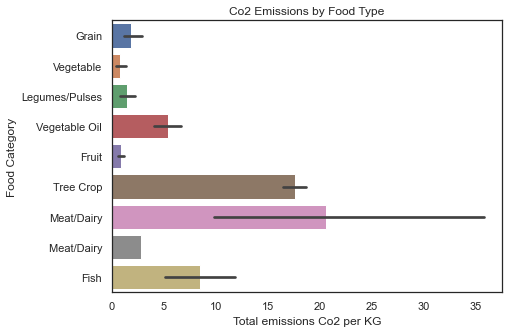

In [194]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(style='white')

fig, ax = plt.subplots(figsize=(7,5)) # Increasing the chart size and DPI for increased elegibility and should the chart be copied to Powerpoint, for example
sns.set(rc={"figure.dpi":200, 'savefig.dpi':300})
sns.barplot(data=food_types, y='food_cat', x='Total emissions Co2 per KG', ax=ax)

plt.title('Co2 Emissions by Food Type')
plt.ylabel('Food Category')

plt.show()

There are two clear land use types that emit the majority of Co2 emissions - Meat/Dairy and Tree Crops.

In [195]:
food_types.sort_values('Total emissions Co2 per KG', ascending=False) # sorting on total emissions
food_types.head()

,Food product,food_cat,Total emissions Co2 per KG,Land use change
0,Wheat & Rye (Bread),Grain,1.4,0.1
1,Maize (Meal),Grain,1.1,0.3
2,Barley (Beer),Grain,1.1,0.0
3,Oatmeal,Grain,1.6,0.0
4,Rice,Grain,4.0,0.0


In [196]:
food_types_sub = food_types.set_index(['food_cat']).copy()
food_types_sub.head()

,Food product,Total emissions Co2 per KG,Land use change
food_cat,,,
Grain,Wheat & Rye (Bread),1.4,0.1
Grain,Maize (Meal),1.1,0.3
Grain,Barley (Beer),1.1,0.0
Grain,Oatmeal,1.6,0.0
Grain,Rice,4.0,0.0


In [197]:
set1 = food_types_sub.loc[['Meat/Dairy', 'Tree Crop', 'Vegetable Oil', 'Fish']].copy() # creating a new dataframe 


In [198]:
set1

,Food product,Total emissions Co2 per KG,Land use change
food_cat,,,
Meat/Dairy,Beef (beef herd),59.6,16.3
Meat/Dairy,Beef (dairy herd),21.1,0.9
Meat/Dairy,Lamb & Mutton,24.5,0.5
Meat/Dairy,Pig Meat,7.2,1.5
Meat/Dairy,Poultry Meat,6.1,2.5
Meat/Dairy,Cheese,21.2,4.5
Meat/Dairy,Eggs,4.5,0.7
Tree Crop,Coffee,16.5,3.7
Tree Crop,Dark Chocolate,18.7,14.3


In [199]:
food_types_sub['food_cat'] = food_types_sub.index # ref 8 -  put in as seaborn kept throwing error https://stackoverflow.com/questions/32908315/could-not-interpret-input-error-with-seaborn-when-plotting-groupbys

In [200]:
set1['food_cat'] = set1.index # put in as seaborn kept throwing error https://stackoverflow.com/questions/32908315/could-not-interpret-input-error-with-seaborn-when-plotting-groupbys

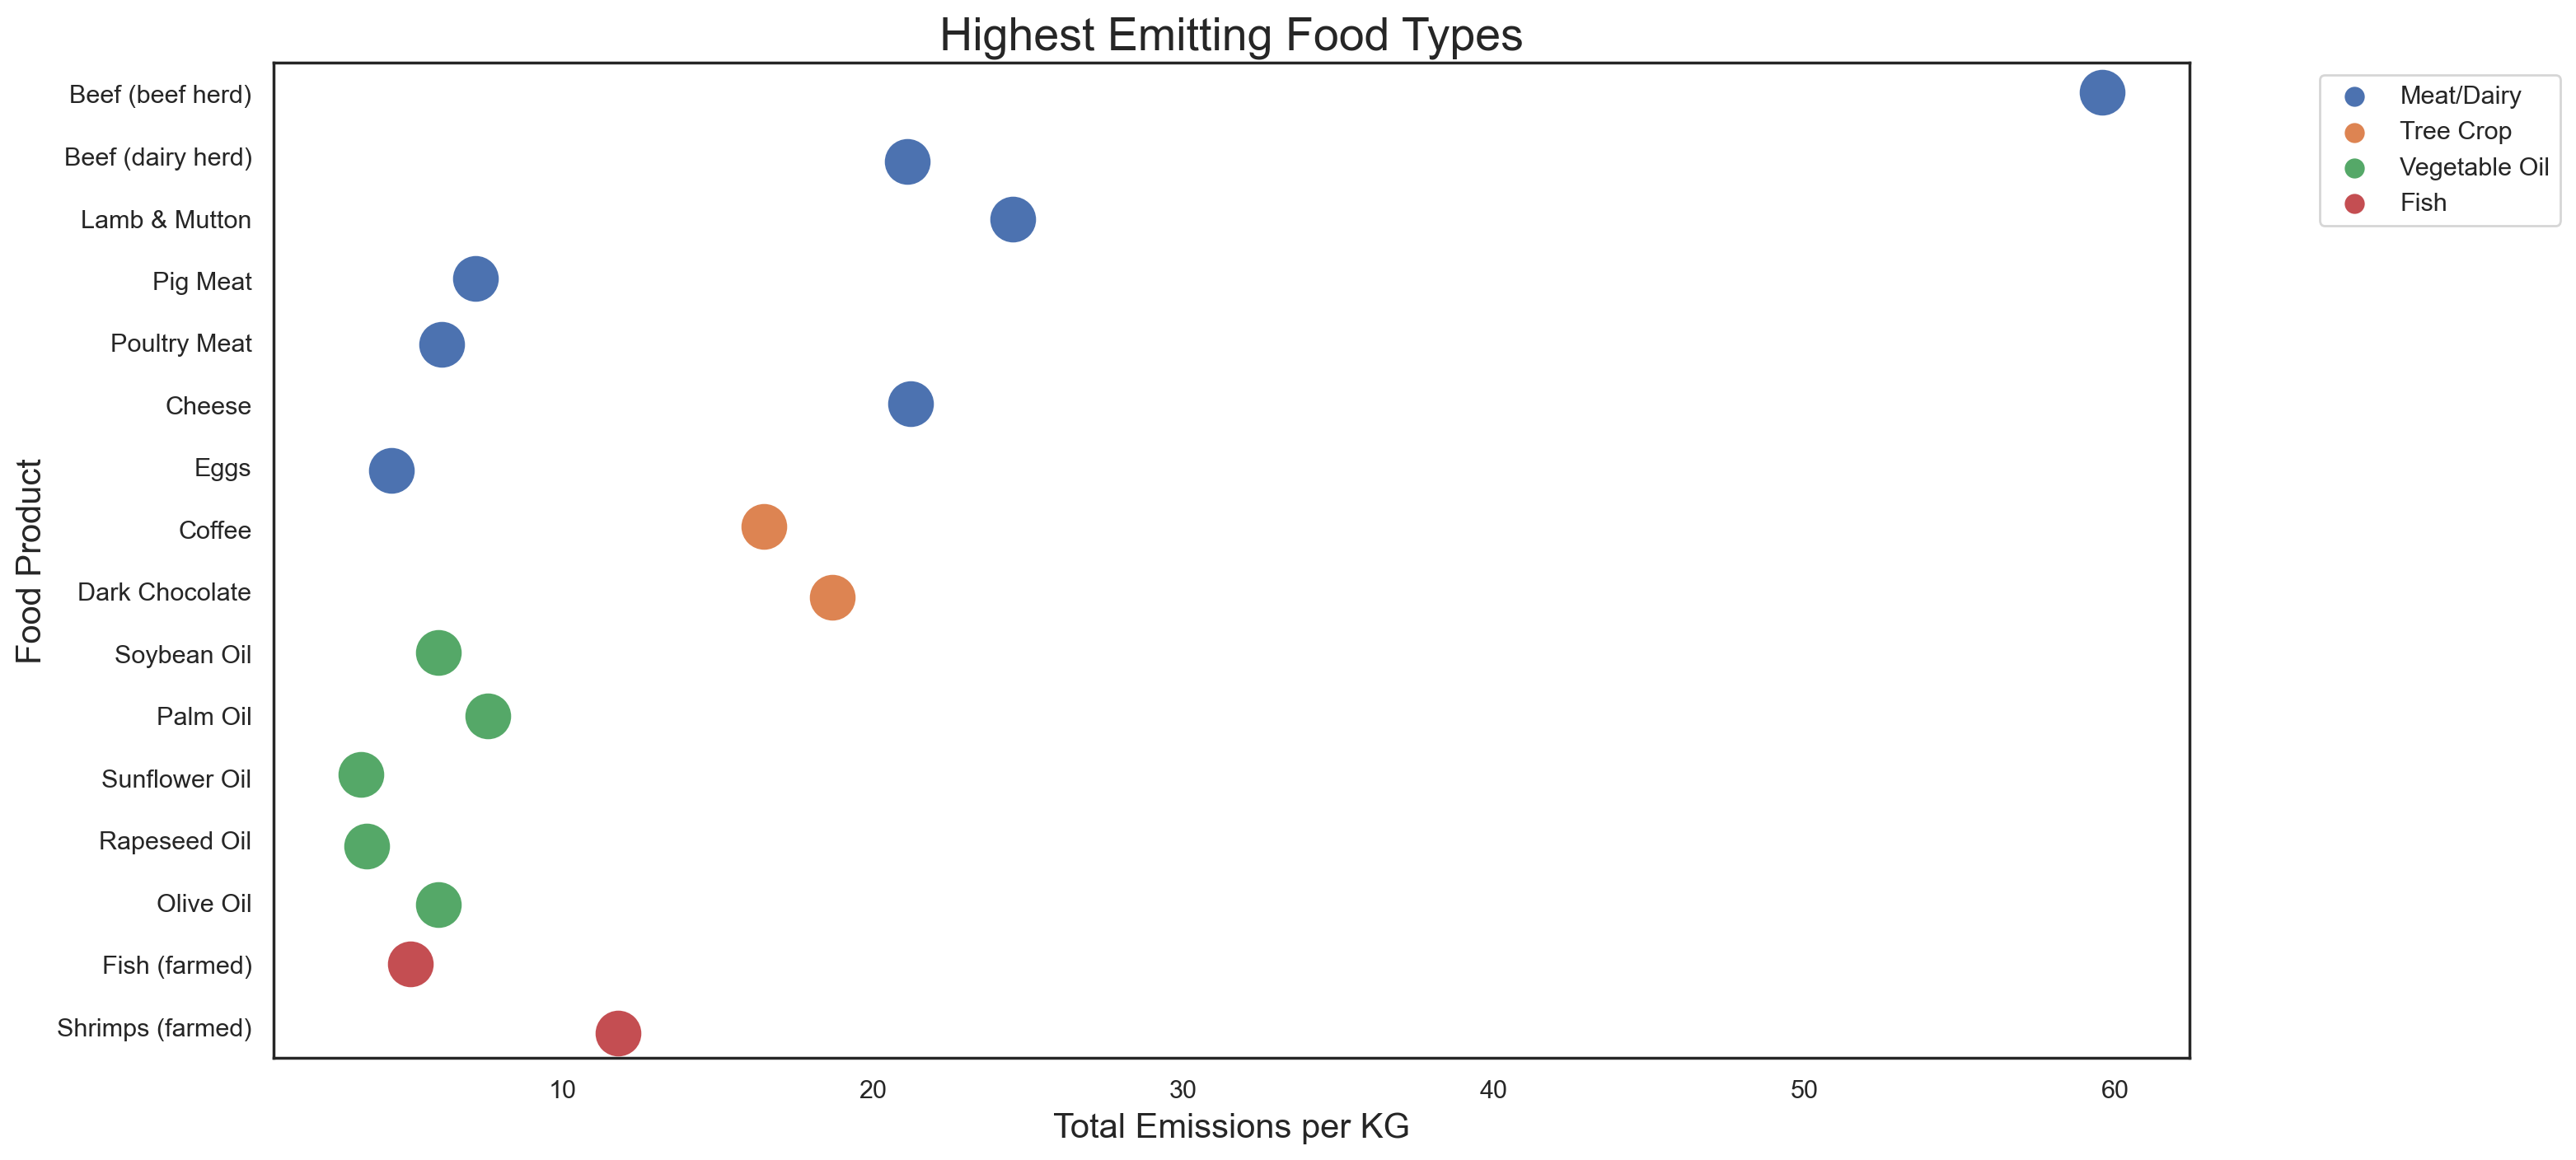

In [201]:
# depict illustration
sns.set(style='white')
gfg = sns.stripplot(y='Food product', x="Total emissions Co2 per KG", hue = 'food_cat', s=20,
                 data=set1, jitter=True)

gfg.legend(bbox_to_anchor= (1.2,1))
plt.title('Highest Emitting Food Types', fontsize = 20)
plt.ylabel('Food Product', fontsize = 15)
plt.xlabel('Total Emissions per KG', fontsize = 15)

sns.set(rc={"figure.dpi":200, 'savefig.dpi':300})
plt.show()

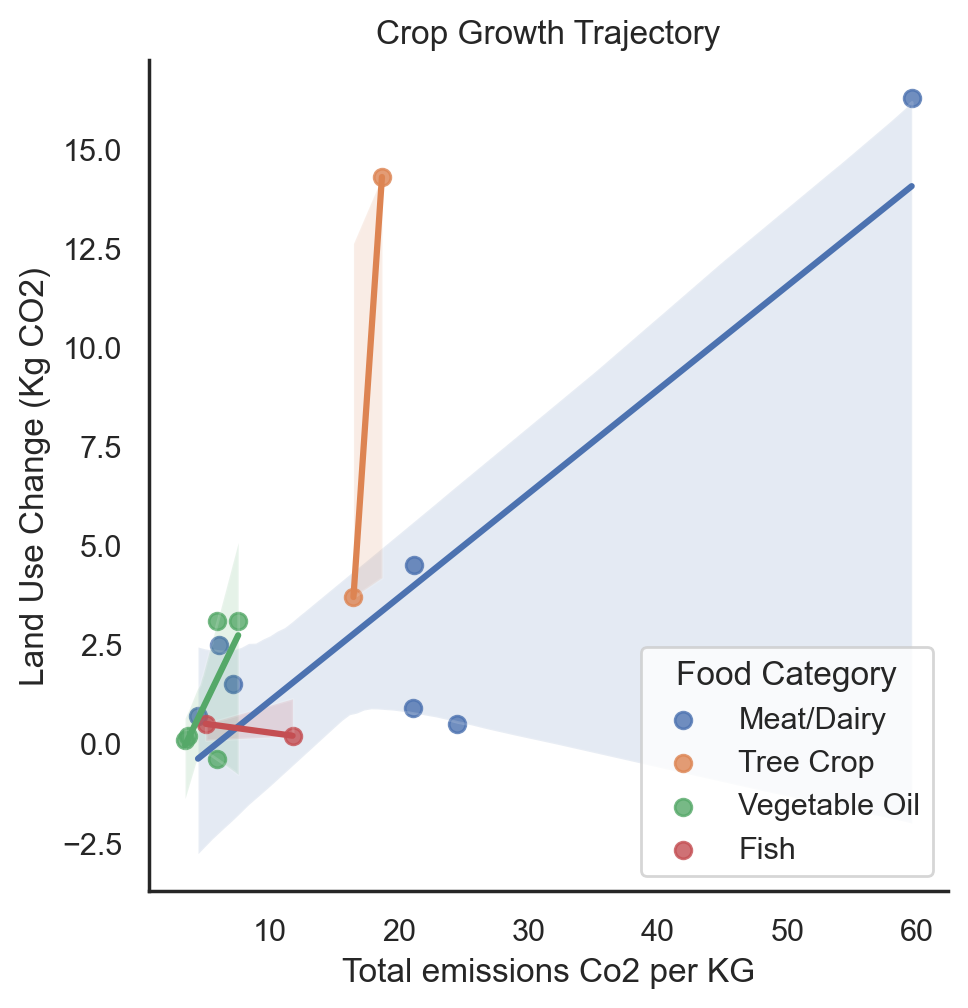

In [202]:
sns.set(style='white')
sns.lmplot(data=set1, x='Total emissions Co2 per KG', y='Land use change', hue='food_cat',legend=False); # modelling future trajectory based on land use change data

plt.legend(bbox_to_anchor= (1.2,1))
plt.title('Crop Growth Trajectory')
plt.ylabel('Land Use Change (Kg CO2)')
plt.legend(title = "Food Category");

The projection for meat and dariy is to increase, emitting higher values of Co2 in the future. 

Will this trend continue with changing attidues? 

Considering milk what conclusions does the charity 'Our World in Data' make on the future growth of milk alteranatives, and whether these also have high enviromental costs.

In [203]:
from bs4 import BeautifulSoup

In [204]:
import requests

In [205]:
import urllib.request

In [209]:
url_2 = 'https://ourworldindata.org/environmental-impact-milks'

In [210]:
# Create object page
page = requests.get(url_2)

In [212]:
# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')
soup

<!DOCTYPE html>
<html><head><meta content="width=device-width, initial-scale=1" name="viewport"/><title>Dairy vs. plant-based milk: what are the environmental impacts? - Our World in Data</title><meta content="A growing number of people are interested in switching to plant-based alternatives to dairy. But are they better for the environment, and which is best?" name="description"/><link href="https://ourworldindata.org/environmental-impact-milks" rel="canonical"/><link href="/atom.xml" rel="alternate" type="application/atom+xml"/><link href="/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><meta content="1149943818390250" property="fb:app_id"/><meta content="https://ourworldindata.org/environmental-impact-milks" property="og:url"/><meta content="Dairy vs. plant-based milk: what are the environmental impacts?" property="og:title"/><meta content="A growing number of people are interested in switching to plant-based alternatives to dairy. But are they better for the environm

In [213]:
url = 'https://ourworldindata.org/environmental-impact-milks'

In [214]:
html = urllib.request.urlopen(url)

In [215]:
for para in htmlParse.find_all("p"):
    print(para.get_text())   
    # Ref 9 - function from https://www.geeksforgeeks.org/beautifulsoup-scraping-paragraphs-from-html/

Since the turn of the millennium, the world has been losing around 5 million hectares of forest every year. Nearly all of this occurs in the tropics; almost half of all deforestation takes place in Brazil and Indonesia.Three-quarters is driven by agriculture. Beef production is responsible for 41% of deforestation; palm oil and soybeans account for another 18%; and logging for paper and wood across the tropics, another 13%. These industries are also dominant in a few key countries.Effective solutions will be focused on these agricultural activities and those countries where most deforestation occurs.
Every year the world loses around 5 million hectares of forest. 95% of this occurs in the tropics. At least three-quarters of this is driven by agriculture – clearing forests to grow crops, raise livestock and produce products such as paper.1
If we want to tackle deforestation we need to understand two key questions: where we’re losing forests, and what activities are driving it. This allo

**Water Cost and Land Use of Food Types**

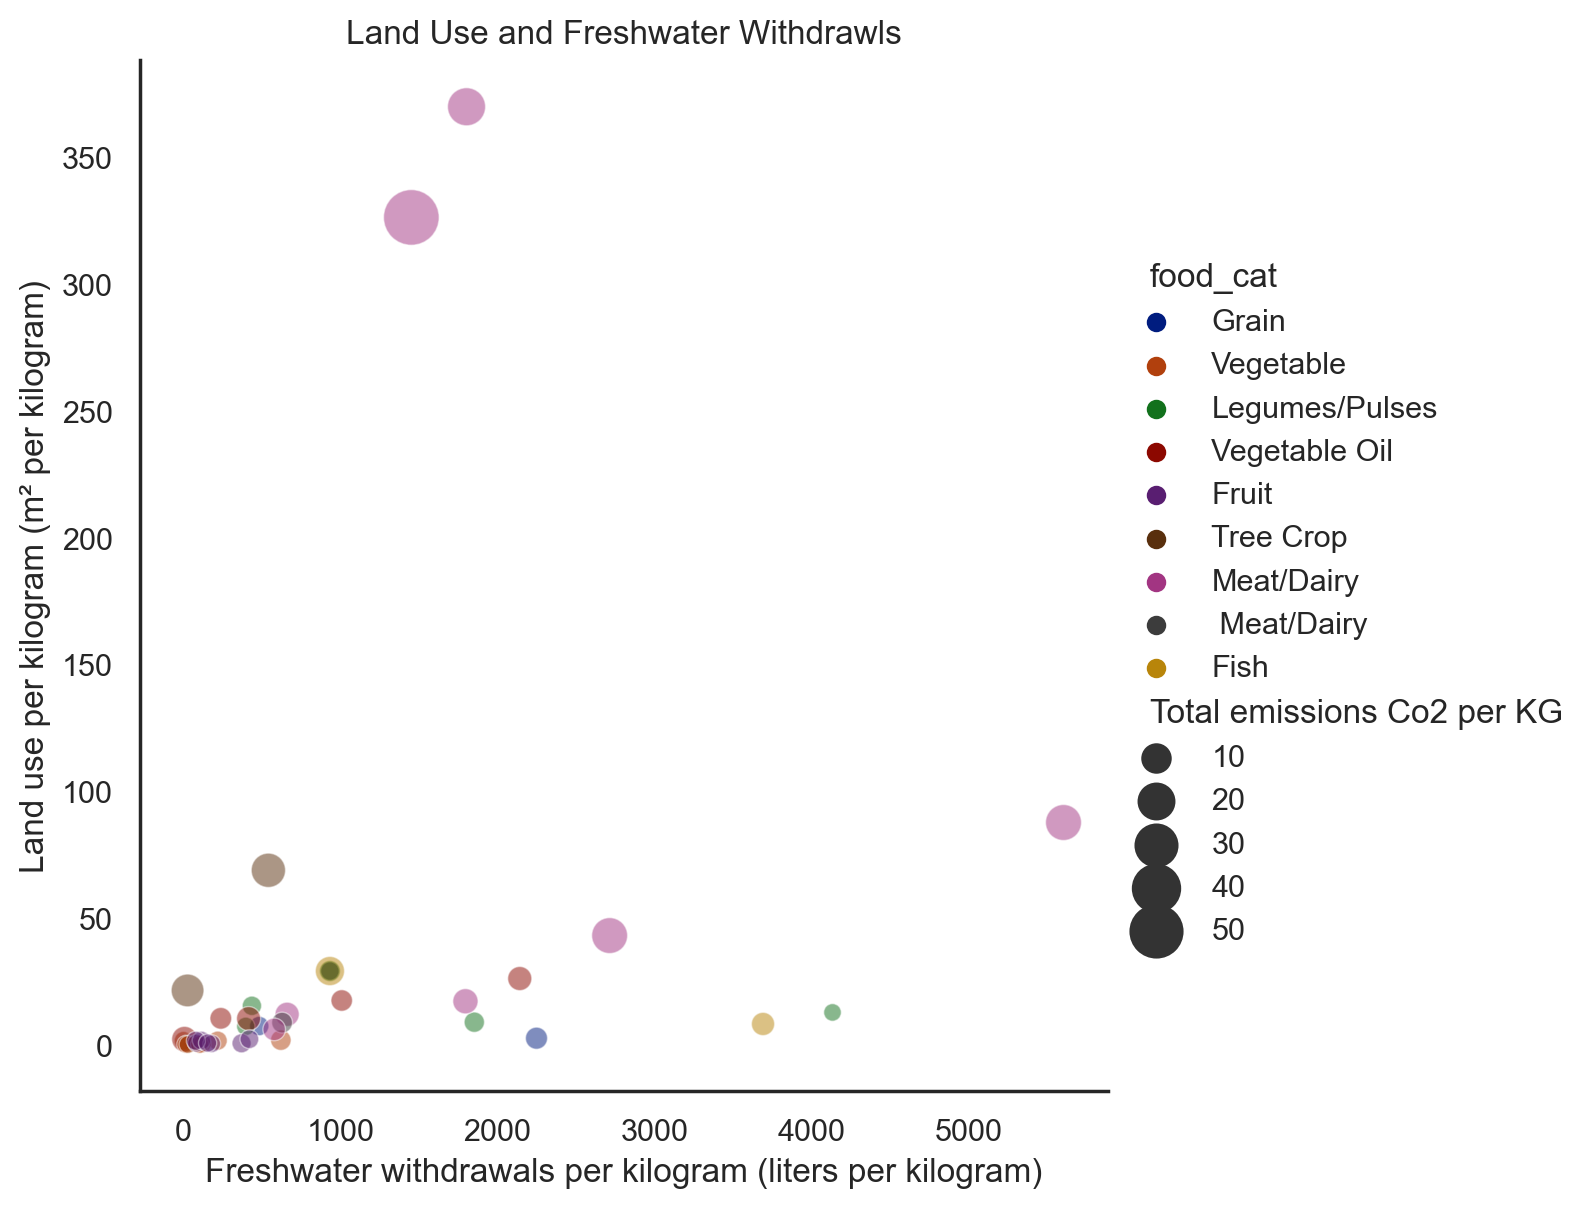

In [216]:
subset2 = ['Food product', 'food_cat', 'Total emissions Co2 per KG', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Land use per kilogram (m² per kilogram)','Scarcity-weighted water use per kilogram']

water_cost = food_df[subset2].copy()

NaN_val = (water_cost.isnull().sum().sort_values(ascending = True) * 100 / len(water_cost)).round(2)
NaN_val

sns.relplot(x='Freshwater withdrawals per kilogram (liters per kilogram)', y='Land use per kilogram (m² per kilogram)', hue='food_cat', size='Total emissions Co2 per KG',
            sizes=(40, 400), alpha=.5, palette="dark",
            height=6, data=water_cost);

plt.title('Land Use and Freshwater Withdrawls');

Concluding comment from World in Data

In [217]:
url = 'https://ourworldindata.org/soy'
html = urllib.request.urlopen(url)
htmlParse = BeautifulSoup(html, 'html.parser')

In [218]:
for para in htmlParse.find_all("p"):
    print(para.get_text())   
    # function from https://www.geeksforgeeks.org/beautifulsoup-scraping-paragraphs-from-html/

Soy has earned itself a bad reputation with many consumers. Its links to deforestation means that, alongside palm oil, soy has become a product to avoid. Is this reputation justified?
In this article we will take a look at the story of soy: how production has changed over time; where it is produced; what it is used for; and whether it really has been a key driver of deforestation. Although the research suggests that by far the largest driver of deforestation in the Brazilian Amazon has been driven by the expansion of pasture land for beef production, soy is likely to have played at least some role in the loss of forest. 
More than three-quarters (77%) of global soy is fed to livestock for meat and dairy production. Most of the rest is used for biofuels, industry or vegetable oils. Just 7% of soy is used directly for human food products such as tofu, soy milk, edamame beans, and tempeh. The idea that foods often promoted as substitutes for meat and dairy – such as tofu and soy milk – ar

**First steps in Machine Learning**

In [220]:
%matplotlib inline

# ref 10 www.dataquest.io


In [221]:
soy_price = pd.read_csv(r"C:\Users\amint\OneDrive\Documents\Pyhton Datasets\soy-values.csv")

In [222]:
soy_price.head()


,Date,Price
0,"September 30, 2022",664.45
1,"August 31, 2022",671.11
2,"July 31, 2022",678.20
3,"June 30, 2022",737.06
4,"May 31, 2022",724.09


In [223]:
soy_price.dtypes

Date      object
Price    float64
dtype: object

In [224]:
soy_price['Date'] = pd.to_datetime(soy_price['Date'])

In [225]:
soy_price.head(2)

,Date,Price
0,2022-09-30,664.45
1,2022-08-31,671.11


In [226]:
soy2 = soy_price.set_index(['Date'])
soy2.head(2)

,Price
Date,
2022-09-30,664.45
2022-08-31,671.11


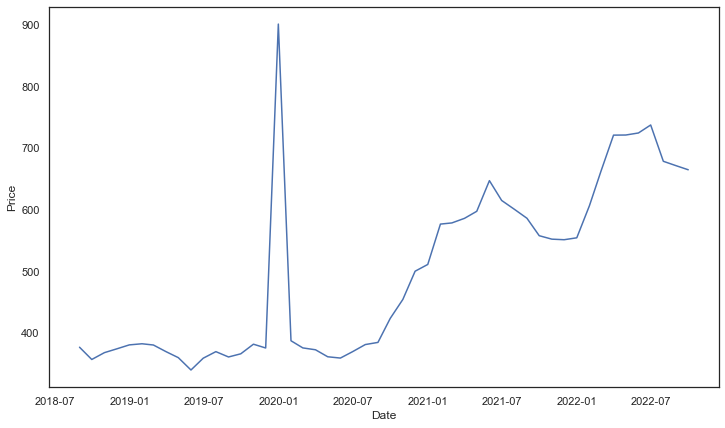

In [227]:
plt.figure(figsize = (12,7))
sns.set(style='white',)

sns.lineplot(data=soy_price, x='Date', y="Price");

In [228]:
soy3 = soy2["Target"] = soy2.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Price"].copy()
soy3.head()

Date
2022-09-30    NaN
2022-08-31    1.0
2022-07-31    1.0
2022-06-30    1.0
2022-05-31    0.0
Name: Price, dtype: float64

In [229]:
soy4 = soy3.dropna()
soy4.head()

Date
2022-08-31    1.0
2022-07-31    1.0
2022-06-30    1.0
2022-05-31    0.0
2022-04-30    0.0
Name: Price, dtype: float64

In [230]:
soy5 = pd.concat([soy4, soy2], axis=1, join="inner")
soy5.head(15)

,Price,Price,Target
Date,,,
2022-08-31,1.0,671.11,1.0
2022-07-31,1.0,678.20,1.0
2022-06-30,1.0,737.06,1.0
2022-05-31,0.0,724.09,0.0
2022-04-30,0.0,720.79,0.0
2022-03-31,0.0,720.60,0.0
2022-02-28,0.0,661.63,0.0
2022-01-31,0.0,606.22,0.0
2021-12-31,0.0,554.14,0.0


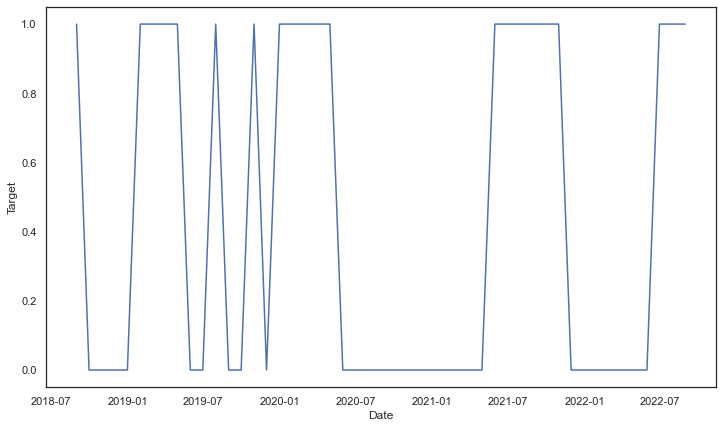

In [231]:
plt.figure(figsize = (12,7))
sns.set(style='white',)

sns.lineplot(x = "Date", y = "Target", data = soy5);
